<a href="https://colab.research.google.com/github/jubairahmed010/Graph_crlm/blob/main/CRLM_graph_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Preprocessing**

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Load data into DataFrame
df = pd.read_csv('/content/drive/My Drive/Colorectal-Liver-Metastases-Clinical-data.csv')

# Display the first few rows of the DataFrame
# print(df.head())

In [ ]:
df1= df


In [ ]:
print(df.dtypes)

Patient-ID                              object
De-identify Scout Name                  object
age                                      int64
sex                                      int64
major_comorbidity                        int64
body_mass_index                        float64
node_positive_primary                    int64
synchronous_crlm                         int64
multiple_metastases                      int64
clinrisk_score                           int64
clinrisk_stratified                      int64
carcinoembryonic_antigen               float64
max_tumor_size                         float64
bilobar_disease                          int64
extrahep_disease                         int64
chemo_before_liver_resection             int64
preoperative_pve                         int64
steatosis_yesno                          int64
presence_sinusoidal_dilata               int64
NASH_score                               int64
NASH_yesno                               int64
NASH_greater_

In [ ]:
df.shape

(197, 36)

In [ ]:
columns_list = df1.columns.tolist()

# Print the column names list
print("Columns in a list:")
print(columns_list)

Columns in a list:
['Patient-ID', 'De-identify Scout Name', 'age', 'sex', 'major_comorbidity', 'body_mass_index', 'node_positive_primary', 'synchronous_crlm', 'multiple_metastases', 'clinrisk_score', 'clinrisk_stratified', 'carcinoembryonic_antigen', 'max_tumor_size', 'bilobar_disease', 'extrahep_disease', 'chemo_before_liver_resection', 'preoperative_pve', 'steatosis_yesno', 'presence_sinusoidal_dilata', 'NASH_score', 'NASH_yesno', 'NASH_greater_4', 'total_response_percent', 'necrosis_percent', 'fibrosis_percent', 'fibrosis_greater_40_percent', 'mucin_percent', 'overall_survival_months', 'vital_status', 'progression_or_recurrence', 'months_to_DFS_progression', 'vital_status_DFS', 'progression_or_recurrence_liveronly', 'months_to_liver_DFS_progression', 'vital_status_liver_DFS', 'relevant_notes']


In [ ]:

df1= df1.drop(df.columns[-1], axis=1)
df1= df1.drop(df.columns[1], axis=1)
df1 = df1.drop(df.columns[0], axis=1)

# Find rows with value -999
rows_with_minus_999 = df1[df1.eq(-999).any(axis=1)]

# Get the total number of rows with value -999
total_rows_with_minus_999 = len(rows_with_minus_999)

# Print the total number of rows with value -999
print("Total number of rows with value -999:", total_rows_with_minus_999)
# Print rows with value -999
print("Rows with value -999:")
print(rows_with_minus_999)

# Drop rows with value -999
df1 = df1.drop(rows_with_minus_999.index)

Total number of rows with value -999: 31
Rows with value -999:
     age  sex  major_comorbidity  body_mass_index  node_positive_primary  \
13    57    1                  1             24.2                      0   
16    61    2                  1             27.9                      0   
17    79    2                  1             24.1                      1   
23    58    1                  0             26.3                      1   
46    64    1                  1             30.5                      0   
50    37    1                  1             36.8                      0   
52    77    1                  0             30.0                      0   
60    48    2                  1             21.9                      1   
63    52    2                  0             34.2                      0   
74    63    1                  1             28.5                      0   
80    33    2                  0             33.8                      0   
81    52    2            

In [ ]:
zero_count = (df1['progression_or_recurrence_liveronly'] == 0).sum()
one_count = (df1['progression_or_recurrence_liveronly'] == 1).sum()

print("Number of zeros in the column:", zero_count)
print("Number of ones in the column:", one_count)

Number of zeros in the column: 102
Number of ones in the column: 64


In [ ]:
# Convert columns with percentage values to floats
df1['total_response_percent'] = df1['total_response_percent'].replace('%', '', regex=True).astype(float)
df1[ 'necrosis_percent' ] = df1[ 'necrosis_percent' ].replace('%', '', regex=True).astype(float)
df1[ 'fibrosis_percent'] = df1[ 'fibrosis_percent'].replace('%', '', regex=True).astype(float)
df1[ 'mucin_percent'] = df1[ 'mucin_percent'].replace('%', '', regex=True).astype(float)

In [ ]:
df1 = df1.replace('%', '', regex=True)

In [ ]:
print(df1['fibrosis_percent'])

In [ ]:
columns_list = df1.columns.tolist()

# Print the column names list
print("Columns in a list:")
print(columns_list)

Columns in a list:
['age', 'sex', 'major_comorbidity', 'body_mass_index', 'node_positive_primary', 'synchronous_crlm', 'multiple_metastases', 'clinrisk_score', 'clinrisk_stratified', 'carcinoembryonic_antigen', 'max_tumor_size', 'bilobar_disease', 'extrahep_disease', 'chemo_before_liver_resection', 'preoperative_pve', 'steatosis_yesno', 'presence_sinusoidal_dilata', 'NASH_score', 'NASH_yesno', 'NASH_greater_4', 'total_response_percent', 'necrosis_percent', 'fibrosis_percent', 'fibrosis_greater_40_percent', 'mucin_percent', 'overall_survival_months', 'vital_status', 'progression_or_recurrence', 'months_to_DFS_progression', 'vital_status_DFS', 'progression_or_recurrence_liveronly', 'months_to_liver_DFS_progression', 'vital_status_liver_DFS']


In [ ]:
df1.shape

(166, 26)

In [ ]:
print(df1.dtypes)


age                                      int64
sex                                      int64
major_comorbidity                        int64
body_mass_index                        float64
node_positive_primary                    int64
synchronous_crlm                         int64
multiple_metastases                      int64
clinrisk_score                           int64
clinrisk_stratified                      int64
carcinoembryonic_antigen               float64
max_tumor_size                         float64
bilobar_disease                          int64
extrahep_disease                         int64
chemo_before_liver_resection             int64
preoperative_pve                         int64
steatosis_yesno                          int64
presence_sinusoidal_dilata               int64
NASH_score                               int64
NASH_yesno                               int64
NASH_greater_4                           int64
total_response_percent                  object
necrosis_perc

In [ ]:
# List of columns to keep
columns_to_keep = [
    'age',
    'sex',
    'body_mass_index',
    'node_positive_primary',
    'synchronous_crlm',
    'multiple_metastases',
    'clinrisk_score',
    'clinrisk_stratified',
    'carcinoembryonic_antigen',
    'extrahep_disease',
    'chemo_before_liver_resection',
    'preoperative_pve',
    'steatosis_yesno',
    'presence_sinusoidal_dilata',
    'NASH_yesno',
    'NASH_greater_4',
    'total_response_percent',
    'necrosis_percent',
    'fibrosis_percent',
    'fibrosis_greater_40_percent',

    'major_comorbidity',
    'max_tumor_size',
     'bilobar_disease',
    'NASH_score',
    'mucin_percent',

    'progression_or_recurrence_liveronly'
]

# Delete columns not in the list
df1 = df1[columns_to_keep]


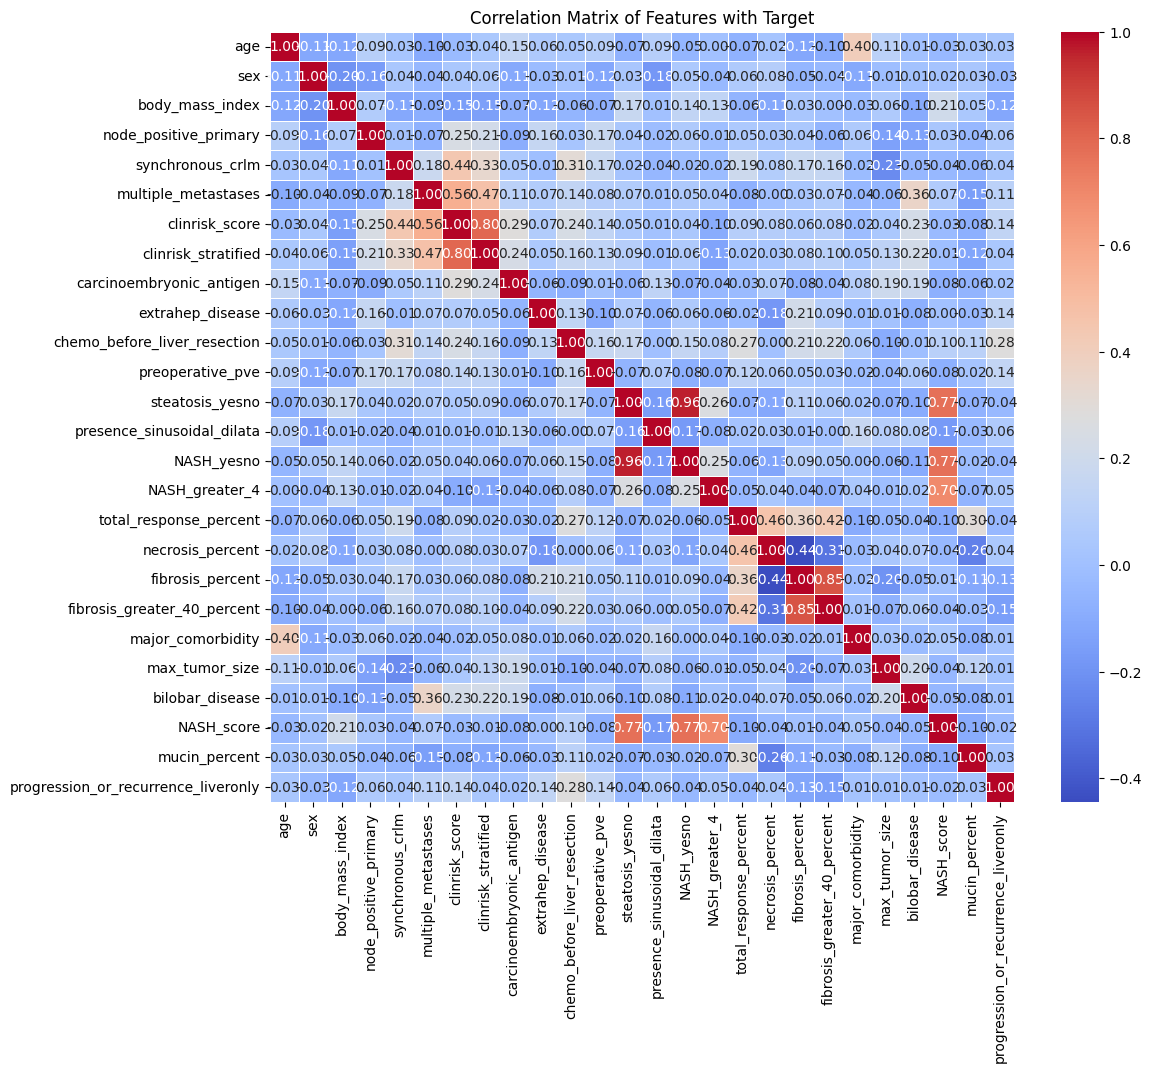

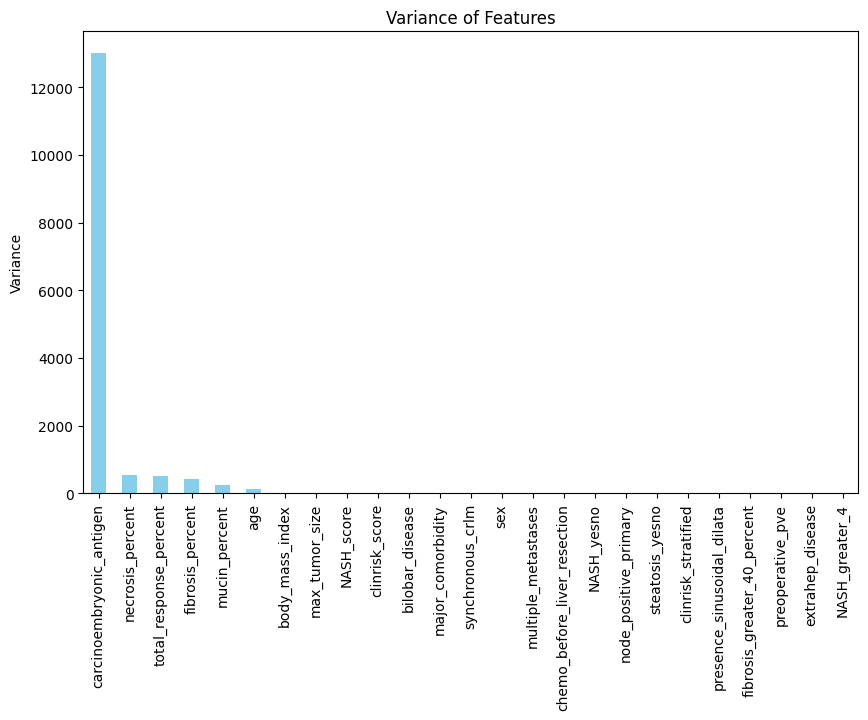

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df1 is already loaded and columns_to_keep has been defined
df1 = df1[columns_to_keep]

# Calculate correlation matrix
correlation_matrix = df1.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features with Target')
plt.show()

# Calculate variance for each feature
feature_variance = df1.drop(columns=['progression_or_recurrence_liveronly']).var()

# Plot variance of features
plt.figure(figsize=(10, 6))
feature_variance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Variance of Features')
plt.ylabel('Variance')
plt.xticks(rotation=90)
plt.show()


In [ ]:

# Print variance of features
print("Variance of Features:")
print(feature_variance)

Variance of Features:
age                               142.356955
sex                                 0.246258
body_mass_index                    24.715766
node_positive_primary               0.230486
synchronous_crlm                    0.248558
multiple_metastases                 0.246258
clinrisk_score                      0.963308
clinrisk_stratified                 0.214129
carcinoembryonic_antigen        12996.610991
extrahep_disease                    0.072618
chemo_before_liver_resection        0.235414
preoperative_pve                    0.101972
steatosis_yesno                     0.228697
presence_sinusoidal_dilata          0.124425
NASH_yesno                          0.233844
NASH_greater_4                      0.035049
total_response_percent            516.930267
necrosis_percent                  553.946696
fibrosis_percent                  414.293538
fibrosis_greater_40_percent         0.111172
major_comorbidity                   0.248558
max_tumor_size                   

In [ ]:


# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                          age       sex  body_mass_index  \
age                                  1.000000 -0.114872        -0.117519   
sex                                 -0.114872  1.000000        -0.200479   
body_mass_index                     -0.117519 -0.200479         1.000000   
node_positive_primary                0.093165 -0.158610         0.074357   
synchronous_crlm                     0.029080  0.040434        -0.112647   
multiple_metastases                 -0.104179 -0.040178        -0.086452   
clinrisk_score                      -0.029852  0.040853        -0.152125   
clinrisk_stratified                  0.041244  0.057714        -0.148818   
carcinoembryonic_antigen             0.145958 -0.106729        -0.073406   
extrahep_disease                     0.055198 -0.025391        -0.117315   
chemo_before_liver_resection         0.046342  0.013041        -0.057688   
preoperative_pve                     0.091695 -0.119575        -0.07

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


# 'label_column' should be the name of your label column
dfc1, dfc2 = train_test_split(df1, test_size=0.2, stratify=df1['progression_or_recurrence_liveronly'])

# Check the proportion of classes in both datasets
print("First DataFrame Class Proportions:")
print(dfc1[ 'progression_or_recurrence_liveronly'].value_counts(normalize=True))
print("Second DataFrame Class Proportions:")
print(dfc2 ['progression_or_recurrence_liveronly'].value_counts(normalize=True))


First DataFrame Class Proportions:
progression_or_recurrence_liveronly
0    0.613636
1    0.386364
Name: proportion, dtype: float64
Second DataFrame Class Proportions:
progression_or_recurrence_liveronly
0    0.617647
1    0.382353
Name: proportion, dtype: float64


##**Baseline Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Assume the target column is named 'progression_or_recurrence_liveronly'
target_column = 'progression_or_recurrence_liveronly'

# Split the data into features and target
X = df1.drop(columns=[target_column])
y = df1[target_column]

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Use SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
predictions = xgb_classifier.predict(X_test)

# Predict on the training set to calculate train accuracy
train_predictions = xgb_classifier.predict(X_train)

# Calculate metrics
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
report = classification_report(y_test, predictions, output_dict=True)

# Print results
print(f"Accuracy (Train Set): {train_accuracy:.4f}")
print(f"Accuracy (Test Set): {test_accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision: {report['1']['precision']:.4f}")
print(f"Recall: {report['1']['recall']:.4f}")
print(f"F1 Score: {report['1']['f1-score']:.4f}")


Accuracy (Train Set): 1.0000
Accuracy (Test Set): 0.9268
ROC AUC: 0.9262
Precision: 0.9091
Recall: 0.9524
F1 Score: 0.9302


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Assume the target column is named 'progression_or_recurrence_liveronly'
target_column = 'progression_or_recurrence_liveronly'

# Split the data into features and target
X = df1.drop(columns=[target_column])
y = df1[target_column]

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Use SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.15, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
predictions = rf_classifier.predict(X_test)

# Predict on the training set to calculate train accuracy
train_predictions = rf_classifier.predict(X_train)

# Calculate metrics
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
report = classification_report(y_test, predictions, output_dict=True)

# Print results
print(f"Accuracy (Train Set): {train_accuracy:.4f}")
print(f"Accuracy (Test Set): {test_accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision: {report['1']['precision']:.4f}")
print(f"Recall: {report['1']['recall']:.4f}")
print(f"F1 Score: {report['1']['f1-score']:.4f}")


Accuracy (Train Set): 1.0000
Accuracy (Test Set): 0.9355
ROC AUC: 0.9286
Precision: 0.8947
Recall: 1.0000
F1 Score: 0.9444


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

# Assume the target column is named 'progression_or_recurrence_liveronly'
target_column = 'progression_or_recurrence_liveronly'

# Split the data into features and target
X = df1.drop(columns=[target_column])
y = df1[target_column]

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Use SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.15, random_state=42)

# Train SVM classifier
svm_classifier = SVC(kernel='poly', random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict on the test set
predictions = svm_classifier.predict(X_test)

# Predict on the training set to calculate train accuracy
train_predictions = svm_classifier.predict(X_train)

# Calculate metrics
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
report = classification_report(y_test, predictions, output_dict=True)

# Print results
print(f"Accuracy (Train Set): {train_accuracy:.4f}")
print(f"Accuracy (Test Set): {test_accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision: {report['1']['precision']:.4f}")
print(f"Recall: {report['1']['recall']:.4f}")
print(f"F1 Score: {report['1']['f1-score']:.4f}")


Accuracy (Train Set): 0.9942
Accuracy (Test Set): 0.9355
ROC AUC: 0.9286
Precision: 0.8947
Recall: 1.0000
F1 Score: 0.9444


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Assume the target column is named 'progression_or_recurrence_liveronly'
target_column = 'progression_or_recurrence_liveronly'

# Split the data into features and target
X = df1.drop(columns=[target_column])
y = df1[target_column]

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Use SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Logistic Regression
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)
logistic_predictions = logistic_classifier.predict(X_test)

# K-Nearest Neighbors
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

# Decision Tree
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)
tree_predictions = decision_tree_classifier.predict(X_test)

# Multilayer Perceptron
mlp_classifier = MLPClassifier(random_state=42, max_iter=1000)
mlp_classifier.fit(X_train, y_train)
mlp_predictions = mlp_classifier.predict(X_test)

# Function to evaluate models
def evaluate_model(y_true, predictions):
    accuracy = accuracy_score(y_true, predictions)
    roc_auc = roc_auc_score(y_true, predictions)
    report = classification_report(y_true, predictions, output_dict=True)
    return accuracy, roc_auc, report

# Evaluate models
models = {
    'Logistic Regression': logistic_predictions,
    'KNN': knn_predictions,
    'Decision Tree': tree_predictions,
    'MLP': mlp_predictions
}

for model_name, predictions in models.items():
    train_predictions = None
    if model_name == 'Logistic Regression':
        train_predictions = logistic_classifier.predict(X_train)
    elif model_name == 'KNN':
        train_predictions = knn_classifier.predict(X_train)
    elif model_name == 'Decision Tree':
        train_predictions = decision_tree_classifier.predict(X_train)
    elif model_name == 'MLP':
        train_predictions = mlp_classifier.predict(X_train)

    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy, roc_auc, report = evaluate_model(y_test, predictions)

    # Print results
    print(f"{model_name}:")
    print(f"  Accuracy (Train Set): {train_accuracy:.4f}")
    print(f"  Accuracy (Test Set): {test_accuracy:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  Precision: {report['1']['precision']:.4f}")
    print(f"  Recall: {report['1']['recall']:.4f}")
    print(f"  F1 Score: {report['1']['f1-score']:.4f}")
    print()


Logistic Regression:
  Accuracy (Train Set): 0.9448
  Accuracy (Test Set): 0.8780
  ROC AUC: 0.8750
  Precision: 0.8077
  Recall: 1.0000
  F1 Score: 0.8936

KNN:
  Accuracy (Train Set): 0.8528
  Accuracy (Test Set): 0.8780
  ROC AUC: 0.8750
  Precision: 0.8077
  Recall: 1.0000
  F1 Score: 0.8936

Decision Tree:
  Accuracy (Train Set): 1.0000
  Accuracy (Test Set): 0.9024
  ROC AUC: 0.9012
  Precision: 0.8696
  Recall: 0.9524
  F1 Score: 0.9091

MLP:
  Accuracy (Train Set): 1.0000
  Accuracy (Test Set): 0.8537
  ROC AUC: 0.8512
  Precision: 0.8000
  Recall: 0.9524
  F1 Score: 0.8696



##**Feature Selection**

In [ ]:
!pip install torch-geometric

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Define encoders for categorical features
categorical_features = ['total_response_percent', 'necrosis_percent', 'fibrosis_percent',
                         'mucin_percent']

label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])

In [ ]:
import copy
import numpy as np
import torch_geometric.nn as gnn
import torch
from torch import nn


from GRACES import GRACES
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
from sklearn import svm
import warnings

In [ ]:

# Extract features (X) and labels (y)
X = df1[['age','sex' , 'major_comorbidity', 'body_mass_index', 'node_positive_primary',
                            'synchronous_crlm', 'multiple_metastases', 'clinrisk_score', 'clinrisk_stratified',
                            'carcinoembryonic_antigen', 'max_tumor_size', 'bilobar_disease', 'extrahep_disease',
                            'chemo_before_liver_resection', 'preoperative_pve', 'steatosis_yesno',
                            'presence_sinusoidal_dilata', 'NASH_score', 'NASH_yesno', 'NASH_greater_4',
                            'total_response_percent', 'necrosis_percent', 'fibrosis_percent',
                            'fibrosis_greater_40_percent', 'mucin_percent']]
y = df1['progression_or_recurrence_liveronly']

# Step 4: Convert data to a format compatible with GRACES
X_array = X.values
y_array = y.values

# # Step 5: Use GRACES to select features
# graces = GRACES(n_features=20)  # Specify the number of features to select
# selected_features = graces.select(X_array, y_array)

# print (selected_features)


# Grid search range on key hyperparameters
dropout_prob = [0.1, 0.5, 0.75]
f_correct = [0, 0.1, 0.5, 0.9]
# dropout_prob = [0.75]
# f_correct = [0.9]

# Initialize variables to store selected features
selected_features_dict = {}

for dropout in dropout_prob:
    for f_corr in f_correct:
        graces = GRACES(n_features=25, dropout_prob=dropout, f_correct=f_corr)  # Specify the number of features to select
        selected_features = graces.select(X_array, y_array)
        # sorted_selected_features = sorted(selected_features)
        selected_features_dict[(dropout, f_corr)] = selected_features

# Print sorted selected features for all combinations of hyperparameters
for key, sorted_selected_indices in selected_features_dict.items():
    print(f"Dropout: {key[0]}, f_correct: {key[1]}")
    print("Selected Features:")
    for idx in sorted_selected_indices:
        print(f"Index {idx}: {X.columns[idx]}")
    print()


Dropout: 0.1, f_correct: 0
Selected Features:
Index 20: total_response_percent
Index 0: age
Index 22: fibrosis_percent
Index 3: body_mass_index
Index 9: carcinoembryonic_antigen
Index 21: necrosis_percent
Index 10: max_tumor_size
Index 24: mucin_percent
Index 7: clinrisk_score
Index 1: sex
Index 11: bilobar_disease
Index 17: NASH_score
Index 2: major_comorbidity
Index 5: synchronous_crlm
Index 6: multiple_metastases
Index 19: NASH_greater_4
Index 13: chemo_before_liver_resection
Index 8: clinrisk_stratified
Index 4: node_positive_primary
Index 15: steatosis_yesno
Index 14: preoperative_pve
Index 12: extrahep_disease
Index 18: NASH_yesno
Index 16: presence_sinusoidal_dilata
Index 23: fibrosis_greater_40_percent

Dropout: 0.1, f_correct: 0.1
Selected Features:
Index 22: fibrosis_percent
Index 9: carcinoembryonic_antigen
Index 20: total_response_percent
Index 0: age
Index 21: necrosis_percent
Index 3: body_mass_index
Index 13: chemo_before_liver_resection
Index 24: mucin_percent
Index 10:

In [ ]:
sorted_selected_indices = sorted(selected_features)
print (sorted_selected_indices)

[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13, 14, 17, 18, 20, 21, 22, 23, 24]


In [ ]:

# Print the indices and names of the selected features
print("Selected Features:")
for idx in sorted_selected_indices:
    print(f"Index {idx}: {X.columns[idx]}")

Selected Features:
Index 0: age
Index 1: sex
Index 2: major_comorbidity
Index 3: body_mass_index
Index 4: node_positive_primary
Index 5: synchronous_crlm
Index 6: multiple_metastases
Index 7: clinrisk_score
Index 9: carcinoembryonic_antigen
Index 10: max_tumor_size
Index 11: bilobar_disease
Index 13: chemo_before_liver_resection
Index 14: preoperative_pve
Index 17: NASH_score
Index 18: NASH_yesno
Index 20: total_response_percent
Index 21: necrosis_percent
Index 22: fibrosis_percent
Index 23: fibrosis_greater_40_percent
Index 24: mucin_percent


In [ ]:
import networkx as nx
from networkx.readwrite import json_graph

In [ ]:
json_data = json_graph.node_link_data(G)

In [ ]:
json_data

##**Pytorch Data Object**

In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.1 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import torch
from torch_geometric.data import Dataset, Data
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr


class PatientGraphDataset(Dataset):
    def __init__(self, root, filename, test=False, transform=None, pre_transform=None):
        self.test = test
        self.filename = filename
        super(PatientGraphDataset, self).__init__(root, transform, pre_transform)

        # Check file existence
        if not os.path.exists(self.raw_paths[0]):
            raise FileNotFoundError(f"File not found: {self.raw_paths[0]}")

    @property
    def raw_file_names(self):
        return self.filename

    @property
    def processed_file_names(self):
        return 'data.pt'

    def download(self):
        pass

    def process(self):
        self.data = pd.read_csv(self.raw_paths[0])
        # Drop specified columns
        columns_to_drop = [
            'overall_survival_months', 'vital_status',
            'months_to_DFS_progression', 'vital_status_DFS',
            'months_to_liver_DFS_progression', 'vital_status_liver_DFS'
        ]
        self.data = self.data.drop(columns=columns_to_drop)

        # Drop first, second, and last columns
        self.data = self.data.drop(columns=[self.data.columns[-1], self.data.columns[1], self.data.columns[0]])

        # Remove rows with -999 values
        rows_with_minus_999 = self.data[self.data.eq(-999).any(axis=1)]
        self.data = self.data.drop(rows_with_minus_999.index)

        # Convert percentage object columns to float
        object_columns = ['total_response_percent', 'necrosis_percent',
                          'fibrosis_percent', 'mucin_percent']
        for col in object_columns:
            self.data[col] = self.data[col].astype(str).str.rstrip('%').astype(float)

        # Min-max scaling
        scaler = MinMaxScaler()
        self.data[self.data.columns] = scaler.fit_transform(self.data[self.data.columns])

        # Node features
        node_features = torch.stack([
            self._extract_node_features(p_data) for _, p_data in self.data.iterrows()
        ])

        # Labels
        labels = torch.tensor(self.data['progression_or_recurrence_liveronly'].values, dtype=torch.int64)

        # Edges
        edge_index_coo = self._compute_edge_indices(node_features)

        # Graph data object
        data = Data(x=node_features,
                    edge_index=edge_index_coo.to(torch.long),
                    y=labels)

        # Save graph
        torch.save(data, os.path.join(self.processed_dir, 'data.pt'))

    def _extract_node_features(self, patient_data):
        numerical_features = {
            'age': patient_data['age'],
            'sex': patient_data['sex'],
            'body_mass_index': patient_data['body_mass_index'],
            'node_positive_primary': patient_data['node_positive_primary'],
            'synchronous_crlm': patient_data['synchronous_crlm'],
            'multiple_metastases': patient_data['multiple_metastases'],
            'clinrisk_score': patient_data['clinrisk_score'],
            'clinrisk_stratified': patient_data['clinrisk_stratified'],
            'carcinoembryonic_antigen': patient_data['carcinoembryonic_antigen'],
            'extrahep_disease': patient_data['extrahep_disease'],
            'chemo_before_liver_resection': patient_data['chemo_before_liver_resection'],
            'preoperative_pve': patient_data['preoperative_pve'],
            'steatosis_yesno': patient_data['steatosis_yesno'],
            'presence_sinusoidal_dilata': patient_data['presence_sinusoidal_dilata'],
            'NASH_yesno': patient_data['NASH_yesno'],
            'NASH_greater_4': patient_data['NASH_greater_4'],
            'total_response_percent': patient_data['total_response_percent'],
            'necrosis_percent': patient_data['necrosis_percent'],
            'fibrosis_percent': patient_data['fibrosis_percent'],
            'fibrosis_greater_40_percent': patient_data['fibrosis_greater_40_percent'],
            'major_comorbidity': patient_data['major_comorbidity'],
            'max_tumor_size': patient_data['max_tumor_size'],
            'bilobar_disease': patient_data['bilobar_disease'],
            'NASH_score': patient_data['NASH_score'],
            'mucin_percent': patient_data['mucin_percent'],
        }

        numerical_features_list = list(numerical_features.keys())
        patient_data[numerical_features_list] = patient_data[numerical_features_list].astype(float)

        return torch.tensor(patient_data[numerical_features_list].values, dtype=torch.float)

    def _compute_edge_indices(self, all_patient_features,
                              cosine_threshold=0.5,
                              positive_pearson_threshold=0.5,
                              negative_pearson_threshold=-0.5):
        cosine_sim = self.compute_cosine_similarity(all_patient_features)
        pearson_corr = self.compute_pearson_correlation(all_patient_features)

        edges = []
        num_nodes = len(all_patient_features)
        for i in range(num_nodes):
            for j in range(i, num_nodes):
                if (cosine_sim[i, j] >= cosine_threshold and
                    (pearson_corr[i, j] >= positive_pearson_threshold or
                     pearson_corr[i, j] <= negative_pearson_threshold)):
                    edges.append((i, j))

        edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
        return edge_index

    def compute_cosine_similarity(self, x):
        x_normalized = torch.nn.functional.normalize(x, p=2, dim=1)
        return torch.matmul(x_normalized, x_normalized.t())

    def compute_pearson_correlation(self, x):
        x_np = x.numpy()
        pearson_corr = torch.tensor([
            [pearsonr(x_np[i], x_np[j])[0] for j in range(len(x_np))]
            for i in range(len(x_np))
        ])
        return pearson_corr

    def get(self, idx):

        data = torch.load(os.path.join(self.processed_dir, 'data.pt'), weights_only=False)
        return data

    def len(self):
        return 1  # Single graph dataset



data_file = 'Colorectal-Liver-Metastases-Clinical-data.csv'
dataset = PatientGraphDataset(root='drive/MyDrive/File/', filename=data_file)

# Preprocess and save graph
dataset.process()

# Load the processed graph
data = dataset.get(0)
print(data)


Data(x=[166, 25], edge_index=[2, 2011], y=[166])


In [ ]:
node_features = data.x[0]
print("Node features at index", node_features)

Node features at index tensor([6.0345e-01, 1.0000e+00, 1.7343e-01, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e-01, 0.0000e+00, 8.8467e-04, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.0000e-01, 1.1111e-01,
        6.3158e-01, 1.0000e+00, 0.0000e+00, 7.3333e-02, 0.0000e+00, 0.0000e+00,
        0.0000e+00])


In [ ]:

for node_index, label in enumerate(data.y):
    print(f"Node {node_index}: Label = {label.item()}")


Node 0: Label = 0
Node 1: Label = 1
Node 2: Label = 0
Node 3: Label = 0
Node 4: Label = 0
Node 5: Label = 0
Node 6: Label = 0
Node 7: Label = 0
Node 8: Label = 0
Node 9: Label = 0
Node 10: Label = 0
Node 11: Label = 1
Node 12: Label = 0
Node 13: Label = 0
Node 14: Label = 0
Node 15: Label = 0
Node 16: Label = 0
Node 17: Label = 0
Node 18: Label = 0
Node 19: Label = 0
Node 20: Label = 1
Node 21: Label = 0
Node 22: Label = 1
Node 23: Label = 0
Node 24: Label = 0
Node 25: Label = 1
Node 26: Label = 0
Node 27: Label = 0
Node 28: Label = 0
Node 29: Label = 1
Node 30: Label = 1
Node 31: Label = 1
Node 32: Label = 0
Node 33: Label = 0
Node 34: Label = 1
Node 35: Label = 1
Node 36: Label = 0
Node 37: Label = 1
Node 38: Label = 1
Node 39: Label = 1
Node 40: Label = 0
Node 41: Label = 0
Node 42: Label = 0
Node 43: Label = 0
Node 44: Label = 0
Node 45: Label = 1
Node 46: Label = 1
Node 47: Label = 0
Node 48: Label = 1
Node 49: Label = 0
Node 50: Label = 1
Node 51: Label = 0
Node 52: Label = 1
Nod

##**Graph**

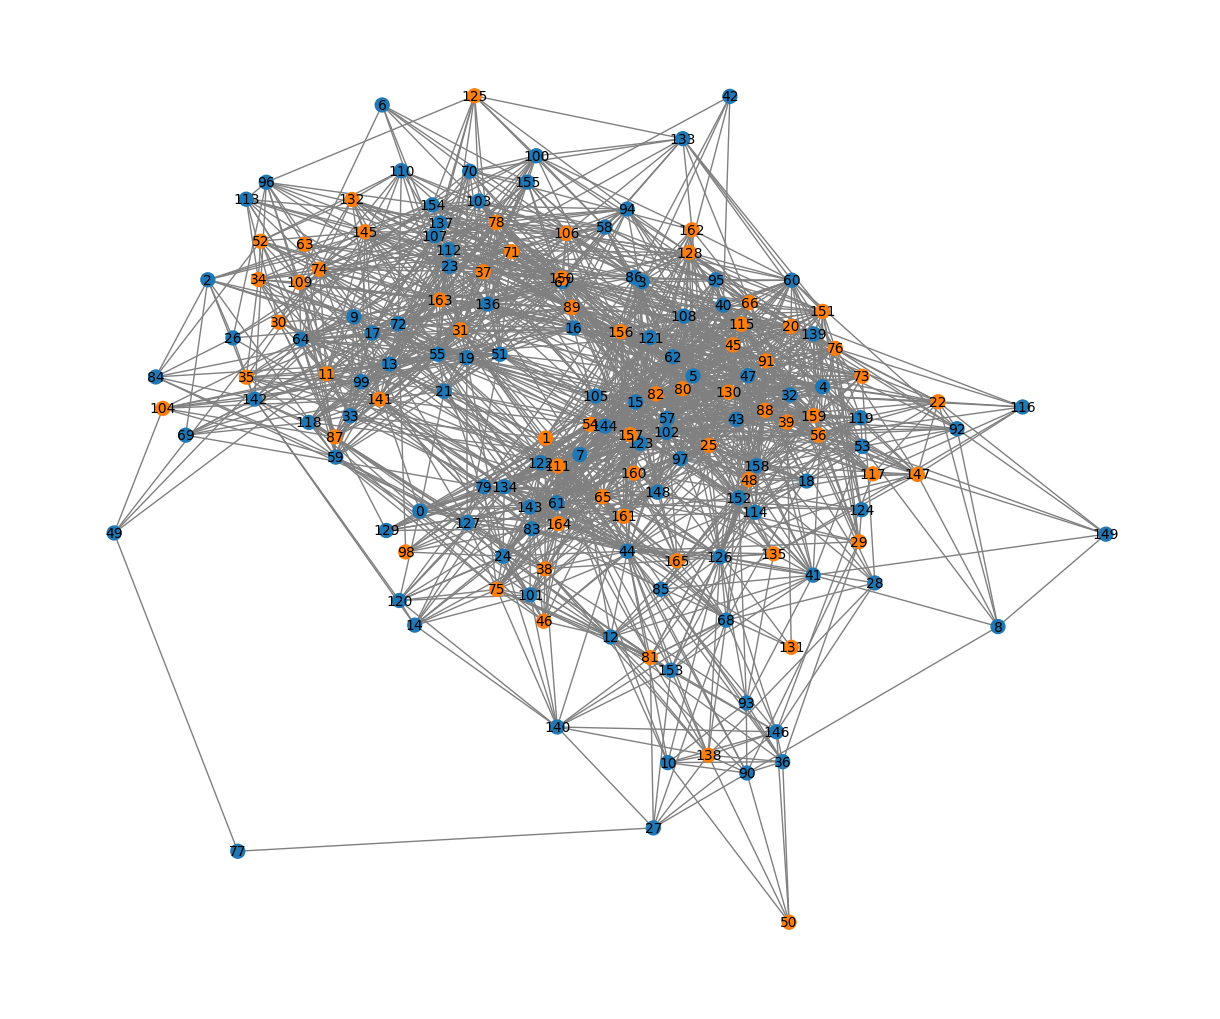

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load the processed dataset
data = dataset.get(0)

# Retrieve the edge indices
edge_index = data.edge_index.numpy()

# Retrieve the node labels
node_labels = data.y.numpy()

# Create a graph using NetworkX
G = nx.Graph()

# Add edges to the graph
for i in range(edge_index.shape[1]):
    src, dst = edge_index[:, i]
    G.add_edge(src.item(), dst.item())

# Remove self-loops
G.remove_edges_from(list(nx.selfloop_edges(G)))

# Draw the graph
plt.figure(figsize=(12, 10))

# Set the background to transparent
plt.gcf().patch.set_alpha(0)

# Define layout for the nodes
pos = nx.spring_layout(G)

# Separate nodes by their labels and assign colors
unique_labels = set(node_labels)
color_map = {label: color for label, color in zip(unique_labels, plt.cm.tab10.colors)}

# Draw nodes with separate colors based on labels
node_colors = [color_map[node_labels[node]] for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=100, edge_color='gray', linewidths=1, font_size=10)

# Save and show the plot with transparent background
plt.savefig("graph_with_transparent_bg.png", transparent=True)
plt.show()


In [ ]:
# Print the color assigned to label 0
print("Color of label 0:", color_map.get(0))


Color of label 0: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)


In [ ]:
data.get_all_tensor_attrs()

In [ ]:
print(data.edge_index)

In [ ]:
data.x

In [ ]:
print(type(data.edge_index))

In [ ]:
for edge in G.edges():
    print("Edge:", edge)

In [ ]:
print("Nodes:", G.number_of_nodes())

In [ ]:
print("Edges:", G.number_of_edges())

Edges: 3260


In [ ]:
if G.is_directed():
    print("Directed graph")
else:
    print("Undirected graph")

In [ ]:
density = nx.density(G)
print("Density:", density)

In [ ]:
deg = nx.degree_histogram(G)
print("Degree distribution:")
print(deg)

In [ ]:
import networkx as nx
from networkx.readwrite import json_graph

In [ ]:
json_data = json_graph.node_link_data(G)

In [ ]:
json_data

##**Hyper Parameter Tuning**

Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=64, Dropout Rate=0.3, Batch Size=16


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.6935, Validation Loss: 0.6503
Epoch [2/10], Training Loss: 0.6309, Validation Loss: 0.6078
Epoch [3/10], Training Loss: 0.6035, Validation Loss: 0.5873
Epoch [4/10], Training Loss: 0.5876, Validation Loss: 0.5709
Epoch [5/10], Training Loss: 0.5730, Validation Loss: 0.5588
Epoch [6/10], Training Loss: 0.5630, Validation Loss: 0.5482
Epoch [7/10], Training Loss: 0.5535, Validation Loss: 0.5384
Epoch [8/10], Training Loss: 0.5440, Validation Loss: 0.5288
Epoch [9/10], Training Loss: 0.5358, Validation Loss: 0.5202
Epoch [10/10], Training Loss: 0.5313, Validation Loss: 0.5154


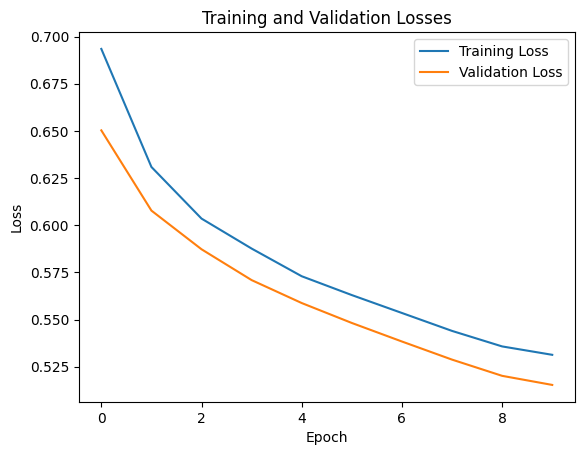

F1 Score: 0.7628, Precision: 0.7257, Recall: 0.8039, Accuracy: 0.7500
ROC AUC: 0.8217
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=64, Dropout Rate=0.3, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7225, Validation Loss: 0.6611
Epoch [2/10], Training Loss: 0.6671, Validation Loss: 0.6364
Epoch [3/10], Training Loss: 0.6374, Validation Loss: 0.6169
Epoch [4/10], Training Loss: 0.6186, Validation Loss: 0.6029
Epoch [5/10], Training Loss: 0.6083, Validation Loss: 0.5939
Epoch [6/10], Training Loss: 0.6001, Validation Loss: 0.5876
Epoch [7/10], Training Loss: 0.5931, Validation Loss: 0.5807
Epoch [8/10], Training Loss: 0.5865, Validation Loss: 0.5740
Epoch [9/10], Training Loss: 0.5791, Validation Loss: 0.5679
Epoch [10/10], Training Loss: 0.5737, Validation Loss: 0.5603


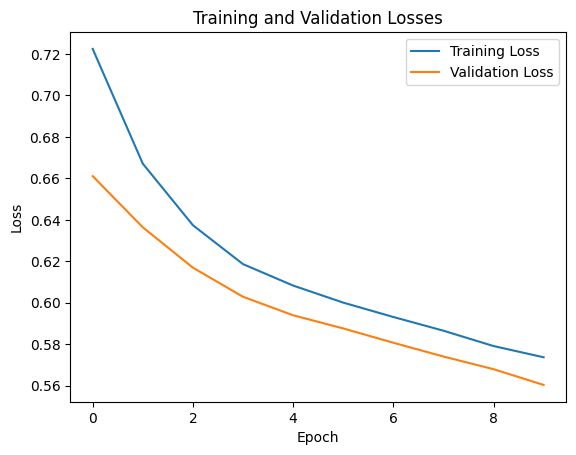

F1 Score: 0.7524, Precision: 0.7315, Recall: 0.7745, Accuracy: 0.7451
ROC AUC: 0.7837
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=64, Dropout Rate=0.3, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7527, Validation Loss: 0.6704
Epoch [2/10], Training Loss: 0.6859, Validation Loss: 0.6582
Epoch [3/10], Training Loss: 0.6545, Validation Loss: 0.6412
Epoch [4/10], Training Loss: 0.6424, Validation Loss: 0.6141
Epoch [5/10], Training Loss: 0.6254, Validation Loss: 0.6092
Epoch [6/10], Training Loss: 0.6137, Validation Loss: 0.6024
Epoch [7/10], Training Loss: 0.6098, Validation Loss: 0.5912
Epoch [8/10], Training Loss: 0.6010, Validation Loss: 0.5862
Epoch [9/10], Training Loss: 0.5933, Validation Loss: 0.5823
Epoch [10/10], Training Loss: 0.5899, Validation Loss: 0.5758


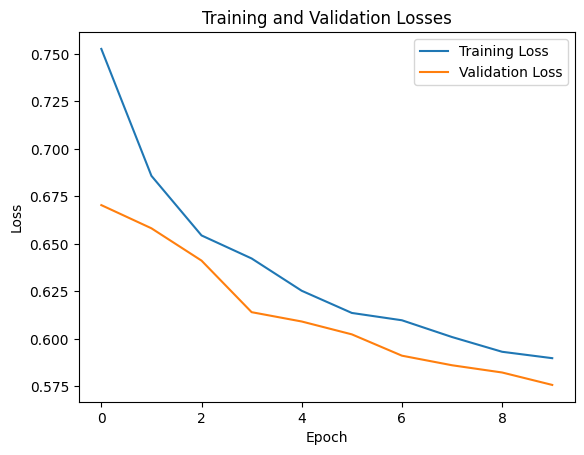

F1 Score: 0.7157, Precision: 0.7157, Recall: 0.7157, Accuracy: 0.7157
ROC AUC: 0.7733
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=64, Dropout Rate=0.3, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7142, Validation Loss: 0.6898
Epoch [2/10], Training Loss: 0.6922, Validation Loss: 0.6660
Epoch [3/10], Training Loss: 0.6725, Validation Loss: 0.6415
Epoch [4/10], Training Loss: 0.6471, Validation Loss: 0.6314
Epoch [5/10], Training Loss: 0.6379, Validation Loss: 0.6168
Epoch [6/10], Training Loss: 0.6226, Validation Loss: 0.6114
Epoch [7/10], Training Loss: 0.6185, Validation Loss: 0.6019
Epoch [8/10], Training Loss: 0.6090, Validation Loss: 0.5975
Epoch [9/10], Training Loss: 0.6044, Validation Loss: 0.5915
Epoch [10/10], Training Loss: 0.5984, Validation Loss: 0.5871


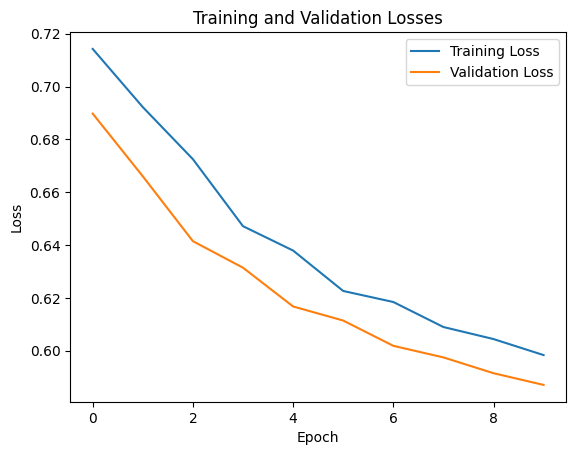

F1 Score: 0.7129, Precision: 0.7200, Recall: 0.7059, Accuracy: 0.7157
ROC AUC: 0.7636
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=64, Dropout Rate=0.5, Batch Size=16


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7070, Validation Loss: 0.6509
Epoch [2/10], Training Loss: 0.6398, Validation Loss: 0.6144
Epoch [3/10], Training Loss: 0.6093, Validation Loss: 0.5902
Epoch [4/10], Training Loss: 0.5917, Validation Loss: 0.5748
Epoch [5/10], Training Loss: 0.5804, Validation Loss: 0.5643
Epoch [6/10], Training Loss: 0.5701, Validation Loss: 0.5557
Epoch [7/10], Training Loss: 0.5617, Validation Loss: 0.5481
Epoch [8/10], Training Loss: 0.5566, Validation Loss: 0.5416
Epoch [9/10], Training Loss: 0.5498, Validation Loss: 0.5352
Epoch [10/10], Training Loss: 0.5438, Validation Loss: 0.5296


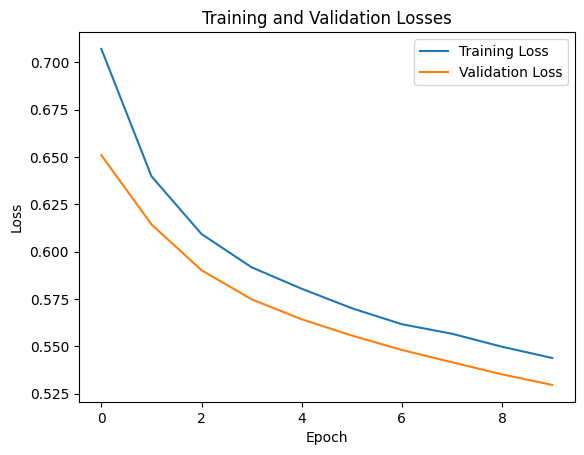

F1 Score: 0.7714, Precision: 0.7500, Recall: 0.7941, Accuracy: 0.7647
ROC AUC: 0.8090
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=64, Dropout Rate=0.5, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7421, Validation Loss: 0.7035
Epoch [2/10], Training Loss: 0.6786, Validation Loss: 0.6516
Epoch [3/10], Training Loss: 0.6445, Validation Loss: 0.6244
Epoch [4/10], Training Loss: 0.6256, Validation Loss: 0.6080
Epoch [5/10], Training Loss: 0.6124, Validation Loss: 0.5951
Epoch [6/10], Training Loss: 0.5988, Validation Loss: 0.5844
Epoch [7/10], Training Loss: 0.5878, Validation Loss: 0.5752
Epoch [8/10], Training Loss: 0.5792, Validation Loss: 0.5666
Epoch [9/10], Training Loss: 0.5725, Validation Loss: 0.5607
Epoch [10/10], Training Loss: 0.5655, Validation Loss: 0.5545


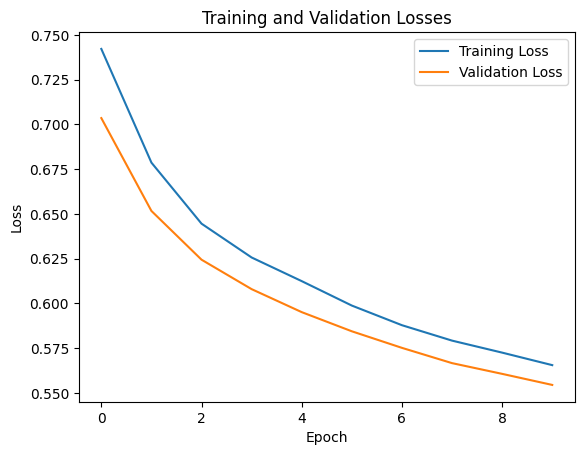

F1 Score: 0.7404, Precision: 0.7264, Recall: 0.7549, Accuracy: 0.7353
ROC AUC: 0.7896
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=64, Dropout Rate=0.5, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7729, Validation Loss: 0.6888
Epoch [2/10], Training Loss: 0.6930, Validation Loss: 0.6744
Epoch [3/10], Training Loss: 0.6694, Validation Loss: 0.6395
Epoch [4/10], Training Loss: 0.6452, Validation Loss: 0.6155
Epoch [5/10], Training Loss: 0.6251, Validation Loss: 0.6072
Epoch [6/10], Training Loss: 0.6135, Validation Loss: 0.6042
Epoch [7/10], Training Loss: 0.6077, Validation Loss: 0.5952
Epoch [8/10], Training Loss: 0.6030, Validation Loss: 0.5854
Epoch [9/10], Training Loss: 0.5944, Validation Loss: 0.5786
Epoch [10/10], Training Loss: 0.5876, Validation Loss: 0.5752


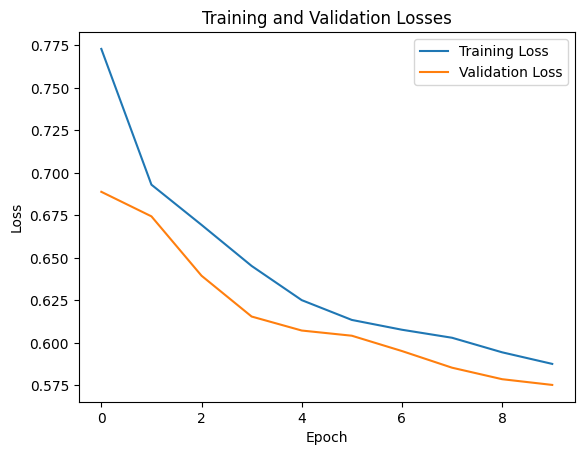

F1 Score: 0.7000, Precision: 0.7143, Recall: 0.6863, Accuracy: 0.7059
ROC AUC: 0.7729
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=64, Dropout Rate=0.5, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7180, Validation Loss: 0.6750
Epoch [2/10], Training Loss: 0.6819, Validation Loss: 0.6912
Epoch [3/10], Training Loss: 0.6965, Validation Loss: 0.6394
Epoch [4/10], Training Loss: 0.6449, Validation Loss: 0.6494
Epoch [5/10], Training Loss: 0.6535, Validation Loss: 0.6220
Epoch [6/10], Training Loss: 0.6279, Validation Loss: 0.6173
Epoch [7/10], Training Loss: 0.6213, Validation Loss: 0.6100
Epoch [8/10], Training Loss: 0.6134, Validation Loss: 0.6003
Epoch [9/10], Training Loss: 0.6076, Validation Loss: 0.6003
Epoch [10/10], Training Loss: 0.6066, Validation Loss: 0.5909


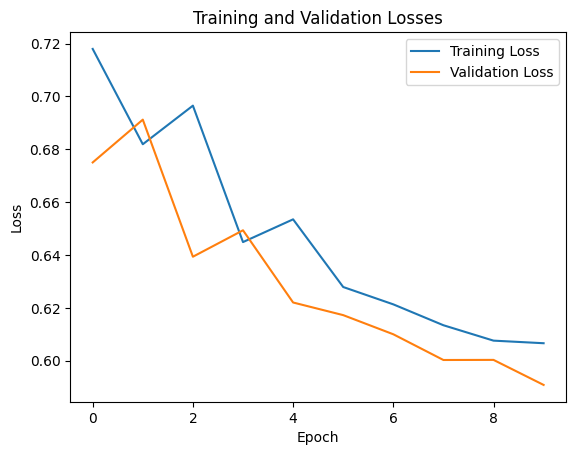

F1 Score: 0.7364, Precision: 0.6864, Recall: 0.7941, Accuracy: 0.7157
ROC AUC: 0.7546
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=64, Dropout Rate=0.7, Batch Size=16


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7179, Validation Loss: 0.6539
Epoch [2/10], Training Loss: 0.6393, Validation Loss: 0.6028
Epoch [3/10], Training Loss: 0.6049, Validation Loss: 0.5816
Epoch [4/10], Training Loss: 0.5865, Validation Loss: 0.5673
Epoch [5/10], Training Loss: 0.5726, Validation Loss: 0.5574
Epoch [6/10], Training Loss: 0.5641, Validation Loss: 0.5462
Epoch [7/10], Training Loss: 0.5527, Validation Loss: 0.5362
Epoch [8/10], Training Loss: 0.5438, Validation Loss: 0.5280
Epoch [9/10], Training Loss: 0.5363, Validation Loss: 0.5189
Epoch [10/10], Training Loss: 0.5305, Validation Loss: 0.5114


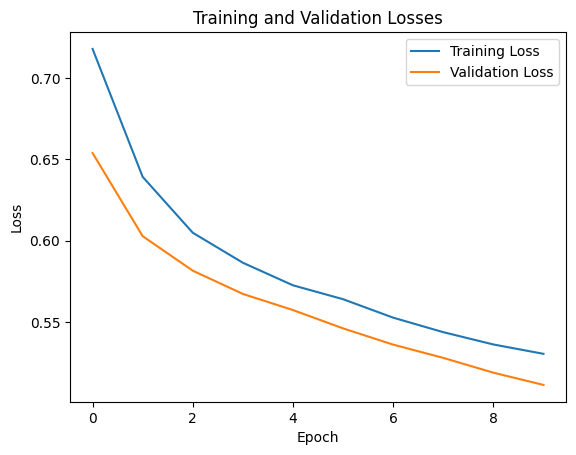

F1 Score: 0.7810, Precision: 0.7593, Recall: 0.8039, Accuracy: 0.7745
ROC AUC: 0.8219
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=64, Dropout Rate=0.7, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7309, Validation Loss: 0.6821
Epoch [2/10], Training Loss: 0.6657, Validation Loss: 0.6356
Epoch [3/10], Training Loss: 0.6347, Validation Loss: 0.6142
Epoch [4/10], Training Loss: 0.6155, Validation Loss: 0.6012
Epoch [5/10], Training Loss: 0.6039, Validation Loss: 0.5900
Epoch [6/10], Training Loss: 0.5937, Validation Loss: 0.5812
Epoch [7/10], Training Loss: 0.5869, Validation Loss: 0.5733
Epoch [8/10], Training Loss: 0.5785, Validation Loss: 0.5671
Epoch [9/10], Training Loss: 0.5731, Validation Loss: 0.5620
Epoch [10/10], Training Loss: 0.5681, Validation Loss: 0.5557


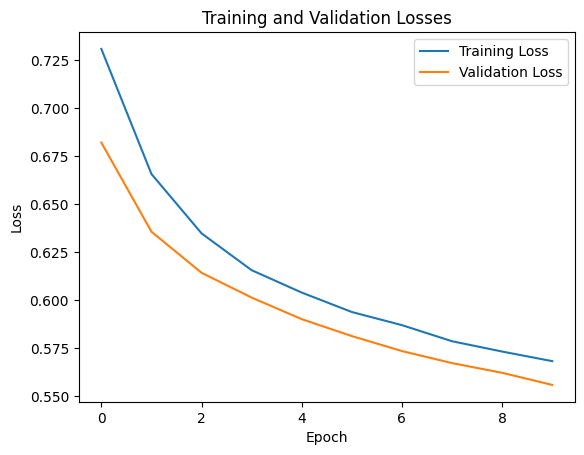

F1 Score: 0.7343, Precision: 0.7238, Recall: 0.7451, Accuracy: 0.7304
ROC AUC: 0.7872
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=64, Dropout Rate=0.7, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7999, Validation Loss: 0.7685
Epoch [2/10], Training Loss: 0.7423, Validation Loss: 0.6660
Epoch [3/10], Training Loss: 0.6758, Validation Loss: 0.6794
Epoch [4/10], Training Loss: 0.6737, Validation Loss: 0.6400
Epoch [5/10], Training Loss: 0.6430, Validation Loss: 0.6352
Epoch [6/10], Training Loss: 0.6369, Validation Loss: 0.6181
Epoch [7/10], Training Loss: 0.6221, Validation Loss: 0.6146
Epoch [8/10], Training Loss: 0.6184, Validation Loss: 0.6038
Epoch [9/10], Training Loss: 0.6081, Validation Loss: 0.6007
Epoch [10/10], Training Loss: 0.6058, Validation Loss: 0.5931


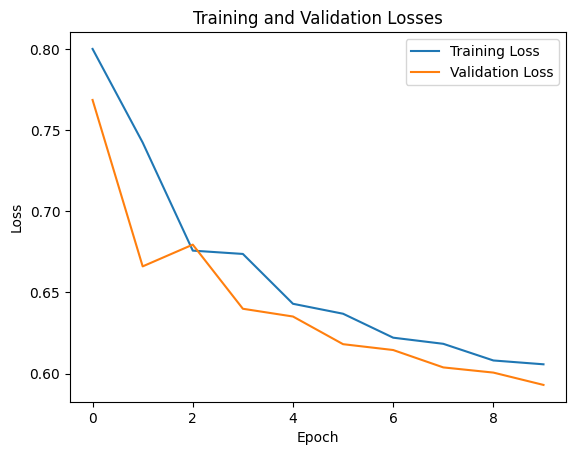

F1 Score: 0.7256, Precision: 0.6903, Recall: 0.7647, Accuracy: 0.7108
ROC AUC: 0.7511
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=64, Dropout Rate=0.7, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.8363, Validation Loss: 0.7701
Epoch [2/10], Training Loss: 0.7753, Validation Loss: 0.6863
Epoch [3/10], Training Loss: 0.6923, Validation Loss: 0.6914
Epoch [4/10], Training Loss: 0.6958, Validation Loss: 0.6744
Epoch [5/10], Training Loss: 0.6783, Validation Loss: 0.6482
Epoch [6/10], Training Loss: 0.6542, Validation Loss: 0.6476
Epoch [7/10], Training Loss: 0.6553, Validation Loss: 0.6359
Epoch [8/10], Training Loss: 0.6395, Validation Loss: 0.6234
Epoch [9/10], Training Loss: 0.6293, Validation Loss: 0.6230
Epoch [10/10], Training Loss: 0.6282, Validation Loss: 0.6125


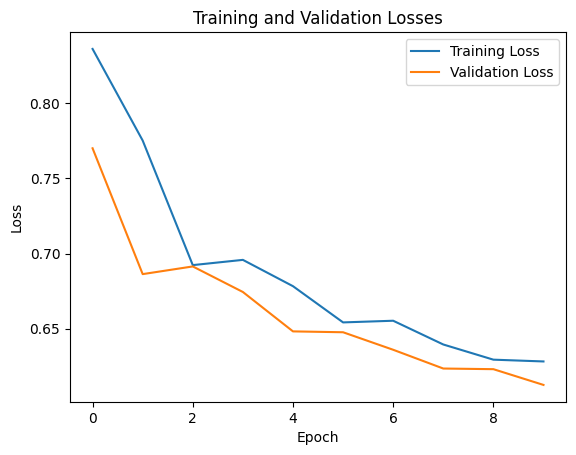

F1 Score: 0.6794, Precision: 0.6636, Recall: 0.6961, Accuracy: 0.6716
ROC AUC: 0.7314
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=128, Dropout Rate=0.3, Batch Size=16


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7042, Validation Loss: 0.6339
Epoch [2/10], Training Loss: 0.6247, Validation Loss: 0.5979
Epoch [3/10], Training Loss: 0.5926, Validation Loss: 0.5740
Epoch [4/10], Training Loss: 0.5733, Validation Loss: 0.5579
Epoch [5/10], Training Loss: 0.5602, Validation Loss: 0.5452
Epoch [6/10], Training Loss: 0.5482, Validation Loss: 0.5332
Epoch [7/10], Training Loss: 0.5373, Validation Loss: 0.5209
Epoch [8/10], Training Loss: 0.5275, Validation Loss: 0.5135
Epoch [9/10], Training Loss: 0.5189, Validation Loss: 0.5016
Epoch [10/10], Training Loss: 0.5085, Validation Loss: 0.4922


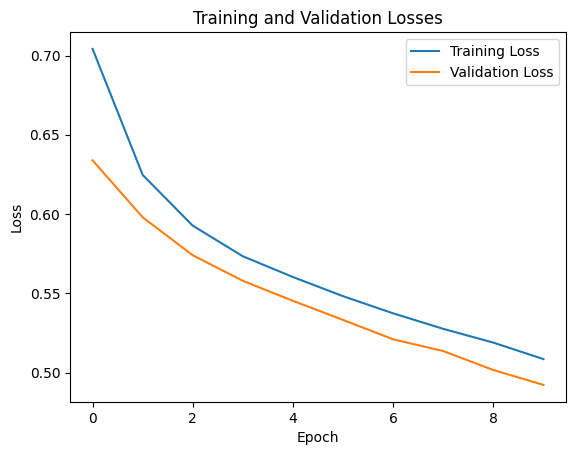

F1 Score: 0.7723, Precision: 0.7800, Recall: 0.7647, Accuracy: 0.7745
ROC AUC: 0.8361
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=128, Dropout Rate=0.3, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7430, Validation Loss: 0.6751
Epoch [2/10], Training Loss: 0.6557, Validation Loss: 0.6406
Epoch [3/10], Training Loss: 0.6280, Validation Loss: 0.6145
Epoch [4/10], Training Loss: 0.6091, Validation Loss: 0.5955
Epoch [5/10], Training Loss: 0.5963, Validation Loss: 0.5843
Epoch [6/10], Training Loss: 0.5863, Validation Loss: 0.5767
Epoch [7/10], Training Loss: 0.5787, Validation Loss: 0.5693
Epoch [8/10], Training Loss: 0.5722, Validation Loss: 0.5619
Epoch [9/10], Training Loss: 0.5657, Validation Loss: 0.5564
Epoch [10/10], Training Loss: 0.5605, Validation Loss: 0.5520


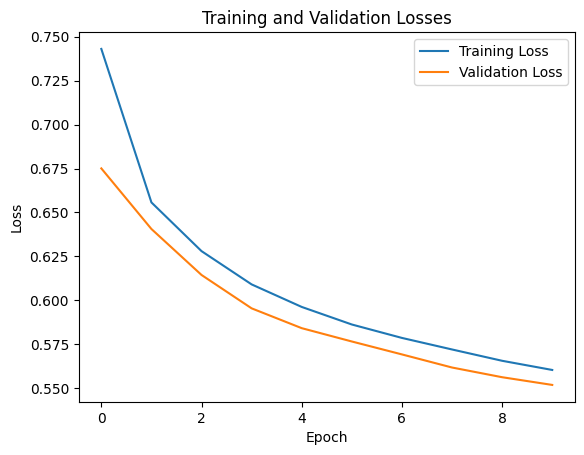

F1 Score: 0.7664, Precision: 0.7321, Recall: 0.8039, Accuracy: 0.7549
ROC AUC: 0.7901
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=128, Dropout Rate=0.3, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.8443, Validation Loss: 0.6836
Epoch [2/10], Training Loss: 0.7130, Validation Loss: 0.6946
Epoch [3/10], Training Loss: 0.6768, Validation Loss: 0.6615
Epoch [4/10], Training Loss: 0.6625, Validation Loss: 0.6156
Epoch [5/10], Training Loss: 0.6250, Validation Loss: 0.6154
Epoch [6/10], Training Loss: 0.6128, Validation Loss: 0.6061
Epoch [7/10], Training Loss: 0.6088, Validation Loss: 0.5875
Epoch [8/10], Training Loss: 0.5949, Validation Loss: 0.5854
Epoch [9/10], Training Loss: 0.5866, Validation Loss: 0.5798
Epoch [10/10], Training Loss: 0.5835, Validation Loss: 0.5691


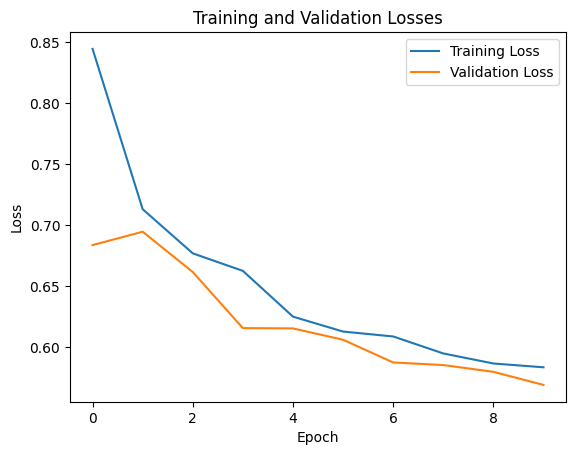

F1 Score: 0.7379, Precision: 0.7308, Recall: 0.7451, Accuracy: 0.7353
ROC AUC: 0.7746
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=128, Dropout Rate=0.3, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7005, Validation Loss: 0.6533
Epoch [2/10], Training Loss: 0.6621, Validation Loss: 0.6550
Epoch [3/10], Training Loss: 0.6561, Validation Loss: 0.6515
Epoch [4/10], Training Loss: 0.6560, Validation Loss: 0.6349
Epoch [5/10], Training Loss: 0.6361, Validation Loss: 0.6179
Epoch [6/10], Training Loss: 0.6208, Validation Loss: 0.6227
Epoch [7/10], Training Loss: 0.6242, Validation Loss: 0.6022
Epoch [8/10], Training Loss: 0.6053, Validation Loss: 0.6030
Epoch [9/10], Training Loss: 0.6054, Validation Loss: 0.5927
Epoch [10/10], Training Loss: 0.5953, Validation Loss: 0.5905


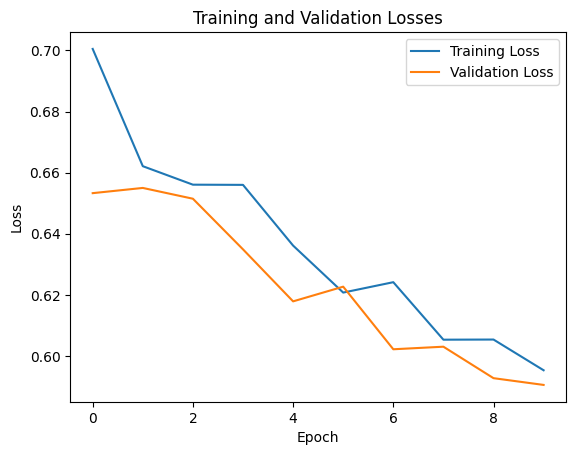

F1 Score: 0.7100, Precision: 0.7245, Recall: 0.6961, Accuracy: 0.7157
ROC AUC: 0.7550
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=128, Dropout Rate=0.5, Batch Size=16


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.6962, Validation Loss: 0.6348
Epoch [2/10], Training Loss: 0.6248, Validation Loss: 0.5972
Epoch [3/10], Training Loss: 0.5934, Validation Loss: 0.5758
Epoch [4/10], Training Loss: 0.5749, Validation Loss: 0.5600
Epoch [5/10], Training Loss: 0.5613, Validation Loss: 0.5502
Epoch [6/10], Training Loss: 0.5517, Validation Loss: 0.5384
Epoch [7/10], Training Loss: 0.5419, Validation Loss: 0.5287
Epoch [8/10], Training Loss: 0.5302, Validation Loss: 0.5173
Epoch [9/10], Training Loss: 0.5212, Validation Loss: 0.5075
Epoch [10/10], Training Loss: 0.5125, Validation Loss: 0.4971


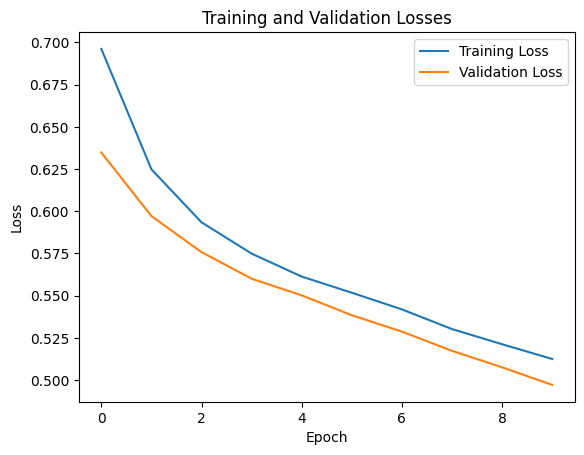

F1 Score: 0.7822, Precision: 0.7900, Recall: 0.7745, Accuracy: 0.7843
ROC AUC: 0.8337
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=128, Dropout Rate=0.5, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7186, Validation Loss: 0.6374
Epoch [2/10], Training Loss: 0.6475, Validation Loss: 0.6253
Epoch [3/10], Training Loss: 0.6195, Validation Loss: 0.6021
Epoch [4/10], Training Loss: 0.5989, Validation Loss: 0.5816
Epoch [5/10], Training Loss: 0.5868, Validation Loss: 0.5754
Epoch [6/10], Training Loss: 0.5776, Validation Loss: 0.5634
Epoch [7/10], Training Loss: 0.5673, Validation Loss: 0.5573
Epoch [8/10], Training Loss: 0.5609, Validation Loss: 0.5515
Epoch [9/10], Training Loss: 0.5568, Validation Loss: 0.5448
Epoch [10/10], Training Loss: 0.5494, Validation Loss: 0.5388


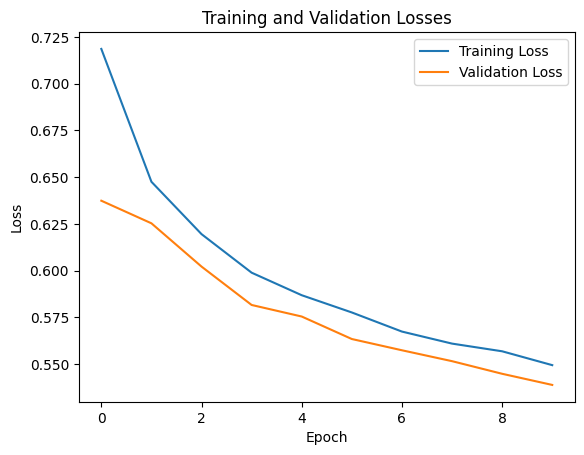

F1 Score: 0.7536, Precision: 0.7429, Recall: 0.7647, Accuracy: 0.7500
ROC AUC: 0.8016
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=128, Dropout Rate=0.5, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7687, Validation Loss: 0.6794
Epoch [2/10], Training Loss: 0.7034, Validation Loss: 0.6392
Epoch [3/10], Training Loss: 0.6445, Validation Loss: 0.6564
Epoch [4/10], Training Loss: 0.6492, Validation Loss: 0.6160
Epoch [5/10], Training Loss: 0.6247, Validation Loss: 0.6129
Epoch [6/10], Training Loss: 0.6108, Validation Loss: 0.6000
Epoch [7/10], Training Loss: 0.6017, Validation Loss: 0.5877
Epoch [8/10], Training Loss: 0.5921, Validation Loss: 0.5823
Epoch [9/10], Training Loss: 0.5860, Validation Loss: 0.5786
Epoch [10/10], Training Loss: 0.5818, Validation Loss: 0.5735


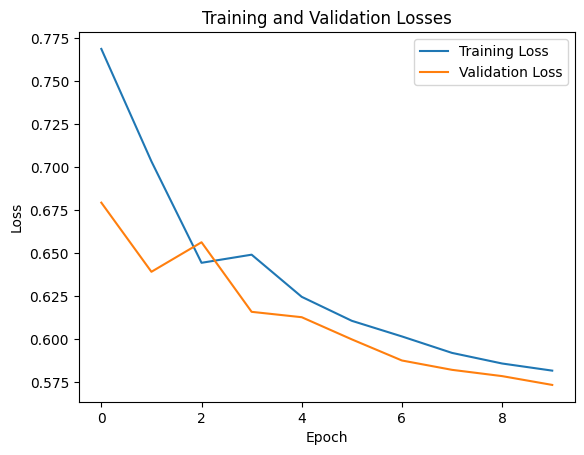

F1 Score: 0.7041, Precision: 0.7340, Recall: 0.6765, Accuracy: 0.7157
ROC AUC: 0.7714
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=128, Dropout Rate=0.5, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7381, Validation Loss: 0.7008
Epoch [2/10], Training Loss: 0.6997, Validation Loss: 0.6835
Epoch [3/10], Training Loss: 0.6874, Validation Loss: 0.6602
Epoch [4/10], Training Loss: 0.6621, Validation Loss: 0.6410
Epoch [5/10], Training Loss: 0.6451, Validation Loss: 0.6424
Epoch [6/10], Training Loss: 0.6450, Validation Loss: 0.6194
Epoch [7/10], Training Loss: 0.6237, Validation Loss: 0.6208
Epoch [8/10], Training Loss: 0.6229, Validation Loss: 0.6073
Epoch [9/10], Training Loss: 0.6095, Validation Loss: 0.6038
Epoch [10/10], Training Loss: 0.6066, Validation Loss: 0.5942


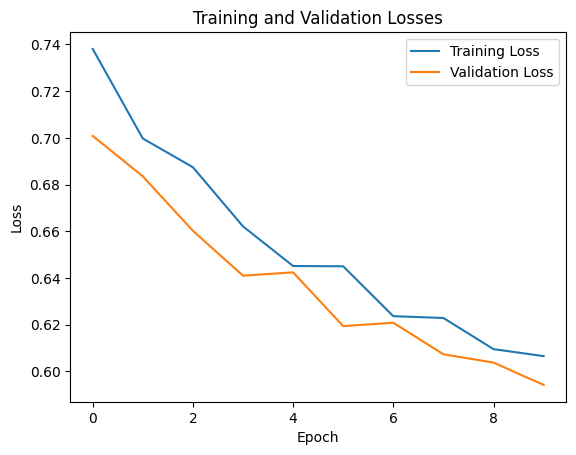

F1 Score: 0.7019, Precision: 0.6887, Recall: 0.7157, Accuracy: 0.6961
ROC AUC: 0.7551
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=128, Dropout Rate=0.7, Batch Size=16


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.6580, Validation Loss: 0.6137
Epoch [2/10], Training Loss: 0.6051, Validation Loss: 0.5901
Epoch [3/10], Training Loss: 0.5820, Validation Loss: 0.5659
Epoch [4/10], Training Loss: 0.5654, Validation Loss: 0.5539
Epoch [5/10], Training Loss: 0.5552, Validation Loss: 0.5428
Epoch [6/10], Training Loss: 0.5453, Validation Loss: 0.5325
Epoch [7/10], Training Loss: 0.5330, Validation Loss: 0.5187
Epoch [8/10], Training Loss: 0.5205, Validation Loss: 0.5063
Epoch [9/10], Training Loss: 0.5119, Validation Loss: 0.4958
Epoch [10/10], Training Loss: 0.5012, Validation Loss: 0.4929


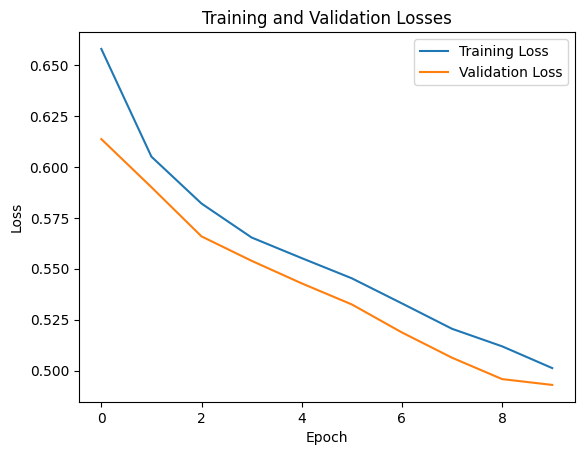

F1 Score: 0.7500, Precision: 0.6885, Recall: 0.8235, Accuracy: 0.7255
ROC AUC: 0.8400
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=128, Dropout Rate=0.7, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7558, Validation Loss: 0.7106
Epoch [2/10], Training Loss: 0.6733, Validation Loss: 0.6574
Epoch [3/10], Training Loss: 0.6410, Validation Loss: 0.6290
Epoch [4/10], Training Loss: 0.6217, Validation Loss: 0.6101
Epoch [5/10], Training Loss: 0.6086, Validation Loss: 0.5963
Epoch [6/10], Training Loss: 0.5966, Validation Loss: 0.5840
Epoch [7/10], Training Loss: 0.5863, Validation Loss: 0.5755
Epoch [8/10], Training Loss: 0.5775, Validation Loss: 0.5671
Epoch [9/10], Training Loss: 0.5700, Validation Loss: 0.5596
Epoch [10/10], Training Loss: 0.5638, Validation Loss: 0.5536


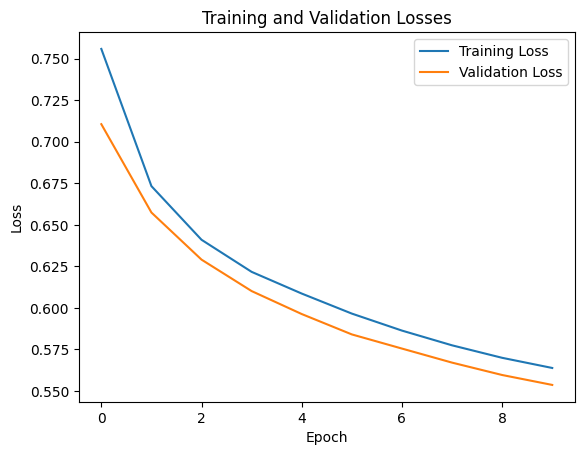

F1 Score: 0.7282, Precision: 0.7212, Recall: 0.7353, Accuracy: 0.7255
ROC AUC: 0.7881
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=128, Dropout Rate=0.7, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7802, Validation Loss: 0.6752
Epoch [2/10], Training Loss: 0.7041, Validation Loss: 0.6514
Epoch [3/10], Training Loss: 0.6487, Validation Loss: 0.6601
Epoch [4/10], Training Loss: 0.6580, Validation Loss: 0.6235
Epoch [5/10], Training Loss: 0.6260, Validation Loss: 0.6261
Epoch [6/10], Training Loss: 0.6237, Validation Loss: 0.6034
Epoch [7/10], Training Loss: 0.6060, Validation Loss: 0.6001
Epoch [8/10], Training Loss: 0.6004, Validation Loss: 0.5879
Epoch [9/10], Training Loss: 0.5918, Validation Loss: 0.5806
Epoch [10/10], Training Loss: 0.5847, Validation Loss: 0.5763


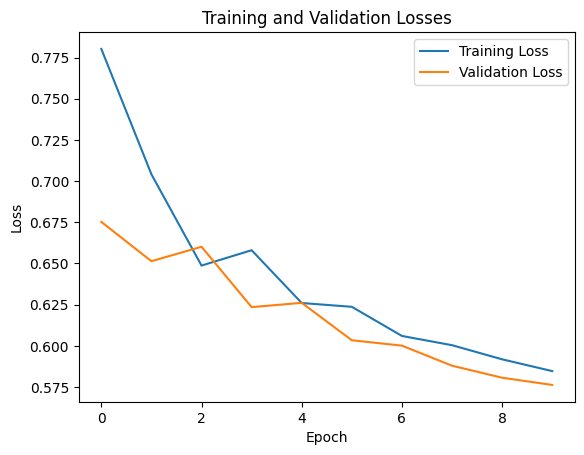

F1 Score: 0.7477, Precision: 0.6917, Recall: 0.8137, Accuracy: 0.7255
ROC AUC: 0.7671
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=128, Dropout Rate=0.7, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7248, Validation Loss: 0.6737
Epoch [2/10], Training Loss: 0.6829, Validation Loss: 0.7492
Epoch [3/10], Training Loss: 0.7497, Validation Loss: 0.6430
Epoch [4/10], Training Loss: 0.6489, Validation Loss: 0.6798
Epoch [5/10], Training Loss: 0.6828, Validation Loss: 0.6368
Epoch [6/10], Training Loss: 0.6390, Validation Loss: 0.6304
Epoch [7/10], Training Loss: 0.6342, Validation Loss: 0.6368
Epoch [8/10], Training Loss: 0.6406, Validation Loss: 0.6131
Epoch [9/10], Training Loss: 0.6163, Validation Loss: 0.6127
Epoch [10/10], Training Loss: 0.6161, Validation Loss: 0.6085


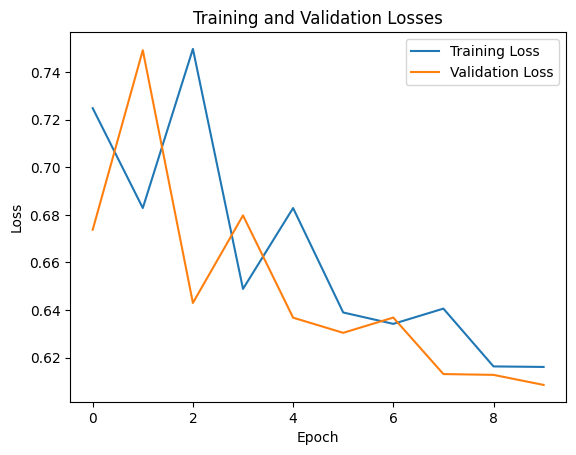

F1 Score: 0.6392, Precision: 0.6739, Recall: 0.6078, Accuracy: 0.6569
ROC AUC: 0.7392
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=256, Dropout Rate=0.3, Batch Size=16


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7557, Validation Loss: 0.6852
Epoch [2/10], Training Loss: 0.6445, Validation Loss: 0.6079
Epoch [3/10], Training Loss: 0.6021, Validation Loss: 0.5895
Epoch [4/10], Training Loss: 0.5837, Validation Loss: 0.5690
Epoch [5/10], Training Loss: 0.5672, Validation Loss: 0.5554
Epoch [6/10], Training Loss: 0.5555, Validation Loss: 0.5437
Epoch [7/10], Training Loss: 0.5447, Validation Loss: 0.5335
Epoch [8/10], Training Loss: 0.5349, Validation Loss: 0.5225
Epoch [9/10], Training Loss: 0.5264, Validation Loss: 0.5114
Epoch [10/10], Training Loss: 0.5167, Validation Loss: 0.5023


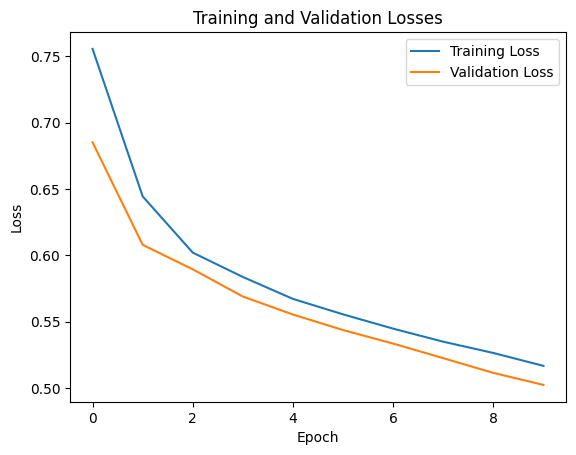

F1 Score: 0.7751, Precision: 0.7570, Recall: 0.7941, Accuracy: 0.7696
ROC AUC: 0.8275
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=256, Dropout Rate=0.3, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.8598, Validation Loss: 0.7182
Epoch [2/10], Training Loss: 0.6806, Validation Loss: 0.6745
Epoch [3/10], Training Loss: 0.6445, Validation Loss: 0.6481
Epoch [4/10], Training Loss: 0.6297, Validation Loss: 0.6096
Epoch [5/10], Training Loss: 0.6096, Validation Loss: 0.5919
Epoch [6/10], Training Loss: 0.5960, Validation Loss: 0.5835
Epoch [7/10], Training Loss: 0.5858, Validation Loss: 0.5764
Epoch [8/10], Training Loss: 0.5776, Validation Loss: 0.5688
Epoch [9/10], Training Loss: 0.5700, Validation Loss: 0.5618
Epoch [10/10], Training Loss: 0.5632, Validation Loss: 0.5553


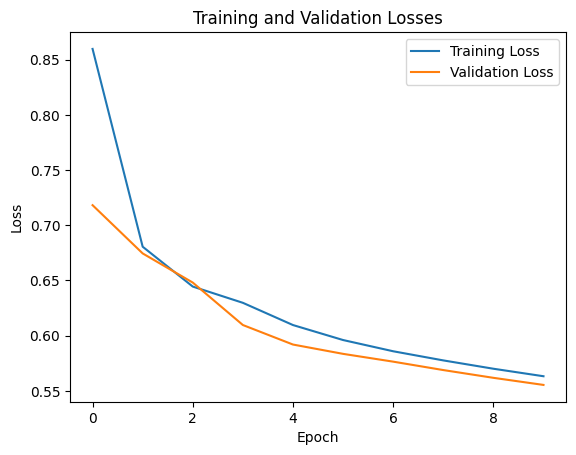

F1 Score: 0.7721, Precision: 0.7345, Recall: 0.8137, Accuracy: 0.7598
ROC AUC: 0.7862
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=256, Dropout Rate=0.3, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.9241, Validation Loss: 0.6790
Epoch [2/10], Training Loss: 0.7350, Validation Loss: 0.6776
Epoch [3/10], Training Loss: 0.6642, Validation Loss: 0.6680
Epoch [4/10], Training Loss: 0.6697, Validation Loss: 0.6409
Epoch [5/10], Training Loss: 0.6323, Validation Loss: 0.6303
Epoch [6/10], Training Loss: 0.6304, Validation Loss: 0.6093
Epoch [7/10], Training Loss: 0.6089, Validation Loss: 0.6035
Epoch [8/10], Training Loss: 0.6037, Validation Loss: 0.5941
Epoch [9/10], Training Loss: 0.5952, Validation Loss: 0.5895
Epoch [10/10], Training Loss: 0.5905, Validation Loss: 0.5807


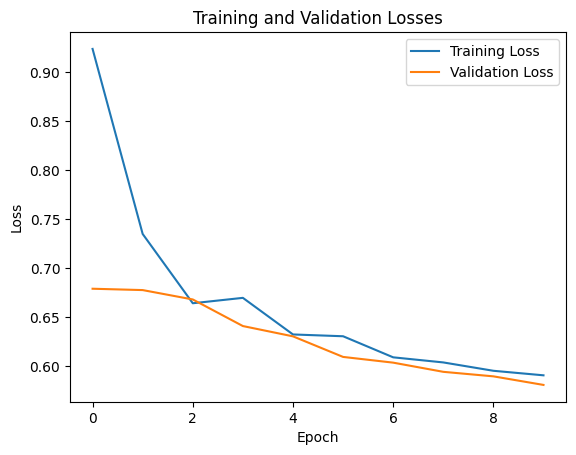

F1 Score: 0.7534, Precision: 0.6942, Recall: 0.8235, Accuracy: 0.7304
ROC AUC: 0.7603
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=256, Dropout Rate=0.3, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7264, Validation Loss: 0.6462
Epoch [2/10], Training Loss: 0.6727, Validation Loss: 0.7615
Epoch [3/10], Training Loss: 0.7528, Validation Loss: 0.6576
Epoch [4/10], Training Loss: 0.6635, Validation Loss: 0.7094
Epoch [5/10], Training Loss: 0.7082, Validation Loss: 0.6530
Epoch [6/10], Training Loss: 0.6533, Validation Loss: 0.6348
Epoch [7/10], Training Loss: 0.6374, Validation Loss: 0.6527
Epoch [8/10], Training Loss: 0.6532, Validation Loss: 0.6386
Epoch [9/10], Training Loss: 0.6386, Validation Loss: 0.6157
Epoch [10/10], Training Loss: 0.6162, Validation Loss: 0.6149


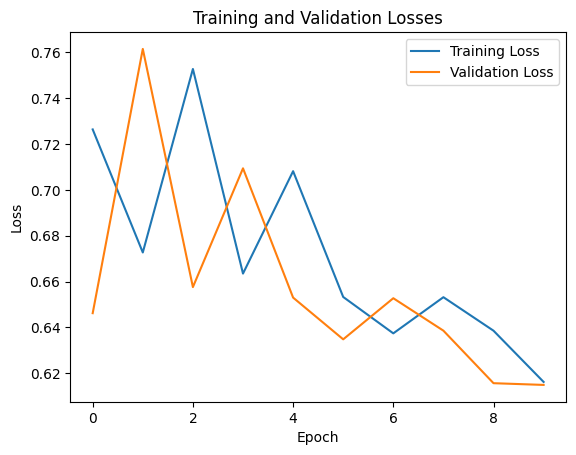

F1 Score: 0.7317, Precision: 0.6250, Recall: 0.8824, Accuracy: 0.6765
ROC AUC: 0.7546
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=256, Dropout Rate=0.5, Batch Size=16


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7425, Validation Loss: 0.6582
Epoch [2/10], Training Loss: 0.6315, Validation Loss: 0.6032
Epoch [3/10], Training Loss: 0.5958, Validation Loss: 0.5794
Epoch [4/10], Training Loss: 0.5748, Validation Loss: 0.5610
Epoch [5/10], Training Loss: 0.5582, Validation Loss: 0.5457
Epoch [6/10], Training Loss: 0.5462, Validation Loss: 0.5332
Epoch [7/10], Training Loss: 0.5353, Validation Loss: 0.5210
Epoch [8/10], Training Loss: 0.5231, Validation Loss: 0.5082
Epoch [9/10], Training Loss: 0.5134, Validation Loss: 0.4977
Epoch [10/10], Training Loss: 0.5070, Validation Loss: 0.4908


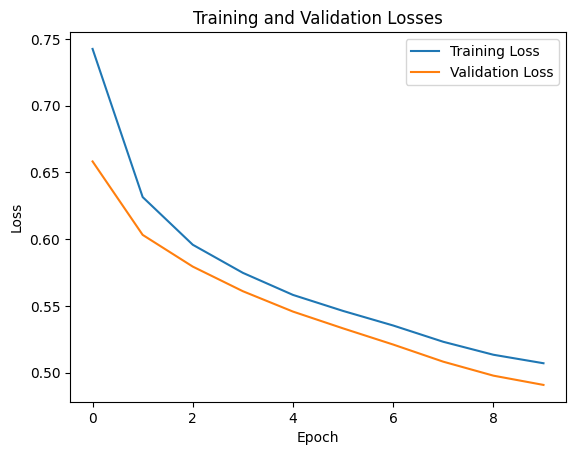

F1 Score: 0.7593, Precision: 0.7193, Recall: 0.8039, Accuracy: 0.7451
ROC AUC: 0.8400
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=256, Dropout Rate=0.5, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7185, Validation Loss: 0.6699
Epoch [2/10], Training Loss: 0.6491, Validation Loss: 0.6395
Epoch [3/10], Training Loss: 0.6195, Validation Loss: 0.6056
Epoch [4/10], Training Loss: 0.5975, Validation Loss: 0.5830
Epoch [5/10], Training Loss: 0.5830, Validation Loss: 0.5703
Epoch [6/10], Training Loss: 0.5722, Validation Loss: 0.5648
Epoch [7/10], Training Loss: 0.5638, Validation Loss: 0.5520
Epoch [8/10], Training Loss: 0.5547, Validation Loss: 0.5462
Epoch [9/10], Training Loss: 0.5474, Validation Loss: 0.5385
Epoch [10/10], Training Loss: 0.5396, Validation Loss: 0.5303


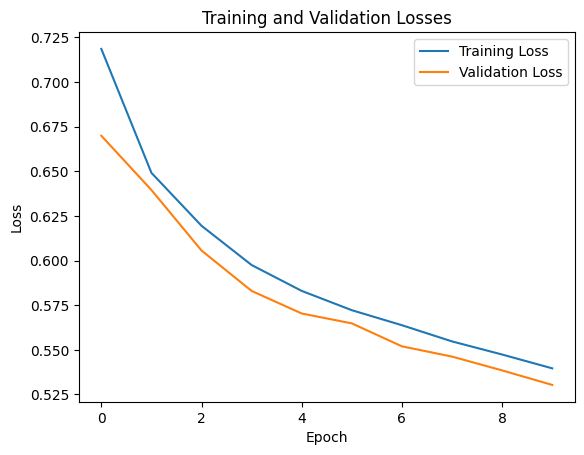

F1 Score: 0.7793, Precision: 0.7477, Recall: 0.8137, Accuracy: 0.7696
ROC AUC: 0.8080
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=256, Dropout Rate=0.5, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.8511, Validation Loss: 0.6715
Epoch [2/10], Training Loss: 0.7082, Validation Loss: 0.6643
Epoch [3/10], Training Loss: 0.6541, Validation Loss: 0.6524
Epoch [4/10], Training Loss: 0.6509, Validation Loss: 0.6250
Epoch [5/10], Training Loss: 0.6229, Validation Loss: 0.6242
Epoch [6/10], Training Loss: 0.6219, Validation Loss: 0.6020
Epoch [7/10], Training Loss: 0.6042, Validation Loss: 0.5990
Epoch [8/10], Training Loss: 0.5969, Validation Loss: 0.5892
Epoch [9/10], Training Loss: 0.5901, Validation Loss: 0.5779
Epoch [10/10], Training Loss: 0.5805, Validation Loss: 0.5712


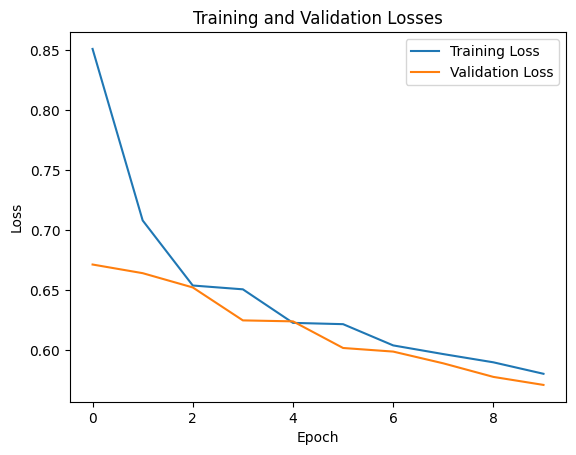

F1 Score: 0.7535, Precision: 0.7168, Recall: 0.7941, Accuracy: 0.7402
ROC AUC: 0.7737
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=256, Dropout Rate=0.5, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.6971, Validation Loss: 0.8358
Epoch [2/10], Training Loss: 0.8239, Validation Loss: 0.7090
Epoch [3/10], Training Loss: 0.7100, Validation Loss: 0.6265
Epoch [4/10], Training Loss: 0.6294, Validation Loss: 0.6618
Epoch [5/10], Training Loss: 0.6630, Validation Loss: 0.6263
Epoch [6/10], Training Loss: 0.6270, Validation Loss: 0.6227
Epoch [7/10], Training Loss: 0.6254, Validation Loss: 0.6217
Epoch [8/10], Training Loss: 0.6220, Validation Loss: 0.5994
Epoch [9/10], Training Loss: 0.6022, Validation Loss: 0.6038
Epoch [10/10], Training Loss: 0.6045, Validation Loss: 0.5865


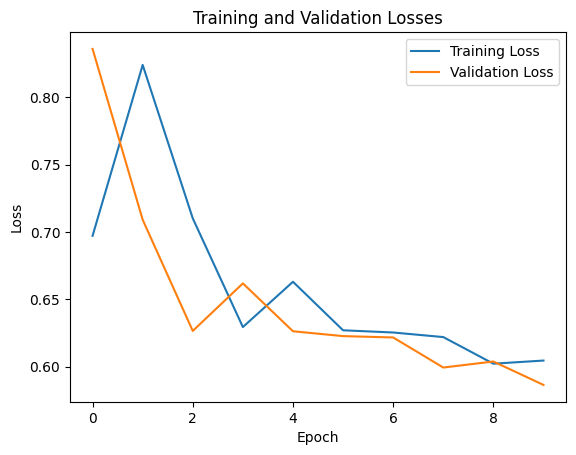

F1 Score: 0.7306, Precision: 0.6838, Recall: 0.7843, Accuracy: 0.7108
ROC AUC: 0.7566
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=256, Dropout Rate=0.7, Batch Size=16


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7710, Validation Loss: 0.6858
Epoch [2/10], Training Loss: 0.6514, Validation Loss: 0.6197
Epoch [3/10], Training Loss: 0.6161, Validation Loss: 0.6039
Epoch [4/10], Training Loss: 0.5930, Validation Loss: 0.5801
Epoch [5/10], Training Loss: 0.5766, Validation Loss: 0.5655
Epoch [6/10], Training Loss: 0.5644, Validation Loss: 0.5539
Epoch [7/10], Training Loss: 0.5545, Validation Loss: 0.5439
Epoch [8/10], Training Loss: 0.5439, Validation Loss: 0.5314
Epoch [9/10], Training Loss: 0.5342, Validation Loss: 0.5192
Epoch [10/10], Training Loss: 0.5234, Validation Loss: 0.5083


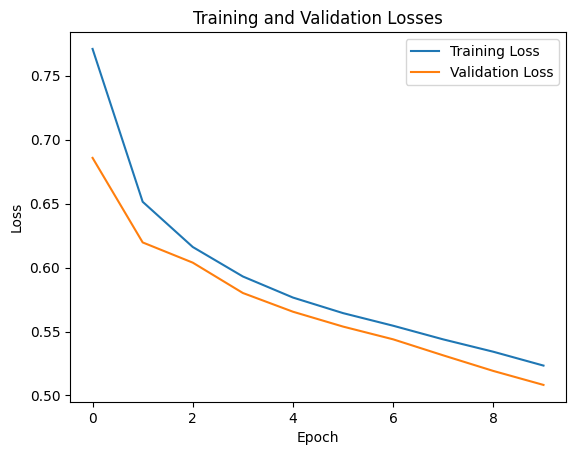

F1 Score: 0.7885, Precision: 0.7736, Recall: 0.8039, Accuracy: 0.7843
ROC AUC: 0.8235
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=256, Dropout Rate=0.7, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.8615, Validation Loss: 0.8255
Epoch [2/10], Training Loss: 0.7224, Validation Loss: 0.6946
Epoch [3/10], Training Loss: 0.6794, Validation Loss: 0.6337
Epoch [4/10], Training Loss: 0.6366, Validation Loss: 0.6140
Epoch [5/10], Training Loss: 0.6165, Validation Loss: 0.6020
Epoch [6/10], Training Loss: 0.6030, Validation Loss: 0.5934
Epoch [7/10], Training Loss: 0.5947, Validation Loss: 0.5853
Epoch [8/10], Training Loss: 0.5855, Validation Loss: 0.5768
Epoch [9/10], Training Loss: 0.5767, Validation Loss: 0.5685
Epoch [10/10], Training Loss: 0.5701, Validation Loss: 0.5612


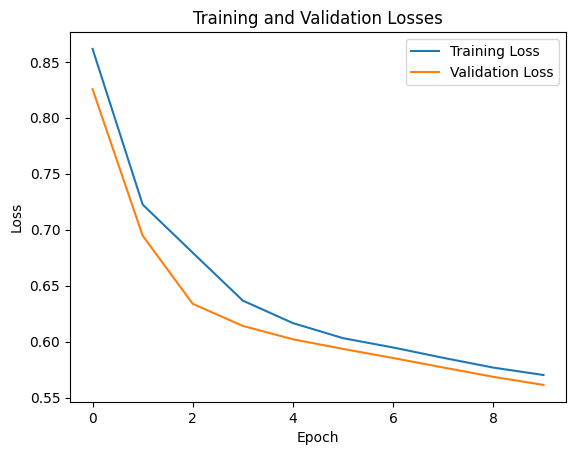

F1 Score: 0.7429, Precision: 0.7222, Recall: 0.7647, Accuracy: 0.7353
ROC AUC: 0.7809
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=256, Dropout Rate=0.7, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.9207, Validation Loss: 0.7162
Epoch [2/10], Training Loss: 0.7675, Validation Loss: 0.6798
Epoch [3/10], Training Loss: 0.6677, Validation Loss: 0.6822
Epoch [4/10], Training Loss: 0.6811, Validation Loss: 0.6354
Epoch [5/10], Training Loss: 0.6293, Validation Loss: 0.6381
Epoch [6/10], Training Loss: 0.6338, Validation Loss: 0.6062
Epoch [7/10], Training Loss: 0.6077, Validation Loss: 0.6063
Epoch [8/10], Training Loss: 0.6065, Validation Loss: 0.5937
Epoch [9/10], Training Loss: 0.5958, Validation Loss: 0.5903
Epoch [10/10], Training Loss: 0.5896, Validation Loss: 0.5835


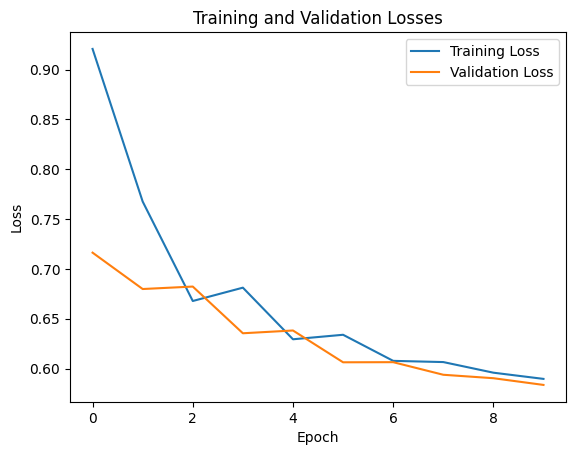

F1 Score: 0.7611, Precision: 0.6935, Recall: 0.8431, Accuracy: 0.7353
ROC AUC: 0.7568
Testing hyperparameters: Learning Rate=0.01, Hidden Dimension=256, Dropout Rate=0.7, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7553, Validation Loss: 0.7489
Epoch [2/10], Training Loss: 0.7535, Validation Loss: 0.8750
Epoch [3/10], Training Loss: 0.8641, Validation Loss: 0.6542
Epoch [4/10], Training Loss: 0.6570, Validation Loss: 0.6954
Epoch [5/10], Training Loss: 0.6986, Validation Loss: 0.7000
Epoch [6/10], Training Loss: 0.6977, Validation Loss: 0.6451
Epoch [7/10], Training Loss: 0.6455, Validation Loss: 0.6443
Epoch [8/10], Training Loss: 0.6465, Validation Loss: 0.6540
Epoch [9/10], Training Loss: 0.6537, Validation Loss: 0.6345
Epoch [10/10], Training Loss: 0.6350, Validation Loss: 0.6202


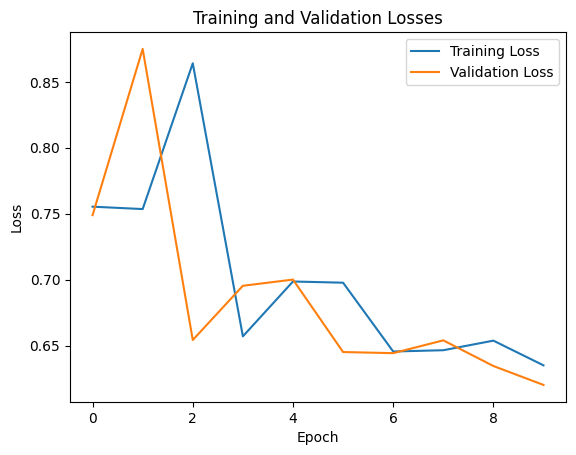

F1 Score: 0.7182, Precision: 0.6695, Recall: 0.7745, Accuracy: 0.6961
ROC AUC: 0.7344
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=64, Dropout Rate=0.3, Batch Size=16


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7829, Validation Loss: 0.6579
Epoch [2/10], Training Loss: 0.6590, Validation Loss: 0.6392
Epoch [3/10], Training Loss: 0.6241, Validation Loss: 0.5999
Epoch [4/10], Training Loss: 0.6010, Validation Loss: 0.5817
Epoch [5/10], Training Loss: 0.5851, Validation Loss: 0.5727
Epoch [6/10], Training Loss: 0.5786, Validation Loss: 0.5635
Epoch [7/10], Training Loss: 0.5701, Validation Loss: 0.5571
Epoch [8/10], Training Loss: 0.5637, Validation Loss: 0.5497
Epoch [9/10], Training Loss: 0.5563, Validation Loss: 0.5449
Epoch [10/10], Training Loss: 0.5516, Validation Loss: 0.5350


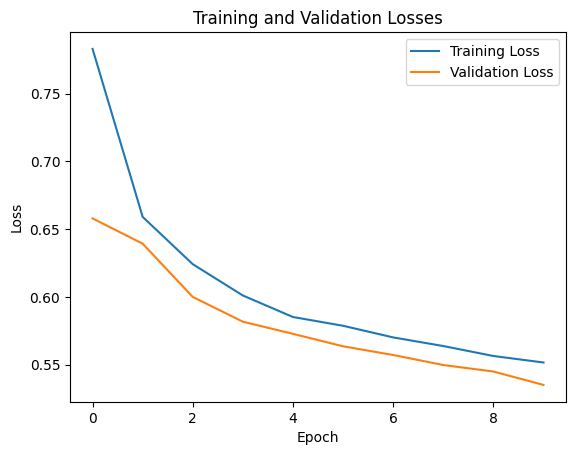

F1 Score: 0.7476, Precision: 0.7404, Recall: 0.7549, Accuracy: 0.7451
ROC AUC: 0.8050
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=64, Dropout Rate=0.3, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.8077, Validation Loss: 0.7200
Epoch [2/10], Training Loss: 0.6702, Validation Loss: 0.6712
Epoch [3/10], Training Loss: 0.6588, Validation Loss: 0.6328
Epoch [4/10], Training Loss: 0.6375, Validation Loss: 0.6258
Epoch [5/10], Training Loss: 0.6187, Validation Loss: 0.6057
Epoch [6/10], Training Loss: 0.6082, Validation Loss: 0.5940
Epoch [7/10], Training Loss: 0.5959, Validation Loss: 0.5827
Epoch [8/10], Training Loss: 0.5904, Validation Loss: 0.5759
Epoch [9/10], Training Loss: 0.5830, Validation Loss: 0.5702
Epoch [10/10], Training Loss: 0.5790, Validation Loss: 0.5636


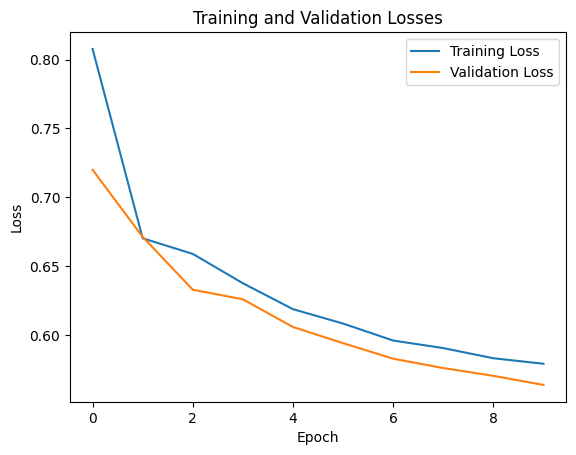

F1 Score: 0.7547, Precision: 0.7273, Recall: 0.7843, Accuracy: 0.7451
ROC AUC: 0.7751
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=64, Dropout Rate=0.3, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7549, Validation Loss: 0.6872
Epoch [2/10], Training Loss: 0.6930, Validation Loss: 0.6697
Epoch [3/10], Training Loss: 0.6631, Validation Loss: 0.6584
Epoch [4/10], Training Loss: 0.6522, Validation Loss: 0.6319
Epoch [5/10], Training Loss: 0.6352, Validation Loss: 0.6206
Epoch [6/10], Training Loss: 0.6210, Validation Loss: 0.6136
Epoch [7/10], Training Loss: 0.6145, Validation Loss: 0.6012
Epoch [8/10], Training Loss: 0.6051, Validation Loss: 0.5911
Epoch [9/10], Training Loss: 0.5961, Validation Loss: 0.5829
Epoch [10/10], Training Loss: 0.5879, Validation Loss: 0.5750


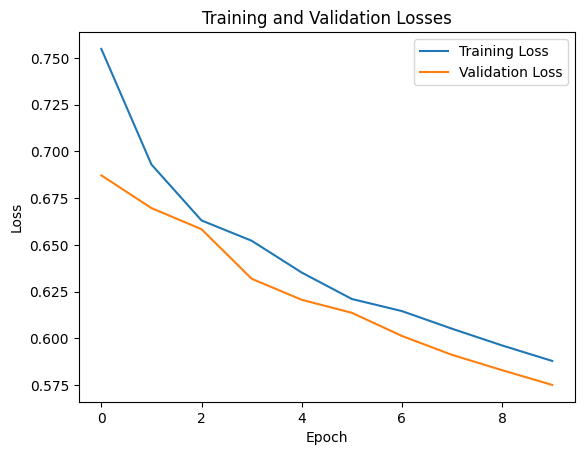

F1 Score: 0.7264, Precision: 0.7000, Recall: 0.7549, Accuracy: 0.7157
ROC AUC: 0.7695
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=64, Dropout Rate=0.3, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.8119, Validation Loss: 0.7545
Epoch [2/10], Training Loss: 0.7507, Validation Loss: 0.6839
Epoch [3/10], Training Loss: 0.6868, Validation Loss: 0.6884
Epoch [4/10], Training Loss: 0.6888, Validation Loss: 0.6471
Epoch [5/10], Training Loss: 0.6511, Validation Loss: 0.6573
Epoch [6/10], Training Loss: 0.6614, Validation Loss: 0.6345
Epoch [7/10], Training Loss: 0.6376, Validation Loss: 0.6321
Epoch [8/10], Training Loss: 0.6342, Validation Loss: 0.6281
Epoch [9/10], Training Loss: 0.6305, Validation Loss: 0.6163
Epoch [10/10], Training Loss: 0.6198, Validation Loss: 0.6142


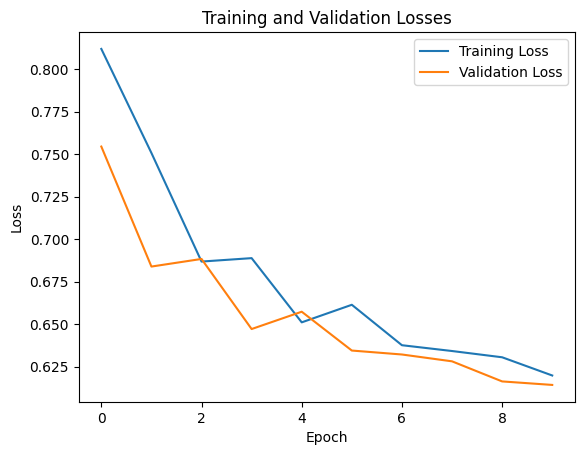

F1 Score: 0.6569, Precision: 0.6569, Recall: 0.6569, Accuracy: 0.6569
ROC AUC: 0.7229
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=64, Dropout Rate=0.5, Batch Size=16


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.6964, Validation Loss: 0.6277
Epoch [2/10], Training Loss: 0.6109, Validation Loss: 0.5854
Epoch [3/10], Training Loss: 0.5848, Validation Loss: 0.5631
Epoch [4/10], Training Loss: 0.5721, Validation Loss: 0.5523
Epoch [5/10], Training Loss: 0.5632, Validation Loss: 0.5436
Epoch [6/10], Training Loss: 0.5521, Validation Loss: 0.5350
Epoch [7/10], Training Loss: 0.5448, Validation Loss: 0.5268
Epoch [8/10], Training Loss: 0.5376, Validation Loss: 0.5202
Epoch [9/10], Training Loss: 0.5313, Validation Loss: 0.5120
Epoch [10/10], Training Loss: 0.5259, Validation Loss: 0.5049


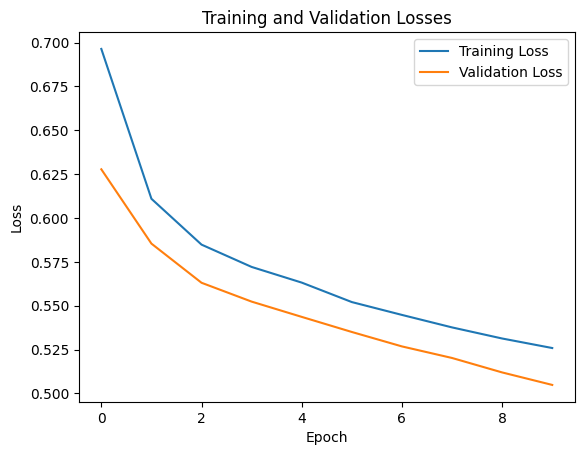

F1 Score: 0.7822, Precision: 0.7900, Recall: 0.7745, Accuracy: 0.7843
ROC AUC: 0.8293
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=64, Dropout Rate=0.5, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.8867, Validation Loss: 0.8224
Epoch [2/10], Training Loss: 0.7125, Validation Loss: 0.7056
Epoch [3/10], Training Loss: 0.6779, Validation Loss: 0.6359
Epoch [4/10], Training Loss: 0.6457, Validation Loss: 0.6219
Epoch [5/10], Training Loss: 0.6227, Validation Loss: 0.6143
Epoch [6/10], Training Loss: 0.6170, Validation Loss: 0.6031
Epoch [7/10], Training Loss: 0.6100, Validation Loss: 0.5948
Epoch [8/10], Training Loss: 0.6023, Validation Loss: 0.5878
Epoch [9/10], Training Loss: 0.5963, Validation Loss: 0.5807
Epoch [10/10], Training Loss: 0.5888, Validation Loss: 0.5723


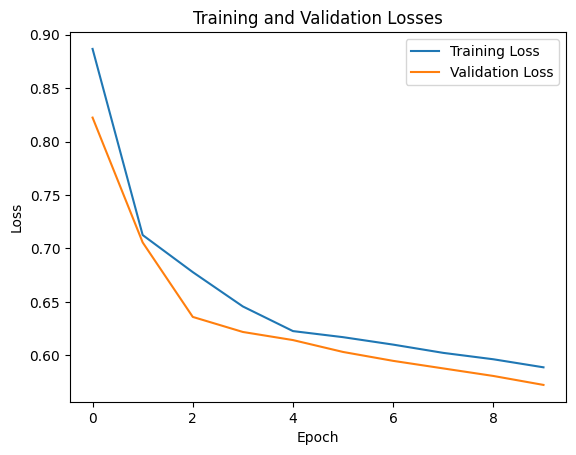

F1 Score: 0.7442, Precision: 0.7080, Recall: 0.7843, Accuracy: 0.7304
ROC AUC: 0.7709
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=64, Dropout Rate=0.5, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.9625, Validation Loss: 0.6868
Epoch [2/10], Training Loss: 0.7599, Validation Loss: 0.7448
Epoch [3/10], Training Loss: 0.7113, Validation Loss: 0.6633
Epoch [4/10], Training Loss: 0.6752, Validation Loss: 0.6897
Epoch [5/10], Training Loss: 0.6847, Validation Loss: 0.6555
Epoch [6/10], Training Loss: 0.6520, Validation Loss: 0.6396
Epoch [7/10], Training Loss: 0.6401, Validation Loss: 0.6281
Epoch [8/10], Training Loss: 0.6299, Validation Loss: 0.6134
Epoch [9/10], Training Loss: 0.6172, Validation Loss: 0.6034
Epoch [10/10], Training Loss: 0.6117, Validation Loss: 0.5944


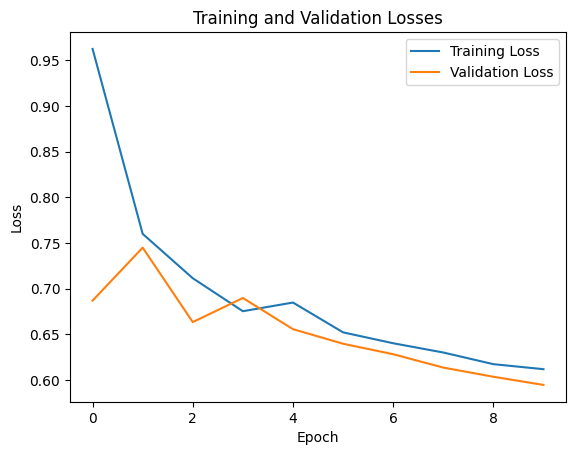

F1 Score: 0.6977, Precision: 0.6637, Recall: 0.7353, Accuracy: 0.6814
ROC AUC: 0.7448
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=64, Dropout Rate=0.5, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7637, Validation Loss: 0.7545
Epoch [2/10], Training Loss: 0.7523, Validation Loss: 0.7526
Epoch [3/10], Training Loss: 0.7570, Validation Loss: 0.7188
Epoch [4/10], Training Loss: 0.7181, Validation Loss: 0.6601
Epoch [5/10], Training Loss: 0.6626, Validation Loss: 0.6718
Epoch [6/10], Training Loss: 0.6742, Validation Loss: 0.6821
Epoch [7/10], Training Loss: 0.6839, Validation Loss: 0.6722
Epoch [8/10], Training Loss: 0.6724, Validation Loss: 0.6556
Epoch [9/10], Training Loss: 0.6562, Validation Loss: 0.6409
Epoch [10/10], Training Loss: 0.6421, Validation Loss: 0.6299


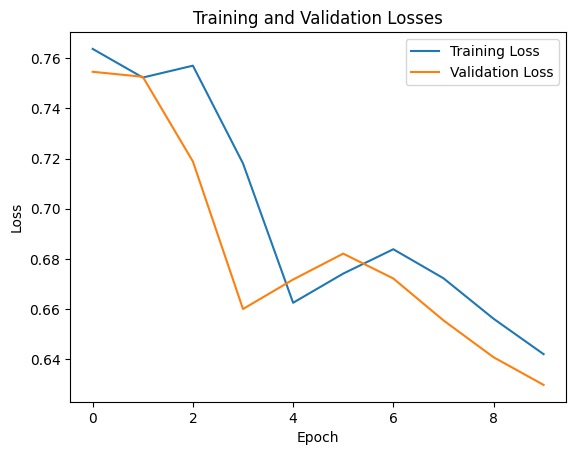

F1 Score: 0.7342, Precision: 0.6444, Recall: 0.8529, Accuracy: 0.6912
ROC AUC: 0.7417
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=64, Dropout Rate=0.7, Batch Size=16


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7531, Validation Loss: 0.6730
Epoch [2/10], Training Loss: 0.6398, Validation Loss: 0.6154
Epoch [3/10], Training Loss: 0.6123, Validation Loss: 0.5945
Epoch [4/10], Training Loss: 0.5979, Validation Loss: 0.5802
Epoch [5/10], Training Loss: 0.5839, Validation Loss: 0.5664
Epoch [6/10], Training Loss: 0.5750, Validation Loss: 0.5567
Epoch [7/10], Training Loss: 0.5690, Validation Loss: 0.5494
Epoch [8/10], Training Loss: 0.5605, Validation Loss: 0.5429
Epoch [9/10], Training Loss: 0.5542, Validation Loss: 0.5376
Epoch [10/10], Training Loss: 0.5492, Validation Loss: 0.5323


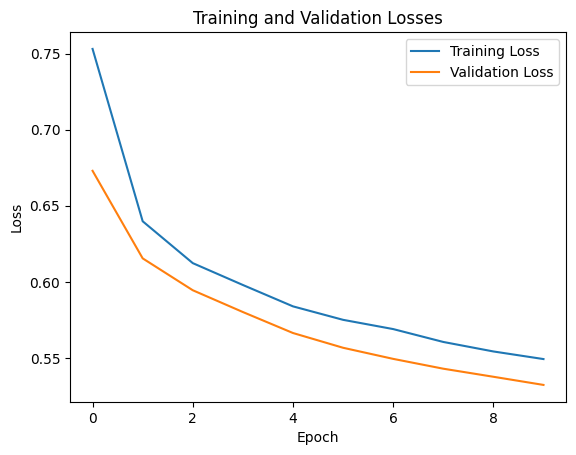

F1 Score: 0.7573, Precision: 0.7500, Recall: 0.7647, Accuracy: 0.7549
ROC AUC: 0.8091
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=64, Dropout Rate=0.7, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.8546, Validation Loss: 0.7605
Epoch [2/10], Training Loss: 0.6916, Validation Loss: 0.6732
Epoch [3/10], Training Loss: 0.6467, Validation Loss: 0.6336
Epoch [4/10], Training Loss: 0.6297, Validation Loss: 0.6092
Epoch [5/10], Training Loss: 0.6157, Validation Loss: 0.6055
Epoch [6/10], Training Loss: 0.6071, Validation Loss: 0.5954
Epoch [7/10], Training Loss: 0.5983, Validation Loss: 0.5871
Epoch [8/10], Training Loss: 0.5936, Validation Loss: 0.5805
Epoch [9/10], Training Loss: 0.5892, Validation Loss: 0.5742
Epoch [10/10], Training Loss: 0.5828, Validation Loss: 0.5689


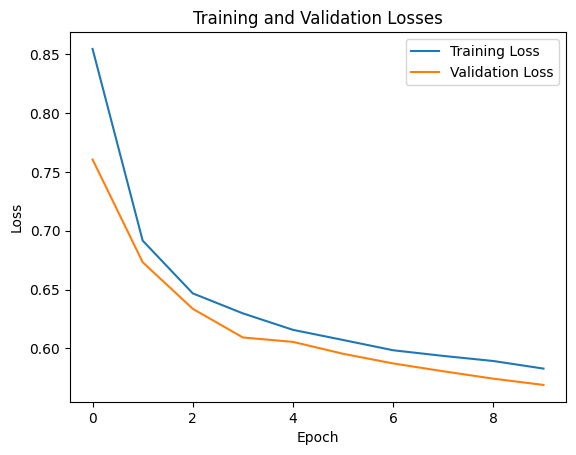

F1 Score: 0.7349, Precision: 0.6991, Recall: 0.7745, Accuracy: 0.7206
ROC AUC: 0.7695
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=64, Dropout Rate=0.7, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.9887, Validation Loss: 0.7226
Epoch [2/10], Training Loss: 0.7848, Validation Loss: 0.7282
Epoch [3/10], Training Loss: 0.7040, Validation Loss: 0.6874
Epoch [4/10], Training Loss: 0.6950, Validation Loss: 0.6798
Epoch [5/10], Training Loss: 0.6704, Validation Loss: 0.6422
Epoch [6/10], Training Loss: 0.6449, Validation Loss: 0.6501
Epoch [7/10], Training Loss: 0.6498, Validation Loss: 0.6290
Epoch [8/10], Training Loss: 0.6292, Validation Loss: 0.6192
Epoch [9/10], Training Loss: 0.6222, Validation Loss: 0.6120
Epoch [10/10], Training Loss: 0.6152, Validation Loss: 0.6046


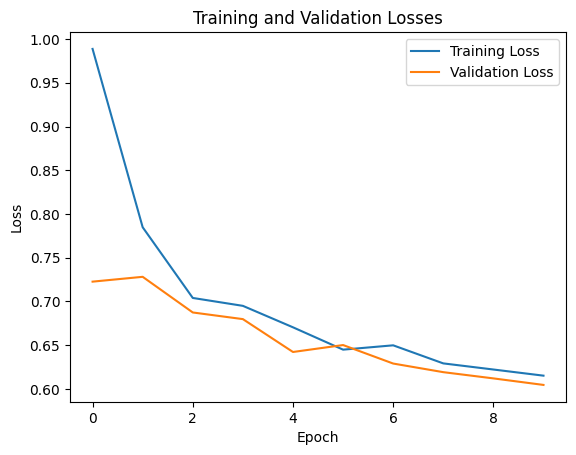

F1 Score: 0.7117, Precision: 0.6583, Recall: 0.7745, Accuracy: 0.6863
ROC AUC: 0.7290
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=64, Dropout Rate=0.7, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.8776, Validation Loss: 0.8398
Epoch [2/10], Training Loss: 0.8326, Validation Loss: 0.7431
Epoch [3/10], Training Loss: 0.7508, Validation Loss: 0.7373
Epoch [4/10], Training Loss: 0.7356, Validation Loss: 0.6675
Epoch [5/10], Training Loss: 0.6681, Validation Loss: 0.6632
Epoch [6/10], Training Loss: 0.6663, Validation Loss: 0.6514
Epoch [7/10], Training Loss: 0.6524, Validation Loss: 0.6311
Epoch [8/10], Training Loss: 0.6361, Validation Loss: 0.6335
Epoch [9/10], Training Loss: 0.6384, Validation Loss: 0.6157
Epoch [10/10], Training Loss: 0.6200, Validation Loss: 0.6125


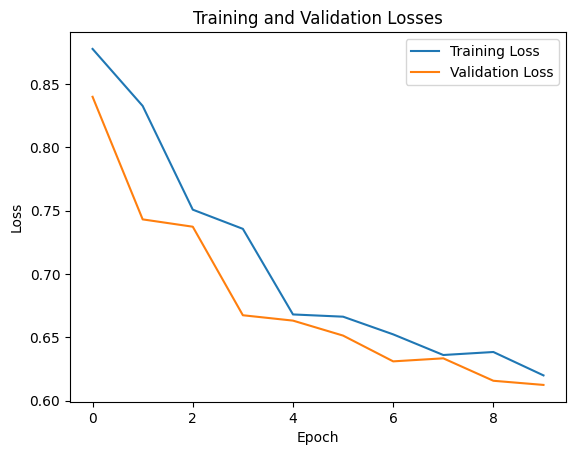

F1 Score: 0.7273, Precision: 0.6286, Recall: 0.8627, Accuracy: 0.6765
ROC AUC: 0.7463
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=128, Dropout Rate=0.3, Batch Size=16


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.8588, Validation Loss: 0.6568
Epoch [2/10], Training Loss: 0.6679, Validation Loss: 0.6397
Epoch [3/10], Training Loss: 0.6299, Validation Loss: 0.6103
Epoch [4/10], Training Loss: 0.6173, Validation Loss: 0.5998
Epoch [5/10], Training Loss: 0.6035, Validation Loss: 0.5871
Epoch [6/10], Training Loss: 0.5918, Validation Loss: 0.5670
Epoch [7/10], Training Loss: 0.5759, Validation Loss: 0.5492
Epoch [8/10], Training Loss: 0.5630, Validation Loss: 0.5388
Epoch [9/10], Training Loss: 0.5591, Validation Loss: 0.5309
Epoch [10/10], Training Loss: 0.5476, Validation Loss: 0.5221


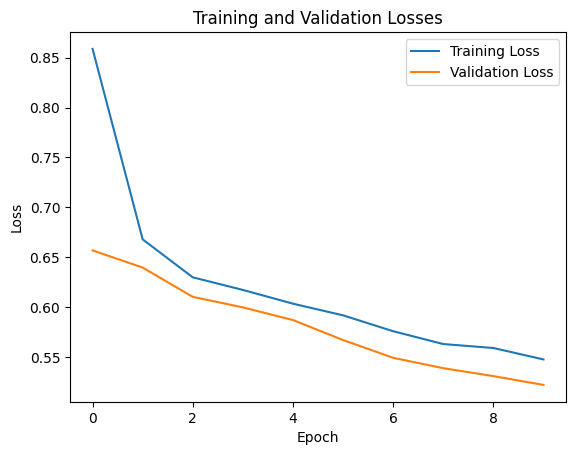

F1 Score: 0.7729, Precision: 0.7619, Recall: 0.7843, Accuracy: 0.7696
ROC AUC: 0.8218
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=128, Dropout Rate=0.3, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 1.0556, Validation Loss: 0.9027
Epoch [2/10], Training Loss: 0.7506, Validation Loss: 0.6794
Epoch [3/10], Training Loss: 0.6852, Validation Loss: 0.6748
Epoch [4/10], Training Loss: 0.6646, Validation Loss: 0.6392
Epoch [5/10], Training Loss: 0.6326, Validation Loss: 0.6119
Epoch [6/10], Training Loss: 0.6198, Validation Loss: 0.5990
Epoch [7/10], Training Loss: 0.6067, Validation Loss: 0.5909
Epoch [8/10], Training Loss: 0.5984, Validation Loss: 0.5753
Epoch [9/10], Training Loss: 0.5865, Validation Loss: 0.5626
Epoch [10/10], Training Loss: 0.5768, Validation Loss: 0.5539


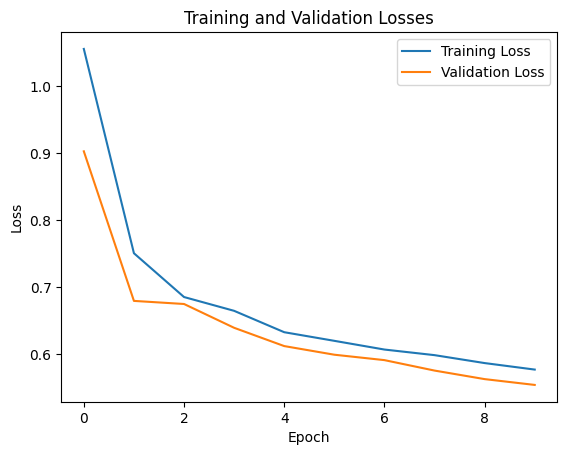

F1 Score: 0.7619, Precision: 0.7407, Recall: 0.7843, Accuracy: 0.7549
ROC AUC: 0.7895
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=128, Dropout Rate=0.3, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 1.2764, Validation Loss: 0.7153
Epoch [2/10], Training Loss: 0.8202, Validation Loss: 0.8311
Epoch [3/10], Training Loss: 0.7849, Validation Loss: 0.6767
Epoch [4/10], Training Loss: 0.6783, Validation Loss: 0.6921
Epoch [5/10], Training Loss: 0.6958, Validation Loss: 0.6970
Epoch [6/10], Training Loss: 0.6944, Validation Loss: 0.6796
Epoch [7/10], Training Loss: 0.6769, Validation Loss: 0.6664
Epoch [8/10], Training Loss: 0.6656, Validation Loss: 0.6570
Epoch [9/10], Training Loss: 0.6572, Validation Loss: 0.6476
Epoch [10/10], Training Loss: 0.6484, Validation Loss: 0.6365


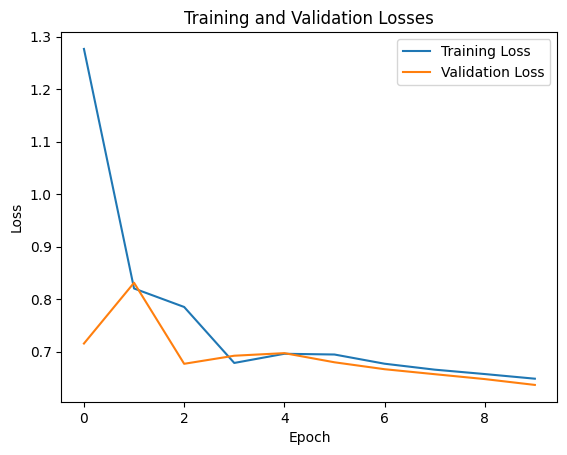

F1 Score: 0.6872, Precision: 0.6240, Recall: 0.7647, Accuracy: 0.6520
ROC AUC: 0.6892
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=128, Dropout Rate=0.3, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7912, Validation Loss: 0.7158
Epoch [2/10], Training Loss: 0.7508, Validation Loss: 0.8841
Epoch [3/10], Training Loss: 0.8673, Validation Loss: 0.6537
Epoch [4/10], Training Loss: 0.6592, Validation Loss: 0.7140
Epoch [5/10], Training Loss: 0.7160, Validation Loss: 0.6967
Epoch [6/10], Training Loss: 0.6953, Validation Loss: 0.6576
Epoch [7/10], Training Loss: 0.6586, Validation Loss: 0.6513
Epoch [8/10], Training Loss: 0.6534, Validation Loss: 0.6564
Epoch [9/10], Training Loss: 0.6572, Validation Loss: 0.6493
Epoch [10/10], Training Loss: 0.6508, Validation Loss: 0.6400


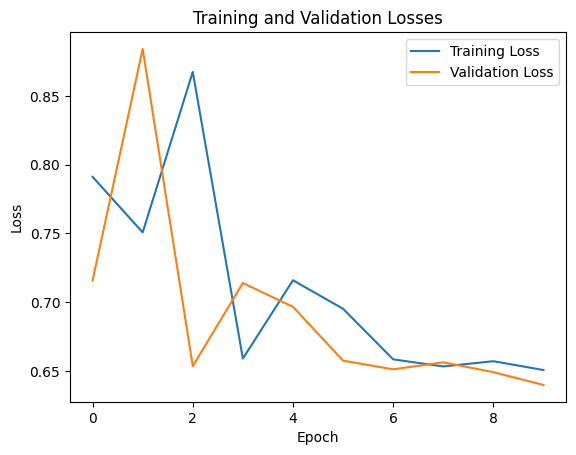

F1 Score: 0.6270, Precision: 0.6988, Recall: 0.5686, Accuracy: 0.6618
ROC AUC: 0.7299
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=128, Dropout Rate=0.5, Batch Size=16


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.9513, Validation Loss: 0.7053
Epoch [2/10], Training Loss: 0.7014, Validation Loss: 0.6490
Epoch [3/10], Training Loss: 0.6420, Validation Loss: 0.6203
Epoch [4/10], Training Loss: 0.6232, Validation Loss: 0.6041
Epoch [5/10], Training Loss: 0.6068, Validation Loss: 0.5893
Epoch [6/10], Training Loss: 0.5938, Validation Loss: 0.5763
Epoch [7/10], Training Loss: 0.5840, Validation Loss: 0.5639
Epoch [8/10], Training Loss: 0.5746, Validation Loss: 0.5566
Epoch [9/10], Training Loss: 0.5707, Validation Loss: 0.5500
Epoch [10/10], Training Loss: 0.5653, Validation Loss: 0.5452


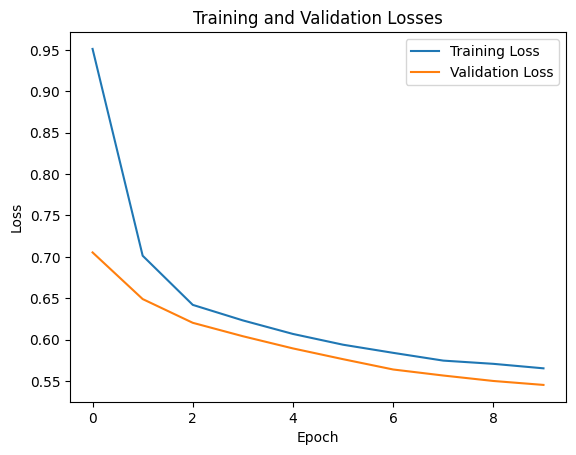

F1 Score: 0.7678, Precision: 0.7431, Recall: 0.7941, Accuracy: 0.7598
ROC AUC: 0.7981
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=128, Dropout Rate=0.5, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.8775, Validation Loss: 0.6429
Epoch [2/10], Training Loss: 0.6841, Validation Loss: 0.6414
Epoch [3/10], Training Loss: 0.6441, Validation Loss: 0.6435
Epoch [4/10], Training Loss: 0.6304, Validation Loss: 0.6208
Epoch [5/10], Training Loss: 0.6153, Validation Loss: 0.6021
Epoch [6/10], Training Loss: 0.6040, Validation Loss: 0.5916
Epoch [7/10], Training Loss: 0.5925, Validation Loss: 0.5835
Epoch [8/10], Training Loss: 0.5868, Validation Loss: 0.5752
Epoch [9/10], Training Loss: 0.5803, Validation Loss: 0.5688
Epoch [10/10], Training Loss: 0.5742, Validation Loss: 0.5623


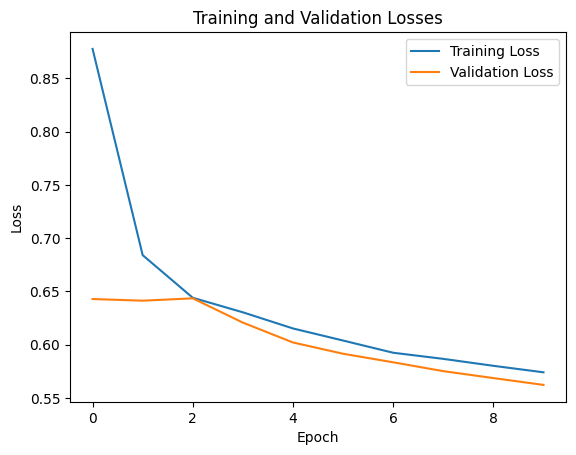

F1 Score: 0.7560, Precision: 0.7383, Recall: 0.7745, Accuracy: 0.7500
ROC AUC: 0.7787
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=128, Dropout Rate=0.5, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 1.0844, Validation Loss: 1.0940
Epoch [2/10], Training Loss: 1.0062, Validation Loss: 0.6572
Epoch [3/10], Training Loss: 0.6673, Validation Loss: 0.7109
Epoch [4/10], Training Loss: 0.7086, Validation Loss: 0.6753
Epoch [5/10], Training Loss: 0.6687, Validation Loss: 0.6666
Epoch [6/10], Training Loss: 0.6682, Validation Loss: 0.6548
Epoch [7/10], Training Loss: 0.6538, Validation Loss: 0.6463
Epoch [8/10], Training Loss: 0.6454, Validation Loss: 0.6346
Epoch [9/10], Training Loss: 0.6341, Validation Loss: 0.6184
Epoch [10/10], Training Loss: 0.6194, Validation Loss: 0.6033


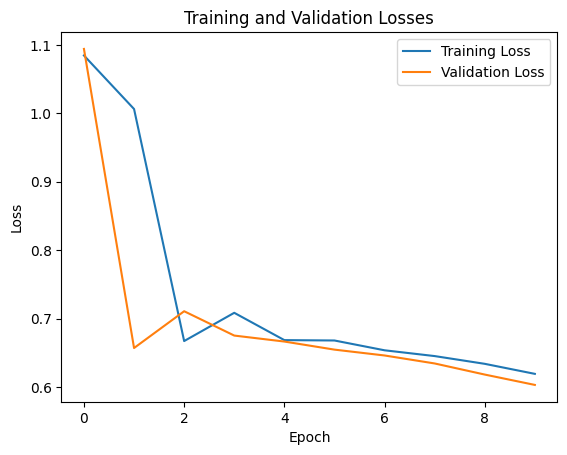

F1 Score: 0.7257, Precision: 0.6613, Recall: 0.8039, Accuracy: 0.6961
ROC AUC: 0.7419
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=128, Dropout Rate=0.5, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.6844, Validation Loss: 1.3470
Epoch [2/10], Training Loss: 1.2818, Validation Loss: 0.7918
Epoch [3/10], Training Loss: 0.8089, Validation Loss: 0.7832
Epoch [4/10], Training Loss: 0.7761, Validation Loss: 0.6213
Epoch [5/10], Training Loss: 0.6278, Validation Loss: 0.6999
Epoch [6/10], Training Loss: 0.7022, Validation Loss: 0.6770
Epoch [7/10], Training Loss: 0.6760, Validation Loss: 0.6314
Epoch [8/10], Training Loss: 0.6324, Validation Loss: 0.6391
Epoch [9/10], Training Loss: 0.6417, Validation Loss: 0.6414
Epoch [10/10], Training Loss: 0.6421, Validation Loss: 0.6208


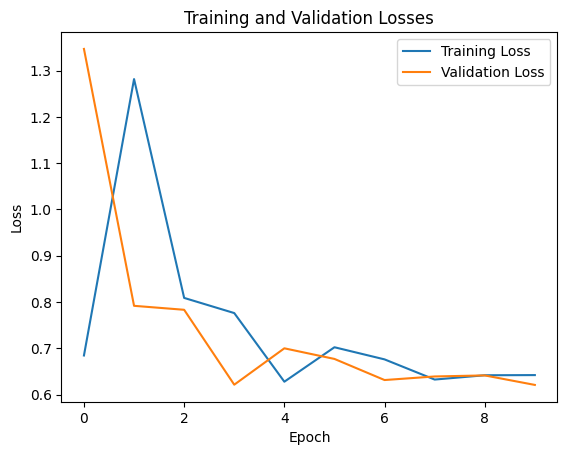

F1 Score: 0.7273, Precision: 0.6286, Recall: 0.8627, Accuracy: 0.6765
ROC AUC: 0.7390
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=128, Dropout Rate=0.7, Batch Size=16


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.8970, Validation Loss: 0.7384
Epoch [2/10], Training Loss: 0.6720, Validation Loss: 0.6248
Epoch [3/10], Training Loss: 0.6170, Validation Loss: 0.5970
Epoch [4/10], Training Loss: 0.5976, Validation Loss: 0.5779
Epoch [5/10], Training Loss: 0.5825, Validation Loss: 0.5658
Epoch [6/10], Training Loss: 0.5711, Validation Loss: 0.5524
Epoch [7/10], Training Loss: 0.5604, Validation Loss: 0.5405
Epoch [8/10], Training Loss: 0.5526, Validation Loss: 0.5315
Epoch [9/10], Training Loss: 0.5458, Validation Loss: 0.5237
Epoch [10/10], Training Loss: 0.5395, Validation Loss: 0.5150


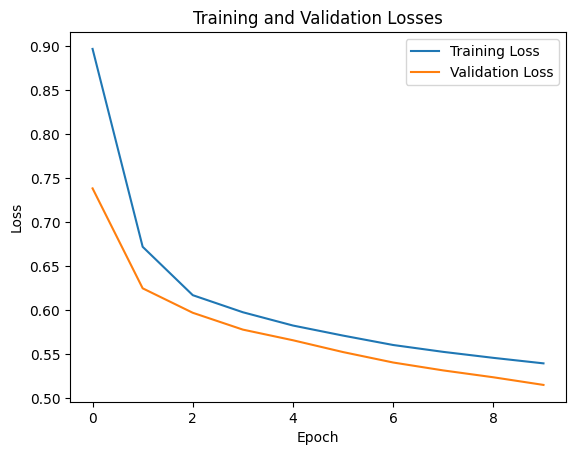

F1 Score: 0.7788, Precision: 0.7642, Recall: 0.7941, Accuracy: 0.7745
ROC AUC: 0.8219
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=128, Dropout Rate=0.7, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.9204, Validation Loss: 0.6722
Epoch [2/10], Training Loss: 0.6842, Validation Loss: 0.6773
Epoch [3/10], Training Loss: 0.6571, Validation Loss: 0.6445
Epoch [4/10], Training Loss: 0.6359, Validation Loss: 0.6196
Epoch [5/10], Training Loss: 0.6173, Validation Loss: 0.6038
Epoch [6/10], Training Loss: 0.6042, Validation Loss: 0.5884
Epoch [7/10], Training Loss: 0.5908, Validation Loss: 0.5739
Epoch [8/10], Training Loss: 0.5813, Validation Loss: 0.5615
Epoch [9/10], Training Loss: 0.5724, Validation Loss: 0.5534
Epoch [10/10], Training Loss: 0.5648, Validation Loss: 0.5473


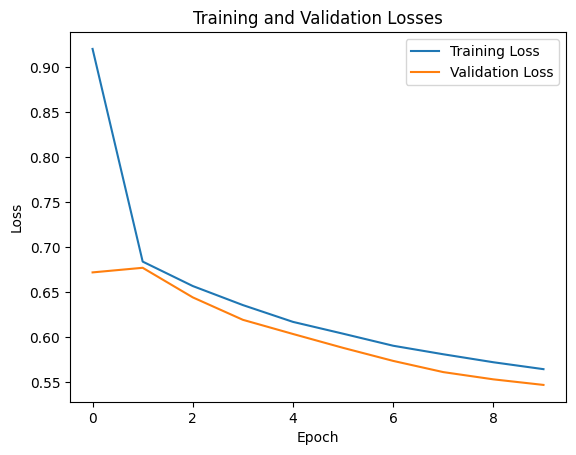

F1 Score: 0.7727, Precision: 0.7203, Recall: 0.8333, Accuracy: 0.7549
ROC AUC: 0.7939
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=128, Dropout Rate=0.7, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 1.1615, Validation Loss: 1.0259
Epoch [2/10], Training Loss: 1.0258, Validation Loss: 0.6887
Epoch [3/10], Training Loss: 0.6799, Validation Loss: 0.7325
Epoch [4/10], Training Loss: 0.7362, Validation Loss: 0.6977
Epoch [5/10], Training Loss: 0.6842, Validation Loss: 0.6487
Epoch [6/10], Training Loss: 0.6473, Validation Loss: 0.6407
Epoch [7/10], Training Loss: 0.6405, Validation Loss: 0.6250
Epoch [8/10], Training Loss: 0.6289, Validation Loss: 0.6187
Epoch [9/10], Training Loss: 0.6226, Validation Loss: 0.6139
Epoch [10/10], Training Loss: 0.6188, Validation Loss: 0.6066


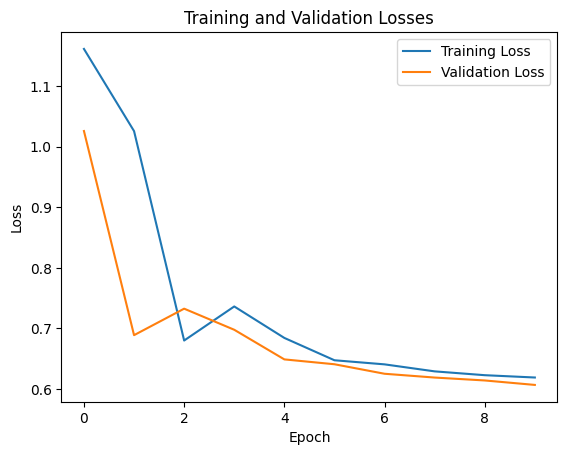

F1 Score: 0.7018, Precision: 0.6349, Recall: 0.7843, Accuracy: 0.6667
ROC AUC: 0.7222
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=128, Dropout Rate=0.7, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7957, Validation Loss: 0.8383
Epoch [2/10], Training Loss: 0.8306, Validation Loss: 0.9090
Epoch [3/10], Training Loss: 0.9086, Validation Loss: 0.7676
Epoch [4/10], Training Loss: 0.7624, Validation Loss: 0.6711
Epoch [5/10], Training Loss: 0.6711, Validation Loss: 0.6675
Epoch [6/10], Training Loss: 0.6687, Validation Loss: 0.6749
Epoch [7/10], Training Loss: 0.6757, Validation Loss: 0.6729
Epoch [8/10], Training Loss: 0.6739, Validation Loss: 0.6614
Epoch [9/10], Training Loss: 0.6619, Validation Loss: 0.6357
Epoch [10/10], Training Loss: 0.6388, Validation Loss: 0.6303


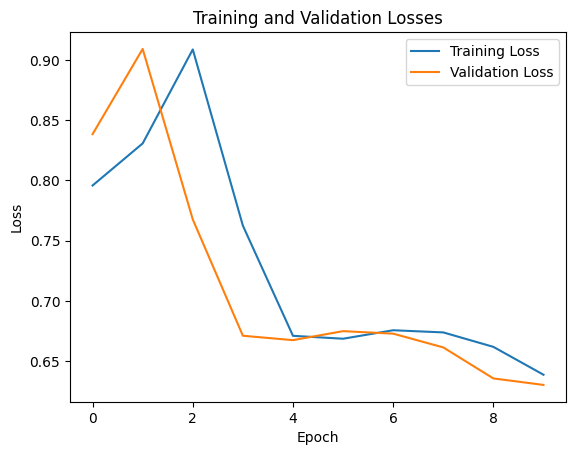

F1 Score: 0.7059, Precision: 0.5882, Recall: 0.8824, Accuracy: 0.6324
ROC AUC: 0.7406
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=256, Dropout Rate=0.3, Batch Size=16


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 1.1341, Validation Loss: 0.7981
Epoch [2/10], Training Loss: 0.7013, Validation Loss: 0.6837
Epoch [3/10], Training Loss: 0.6807, Validation Loss: 0.6694
Epoch [4/10], Training Loss: 0.6575, Validation Loss: 0.6262
Epoch [5/10], Training Loss: 0.6192, Validation Loss: 0.5915
Epoch [6/10], Training Loss: 0.6006, Validation Loss: 0.5722
Epoch [7/10], Training Loss: 0.5906, Validation Loss: 0.5646
Epoch [8/10], Training Loss: 0.5840, Validation Loss: 0.5580
Epoch [9/10], Training Loss: 0.5774, Validation Loss: 0.5530
Epoch [10/10], Training Loss: 0.5707, Validation Loss: 0.5467


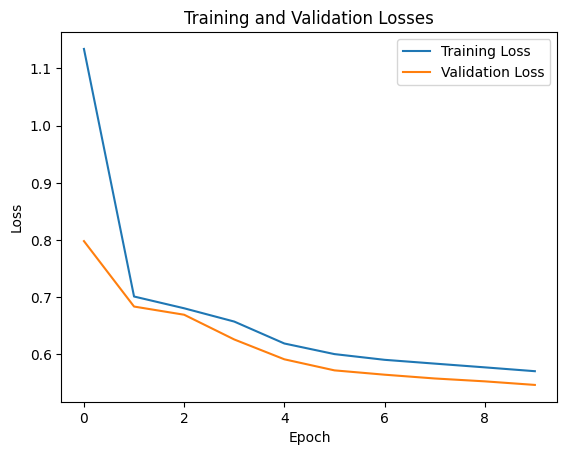

F1 Score: 0.7742, Precision: 0.7304, Recall: 0.8235, Accuracy: 0.7598
ROC AUC: 0.7998
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=256, Dropout Rate=0.3, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 1.2408, Validation Loss: 0.8990
Epoch [2/10], Training Loss: 0.7433, Validation Loss: 0.7138
Epoch [3/10], Training Loss: 0.7074, Validation Loss: 0.6877
Epoch [4/10], Training Loss: 0.6789, Validation Loss: 0.6619
Epoch [5/10], Training Loss: 0.6535, Validation Loss: 0.6356
Epoch [6/10], Training Loss: 0.6317, Validation Loss: 0.6128
Epoch [7/10], Training Loss: 0.6160, Validation Loss: 0.5976
Epoch [8/10], Training Loss: 0.6074, Validation Loss: 0.5847
Epoch [9/10], Training Loss: 0.5977, Validation Loss: 0.5764
Epoch [10/10], Training Loss: 0.5919, Validation Loss: 0.5703


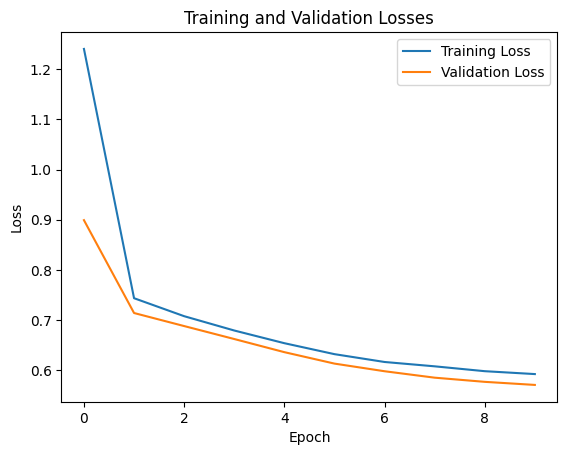

F1 Score: 0.7523, Precision: 0.7069, Recall: 0.8039, Accuracy: 0.7353
ROC AUC: 0.7748
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=256, Dropout Rate=0.3, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 1.6109, Validation Loss: 0.7796
Epoch [2/10], Training Loss: 0.8858, Validation Loss: 0.7769
Epoch [3/10], Training Loss: 0.7368, Validation Loss: 0.6798
Epoch [4/10], Training Loss: 0.6819, Validation Loss: 0.6832
Epoch [5/10], Training Loss: 0.6790, Validation Loss: 0.6631
Epoch [6/10], Training Loss: 0.6637, Validation Loss: 0.6497
Epoch [7/10], Training Loss: 0.6489, Validation Loss: 0.6342
Epoch [8/10], Training Loss: 0.6324, Validation Loss: 0.6156
Epoch [9/10], Training Loss: 0.6175, Validation Loss: 0.6023
Epoch [10/10], Training Loss: 0.6060, Validation Loss: 0.5929


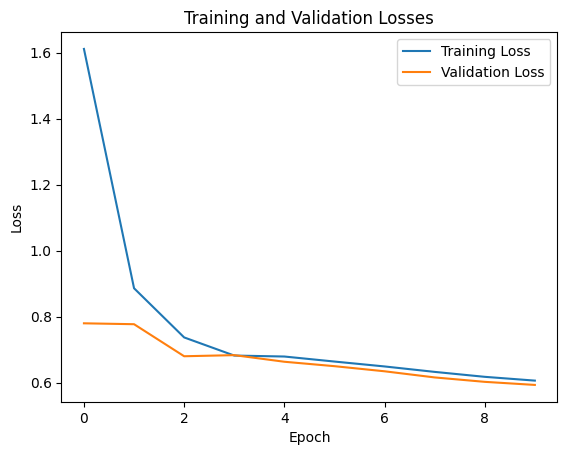

F1 Score: 0.7289, Precision: 0.6667, Recall: 0.8039, Accuracy: 0.7010
ROC AUC: 0.7520
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=256, Dropout Rate=0.3, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.8770, Validation Loss: 0.9718
Epoch [2/10], Training Loss: 0.9489, Validation Loss: 0.8826
Epoch [3/10], Training Loss: 0.8817, Validation Loss: 0.7857
Epoch [4/10], Training Loss: 0.7821, Validation Loss: 0.6942
Epoch [5/10], Training Loss: 0.6934, Validation Loss: 0.6830
Epoch [6/10], Training Loss: 0.6834, Validation Loss: 0.6870
Epoch [7/10], Training Loss: 0.6872, Validation Loss: 0.6895
Epoch [8/10], Training Loss: 0.6896, Validation Loss: 0.6903
Epoch [9/10], Training Loss: 0.6903, Validation Loss: 0.6901
Epoch [10/10], Training Loss: 0.6900, Validation Loss: 0.6886


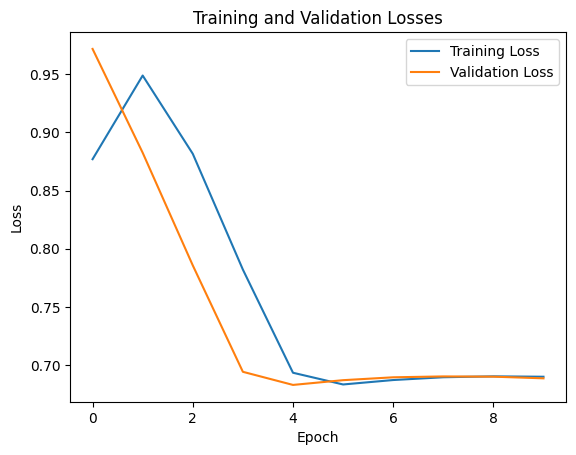

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


F1 Score: 0.0000, Precision: 0.0000, Recall: 0.0000, Accuracy: 0.5000
ROC AUC: 0.6825
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=256, Dropout Rate=0.5, Batch Size=16
Epoch [1/10], Training Loss: 0.7702, Validation Loss: 0.6228
Epoch [2/10], Training Loss: 0.6255, Validation Loss: 0.6105
Epoch [3/10], Training Loss: 0.5973, Validation Loss: 0.5834
Epoch [4/10], Training Loss: 0.5813, Validation Loss: 0.5714
Epoch [5/10], Training Loss: 0.5708, Validation Loss: 0.5619
Epoch [6/10], Training Loss: 0.5629, Validation Loss: 0.5528
Epoch [7/10], Training Loss: 0.5552, Validation Loss: 0.5448
Epoch [8/10], Training Loss: 0.5479, Validation Loss: 0.5358
Epoch [9/10], Training Loss: 0.5384, Validation Loss: 0.5260
Epoch [10/10], Training Loss: 0.5302, Validation Loss: 0.5164


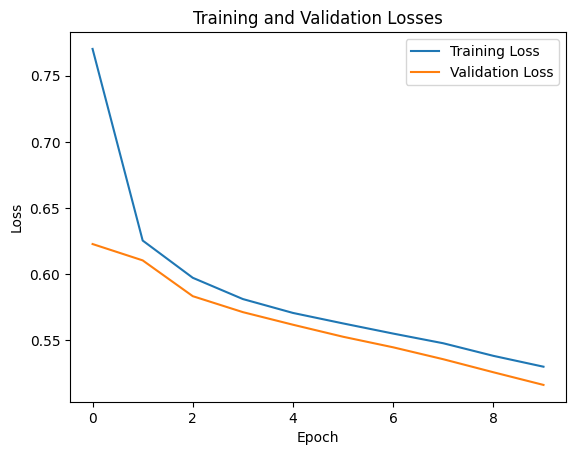

F1 Score: 0.7707, Precision: 0.7670, Recall: 0.7745, Accuracy: 0.7696
ROC AUC: 0.8182
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=256, Dropout Rate=0.5, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 1.1726, Validation Loss: 0.8449
Epoch [2/10], Training Loss: 0.7220, Validation Loss: 0.6950
Epoch [3/10], Training Loss: 0.6952, Validation Loss: 0.6866
Epoch [4/10], Training Loss: 0.6821, Validation Loss: 0.6720
Epoch [5/10], Training Loss: 0.6697, Validation Loss: 0.6514
Epoch [6/10], Training Loss: 0.6455, Validation Loss: 0.6250
Epoch [7/10], Training Loss: 0.6315, Validation Loss: 0.6109
Epoch [8/10], Training Loss: 0.6204, Validation Loss: 0.5968
Epoch [9/10], Training Loss: 0.6035, Validation Loss: 0.5796
Epoch [10/10], Training Loss: 0.5915, Validation Loss: 0.5623


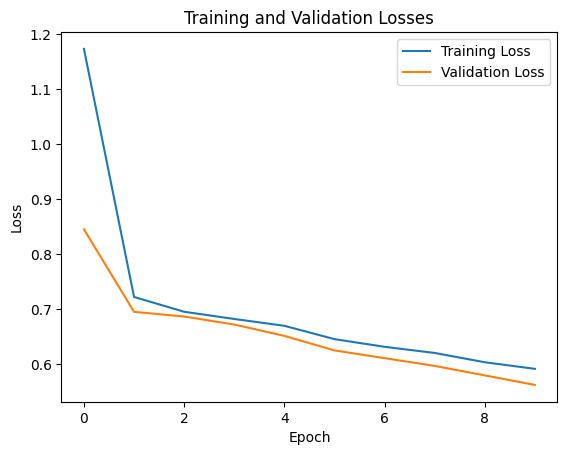

F1 Score: 0.7523, Precision: 0.7069, Recall: 0.8039, Accuracy: 0.7353
ROC AUC: 0.7888
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=256, Dropout Rate=0.5, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 1.1655, Validation Loss: 1.0348
Epoch [2/10], Training Loss: 0.9542, Validation Loss: 0.6584
Epoch [3/10], Training Loss: 0.6699, Validation Loss: 0.7065
Epoch [4/10], Training Loss: 0.7030, Validation Loss: 0.6698
Epoch [5/10], Training Loss: 0.6612, Validation Loss: 0.6471
Epoch [6/10], Training Loss: 0.6463, Validation Loss: 0.6271
Epoch [7/10], Training Loss: 0.6325, Validation Loss: 0.6115
Epoch [8/10], Training Loss: 0.6199, Validation Loss: 0.6015
Epoch [9/10], Training Loss: 0.6107, Validation Loss: 0.5936
Epoch [10/10], Training Loss: 0.6024, Validation Loss: 0.5865


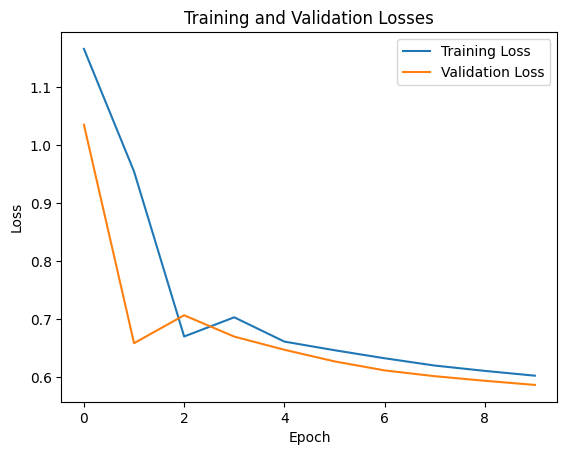

F1 Score: 0.7189, Precision: 0.6783, Recall: 0.7647, Accuracy: 0.7010
ROC AUC: 0.7577
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=256, Dropout Rate=0.5, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7716, Validation Loss: 0.6524
Epoch [2/10], Training Loss: 0.6804, Validation Loss: 0.6574
Epoch [3/10], Training Loss: 0.6572, Validation Loss: 0.6818
Epoch [4/10], Training Loss: 0.6835, Validation Loss: 0.6653
Epoch [5/10], Training Loss: 0.6639, Validation Loss: 0.6350
Epoch [6/10], Training Loss: 0.6360, Validation Loss: 0.6508
Epoch [7/10], Training Loss: 0.6520, Validation Loss: 0.6491
Epoch [8/10], Training Loss: 0.6496, Validation Loss: 0.6336
Epoch [9/10], Training Loss: 0.6341, Validation Loss: 0.6199
Epoch [10/10], Training Loss: 0.6209, Validation Loss: 0.6096


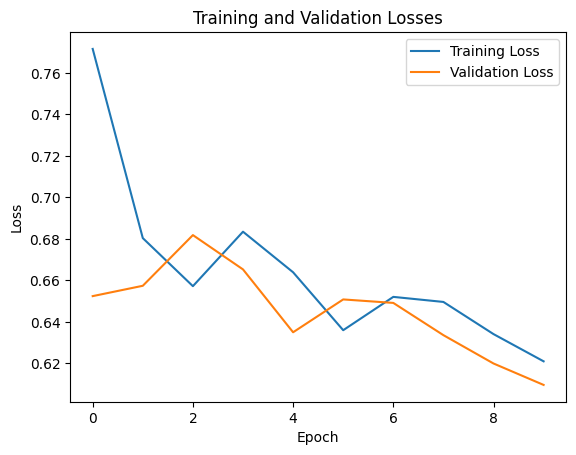

F1 Score: 0.7456, Precision: 0.6746, Recall: 0.8333, Accuracy: 0.7157
ROC AUC: 0.7537
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=256, Dropout Rate=0.7, Batch Size=16


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.9958, Validation Loss: 0.7191
Epoch [2/10], Training Loss: 0.6852, Validation Loss: 0.6512
Epoch [3/10], Training Loss: 0.6322, Validation Loss: 0.5984
Epoch [4/10], Training Loss: 0.6041, Validation Loss: 0.5828
Epoch [5/10], Training Loss: 0.5872, Validation Loss: 0.5628
Epoch [6/10], Training Loss: 0.5773, Validation Loss: 0.5552
Epoch [7/10], Training Loss: 0.5669, Validation Loss: 0.5437
Epoch [8/10], Training Loss: 0.5583, Validation Loss: 0.5365
Epoch [9/10], Training Loss: 0.5530, Validation Loss: 0.5317
Epoch [10/10], Training Loss: 0.5460, Validation Loss: 0.5272


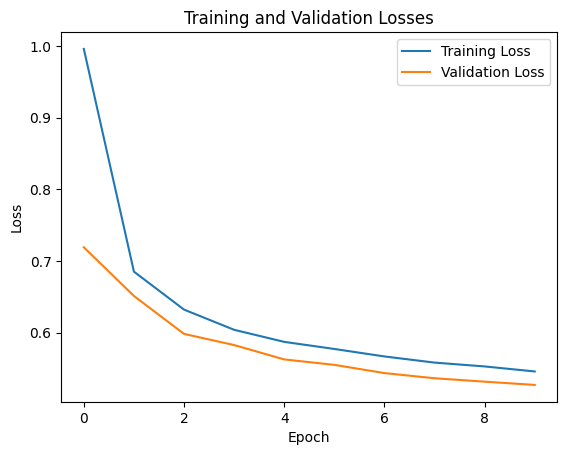

F1 Score: 0.7721, Precision: 0.7345, Recall: 0.8137, Accuracy: 0.7598
ROC AUC: 0.8128
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=256, Dropout Rate=0.7, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 1.1296, Validation Loss: 0.7484
Epoch [2/10], Training Loss: 0.6862, Validation Loss: 0.6759
Epoch [3/10], Training Loss: 0.6605, Validation Loss: 0.6446
Epoch [4/10], Training Loss: 0.6337, Validation Loss: 0.6157
Epoch [5/10], Training Loss: 0.6139, Validation Loss: 0.5996
Epoch [6/10], Training Loss: 0.6027, Validation Loss: 0.5848
Epoch [7/10], Training Loss: 0.5893, Validation Loss: 0.5710
Epoch [8/10], Training Loss: 0.5821, Validation Loss: 0.5617
Epoch [9/10], Training Loss: 0.5742, Validation Loss: 0.5560
Epoch [10/10], Training Loss: 0.5685, Validation Loss: 0.5503


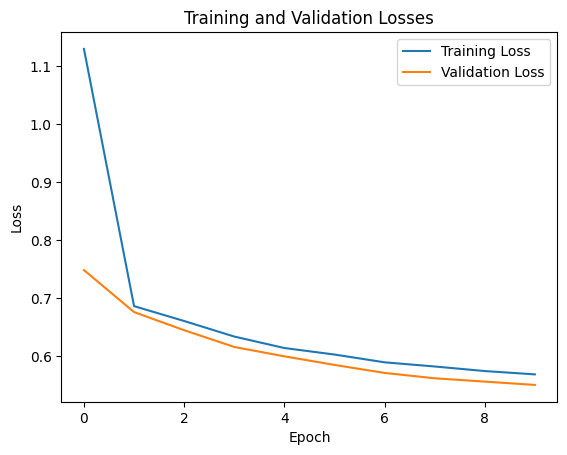

F1 Score: 0.7671, Precision: 0.7179, Recall: 0.8235, Accuracy: 0.7500
ROC AUC: 0.7936
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=256, Dropout Rate=0.7, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.7729, Validation Loss: 0.6892
Epoch [2/10], Training Loss: 0.7969, Validation Loss: 0.8213
Epoch [3/10], Training Loss: 0.7483, Validation Loss: 0.6518
Epoch [4/10], Training Loss: 0.6629, Validation Loss: 0.6884
Epoch [5/10], Training Loss: 0.6899, Validation Loss: 0.6829
Epoch [6/10], Training Loss: 0.6799, Validation Loss: 0.6688
Epoch [7/10], Training Loss: 0.6659, Validation Loss: 0.6504
Epoch [8/10], Training Loss: 0.6476, Validation Loss: 0.6411
Epoch [9/10], Training Loss: 0.6404, Validation Loss: 0.6262
Epoch [10/10], Training Loss: 0.6309, Validation Loss: 0.6145


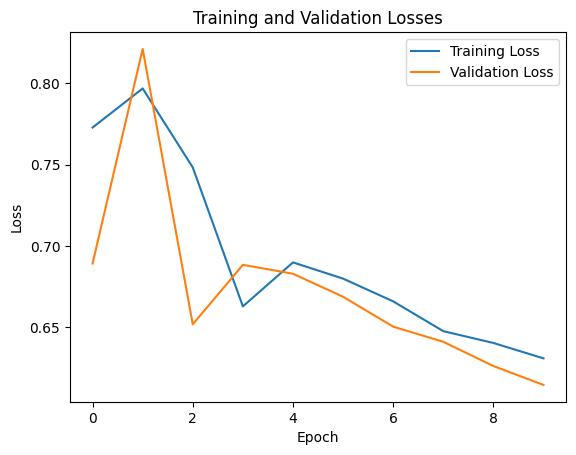

F1 Score: 0.6726, Precision: 0.6198, Recall: 0.7353, Accuracy: 0.6422
ROC AUC: 0.7195
Testing hyperparameters: Learning Rate=0.02, Hidden Dimension=256, Dropout Rate=0.7, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 0.9137, Validation Loss: 1.0810
Epoch [2/10], Training Loss: 1.0586, Validation Loss: 1.0725
Epoch [3/10], Training Loss: 1.0667, Validation Loss: 0.8294
Epoch [4/10], Training Loss: 0.8224, Validation Loss: 0.6914
Epoch [5/10], Training Loss: 0.6907, Validation Loss: 0.6810
Epoch [6/10], Training Loss: 0.6813, Validation Loss: 0.6856
Epoch [7/10], Training Loss: 0.6857, Validation Loss: 0.6848
Epoch [8/10], Training Loss: 0.6845, Validation Loss: 0.6755
Epoch [9/10], Training Loss: 0.6758, Validation Loss: 0.6718
Epoch [10/10], Training Loss: 0.6737, Validation Loss: 0.6667


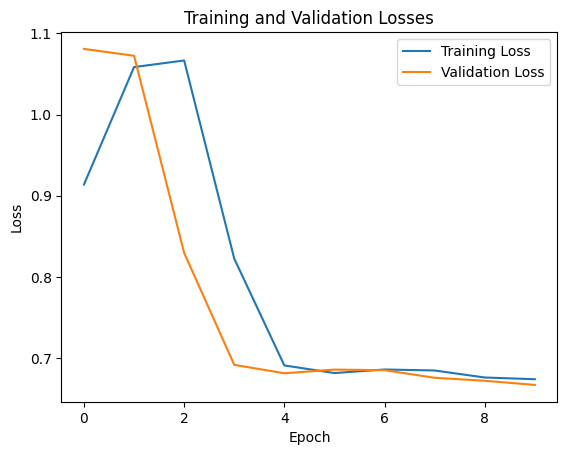

F1 Score: 0.6855, Precision: 0.5359, Recall: 0.9510, Accuracy: 0.5637
ROC AUC: 0.7182
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=64, Dropout Rate=0.3, Batch Size=16


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 1.6558, Validation Loss: 0.7169
Epoch [2/10], Training Loss: 0.7076, Validation Loss: 0.6940
Epoch [3/10], Training Loss: 0.6948, Validation Loss: 0.6972
Epoch [4/10], Training Loss: 0.6952, Validation Loss: 0.6931
Epoch [5/10], Training Loss: 0.6936, Validation Loss: 0.6938
Epoch [6/10], Training Loss: 0.6933, Validation Loss: 0.6933
Epoch [7/10], Training Loss: 0.6933, Validation Loss: 0.6932
Epoch [8/10], Training Loss: 0.6932, Validation Loss: 0.6932
Epoch [9/10], Training Loss: 0.6932, Validation Loss: 0.6932
Epoch [10/10], Training Loss: 0.6932, Validation Loss: 0.6931


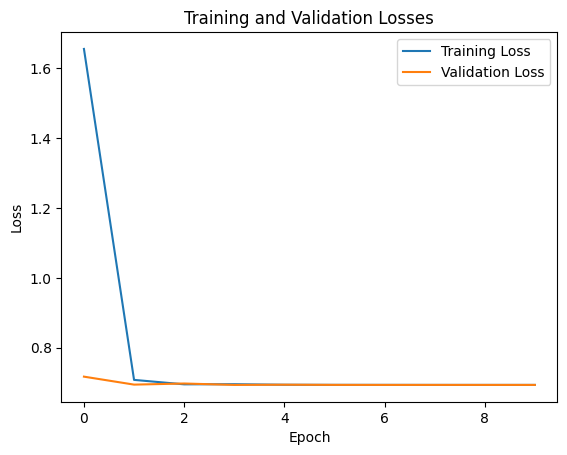

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


F1 Score: 0.0000, Precision: 0.0000, Recall: 0.0000, Accuracy: 0.5000
ROC AUC: 0.5000
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=64, Dropout Rate=0.3, Batch Size=32
Epoch [1/10], Training Loss: 1.9234, Validation Loss: 0.9712
Epoch [2/10], Training Loss: 0.7772, Validation Loss: 0.7156
Epoch [3/10], Training Loss: 0.6704, Validation Loss: 0.6430
Epoch [4/10], Training Loss: 0.6465, Validation Loss: 0.6311
Epoch [5/10], Training Loss: 0.6441, Validation Loss: 0.6270
Epoch [6/10], Training Loss: 0.6342, Validation Loss: 0.6187
Epoch [7/10], Training Loss: 0.6254, Validation Loss: 0.6039
Epoch [8/10], Training Loss: 0.6061, Validation Loss: 0.5864
Epoch [9/10], Training Loss: 0.5965, Validation Loss: 0.5698
Epoch [10/10], Training Loss: 0.5858, Validation Loss: 0.5745


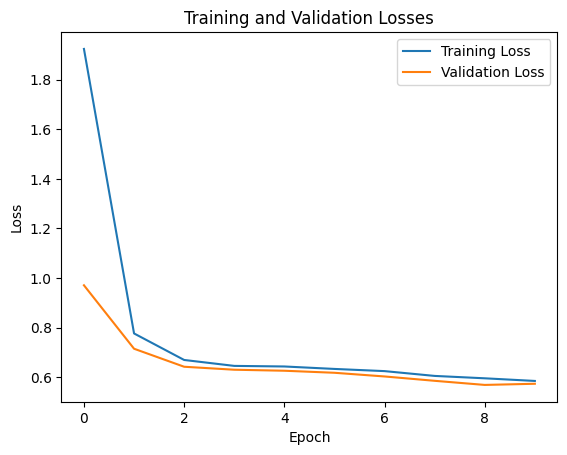

F1 Score: 0.7414, Precision: 0.6615, Recall: 0.8431, Accuracy: 0.7059
ROC AUC: 0.7834
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=64, Dropout Rate=0.3, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 4.5146, Validation Loss: 2.5988
Epoch [2/10], Training Loss: 2.4271, Validation Loss: 0.8772
Epoch [3/10], Training Loss: 0.7795, Validation Loss: 0.6952
Epoch [4/10], Training Loss: 0.6988, Validation Loss: 0.7077
Epoch [5/10], Training Loss: 0.7088, Validation Loss: 0.7110
Epoch [6/10], Training Loss: 0.7108, Validation Loss: 0.7092
Epoch [7/10], Training Loss: 0.7083, Validation Loss: 0.7054
Epoch [8/10], Training Loss: 0.7046, Validation Loss: 0.7013
Epoch [9/10], Training Loss: 0.7004, Validation Loss: 0.6972
Epoch [10/10], Training Loss: 0.6965, Validation Loss: 0.6941


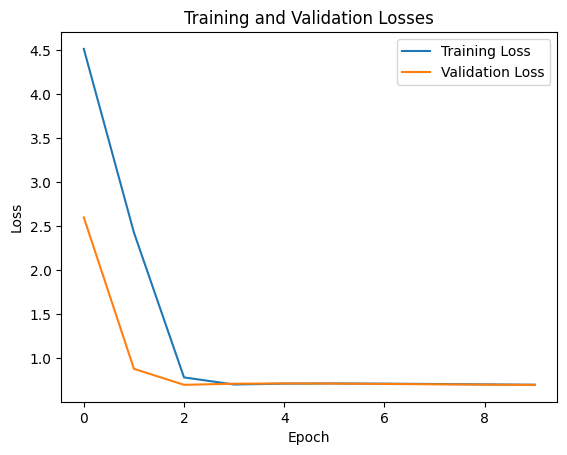

F1 Score: 0.4891, Precision: 0.4409, Recall: 0.5490, Accuracy: 0.4265
ROC AUC: 0.3542
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=64, Dropout Rate=0.3, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 1.4299, Validation Loss: 1.4531
Epoch [2/10], Training Loss: 1.5265, Validation Loss: 1.8185
Epoch [3/10], Training Loss: 1.7548, Validation Loss: 0.6668
Epoch [4/10], Training Loss: 0.6742, Validation Loss: 0.7248
Epoch [5/10], Training Loss: 0.7270, Validation Loss: 0.7247
Epoch [6/10], Training Loss: 0.7266, Validation Loss: 0.6987
Epoch [7/10], Training Loss: 0.6996, Validation Loss: 0.6826
Epoch [8/10], Training Loss: 0.6838, Validation Loss: 0.6813
Epoch [9/10], Training Loss: 0.6819, Validation Loss: 0.6861
Epoch [10/10], Training Loss: 0.6865, Validation Loss: 0.6904


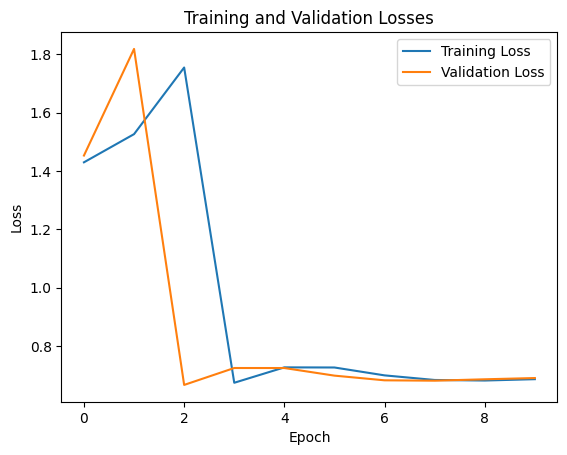

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


F1 Score: 0.0000, Precision: 0.0000, Recall: 0.0000, Accuracy: 0.5000
ROC AUC: 0.7167
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=64, Dropout Rate=0.5, Batch Size=16
Epoch [1/10], Training Loss: 1.2730, Validation Loss: 0.6543
Epoch [2/10], Training Loss: 0.6700, Validation Loss: 0.6529
Epoch [3/10], Training Loss: 0.6491, Validation Loss: 0.6100
Epoch [4/10], Training Loss: 0.6303, Validation Loss: 0.6131
Epoch [5/10], Training Loss: 0.6167, Validation Loss: 0.5890
Epoch [6/10], Training Loss: 0.6049, Validation Loss: 0.5849
Epoch [7/10], Training Loss: 0.5985, Validation Loss: 0.5745
Epoch [8/10], Training Loss: 0.5900, Validation Loss: 0.5694
Epoch [9/10], Training Loss: 0.5866, Validation Loss: 0.5628
Epoch [10/10], Training Loss: 0.5784, Validation Loss: 0.5567


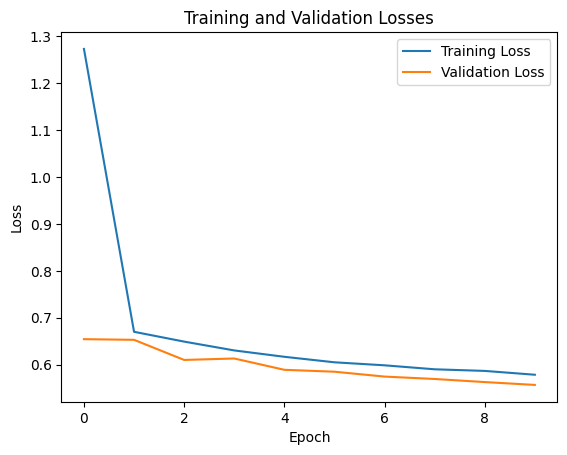

F1 Score: 0.7228, Precision: 0.7300, Recall: 0.7157, Accuracy: 0.7255
ROC AUC: 0.7884
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=64, Dropout Rate=0.5, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 2.5347, Validation Loss: 1.1087
Epoch [2/10], Training Loss: 0.8360, Validation Loss: 0.7098
Epoch [3/10], Training Loss: 0.7170, Validation Loss: 0.7214
Epoch [4/10], Training Loss: 0.7166, Validation Loss: 0.7048
Epoch [5/10], Training Loss: 0.6996, Validation Loss: 0.6934
Epoch [6/10], Training Loss: 0.6936, Validation Loss: 0.6956
Epoch [7/10], Training Loss: 0.6966, Validation Loss: 0.6970
Epoch [8/10], Training Loss: 0.6962, Validation Loss: 0.6942
Epoch [9/10], Training Loss: 0.6936, Validation Loss: 0.6932
Epoch [10/10], Training Loss: 0.6934, Validation Loss: 0.6938


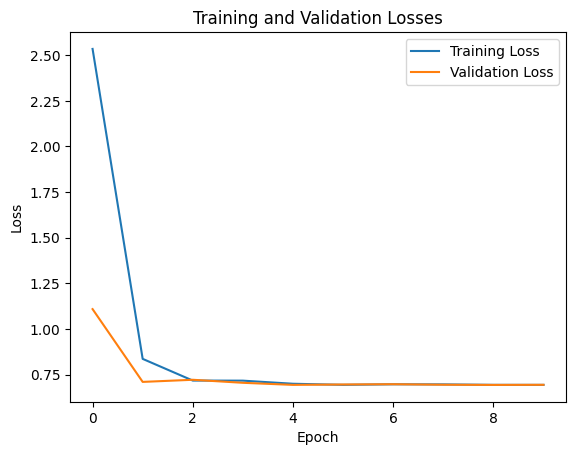

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


F1 Score: 0.0000, Precision: 0.0000, Recall: 0.0000, Accuracy: 0.5000
ROC AUC: 0.5000
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=64, Dropout Rate=0.5, Batch Size=64
Epoch [1/10], Training Loss: 3.1303, Validation Loss: 0.9634
Epoch [2/10], Training Loss: 0.8879, Validation Loss: 0.7231
Epoch [3/10], Training Loss: 0.6893, Validation Loss: 0.6951
Epoch [4/10], Training Loss: 0.7010, Validation Loss: 0.6957
Epoch [5/10], Training Loss: 0.6972, Validation Loss: 0.6889
Epoch [6/10], Training Loss: 0.6912, Validation Loss: 0.6866
Epoch [7/10], Training Loss: 0.6874, Validation Loss: 0.6846
Epoch [8/10], Training Loss: 0.6865, Validation Loss: 0.6825
Epoch [9/10], Training Loss: 0.6861, Validation Loss: 0.6814
Epoch [10/10], Training Loss: 0.6867, Validation Loss: 0.6811


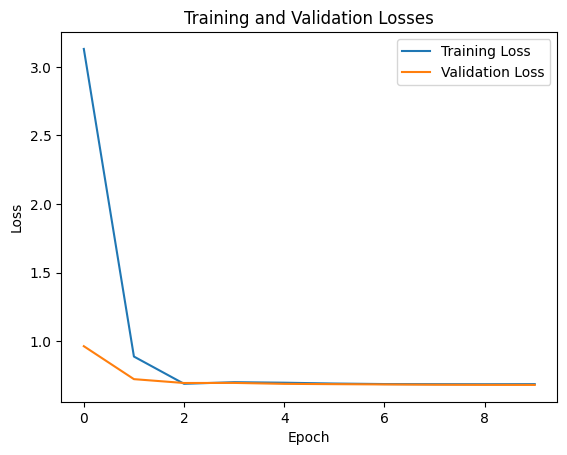

F1 Score: 0.6735, Precision: 0.5185, Recall: 0.9608, Accuracy: 0.5343
ROC AUC: 0.6226
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=64, Dropout Rate=0.5, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 1.5316, Validation Loss: 2.0789
Epoch [2/10], Training Loss: 1.9476, Validation Loss: 0.7815
Epoch [3/10], Training Loss: 0.7873, Validation Loss: 0.7193
Epoch [4/10], Training Loss: 0.7195, Validation Loss: 0.6972
Epoch [5/10], Training Loss: 0.6970, Validation Loss: 0.6951
Epoch [6/10], Training Loss: 0.6950, Validation Loss: 0.6939
Epoch [7/10], Training Loss: 0.6939, Validation Loss: 0.6932
Epoch [8/10], Training Loss: 0.6932, Validation Loss: 0.6932
Epoch [9/10], Training Loss: 0.6932, Validation Loss: 0.6935
Epoch [10/10], Training Loss: 0.6935, Validation Loss: 0.6938


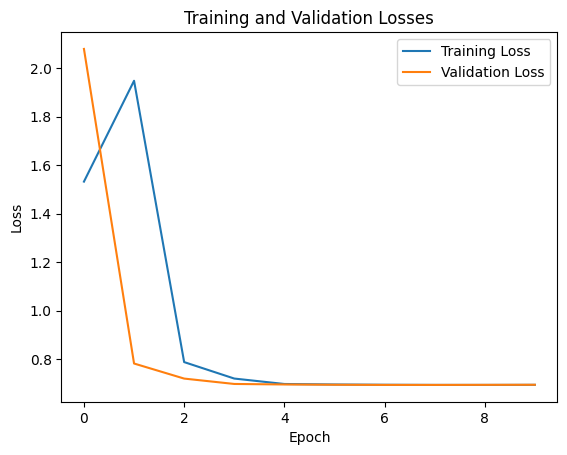

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


F1 Score: 0.0000, Precision: 0.0000, Recall: 0.0000, Accuracy: 0.5000
ROC AUC: 0.5000
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=64, Dropout Rate=0.7, Batch Size=16
Epoch [1/10], Training Loss: 1.6614, Validation Loss: 0.6938
Epoch [2/10], Training Loss: 0.6964, Validation Loss: 0.6968
Epoch [3/10], Training Loss: 0.6947, Validation Loss: 0.6932
Epoch [4/10], Training Loss: 0.6936, Validation Loss: 0.6938
Epoch [5/10], Training Loss: 0.6934, Validation Loss: 0.6932
Epoch [6/10], Training Loss: 0.6932, Validation Loss: 0.6932
Epoch [7/10], Training Loss: 0.6932, Validation Loss: 0.6932
Epoch [8/10], Training Loss: 0.6932, Validation Loss: 0.6932
Epoch [9/10], Training Loss: 0.6932, Validation Loss: 0.6932
Epoch [10/10], Training Loss: 0.6931, Validation Loss: 0.6931


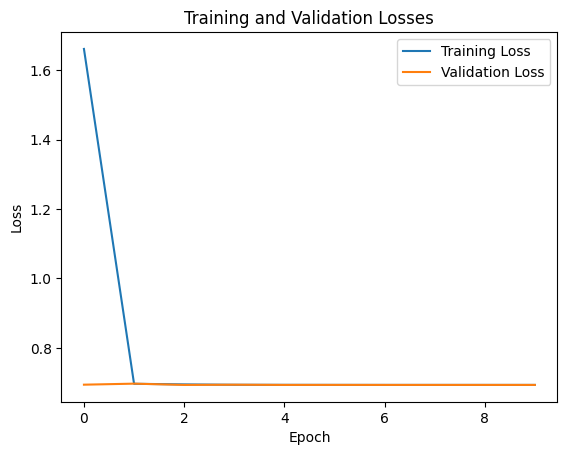

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


F1 Score: 0.0000, Precision: 0.0000, Recall: 0.0000, Accuracy: 0.5000
ROC AUC: 0.5000
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=64, Dropout Rate=0.7, Batch Size=32
Epoch [1/10], Training Loss: 2.2087, Validation Loss: 0.6998
Epoch [2/10], Training Loss: 0.7081, Validation Loss: 0.7166
Epoch [3/10], Training Loss: 0.7134, Validation Loss: 0.7035
Epoch [4/10], Training Loss: 0.6986, Validation Loss: 0.6932
Epoch [5/10], Training Loss: 0.6937, Validation Loss: 0.6960
Epoch [6/10], Training Loss: 0.6966, Validation Loss: 0.6964
Epoch [7/10], Training Loss: 0.6953, Validation Loss: 0.6935
Epoch [8/10], Training Loss: 0.6933, Validation Loss: 0.6935
Epoch [9/10], Training Loss: 0.6937, Validation Loss: 0.6939
Epoch [10/10], Training Loss: 0.6937, Validation Loss: 0.6933


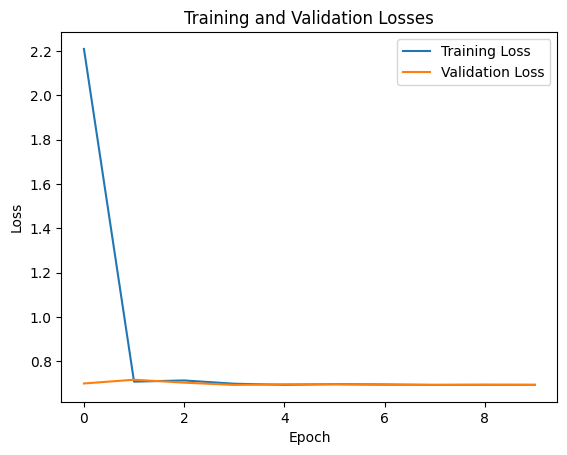

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


F1 Score: 0.0000, Precision: 0.0000, Recall: 0.0000, Accuracy: 0.5000
ROC AUC: 0.5000
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=64, Dropout Rate=0.7, Batch Size=64
Epoch [1/10], Training Loss: 3.0964, Validation Loss: 1.9066
Epoch [2/10], Training Loss: 1.6236, Validation Loss: 1.2161
Epoch [3/10], Training Loss: 0.9366, Validation Loss: 0.7823
Epoch [4/10], Training Loss: 0.7883, Validation Loss: 0.7135
Epoch [5/10], Training Loss: 0.7020, Validation Loss: 0.6784
Epoch [6/10], Training Loss: 0.6809, Validation Loss: 0.6850
Epoch [7/10], Training Loss: 0.6867, Validation Loss: 0.6840
Epoch [8/10], Training Loss: 0.6876, Validation Loss: 0.6774
Epoch [9/10], Training Loss: 0.6836, Validation Loss: 0.6711
Epoch [10/10], Training Loss: 0.6824, Validation Loss: 0.6674


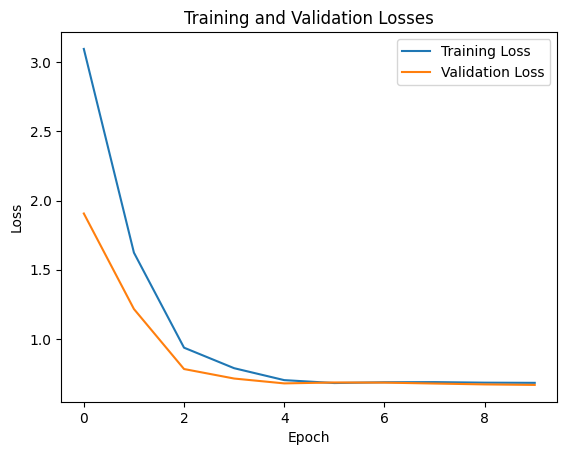

F1 Score: 0.5926, Precision: 0.5106, Recall: 0.7059, Accuracy: 0.5147
ROC AUC: 0.5683
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=64, Dropout Rate=0.7, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 1.3347, Validation Loss: 1.7073
Epoch [2/10], Training Loss: 1.6175, Validation Loss: 0.6945
Epoch [3/10], Training Loss: 0.6948, Validation Loss: 0.7013
Epoch [4/10], Training Loss: 0.7016, Validation Loss: 0.7072
Epoch [5/10], Training Loss: 0.7073, Validation Loss: 0.7089
Epoch [6/10], Training Loss: 0.7088, Validation Loss: 0.7065
Epoch [7/10], Training Loss: 0.7063, Validation Loss: 0.7019
Epoch [8/10], Training Loss: 0.7017, Validation Loss: 0.6973
Epoch [9/10], Training Loss: 0.6971, Validation Loss: 0.6942
Epoch [10/10], Training Loss: 0.6941, Validation Loss: 0.6931


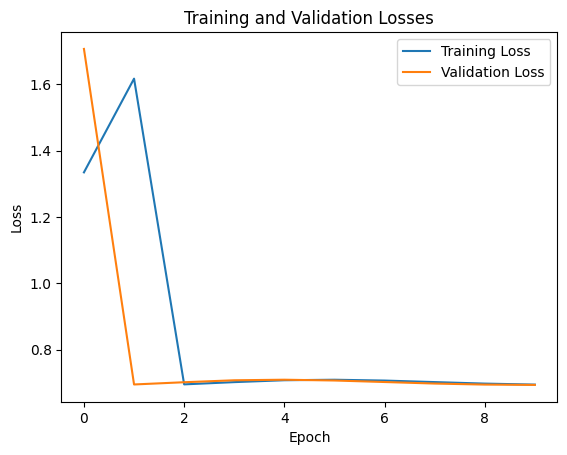

F1 Score: 0.6667, Precision: 0.5000, Recall: 1.0000, Accuracy: 0.5000
ROC AUC: 0.5000
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=128, Dropout Rate=0.3, Batch Size=16


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 2.8152, Validation Loss: 0.7168
Epoch [2/10], Training Loss: 0.7078, Validation Loss: 0.6943
Epoch [3/10], Training Loss: 0.6947, Validation Loss: 0.6971
Epoch [4/10], Training Loss: 0.6953, Validation Loss: 0.6932
Epoch [5/10], Training Loss: 0.6936, Validation Loss: 0.6938
Epoch [6/10], Training Loss: 0.6934, Validation Loss: 0.6932
Epoch [7/10], Training Loss: 0.6933, Validation Loss: 0.6932
Epoch [8/10], Training Loss: 0.6932, Validation Loss: 0.6932
Epoch [9/10], Training Loss: 0.6932, Validation Loss: 0.6932
Epoch [10/10], Training Loss: 0.6932, Validation Loss: 0.6931


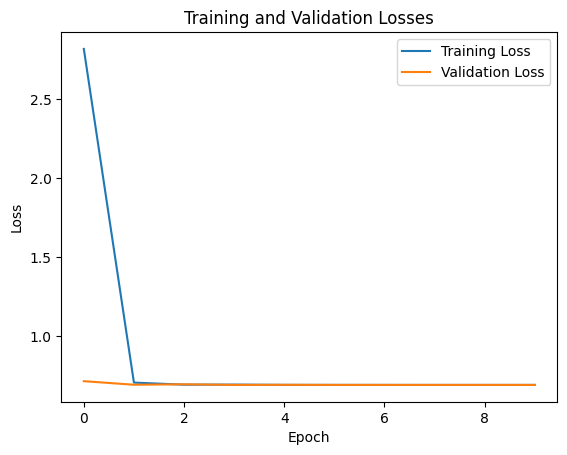

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


F1 Score: 0.0000, Precision: 0.0000, Recall: 0.0000, Accuracy: 0.5000
ROC AUC: 0.5000
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=128, Dropout Rate=0.3, Batch Size=32
Epoch [1/10], Training Loss: 3.9596, Validation Loss: 0.8096
Epoch [2/10], Training Loss: 0.8535, Validation Loss: 0.7164
Epoch [3/10], Training Loss: 0.7115, Validation Loss: 0.7015
Epoch [4/10], Training Loss: 0.6976, Validation Loss: 0.6933
Epoch [5/10], Training Loss: 0.6935, Validation Loss: 0.6949
Epoch [6/10], Training Loss: 0.6957, Validation Loss: 0.6961
Epoch [7/10], Training Loss: 0.6956, Validation Loss: 0.6942
Epoch [8/10], Training Loss: 0.6937, Validation Loss: 0.6931
Epoch [9/10], Training Loss: 0.6932, Validation Loss: 0.6935
Epoch [10/10], Training Loss: 0.6936, Validation Loss: 0.6935


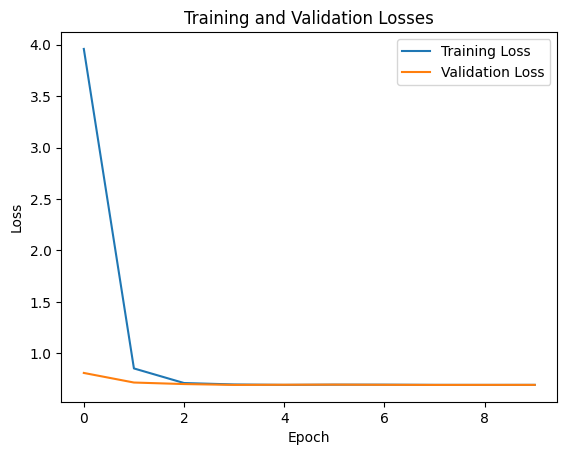

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


F1 Score: 0.0000, Precision: 0.0000, Recall: 0.0000, Accuracy: 0.5000
ROC AUC: 0.5000
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=128, Dropout Rate=0.3, Batch Size=64
Epoch [1/10], Training Loss: 5.1479, Validation Loss: 1.4072
Epoch [2/10], Training Loss: 1.4375, Validation Loss: 0.9854
Epoch [3/10], Training Loss: 0.8687, Validation Loss: 0.6789
Epoch [4/10], Training Loss: 0.6991, Validation Loss: 0.7420
Epoch [5/10], Training Loss: 0.7443, Validation Loss: 0.7463
Epoch [6/10], Training Loss: 0.7441, Validation Loss: 0.7325
Epoch [7/10], Training Loss: 0.7283, Validation Loss: 0.7129
Epoch [8/10], Training Loss: 0.7093, Validation Loss: 0.6983
Epoch [9/10], Training Loss: 0.6966, Validation Loss: 0.6932
Epoch [10/10], Training Loss: 0.6933, Validation Loss: 0.6951


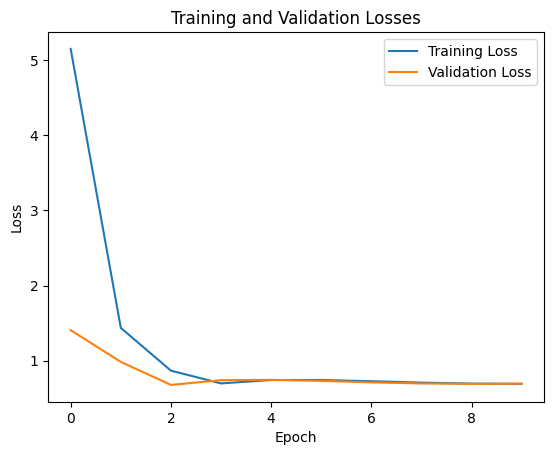

F1 Score: 0.6667, Precision: 0.5000, Recall: 1.0000, Accuracy: 0.5000
ROC AUC: 0.5000
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=128, Dropout Rate=0.3, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 1.6429, Validation Loss: 2.0159
Epoch [2/10], Training Loss: 1.9048, Validation Loss: 1.0673
Epoch [3/10], Training Loss: 1.0684, Validation Loss: 0.6451
Epoch [4/10], Training Loss: 0.6561, Validation Loss: 0.7446
Epoch [5/10], Training Loss: 0.7481, Validation Loss: 0.6939
Epoch [6/10], Training Loss: 0.6952, Validation Loss: 0.6597
Epoch [7/10], Training Loss: 0.6636, Validation Loss: 0.6530
Epoch [8/10], Training Loss: 0.6576, Validation Loss: 0.6408
Epoch [9/10], Training Loss: 0.6520, Validation Loss: 0.6305
Epoch [10/10], Training Loss: 0.6468, Validation Loss: 0.6250


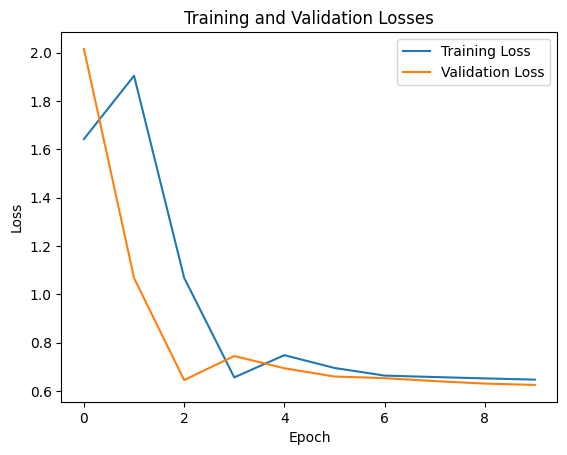

F1 Score: 0.7184, Precision: 0.6154, Recall: 0.8627, Accuracy: 0.6618
ROC AUC: 0.7040
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=128, Dropout Rate=0.5, Batch Size=16


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 2.1945, Validation Loss: 0.7068
Epoch [2/10], Training Loss: 0.7172, Validation Loss: 0.6705
Epoch [3/10], Training Loss: 0.6669, Validation Loss: 0.6465
Epoch [4/10], Training Loss: 0.6548, Validation Loss: 0.6313
Epoch [5/10], Training Loss: 0.6355, Validation Loss: 0.6028
Epoch [6/10], Training Loss: 0.6105, Validation Loss: 0.5862
Epoch [7/10], Training Loss: 0.5978, Validation Loss: 0.5664
Epoch [8/10], Training Loss: 0.5875, Validation Loss: 0.5623
Epoch [9/10], Training Loss: 0.5803, Validation Loss: 0.5526
Epoch [10/10], Training Loss: 0.5770, Validation Loss: 0.5503


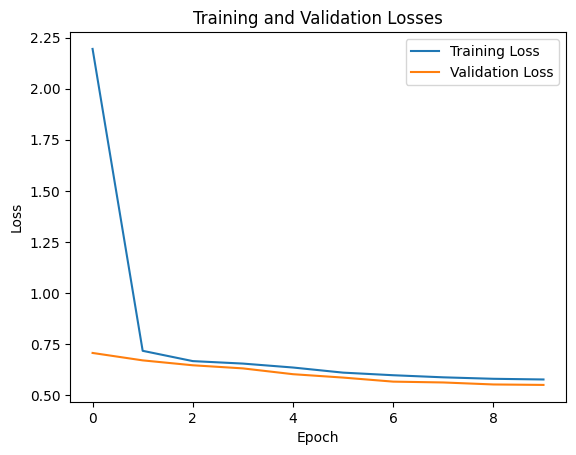

F1 Score: 0.7192, Precision: 0.7228, Recall: 0.7157, Accuracy: 0.7206
ROC AUC: 0.7947
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=128, Dropout Rate=0.5, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 4.2435, Validation Loss: 0.6920
Epoch [2/10], Training Loss: 1.0382, Validation Loss: 0.7316
Epoch [3/10], Training Loss: 0.7065, Validation Loss: 0.6944
Epoch [4/10], Training Loss: 0.6938, Validation Loss: 0.6946
Epoch [5/10], Training Loss: 0.6954, Validation Loss: 0.6964
Epoch [6/10], Training Loss: 0.6962, Validation Loss: 0.6952
Epoch [7/10], Training Loss: 0.6945, Validation Loss: 0.6934
Epoch [8/10], Training Loss: 0.6932, Validation Loss: 0.6933
Epoch [9/10], Training Loss: 0.6934, Validation Loss: 0.6936
Epoch [10/10], Training Loss: 0.6936, Validation Loss: 0.6934


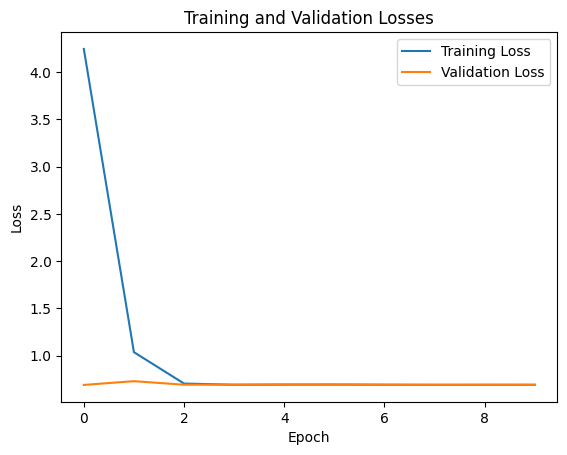

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


F1 Score: 0.0000, Precision: 0.0000, Recall: 0.0000, Accuracy: 0.5000
ROC AUC: 0.5000
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=128, Dropout Rate=0.5, Batch Size=64
Epoch [1/10], Training Loss: 5.3443, Validation Loss: 1.1505
Epoch [2/10], Training Loss: 1.4178, Validation Loss: 0.8187
Epoch [3/10], Training Loss: 0.7629, Validation Loss: 0.8393
Epoch [4/10], Training Loss: 0.8047, Validation Loss: 0.6952
Epoch [5/10], Training Loss: 0.6906, Validation Loss: 0.6845
Epoch [6/10], Training Loss: 0.6853, Validation Loss: 0.6798
Epoch [7/10], Training Loss: 0.6827, Validation Loss: 0.6718
Epoch [8/10], Training Loss: 0.6805, Validation Loss: 0.6649
Epoch [9/10], Training Loss: 0.6765, Validation Loss: 0.6618
Epoch [10/10], Training Loss: 0.6707, Validation Loss: 0.6526


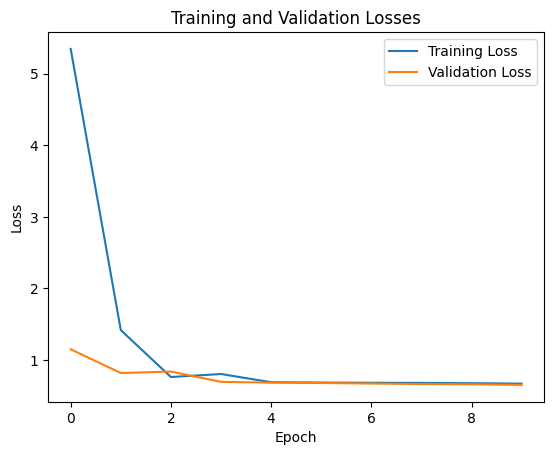

F1 Score: 0.7025, Precision: 0.6071, Recall: 0.8333, Accuracy: 0.6471
ROC AUC: 0.6845
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=128, Dropout Rate=0.5, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 2.1664, Validation Loss: 2.6426
Epoch [2/10], Training Loss: 2.4873, Validation Loss: 1.0630
Epoch [3/10], Training Loss: 1.0768, Validation Loss: 0.8096
Epoch [4/10], Training Loss: 0.8101, Validation Loss: 0.6845
Epoch [5/10], Training Loss: 0.6855, Validation Loss: 0.6943
Epoch [6/10], Training Loss: 0.6947, Validation Loss: 0.6985
Epoch [7/10], Training Loss: 0.6996, Validation Loss: 0.7010
Epoch [8/10], Training Loss: 0.7015, Validation Loss: 0.7014
Epoch [9/10], Training Loss: 0.7015, Validation Loss: 0.6980
Epoch [10/10], Training Loss: 0.6989, Validation Loss: 0.6930


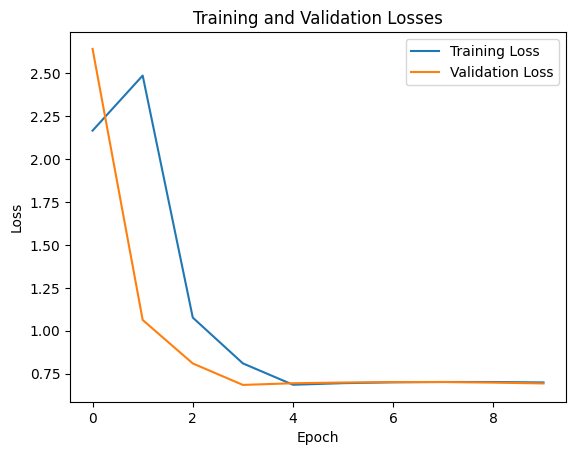

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


F1 Score: 0.0000, Precision: 0.0000, Recall: 0.0000, Accuracy: 0.5000
ROC AUC: 0.5030
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=128, Dropout Rate=0.7, Batch Size=16
Epoch [1/10], Training Loss: 1.9754, Validation Loss: 0.7002
Epoch [2/10], Training Loss: 0.6904, Validation Loss: 0.6638
Epoch [3/10], Training Loss: 0.6678, Validation Loss: 0.6517
Epoch [4/10], Training Loss: 0.6649, Validation Loss: 0.6449
Epoch [5/10], Training Loss: 0.6655, Validation Loss: 0.6489
Epoch [6/10], Training Loss: 0.6608, Validation Loss: 0.6452
Epoch [7/10], Training Loss: 0.6553, Validation Loss: 0.6342
Epoch [8/10], Training Loss: 0.6526, Validation Loss: 0.6302
Epoch [9/10], Training Loss: 0.6470, Validation Loss: 0.6216
Epoch [10/10], Training Loss: 0.6431, Validation Loss: 0.6263


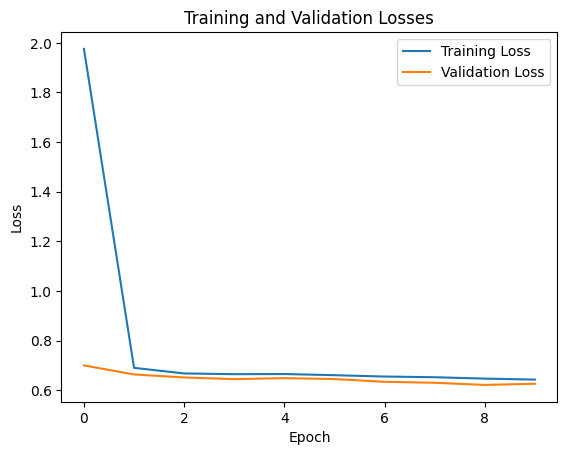

F1 Score: 0.7107, Precision: 0.6143, Recall: 0.8431, Accuracy: 0.6569
ROC AUC: 0.6928
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=128, Dropout Rate=0.7, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 4.3445, Validation Loss: 0.6982
Epoch [2/10], Training Loss: 0.7043, Validation Loss: 0.7106
Epoch [3/10], Training Loss: 0.7081, Validation Loss: 0.7006
Epoch [4/10], Training Loss: 0.6970, Validation Loss: 0.6932
Epoch [5/10], Training Loss: 0.6937, Validation Loss: 0.6954
Epoch [6/10], Training Loss: 0.6958, Validation Loss: 0.6955
Epoch [7/10], Training Loss: 0.6947, Validation Loss: 0.6934
Epoch [8/10], Training Loss: 0.6932, Validation Loss: 0.6934
Epoch [9/10], Training Loss: 0.6936, Validation Loss: 0.6937
Epoch [10/10], Training Loss: 0.6935, Validation Loss: 0.6932


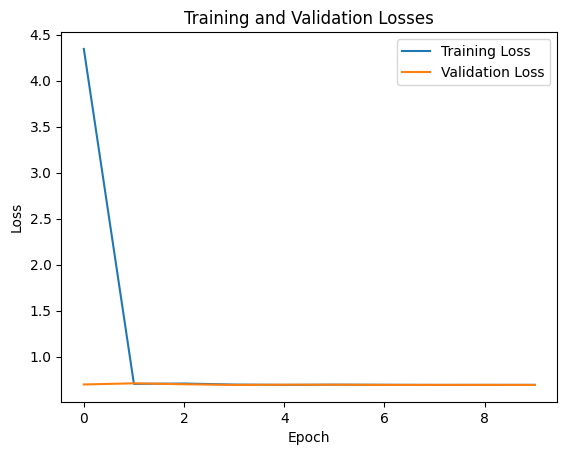

F1 Score: 0.6667, Precision: 0.5000, Recall: 1.0000, Accuracy: 0.5000
ROC AUC: 0.5000
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=128, Dropout Rate=0.7, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 5.5707, Validation Loss: 2.3128
Epoch [2/10], Training Loss: 1.4867, Validation Loss: 1.1246
Epoch [3/10], Training Loss: 0.9578, Validation Loss: 0.6860
Epoch [4/10], Training Loss: 0.7117, Validation Loss: 0.7069
Epoch [5/10], Training Loss: 0.6999, Validation Loss: 0.6737
Epoch [6/10], Training Loss: 0.6788, Validation Loss: 0.6633
Epoch [7/10], Training Loss: 0.6711, Validation Loss: 0.6596
Epoch [8/10], Training Loss: 0.6693, Validation Loss: 0.6519
Epoch [9/10], Training Loss: 0.6619, Validation Loss: 0.6506
Epoch [10/10], Training Loss: 0.6647, Validation Loss: 0.6471


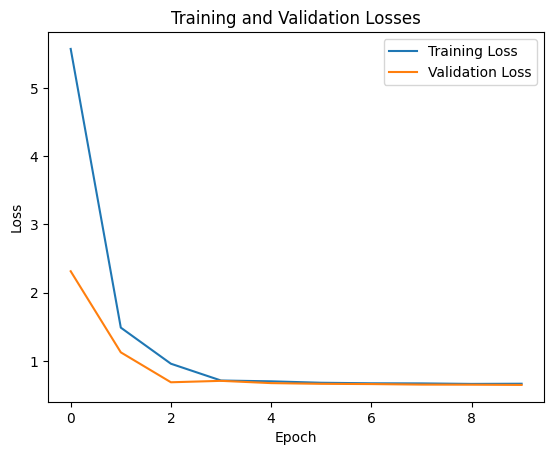

F1 Score: 0.7036, Precision: 0.5894, Recall: 0.8725, Accuracy: 0.6324
ROC AUC: 0.6028
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=128, Dropout Rate=0.7, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 1.7256, Validation Loss: 0.8391
Epoch [2/10], Training Loss: 1.3656, Validation Loss: 4.7427
Epoch [3/10], Training Loss: 4.5047, Validation Loss: 0.9175
Epoch [4/10], Training Loss: 0.8991, Validation Loss: 0.7335
Epoch [5/10], Training Loss: 0.7361, Validation Loss: 0.7601
Epoch [6/10], Training Loss: 0.7592, Validation Loss: 0.7271
Epoch [7/10], Training Loss: 0.7261, Validation Loss: 0.7141
Epoch [8/10], Training Loss: 0.7150, Validation Loss: 0.7331
Epoch [9/10], Training Loss: 0.7355, Validation Loss: 0.7305
Epoch [10/10], Training Loss: 0.7318, Validation Loss: 0.7116


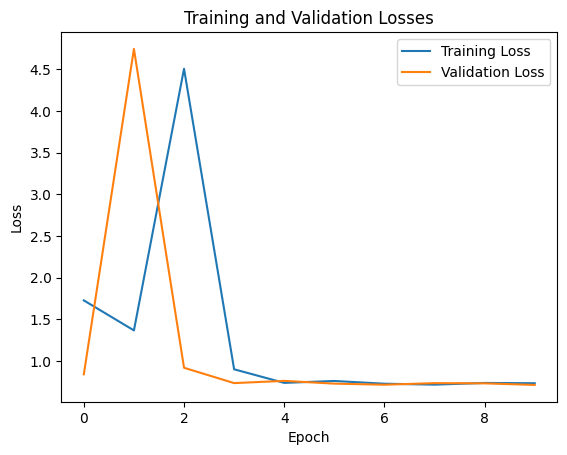

F1 Score: 0.5283, Precision: 0.4294, Recall: 0.6863, Accuracy: 0.3873
ROC AUC: 0.3081
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=256, Dropout Rate=0.3, Batch Size=16


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 5.1883, Validation Loss: 0.9865
Epoch [2/10], Training Loss: 0.7846, Validation Loss: 0.6938
Epoch [3/10], Training Loss: 0.6934, Validation Loss: 0.6932
Epoch [4/10], Training Loss: 0.6932, Validation Loss: 0.6932
Epoch [5/10], Training Loss: 0.6932, Validation Loss: 0.6932
Epoch [6/10], Training Loss: 0.6932, Validation Loss: 0.6932
Epoch [7/10], Training Loss: 0.6932, Validation Loss: 0.6932
Epoch [8/10], Training Loss: 0.6931, Validation Loss: 0.6931
Epoch [9/10], Training Loss: 0.6931, Validation Loss: 0.6931
Epoch [10/10], Training Loss: 0.6931, Validation Loss: 0.6931


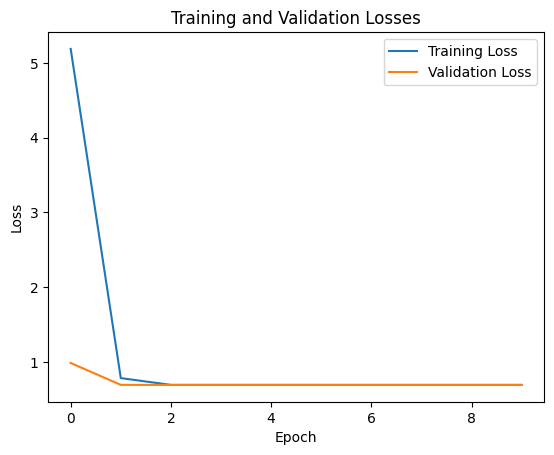

F1 Score: 0.6667, Precision: 0.5000, Recall: 1.0000, Accuracy: 0.5000
ROC AUC: 0.5000
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=256, Dropout Rate=0.3, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 7.3888, Validation Loss: 1.6429
Epoch [2/10], Training Loss: 1.0077, Validation Loss: 0.7180
Epoch [3/10], Training Loss: 0.6999, Validation Loss: 0.6946
Epoch [4/10], Training Loss: 0.6944, Validation Loss: 0.6935
Epoch [5/10], Training Loss: 0.6927, Validation Loss: 0.6913
Epoch [6/10], Training Loss: 0.6913, Validation Loss: 0.6899
Epoch [7/10], Training Loss: 0.6901, Validation Loss: 0.6891
Epoch [8/10], Training Loss: 0.6890, Validation Loss: 0.6880
Epoch [9/10], Training Loss: 0.6887, Validation Loss: 0.6862
Epoch [10/10], Training Loss: 0.6879, Validation Loss: 0.6843


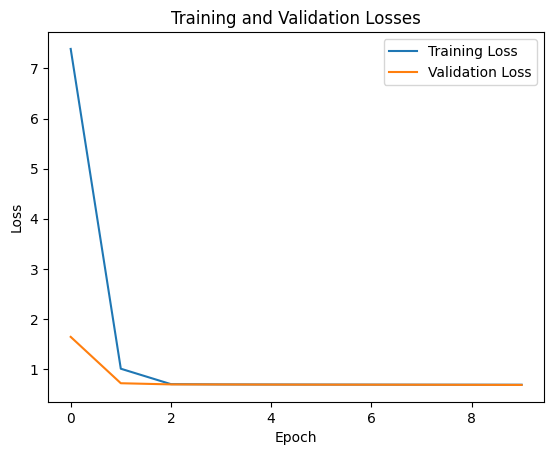

F1 Score: 0.5391, Precision: 0.4844, Recall: 0.6078, Accuracy: 0.4804
ROC AUC: 0.5008
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=256, Dropout Rate=0.3, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 9.4365, Validation Loss: 9.3100
Epoch [2/10], Training Loss: 7.9335, Validation Loss: 1.4168
Epoch [3/10], Training Loss: 1.0440, Validation Loss: 0.8122
Epoch [4/10], Training Loss: 0.7745, Validation Loss: 0.7087
Epoch [5/10], Training Loss: 0.7082, Validation Loss: 0.7047
Epoch [6/10], Training Loss: 0.7035, Validation Loss: 0.6990
Epoch [7/10], Training Loss: 0.6980, Validation Loss: 0.6949
Epoch [8/10], Training Loss: 0.6944, Validation Loss: 0.6932
Epoch [9/10], Training Loss: 0.6932, Validation Loss: 0.6935
Epoch [10/10], Training Loss: 0.6937, Validation Loss: 0.6944


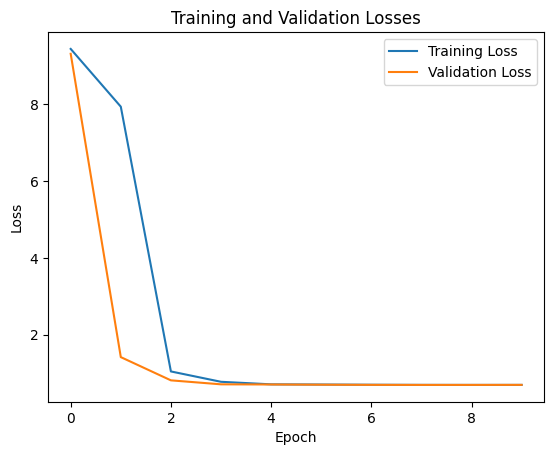

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


F1 Score: 0.0000, Precision: 0.0000, Recall: 0.0000, Accuracy: 0.5000
ROC AUC: 0.5000
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=256, Dropout Rate=0.3, Batch Size=128
Epoch [1/10], Training Loss: 2.0300, Validation Loss: 8.4072
Epoch [2/10], Training Loss: 7.9623, Validation Loss: 1.1304
Epoch [3/10], Training Loss: 1.1733, Validation Loss: 0.9397
Epoch [4/10], Training Loss: 0.9146, Validation Loss: 0.7444
Epoch [5/10], Training Loss: 0.7458, Validation Loss: 0.7173
Epoch [6/10], Training Loss: 0.7155, Validation Loss: 0.6947
Epoch [7/10], Training Loss: 0.6947, Validation Loss: 0.6951
Epoch [8/10], Training Loss: 0.6951, Validation Loss: 0.6957
Epoch [9/10], Training Loss: 0.6957, Validation Loss: 0.6960
Epoch [10/10], Training Loss: 0.6960, Validation Loss: 0.6958


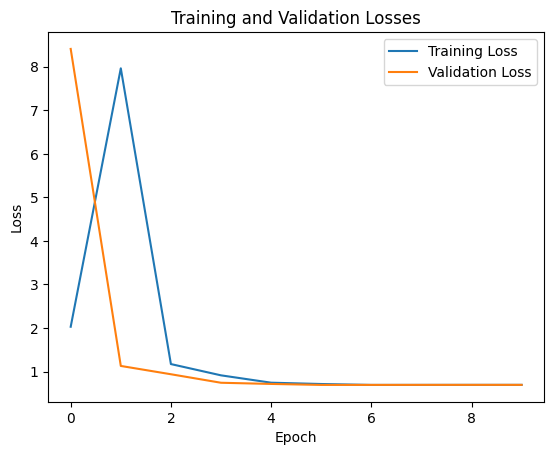

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


F1 Score: 0.0000, Precision: 0.0000, Recall: 0.0000, Accuracy: 0.5000
ROC AUC: 0.3291
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=256, Dropout Rate=0.5, Batch Size=16
Epoch [1/10], Training Loss: 3.0936, Validation Loss: 0.7161
Epoch [2/10], Training Loss: 0.6862, Validation Loss: 0.6585
Epoch [3/10], Training Loss: 0.6677, Validation Loss: 0.6574
Epoch [4/10], Training Loss: 0.6622, Validation Loss: 0.6420
Epoch [5/10], Training Loss: 0.6525, Validation Loss: 0.6361
Epoch [6/10], Training Loss: 0.6475, Validation Loss: 0.6238
Epoch [7/10], Training Loss: 0.6454, Validation Loss: 0.6207
Epoch [8/10], Training Loss: 0.6429, Validation Loss: 0.6209
Epoch [9/10], Training Loss: 0.6403, Validation Loss: 0.6197
Epoch [10/10], Training Loss: 0.6389, Validation Loss: 0.6171


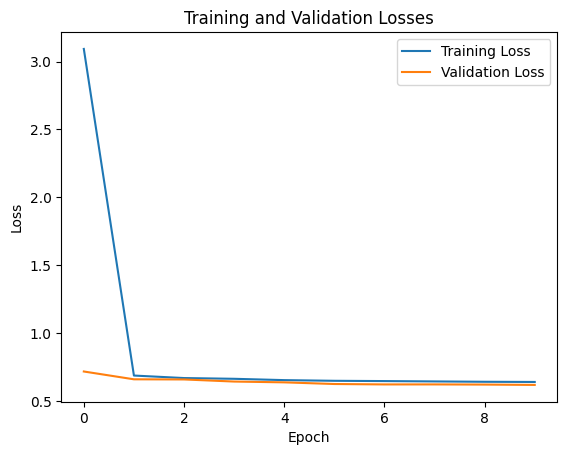

F1 Score: 0.7143, Precision: 0.6250, Recall: 0.8333, Accuracy: 0.6667
ROC AUC: 0.6965
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=256, Dropout Rate=0.5, Batch Size=32


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 7.4276, Validation Loss: 0.6986
Epoch [2/10], Training Loss: 0.7048, Validation Loss: 0.7110
Epoch [3/10], Training Loss: 0.7085, Validation Loss: 0.7007
Epoch [4/10], Training Loss: 0.6971, Validation Loss: 0.6932
Epoch [5/10], Training Loss: 0.6937, Validation Loss: 0.6954
Epoch [6/10], Training Loss: 0.6959, Validation Loss: 0.6956
Epoch [7/10], Training Loss: 0.6947, Validation Loss: 0.6934
Epoch [8/10], Training Loss: 0.6932, Validation Loss: 0.6934
Epoch [9/10], Training Loss: 0.6936, Validation Loss: 0.6937
Epoch [10/10], Training Loss: 0.6935, Validation Loss: 0.6932


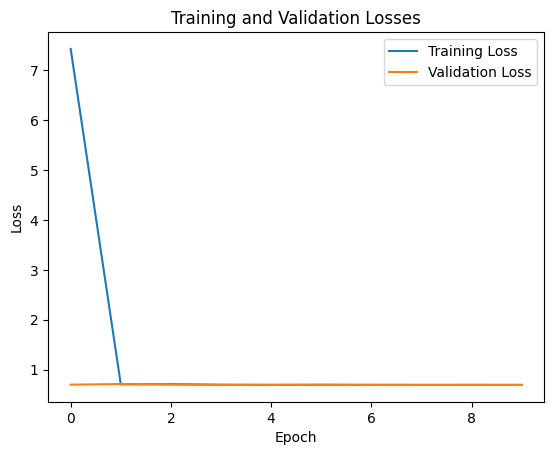

F1 Score: 0.6667, Precision: 0.5000, Recall: 1.0000, Accuracy: 0.5000
ROC AUC: 0.5000
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=256, Dropout Rate=0.5, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 9.6061, Validation Loss: 3.9255
Epoch [2/10], Training Loss: 2.6347, Validation Loss: 0.8429
Epoch [3/10], Training Loss: 0.8474, Validation Loss: 0.7034
Epoch [4/10], Training Loss: 0.7057, Validation Loss: 0.7486
Epoch [5/10], Training Loss: 0.7446, Validation Loss: 0.6963
Epoch [6/10], Training Loss: 0.6932, Validation Loss: 0.6626
Epoch [7/10], Training Loss: 0.6735, Validation Loss: 0.6595
Epoch [8/10], Training Loss: 0.6668, Validation Loss: 0.6534
Epoch [9/10], Training Loss: 0.6659, Validation Loss: 0.6497
Epoch [10/10], Training Loss: 0.6653, Validation Loss: 0.6520


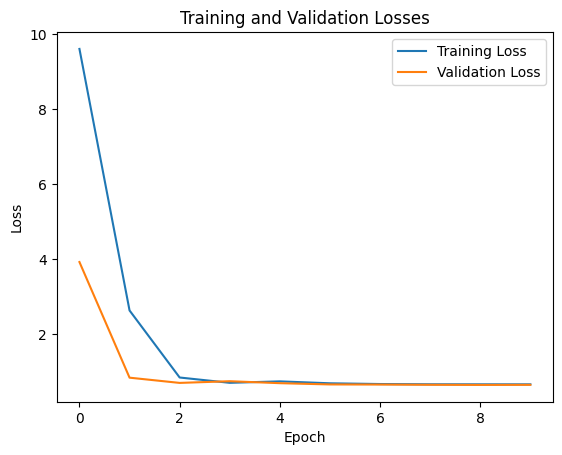

F1 Score: 0.7008, Precision: 0.5855, Recall: 0.8725, Accuracy: 0.6275
ROC AUC: 0.6322
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=256, Dropout Rate=0.5, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 2.6672, Validation Loss: 2.3161
Epoch [2/10], Training Loss: 2.7065, Validation Loss: 5.2125
Epoch [3/10], Training Loss: 5.0027, Validation Loss: 1.3173
Epoch [4/10], Training Loss: 1.2668, Validation Loss: 0.6936
Epoch [5/10], Training Loss: 0.6946, Validation Loss: 0.7090
Epoch [6/10], Training Loss: 0.7095, Validation Loss: 0.7175
Epoch [7/10], Training Loss: 0.7177, Validation Loss: 0.7216
Epoch [8/10], Training Loss: 0.7216, Validation Loss: 0.7208
Epoch [9/10], Training Loss: 0.7206, Validation Loss: 0.7162
Epoch [10/10], Training Loss: 0.7159, Validation Loss: 0.7096


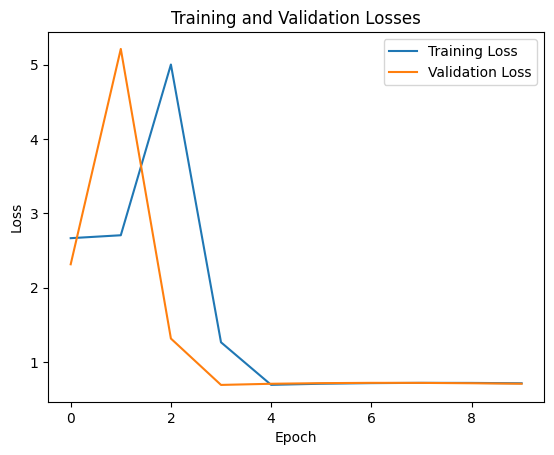

F1 Score: 0.6667, Precision: 0.5000, Recall: 1.0000, Accuracy: 0.5000
ROC AUC: 0.5000
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=256, Dropout Rate=0.7, Batch Size=16


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 3.6111, Validation Loss: 0.7127
Epoch [2/10], Training Loss: 0.7060, Validation Loss: 0.6945
Epoch [3/10], Training Loss: 0.6944, Validation Loss: 0.6964
Epoch [4/10], Training Loss: 0.6951, Validation Loss: 0.6932
Epoch [5/10], Training Loss: 0.6935, Validation Loss: 0.6937
Epoch [6/10], Training Loss: 0.6934, Validation Loss: 0.6932
Epoch [7/10], Training Loss: 0.6933, Validation Loss: 0.6932
Epoch [8/10], Training Loss: 0.6932, Validation Loss: 0.6932
Epoch [9/10], Training Loss: 0.6932, Validation Loss: 0.6931
Epoch [10/10], Training Loss: 0.6932, Validation Loss: 0.6931


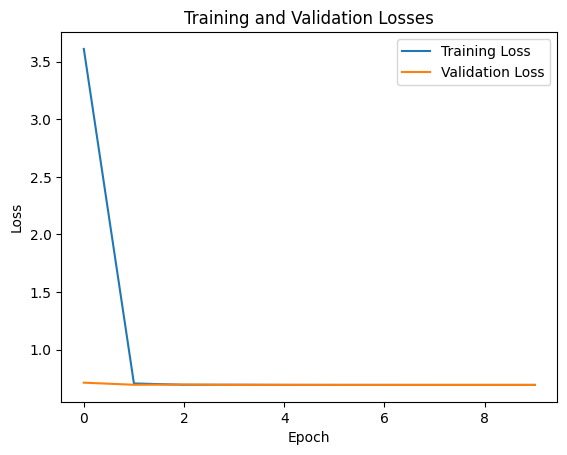

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


F1 Score: 0.0000, Precision: 0.0000, Recall: 0.0000, Accuracy: 0.5000
ROC AUC: 0.5000
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=256, Dropout Rate=0.7, Batch Size=32
Epoch [1/10], Training Loss: 6.5972, Validation Loss: 1.9338
Epoch [2/10], Training Loss: 1.0873, Validation Loss: 0.7213
Epoch [3/10], Training Loss: 0.6993, Validation Loss: 0.6920
Epoch [4/10], Training Loss: 0.6936, Validation Loss: 0.6953
Epoch [5/10], Training Loss: 0.6952, Validation Loss: 0.6947
Epoch [6/10], Training Loss: 0.6942, Validation Loss: 0.6936
Epoch [7/10], Training Loss: 0.6933, Validation Loss: 0.6930
Epoch [8/10], Training Loss: 0.6929, Validation Loss: 0.6926
Epoch [9/10], Training Loss: 0.6924, Validation Loss: 0.6919
Epoch [10/10], Training Loss: 0.6916, Validation Loss: 0.6909


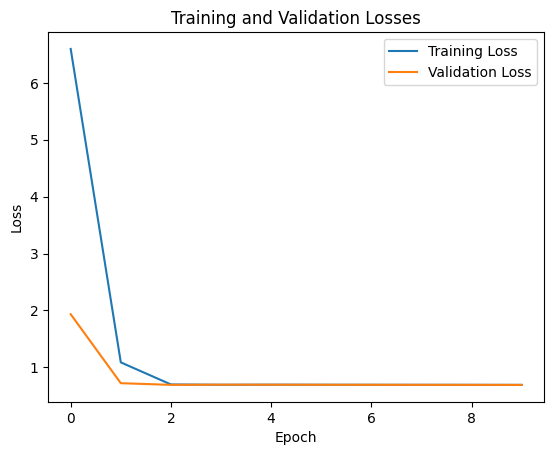

F1 Score: 0.6124, Precision: 0.5981, Recall: 0.6275, Accuracy: 0.6029
ROC AUC: 0.6351
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=256, Dropout Rate=0.7, Batch Size=64


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 8.1850, Validation Loss: 2.7662
Epoch [2/10], Training Loss: 1.9961, Validation Loss: 0.9176
Epoch [3/10], Training Loss: 0.8022, Validation Loss: 0.7856
Epoch [4/10], Training Loss: 0.7474, Validation Loss: 0.6947
Epoch [5/10], Training Loss: 0.6940, Validation Loss: 0.6936
Epoch [6/10], Training Loss: 0.6937, Validation Loss: 0.6941
Epoch [7/10], Training Loss: 0.6941, Validation Loss: 0.6942
Epoch [8/10], Training Loss: 0.6942, Validation Loss: 0.6941
Epoch [9/10], Training Loss: 0.6941, Validation Loss: 0.6939
Epoch [10/10], Training Loss: 0.6939, Validation Loss: 0.6936


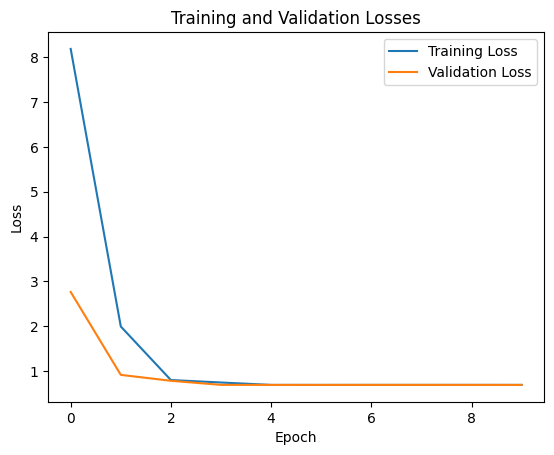

F1 Score: 0.6667, Precision: 0.5000, Recall: 1.0000, Accuracy: 0.5000
ROC AUC: 0.3304
Testing hyperparameters: Learning Rate=0.1, Hidden Dimension=256, Dropout Rate=0.7, Batch Size=128


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10], Training Loss: 3.2274, Validation Loss: 4.3217
Epoch [2/10], Training Loss: 3.9862, Validation Loss: 0.6968
Epoch [3/10], Training Loss: 0.6968, Validation Loss: 0.6916
Epoch [4/10], Training Loss: 0.6959, Validation Loss: 0.6943
Epoch [5/10], Training Loss: 0.6988, Validation Loss: 0.6980
Epoch [6/10], Training Loss: 0.7019, Validation Loss: 0.6919
Epoch [7/10], Training Loss: 0.6957, Validation Loss: 0.6782
Epoch [8/10], Training Loss: 0.6857, Validation Loss: 0.6670
Epoch [9/10], Training Loss: 0.6842, Validation Loss: 0.6572
Epoch [10/10], Training Loss: 0.6705, Validation Loss: 0.6458


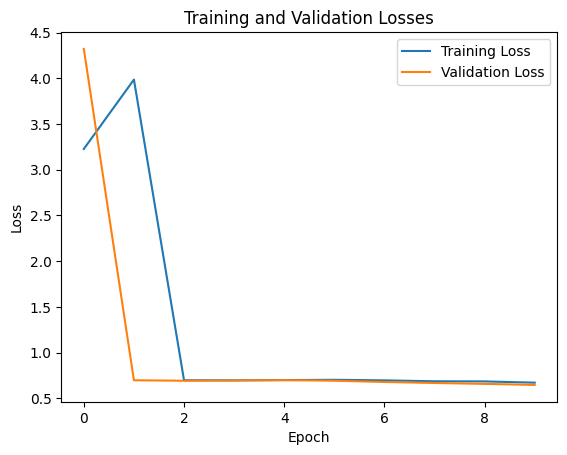

F1 Score: 0.6696, Precision: 0.6148, Recall: 0.7353, Accuracy: 0.6373
ROC AUC: 0.6669
Best accuracy: 0.7843137254901961
Best hyperparameters: {'Learning Rate': 0.01, 'Hidden Dimension': 128, 'Dropout Rate': 0.5, 'Batch Size': 16}


In [ ]:
import os
import pandas as pd
import torch
from torch_geometric.data import Dataset, Data, DataLoader
from torch_geometric.nn import GCNConv
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
import itertools
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(240424)

# Define the GCN model
class GCNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x, edge_index):
        x = x.unsqueeze(0) if x.dim() == 1 else x
        edge_index = edge_index.to(torch.long)
        x = F.relu(self.conv1(x, edge_index))
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Define hyperparameters options
learning_rates = [0.01, 0.02, 0.1]
hidden_dims = [64, 128, 256]
dropout_rates = [0.3, 0.5, 0.7]
batch_sizes = [16, 32, 64, 128]

# Define a function for grid search
def grid_search(learning_rates, hidden_dims, dropout_rates, batch_sizes):
    best_accuracy = 0
    best_hyperparameters = {}

    for lr, hd, dr, bs in itertools.product(learning_rates, hidden_dims, dropout_rates, batch_sizes):
        print(f"Testing hyperparameters: Learning Rate={lr}, Hidden Dimension={hd}, Dropout Rate={dr}, Batch Size={bs}")

        # Split the dataset into train and test sets
        train_size = int(0.85 * len(dataset))
        test_size = len(dataset) - train_size
        generator = torch.Generator().manual_seed(240424)
        train_dataset, test_dataset = random_split(dataset, [train_size, test_size], generator=generator)
        train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=bs, shuffle=False)

        # Initialize the model
        model = GCNModel(input_dim=dataset.num_node_features, hidden_dim=hd, output_dim=2)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)

        # Train the model
        train(model, train_loader, test_loader, optimizer, criterion, epochs=10)

        # Evaluate the model
        accuracy = evaluate(model, test_loader)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparameters = {'Learning Rate': lr, 'Hidden Dimension': hd, 'Dropout Rate': dr, 'Batch Size': bs}

    return best_accuracy, best_hyperparameters

# Train the model
def train(model, train_loader, val_loader, optimizer, criterion, epochs):
    train_losses = []
    val_losses = []

    for epoch in range(1, epochs + 1):
        model.train()
        running_train_loss = 0.0

        for data in train_loader:
            optimizer.zero_grad()
            out = model(data.x, data.edge_index)
            loss = criterion(out, data.y)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * data.num_graphs

        train_loss = running_train_loss / len(train_loader.dataset)
        train_losses.append(train_loss)

        # Evaluate on validation set
        model.eval()
        val_loss = 0.0
        for data in val_loader:
            out = model(data.x, data.edge_index)
            loss = criterion(out, data.y)
            val_loss += loss.item() * data.num_graphs

        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)

        print(f'Epoch [{epoch}/{epochs}], Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    # Visualize the training and validation losses
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Losses')
    plt.legend()
    plt.show()

# Evaluation function
def evaluate(model, loader):
    model.eval()
    predictions = []
    targets = []
    softmax_outputs = []

    with torch.no_grad():
        for data in loader:
            out = model(data.x, data.edge_index)
            pred = out.argmax(dim=1)
            softmax_outputs.extend(out[:, 1].tolist())
            predictions.extend(pred.tolist())
            targets.extend(data.y.tolist())

    # Calculate metrics
    f1 = f1_score(targets, predictions)
    precision = precision_score(targets, predictions)
    recall = recall_score(targets, predictions)
    accuracy = accuracy_score(targets, predictions)
    roc_auc = roc_auc_score(targets, softmax_outputs)

    print(f'F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Accuracy: {accuracy:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')

    return accuracy  # Return accuracy value

# Perform grid search
best_accuracy, best_hyperparameters = grid_search(learning_rates, hidden_dims, dropout_rates, batch_sizes)

print(f"Best accuracy: {best_accuracy}")
print("Best hyperparameters:", best_hyperparameters)


In [ ]:
import random
import torch
from torch.utils.data import Subset, DataLoader
from torch.nn import functional as F
import torch.nn as nn
from torch_geometric.data import Data, Dataset, Batch
from torch_geometric.nn import GCNConv
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the GCN model
class GCNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Define the stratified_split function
def stratified_split(dataset: torch.utils.data.Dataset, fraction: float, random_state: int = None):
    # Set random seed for reproducibility
    if random_state is not None:
        random.seed(random_state)
        torch.manual_seed(random_state)

    # Group indices by class
    indices_per_class = defaultdict(list)
    for index in range(len(dataset)):
        label = dataset[index].y
        indices_per_class[label].append(index)

    first_set_indices = []
    second_set_indices = []

    # Stratified sampling
    for label, indices in indices_per_class.items():
        # Calculate number of samples for the first subset (train)
        n_samples = round(len(indices) * fraction)

        # Randomly shuffle the indices list
        random.shuffle(indices)

        # Split the indices
        first_set_indices.extend(indices[:n_samples])
        second_set_indices.extend(indices[n_samples:])

    # Create subsets for train and test data
    first_set_inputs = Subset(dataset, first_set_indices)
    second_set_inputs = Subset(dataset, second_set_indices)

    return first_set_inputs, second_set_inputs

# Custom collate function for DataLoader
def collate_fn(batch):
    return Batch.from_data_list(batch)

# Function to train the model
def train(model, train_loader, val_loader, optimizer, criterion, epochs):
    model.train()
    train_losses = []
    val_losses = []

    for epoch in range(1, epochs + 1):
        epoch_train_loss = 0.0
        epoch_val_loss = 0.0

        # Training
        for data in train_loader:
            optimizer.zero_grad()
            out = model(data)
            loss = criterion(out, data.y)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()

        epoch_train_loss /= len(train_loader)
        train_losses.append(epoch_train_loss)

        # Validation
        model.eval()
        with torch.no_grad():
            for data in val_loader:
                out = model(data)
                loss = criterion(out, data.y)
                epoch_val_loss += loss.item()

        epoch_val_loss /= len(val_loader)
        val_losses.append(epoch_val_loss)

        print(f"Epoch {epoch}: Train Loss: {epoch_train_loss:.4f}, Validation Loss: {epoch_val_loss:.4f}")

    # Plot the training and validation losses
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Losses')
    plt.legend()
    plt.show()

# Function to evaluate the model
def evaluate(model, test_loader):
    model.eval()
    predictions = []
    targets = []
    softmax_outputs = []

    # Collect predictions and targets
    with torch.no_grad():
        for data in test_loader:
            if data.num_nodes > 0:  # Check if data is not empty
                out = model(data)
                pred = out.argmax(dim=1)
                softmax_outputs.extend(out[:, 1].tolist())
                predictions.extend(pred.tolist())
                targets.extend(data.y.tolist())

    if len(predictions) == 0 or len(targets) == 0:
        print("Warning: No samples to evaluate. Check test_loader.")
        return

    # Calculate metrics
    f1 = f1_score(targets, predictions, zero_division=0)
    precision = precision_score(targets, predictions, zero_division=0)
    recall = recall_score(targets, predictions, zero_division=0)
    accuracy = accuracy_score(targets, predictions)
    roc_auc = roc_auc_score(targets, softmax_outputs)

    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(targets, softmax_outputs)
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.show()

# Load your dataset here
# Assuming `dataset` is an instance of your custom PyTorch Geometric Dataset subclass

# Specify the fraction for training data
train_fraction = 0.85

# Specify the random seed for reproducibility
random_seed = 42

# Split the dataset using stratified split function
train_data, test_data = stratified_split(dataset, train_fraction, random_seed)

# Specify the fraction for validation data
val_fraction = 0.05

# Split the training data to get validation data
train_data, val_data = stratified_split(train_data.dataset, val_fraction, random_seed)

# Create DataLoader objects for train, validation, and test sets using the custom collate function
train_loader = DataLoader(train_data, batch_size=16, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False, collate_fn=collate_fn)

# Initialize the model
model = GCNModel(input_dim=dataset.num_node_features, hidden_dim=128, output_dim=2)

# Specify loss function and optimizer
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
train(model, train_loader, val_loader, optimizer, criterion, epochs=10)

# Evaluate the model
evaluate(model, test_loader)


ValueError: num_samples should be a positive integer value, but got num_samples=0

In [ ]:
import random
import torch
from torch.utils.data import Subset, DataLoader
from torch.nn import functional as F
import torch.nn as nn
from torch_geometric.data import Data, Dataset, Batch
from torch_geometric.nn import GCNConv
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the GCN model
class GCNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Define the stratified_split function
def stratified_split(dataset: torch.utils.data.Dataset, fraction: float, random_state: int = None):
    # Set random seed for reproducibility
    if random_state is not None:
        random.seed(random_state)
        torch.manual_seed(random_state)

    # Group indices by class
    indices_per_class = defaultdict(list)
    for index in range(len(dataset)):
        label = dataset[index].y
        indices_per_class[label].append(index)

    first_set_indices = []
    second_set_indices = []

    # Stratified sampling
    for label, indices in indices_per_class.items():
        # Calculate number of samples for the first subset (train)
        n_samples = round(len(indices) * fraction)

        # Randomly shuffle the indices list
        random.shuffle(indices)

        # Split the indices
        first_set_indices.extend(indices[:n_samples])
        second_set_indices.extend(indices[n_samples:])

    # Create subsets for train and test data
    first_set_inputs = Subset(dataset, first_set_indices)
    second_set_inputs = Subset(dataset, second_set_indices)

    return first_set_inputs, second_set_inputs

# Custom collate function for DataLoader
def collate_fn(batch):
    return Batch.from_data_list(batch)

# Function to train the model
def train(model, train_loader, optimizer, criterion, epochs):
    model.train()
    train_losses = []

    for epoch in range(1, epochs + 1):
        epoch_loss = 0.0
        for data in train_loader:
            optimizer.zero_grad()
            out = model(data)
            loss = criterion(out, data.y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        epoch_loss /= len(train_loader)
        train_losses.append(epoch_loss)
        print(f"Epoch {epoch}: Train Loss: {epoch_loss:.4f}")

    # Plot the training loss
    plt.plot(train_losses)
    plt.xlabel("Epoch")
    plt.ylabel("Train Loss")
    plt.show()

# Function to evaluate the model
def evaluate(model, test_loader):
    model.eval()
    predictions = []
    targets = []
    softmax_outputs = []

    # Collect predictions and targets
    with torch.no_grad():
        for data in test_loader:
            if data.num_nodes > 0:  # Check if data is not empty
                out = model(data)
                pred = out.argmax(dim=1)
                softmax_outputs.extend(out[:, 1].tolist())
                predictions.extend(pred.tolist())
                targets.extend(data.y.tolist())

    if len(predictions) == 0 or len(targets) == 0:
        print("Warning: No samples to evaluate. Check test_loader.")
        return

    # Calculate metrics
    f1 = f1_score(targets, predictions, zero_division=0)
    precision = precision_score(targets, predictions, zero_division=0)
    recall = recall_score(targets, predictions, zero_division=0)
    accuracy = accuracy_score(targets, predictions)
    roc_auc = roc_auc_score(targets, softmax_outputs)

    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(targets, softmax_outputs)
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.show()

# Load your dataset here
# Assuming `dataset` is an instance of your custom PyTorch Geometric Dataset subclass

# Specify the fraction for training data
train_fraction = 0.90

# Specify the random seed for reproducibility
random_seed = 42

# Split the dataset using stratified split function
train_data, test_data = stratified_split(dataset, train_fraction, random_seed)

# Create DataLoader objects for train and test sets using the custom collate function
train_loader = DataLoader(train_data, batch_size=16, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False, collate_fn=collate_fn)

# Initialize the model
model = GCNModel(input_dim=dataset.num_node_features, hidden_dim=128, output_dim=2)

# Specify loss function and optimizer
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
train(model, train_loader, optimizer, criterion, epochs=10)

# Evaluate the model
evaluate(model, test_loader)


In [ ]:
import os
import pandas as pd
import torch
from torch_geometric.data import Dataset, Data, DataLoader
from torch_geometric.nn import GCNConv
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
import matplotlib.pyplot as plt

# Import GNNExplainer
from torch_geometric.explain import Explainer, GNNExplainer

# Define the GCN model
class GCNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = x.unsqueeze(0) if x.dim() == 1 else x
        edge_index = edge_index.to(torch.long)
        x = F.relu(self.conv1(x, edge_index))
        x = self.dropout(x)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

# Create DataLoader objects for train and test sets
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the model
model = GCNModel(input_dim=dataset.num_node_features, hidden_dim=128, output_dim=2)
# Specify loss function and optimizer
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
def train(model, train_loader, val_loader, optimizer, criterion, epochs):
    train_losses = []
    val_losses = []

    for epoch in range(1, epochs + 1):
        model.train()
        running_train_loss = 0.0

        for data in train_loader:
            optimizer.zero_grad()
            out = model(data)
            loss = criterion(out, data.y)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * data.num_graphs

        train_loss = running_train_loss / len(train_loader.dataset)
        train_losses.append(train_loss)

        # Evaluate on validation set
        model.eval()
        val_loss = 0.0
        for data in val_loader:
            out = model(data)
            loss = criterion(out, data.y)
            val_loss += loss.item() * data.num_graphs

        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)

        print(f'Epoch [{epoch}/{epochs}], Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    # Visualize the training and validation losses
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Losses')
    plt.legend()
    plt.show()

    # Initialize GNNExplainer
    topk = 10
    node_index = 10
    explainer = Explainer(
        model=model,
        algorithm=GNNExplainer(epochs=200),
        explanation_type='model',
        node_mask_type='attributes',
        edge_mask_type='object',
        model_config=dict(
            mode='multiclass_classification',
            task_level='node',
            return_type='log_probs'
        ),
        threshold_config=dict(threshold_type='topk', value=topk)
    )

    # Get explanations for the nodes in the test set
    for data in test_loader:
        explanation = explainer(data.x, data.edge_index)

        # Visualize feature importance
        path_features = "feature_importance.png"
        explanation.visualize_feature_importance(path_features, top_k=10)

        # Visualize graph importance
        path_graph = "graph_importance.png"
        explanation.visualize_graph(path_graph)

# Evaluation function
def evaluate(model, loader):
    model.eval()
    predictions = []
    targets = []
    softmax_outputs = []

    with torch.no_grad():
        for data in loader:
            out = model(data)
            pred = out.argmax(dim=1)
            softmax_outputs.extend(out[:, 1].tolist())
            predictions.extend(pred.tolist())
            targets.extend(data.y.tolist())

    # Calculate metrics
    f1 = f1_score(targets, predictions)
    precision = precision_score(targets, predictions)
    recall = recall_score(targets, predictions)
    accuracy = accuracy_score(targets, predictions)
    roc_auc = roc_auc_score(targets, softmax_outputs)

    print(f'F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Accuracy: {accuracy:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')

    # Optional: Plot ROC curve
    fpr, tpr, thresholds = roc_curve(targets, softmax_outputs)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

# Train the model
train(model, train_loader, test_loader, optimizer, criterion, epochs=10)

# Evaluate the model
evaluate(model, test_loader)


In [ ]:
# Custom stratified split function
def stratified_split(dataset, fraction, random_state=None):
    if random_state:
        random.seed(random_state)

    # Create a mapping of class indices
    class_indices = defaultdict(list)
    for idx, data in enumerate(dataset):
        class_indices[data.y.item()].append(idx)

    # Calculate the number of samples for each class
    train_indices, test_indices = [], []
    for label, indices in class_indices.items():
        num_train_samples = int(fraction * len(indices))
        random.shuffle(indices)
        train_indices.extend(indices[:num_train_samples])
        test_indices.extend(indices[num_train_samples:])

    # Create Subset datasets for train and test
    train_subset = Subset(dataset, train_indices)
    test_subset = Subset(dataset, test_indices)

    return train_subset, test_subset

##**Models**

##**GCN**

<ipython-input-18-c150c20f073b>:172: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(os.path.join(self.processed_dir, 'data.pt'))


Epoch [1/30], Training Loss: 0.6532, Validation Loss: 0.6911, Training Accuracy: 0.6112, Validation Accuracy: 0.5301
Epoch [2/30], Training Loss: 0.5241, Validation Loss: 0.6687, Training Accuracy: 0.7469, Validation Accuracy: 0.6265
Epoch [3/30], Training Loss: 0.4646, Validation Loss: 0.6444, Training Accuracy: 0.7939, Validation Accuracy: 0.6265
Epoch [4/30], Training Loss: 0.4039, Validation Loss: 0.6353, Training Accuracy: 0.8242, Validation Accuracy: 0.6145
Epoch [5/30], Training Loss: 0.3400, Validation Loss: 0.6239, Training Accuracy: 0.8723, Validation Accuracy: 0.6145
Epoch [6/30], Training Loss: 0.2770, Validation Loss: 0.5907, Training Accuracy: 0.9065, Validation Accuracy: 0.6506
Epoch [7/30], Training Loss: 0.2162, Validation Loss: 0.6459, Training Accuracy: 0.9288, Validation Accuracy: 0.6386
Epoch [8/30], Training Loss: 0.1675, Validation Loss: 0.6266, Training Accuracy: 0.9540, Validation Accuracy: 0.6506
Epoch [9/30], Training Loss: 0.1202, Validation Loss: 0.6637, Tr

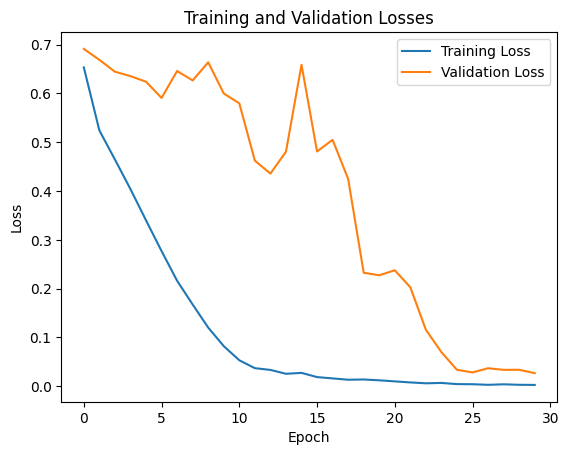

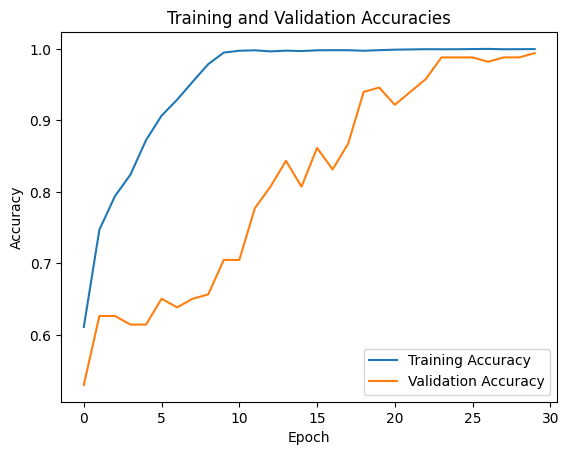

F1 Score: 0.9921, Precision: 1.0000, Recall: 0.9844, Accuracy: 0.9940
ROC AUC: 0.9997


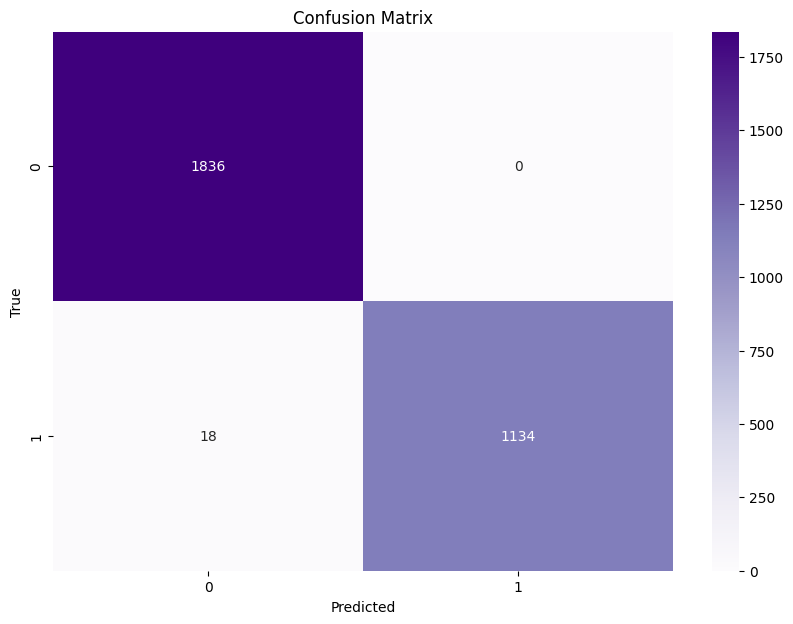

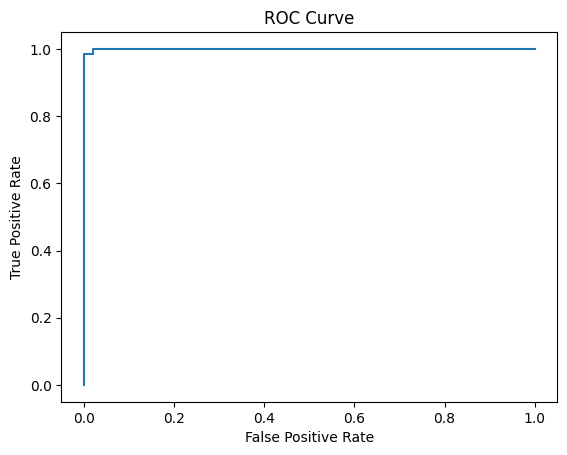

In [ ]:
import os
import pandas as pd
import torch
from torch_geometric.data import Dataset, Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from torch.nn import CrossEntropyLoss
from torch.optim import AdamW
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Set random seed for reproducibility
seed = 5824
torch.manual_seed(seed)

# Define the GCN model
class GCNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.bn2 = nn.BatchNorm1d(hidden_dim)
        self.dropout = nn.Dropout(p=0.01)
        self.linear = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, edge_index, batch):
        # First GCN layer with batch normalization
        x = F.relu(self.conv1(x, edge_index))
        x = self.bn1(x)
        x = self.dropout(x)

        # Second GCN layer with batch normalization
        x = F.relu(self.conv2(x, edge_index))
        x = self.bn2(x)
        x = self.dropout(x)

        # Final linear layer
        x = self.linear(x)
        return F.log_softmax(x, dim=1)

# Function to train the model
def train(model, train_loader, val_loader, optimizer, criterion, epochs):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(1, epochs + 1):
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for data in train_loader:
            optimizer.zero_grad()
            out = model(data.x, data.edge_index, data.batch)
            loss = criterion(out, data.y)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * data.num_graphs

            preds = out.argmax(dim=1)
            correct_train += preds.eq(data.y).sum().item()
            total_train += data.y.size(0)

        train_loss = running_train_loss / len(train_loader.dataset)
        train_accuracy = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for data in val_loader:
                out = model(data.x, data.edge_index, data.batch)
                loss = criterion(out, data.y)
                val_loss += loss.item() * data.num_graphs

                preds = out.argmax(dim=1)
                correct_val += preds.eq(data.y).sum().item()
                total_val += data.y.size(0)

        val_loss /= len(val_loader.dataset)
        val_accuracy = correct_val / total_val
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch}/{epochs}], Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    # Plotting Losses
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Losses')
    plt.legend()
    plt.show()

    # Plotting Accuracies
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracies')
    plt.legend()
    plt.show()

    return model



# Evaluation function
def evaluate(model, loader):
    model.eval()
    predictions = []
    targets = []
    softmax_outputs = []

    with torch.no_grad():
        for data in loader:
            out = model(data.x, data.edge_index, data.batch)
            pred = out.argmax(dim=1)
            softmax_outputs.extend(F.softmax(out, dim=1)[:, 1].tolist())
            predictions.extend(pred.tolist())
            targets.extend(data.y.tolist())

    # Calculate metrics
    f1 = f1_score(targets, predictions)
    precision = precision_score(targets, predictions)
    recall = recall_score(targets, predictions)
    accuracy = accuracy_score(targets, predictions)
    roc_auc = roc_auc_score(targets, softmax_outputs)

    print(f'F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Accuracy: {accuracy:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')

    # Confusion matrix
    cm = confusion_matrix(targets, predictions)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(targets, softmax_outputs)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()




# Calculate lengths of each split
num_data = len(dataset)
train_ratio = 0.80
val_ratio = 0.1
test_ratio = 0.1

train_size = int(train_ratio * num_data)
val_size = int(val_ratio * num_data)
test_size = num_data - (train_size + val_size)

# Split the dataset into training, validation, and test sets
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size],generator=torch.Generator().manual_seed(seed))

# Create DataLoader objects for train, validation, and test sets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model
model = GCNModel(input_dim=dataset.num_node_features, hidden_dim=64, output_dim=2)

# Specify loss function and optimizer
criterion = nn.NLLLoss()
# criterion = CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
trained_model = train(model, train_loader, val_loader, optimizer, criterion, epochs=30)

# Evaluate the model on the test set
evaluate(trained_model, test_loader)



===== Fold 1/5 =====
Epoch [1/300] | Train Acc: 0.3810 | Val Acc: 0.4074
Epoch [2/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [3/300] | Train Acc: 0.6381 | Val Acc: 0.5556
Epoch [4/300] | Train Acc: 0.6095 | Val Acc: 0.6667
Epoch [5/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [6/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [7/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [8/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [9/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [10/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [11/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [12/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [13/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [14/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [15/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [16/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [17/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [18/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [19/300] | Train Acc: 0.628

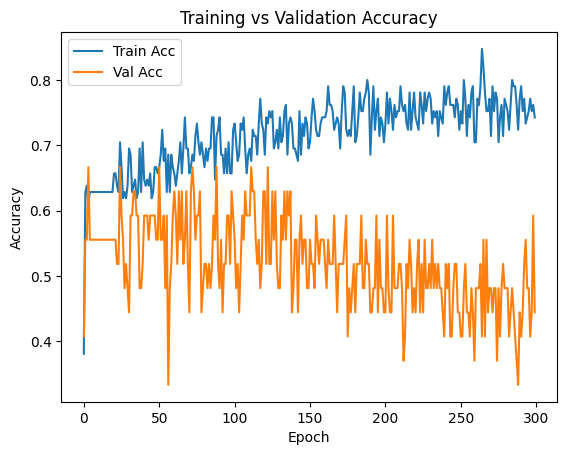

Test Results -> Acc: 0.5588, F1: 0.5393, Precision: 0.5393, Recall: 0.5403, AUC: 0.5055


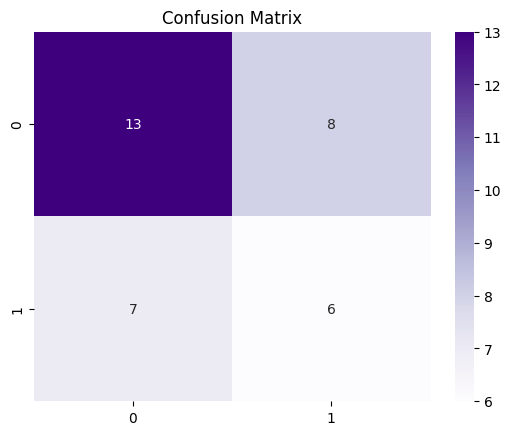


===== Fold 2/5 =====
Epoch [1/300] | Train Acc: 0.5333 | Val Acc: 0.7407
Epoch [2/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [3/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [4/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [5/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [6/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [7/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [8/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [9/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [10/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [11/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [12/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [13/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [14/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [15/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [16/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [17/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [18/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [19/300] | Train Acc: 0.628

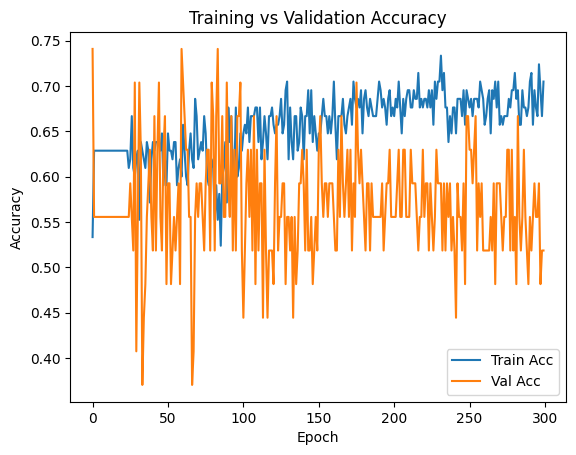

Test Results -> Acc: 0.6765, F1: 0.6621, Precision: 0.6607, Recall: 0.6648, AUC: 0.7766


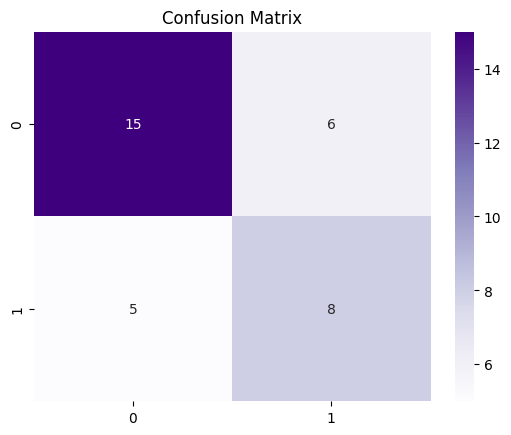


===== Fold 3/5 =====
Epoch [1/300] | Train Acc: 0.5524 | Val Acc: 0.4815
Epoch [2/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [3/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [4/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [5/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [6/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [7/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [8/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [9/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [10/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [11/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [12/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [13/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [14/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [15/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [16/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [17/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [18/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [19/300] | Train Acc: 0.628

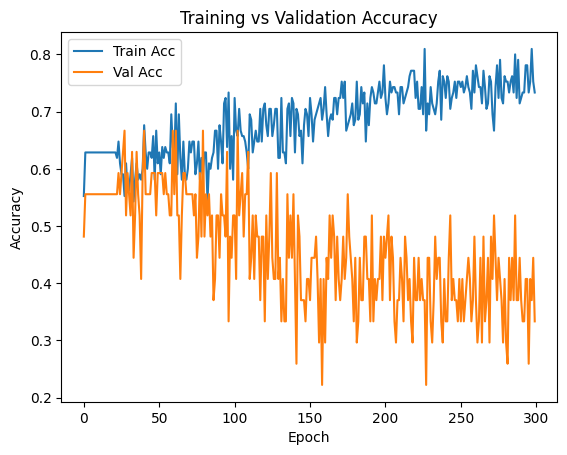

Test Results -> Acc: 0.6176, F1: 0.5888, Precision: 0.5909, Recall: 0.5879, AUC: 0.6081


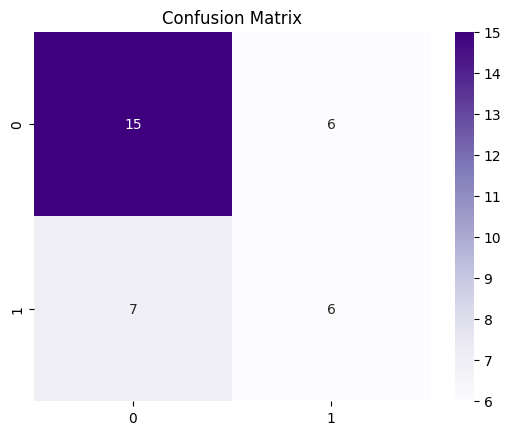


===== Fold 4/5 =====
Epoch [1/300] | Train Acc: 0.4381 | Val Acc: 0.4074
Epoch [2/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [3/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [4/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [5/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [6/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [7/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [8/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [9/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [10/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [11/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [12/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [13/300] | Train Acc: 0.6286 | Val Acc: 0.5556
Epoch [14/300] | Train Acc: 0.6286 | Val Acc: 0.6667
Epoch [15/300] | Train Acc: 0.6476 | Val Acc: 0.5926
Epoch [16/300] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [17/300] | Train Acc: 0.6667 | Val Acc: 0.5556
Epoch [18/300] | Train Acc: 0.6476 | Val Acc: 0.5185
Epoch [19/300] | Train Acc: 0.676

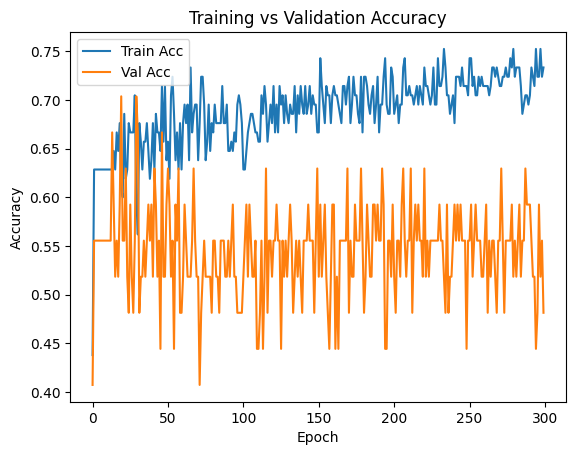

Test Results -> Acc: 0.6176, F1: 0.6146, Precision: 0.6250, Recall: 0.6319, AUC: 0.6850


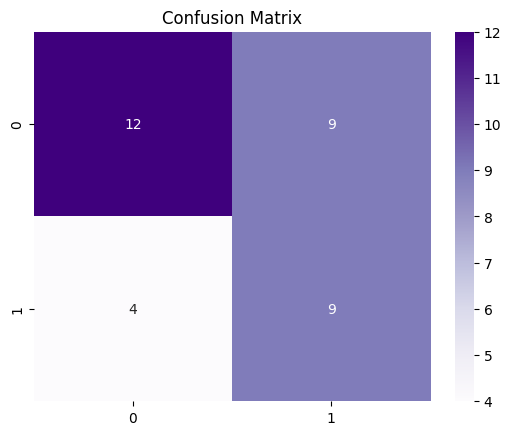


===== Fold 5/5 =====
Epoch [1/300] | Train Acc: 0.4722 | Val Acc: 0.5357
Epoch [2/300] | Train Acc: 0.6389 | Val Acc: 0.5357
Epoch [3/300] | Train Acc: 0.6389 | Val Acc: 0.5357
Epoch [4/300] | Train Acc: 0.6481 | Val Acc: 0.5357
Epoch [5/300] | Train Acc: 0.6389 | Val Acc: 0.5357
Epoch [6/300] | Train Acc: 0.6389 | Val Acc: 0.5357
Epoch [7/300] | Train Acc: 0.6389 | Val Acc: 0.5357
Epoch [8/300] | Train Acc: 0.6389 | Val Acc: 0.5357
Epoch [9/300] | Train Acc: 0.6389 | Val Acc: 0.5357
Epoch [10/300] | Train Acc: 0.6389 | Val Acc: 0.5357
Epoch [11/300] | Train Acc: 0.6389 | Val Acc: 0.5357
Epoch [12/300] | Train Acc: 0.6389 | Val Acc: 0.5357
Epoch [13/300] | Train Acc: 0.6389 | Val Acc: 0.5357
Epoch [14/300] | Train Acc: 0.6389 | Val Acc: 0.5357
Epoch [15/300] | Train Acc: 0.6389 | Val Acc: 0.5357
Epoch [16/300] | Train Acc: 0.6389 | Val Acc: 0.5357
Epoch [17/300] | Train Acc: 0.6389 | Val Acc: 0.5357
Epoch [18/300] | Train Acc: 0.6389 | Val Acc: 0.5357
Epoch [19/300] | Train Acc: 0.638

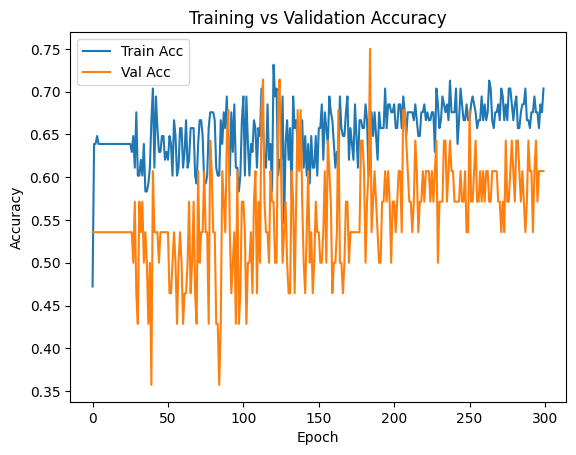

Test Results -> Acc: 0.6333, F1: 0.6229, Precision: 0.6222, Recall: 0.6250, AUC: 0.6528


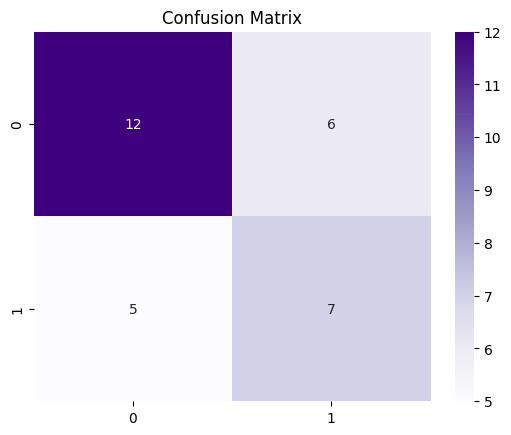


===== Cross Validation Results =====
Avg Accuracy:  0.6208
Avg F1:        0.6056
Avg Precision: 0.6076
Avg Recall:    0.6100
Avg AUC:       0.6456


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix
from torch_geometric.nn import GCNConv
from torch_geometric.datasets import Planetoid

# -----------------------------
# 3-Layer GCN Model
# -----------------------------
class GCNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout=0.5):
        super(GCNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.conv3 = GCNConv(hidden_dim, hidden_dim)
        self.dropout = nn.Dropout(p=dropout)
        self.linear = nn.Linear(hidden_dim, output_dim)

        # Weight initialization

        nn.init.xavier_uniform_(self.linear.weight)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.dropout(x)
        x = F.relu(self.conv2(x, edge_index))
        x = self.dropout(x)
        x = F.relu(self.conv3(x, edge_index))
        x = self.dropout(x)
        x = self.linear(x)
        return F.log_softmax(x, dim=1)

# -----------------------------
# Balanced K-Fold Split
# -----------------------------
def k_fold_node_split(data, k=5, seed=42):
    num_nodes = data.num_nodes
    labels = data.y
    splits = []

    class_indices = [torch.where(labels == c)[0] for c in labels.unique()]
    folds = [[] for _ in range(k)]
    g = torch.Generator().manual_seed(seed)

    for cls_idx in class_indices:
        cls_idx = cls_idx[torch.randperm(len(cls_idx), generator=g)]
        cls_folds = cls_idx.chunk(k)
        for i in range(k):
            folds[i].append(cls_folds[i])

    folds = [torch.cat(fold) for fold in folds]

    for i in range(k):
        test_idx = folds[i]
        train_val_idx = torch.cat([folds[j] for j in range(k) if j != i])
        split_point = int(0.8 * len(train_val_idx))
        train_idx = train_val_idx[:split_point]
        val_idx = train_val_idx[split_point:]

        train_mask = torch.zeros(num_nodes, dtype=torch.bool)
        val_mask = torch.zeros(num_nodes, dtype=torch.bool)
        test_mask = torch.zeros(num_nodes, dtype=torch.bool)
        train_mask[train_idx] = True
        val_mask[val_idx] = True
        test_mask[test_idx] = True

        splits.append((train_mask, val_mask, test_mask))

    return splits

# -----------------------------
# Training
# -----------------------------
def train(model, data, optimizer, criterion, train_mask, val_mask, epochs, scheduler=None):
    train_accs, val_accs = [], []

    for epoch in range(1, epochs + 1):
        model.train()
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)
        loss = criterion(out[train_mask], data.y[train_mask])
        loss.backward()
        optimizer.step()
        if scheduler:
            scheduler.step()

        train_pred = out[train_mask].argmax(dim=1)
        train_acc = train_pred.eq(data.y[train_mask]).sum().item() / train_mask.sum().item()
        train_accs.append(train_acc)

        model.eval()
        with torch.no_grad():
            val_pred = out[val_mask].argmax(dim=1)
            val_acc = val_pred.eq(data.y[val_mask]).sum().item() / val_mask.sum().item()
        val_accs.append(val_acc)

        print(f"Epoch [{epoch}/{epochs}] | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    plt.plot(train_accs, label="Train Acc")
    plt.plot(val_accs, label="Val Acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Training vs Validation Accuracy")
    plt.show()

    return model

# -----------------------------
# Evaluation
# -----------------------------
def evaluate(model, data, mask):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        preds = out[mask].argmax(dim=1).cpu().numpy()
        probs = F.softmax(out[mask], dim=1)[:, 1].cpu().numpy()
        targets = data.y[mask].cpu().numpy()

    f1 = f1_score(targets, preds, average="macro")
    precision = precision_score(targets, preds, average="macro")
    recall = recall_score(targets, preds, average="macro")
    accuracy = accuracy_score(targets, preds)
    try:
        roc_auc = roc_auc_score(targets, probs, multi_class="ovr")
    except:
        roc_auc = 0.0

    print(f"Test Results -> Acc: {accuracy:.4f}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, AUC: {roc_auc:.4f}")

    cm = confusion_matrix(targets, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
    plt.title("Confusion Matrix")
    plt.show()

    return accuracy, f1, precision, recall, roc_auc

# -----------------------------
# Run 5-Fold Cross Validation
# -----------------------------
def run_node_classification(data, k=5, epochs=300, hidden_dim=256, lr=0.01):
    data.x = F.normalize(data.x, p=1, dim=1)
    splits = k_fold_node_split(data, k, seed=seed)

    all_acc, all_f1, all_prec, all_rec, all_auc = [], [], [], [], []

    for fold, (train_mask, val_mask, test_mask) in enumerate(splits):
        print(f"\n===== Fold {fold+1}/{k} =====")
        model = GCNModel(data.num_node_features, hidden_dim, data.y.max().item() + 1, dropout=0.5)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-4)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.7)
        criterion = nn.NLLLoss()

        trained_model = train(model, data, optimizer, criterion, train_mask, val_mask, epochs, scheduler)
        acc, f1, prec, rec, auc = evaluate(trained_model, data, test_mask)

        all_acc.append(acc)
        all_f1.append(f1)
        all_prec.append(prec)
        all_rec.append(rec)
        all_auc.append(auc)

    print("\n===== Cross Validation Results =====")
    print(f"Avg Accuracy:  {sum(all_acc)/k:.4f}")
    print(f"Avg F1:        {sum(all_f1)/k:.4f}")
    print(f"Avg Precision: {sum(all_prec)/k:.4f}")
    print(f"Avg Recall:    {sum(all_rec)/k:.4f}")
    print(f"Avg AUC:       {sum(all_auc)/k:.4f}")

# -----------------------------
# Example usage (Cora dataset)
# -----------------------------
if __name__ == "__main__":

    data = dataset[0]
    run_node_classification(data, k=5, epochs=300, hidden_dim=256, lr=0.01)


##**Graph Attention network**

<ipython-input-18-c150c20f073b>:172: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(os.path.join(self.processed_dir, 'data.pt'))


Epoch [1/30], Training Loss: 0.9222, Validation Loss: 0.7140, Training Accuracy: 0.5662, Validation Accuracy: 0.4277
Epoch [2/30], Training Loss: 0.5438, Validation Loss: 0.6971, Training Accuracy: 0.7346, Validation Accuracy: 0.4940
Epoch [3/30], Training Loss: 0.4015, Validation Loss: 0.6966, Training Accuracy: 0.8176, Validation Accuracy: 0.5000
Epoch [4/30], Training Loss: 0.2866, Validation Loss: 0.6515, Training Accuracy: 0.8926, Validation Accuracy: 0.6084
Epoch [5/30], Training Loss: 0.2039, Validation Loss: 0.5824, Training Accuracy: 0.9356, Validation Accuracy: 0.6627
Epoch [6/30], Training Loss: 0.1678, Validation Loss: 0.5167, Training Accuracy: 0.9400, Validation Accuracy: 0.7530
Epoch [7/30], Training Loss: 0.1189, Validation Loss: 0.4908, Training Accuracy: 0.9571, Validation Accuracy: 0.7530
Epoch [8/30], Training Loss: 0.0845, Validation Loss: 0.4497, Training Accuracy: 0.9780, Validation Accuracy: 0.7711
Epoch [9/30], Training Loss: 0.0635, Validation Loss: 0.3723, Tr

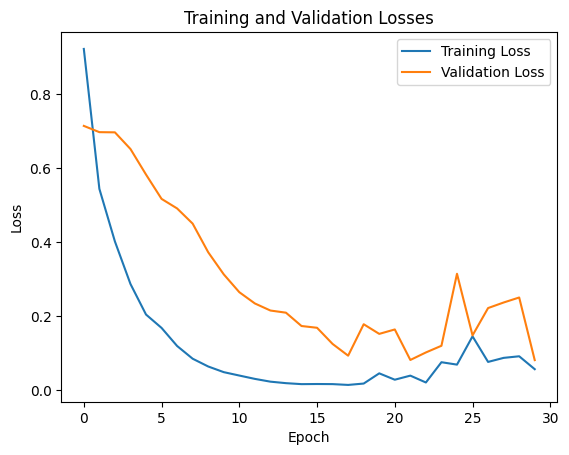

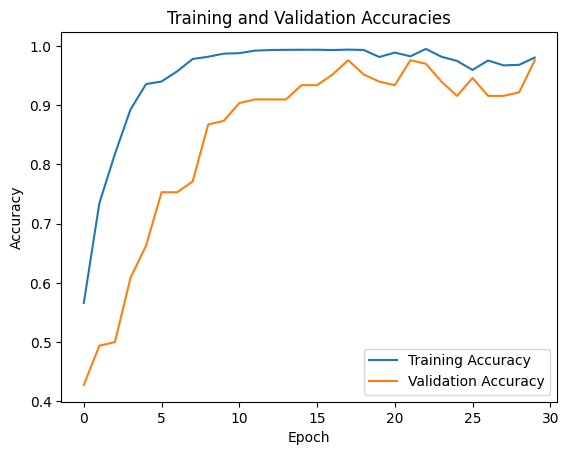

F1 Score: 0.9683, Precision: 0.9839, Recall: 0.9531, Accuracy: 0.9759
ROC AUC: 0.9959


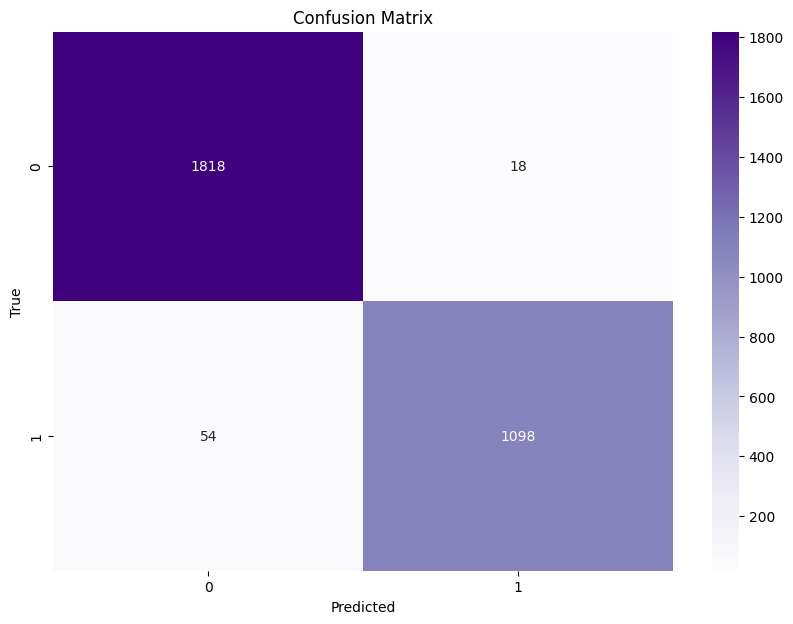

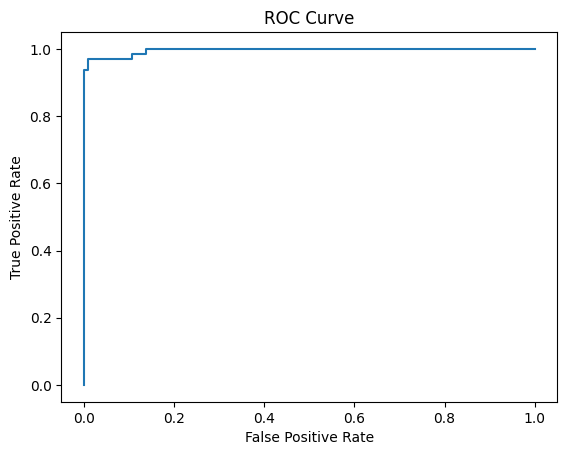

In [ ]:
import os
import pandas as pd
import torch
from torch_geometric.data import Dataset, Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GATConv
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from torch.nn import CrossEntropyLoss
from torch.optim import AdamW

# Set random seed for reproducibility
seed = 5824
torch.manual_seed(seed)

# Define the GAT model
class GATModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, heads=1):
        super(GATModel, self).__init__()
        self.conv1 = GATConv(input_dim, hidden_dim, heads=heads)
        self.bn1 = nn.BatchNorm1d(hidden_dim * heads)
        self.conv2 = GATConv(hidden_dim * heads, hidden_dim, heads=heads)
        self.bn2 = nn.BatchNorm1d(hidden_dim * heads)
        self.dropout = nn.Dropout(p=0.01)
        self.linear = nn.Linear(hidden_dim * heads, output_dim)

    def forward(self, x, edge_index, batch):
        # First GAT layer with batch normalization
        x = F.relu(self.conv1(x, edge_index))
        x = self.bn1(x)
        x = self.dropout(x)

        # Second GAT layer with batch normalization
        x = F.relu(self.conv2(x, edge_index))
        x = self.bn2(x)
        x = self.dropout(x)

        # Final linear layer
        x = self.linear(x)
        return F.log_softmax(x, dim=1)

# Function to train the model
def train(model, train_loader, val_loader, optimizer, criterion, epochs):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(1, epochs + 1):
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for data in train_loader:
            optimizer.zero_grad()
            out = model(data.x, data.edge_index, data.batch)
            loss = criterion(out, data.y)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * data.num_graphs

            preds = out.argmax(dim=1)
            correct_train += preds.eq(data.y).sum().item()
            total_train += data.y.size(0)

        train_loss = running_train_loss / len(train_loader.dataset)
        train_accuracy = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for data in val_loader:
                out = model(data.x, data.edge_index, data.batch)
                loss = criterion(out, data.y)
                val_loss += loss.item() * data.num_graphs

                preds = out.argmax(dim=1)
                correct_val += preds.eq(data.y).sum().item()
                total_val += data.y.size(0)

        val_loss /= len(val_loader.dataset)
        val_accuracy = correct_val / total_val
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch}/{epochs}], Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    # Plotting Losses
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Losses')
    plt.legend()
    plt.show()

    # Plotting Accuracies
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracies')
    plt.legend()
    plt.show()

    return model

# Evaluation function
def evaluate(model, loader):
    model.eval()
    predictions = []
    targets = []
    softmax_outputs = []

    with torch.no_grad():
        for data in loader:
            out = model(data.x, data.edge_index, data.batch)
            pred = out.argmax(dim=1)
            softmax_outputs.extend(out[:, 1].tolist())
            predictions.extend(pred.tolist())
            targets.extend(data.y.tolist())

    # Calculate metrics
    f1 = f1_score(targets, predictions)
    precision = precision_score(targets, predictions)
    recall = recall_score(targets, predictions)
    accuracy = accuracy_score(targets, predictions)
    roc_auc = roc_auc_score(targets, softmax_outputs)

    print(f'F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Accuracy: {accuracy:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')


    # Confusion matrix
    cm = confusion_matrix(targets, predictions)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(targets, softmax_outputs)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    # return predictions, targets, softmax_outputs


# Calculate lengths of each split
num_data = len(dataset)
train_ratio = 0.80
val_ratio = 0.1
test_ratio = 0.1

train_size = int(train_ratio * num_data)
val_size = int(val_ratio * num_data)
test_size = num_data - train_size - val_size

# Split the dataset into training, validation, and test sets
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size],generator=torch.Generator().manual_seed(seed))

# Create DataLoader objects for train, validation, and test sets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model
model = GATModel(input_dim=dataset.num_node_features, hidden_dim=64, output_dim=2, heads=4)

# Specify loss function and optimizer
criterion = nn.NLLLoss()
# criterion = CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
trained_model = train(model, train_loader, val_loader, optimizer, criterion, epochs=30)

# Evaluate the model on the test set
evaluate(trained_model, test_loader)


##**Graph Transformer**

<ipython-input-18-c150c20f073b>:172: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(os.path.join(self.processed_dir, 'data.pt'))


Epoch [1/30], Training Loss: 1.0857, Validation Loss: 0.6303, Training Accuracy: 0.5558, Validation Accuracy: 0.6446
Epoch [2/30], Training Loss: 0.4573, Validation Loss: 0.6404, Training Accuracy: 0.8176, Validation Accuracy: 0.6687
Epoch [3/30], Training Loss: 0.2647, Validation Loss: 0.5332, Training Accuracy: 0.9058, Validation Accuracy: 0.8193
Epoch [4/30], Training Loss: 0.1151, Validation Loss: 0.4541, Training Accuracy: 0.9817, Validation Accuracy: 0.8313
Epoch [5/30], Training Loss: 0.0421, Validation Loss: 0.3746, Training Accuracy: 0.9937, Validation Accuracy: 0.8675
Epoch [6/30], Training Loss: 0.0137, Validation Loss: 0.3190, Training Accuracy: 0.9999, Validation Accuracy: 0.8614
Epoch [7/30], Training Loss: 0.0053, Validation Loss: 0.2639, Training Accuracy: 1.0000, Validation Accuracy: 0.9157
Epoch [8/30], Training Loss: 0.0026, Validation Loss: 0.2284, Training Accuracy: 0.9999, Validation Accuracy: 0.9157
Epoch [9/30], Training Loss: 0.0012, Validation Loss: 0.2028, Tr

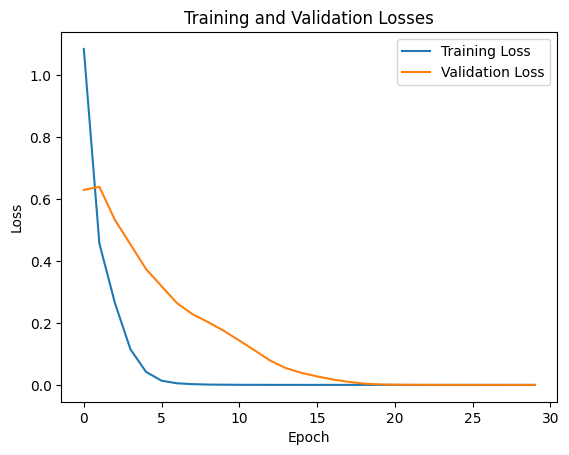

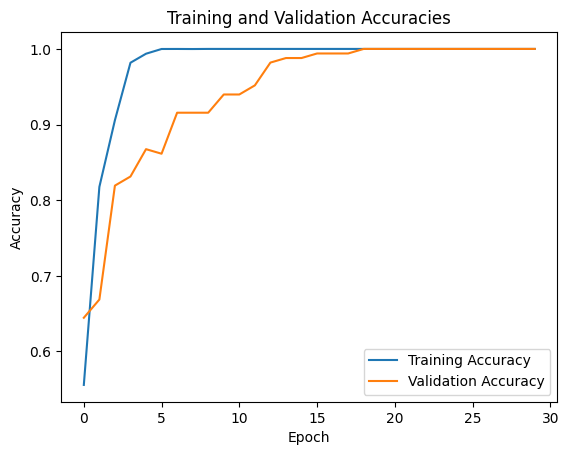

F1 Score: 1.0000, Precision: 1.0000, Recall: 1.0000, Accuracy: 1.0000
ROC AUC: 1.0000


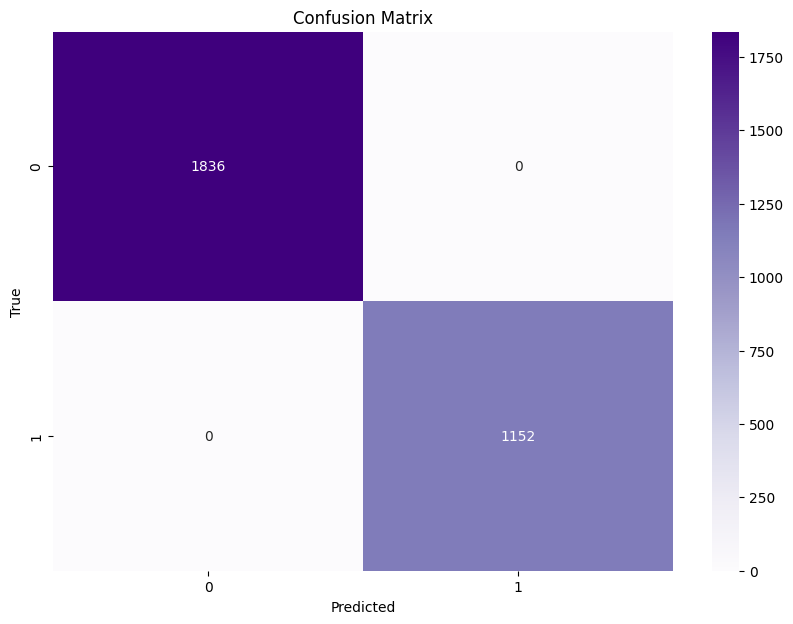

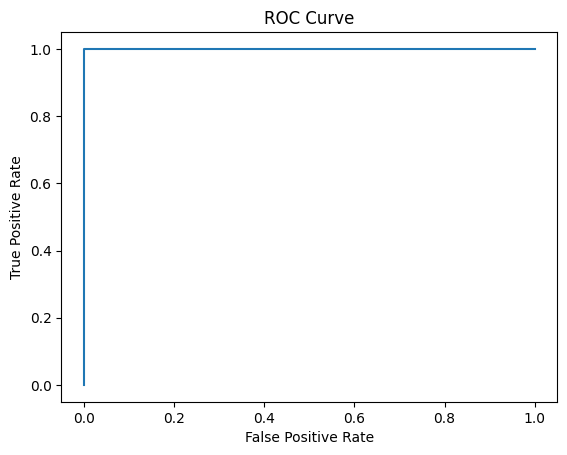

In [ ]:
import os
import pandas as pd
import torch
from torch_geometric.data import Dataset, Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import TransformerConv
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from torch.nn import CrossEntropyLoss
from torch.optim import AdamW

# Set random seed for reproducibility
seed = 5824
torch.manual_seed(seed)

# Define the Graph Transformer model
class GraphTransformerModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, heads=1):
        super(GraphTransformerModel, self).__init__()
        self.conv1 = TransformerConv(input_dim, hidden_dim, heads=heads)
        self.bn1 = nn.BatchNorm1d(hidden_dim * heads)
        self.conv2 = TransformerConv(hidden_dim * heads, hidden_dim, heads=heads)
        self.bn2 = nn.BatchNorm1d(hidden_dim * heads)
        self.dropout = nn.Dropout(p=0.01)
        self.linear = nn.Linear(hidden_dim * heads, output_dim)

    def forward(self, x, edge_index, batch):
        # First Transformer layer with batch normalization
        x = F.relu(self.conv1(x, edge_index))
        x = self.bn1(x)
        x = self.dropout(x)

        # Second Transformer layer with batch normalization
        x = F.relu(self.conv2(x, edge_index))
        x = self.bn2(x)
        x = self.dropout(x)

        # Final linear layer
        x = self.linear(x)
        return F.log_softmax(x, dim=1)

# Function to train the model
def train(model, train_loader, val_loader, optimizer, criterion, epochs):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(1, epochs + 1):
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for data in train_loader:
            optimizer.zero_grad()
            out = model(data.x, data.edge_index, data.batch)
            loss = criterion(out, data.y)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * data.num_graphs

            preds = out.argmax(dim=1)
            correct_train += preds.eq(data.y).sum().item()
            total_train += data.y.size(0)

        train_loss = running_train_loss / len(train_loader.dataset)
        train_accuracy = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for data in val_loader:
                out = model(data.x, data.edge_index, data.batch)
                loss = criterion(out, data.y)
                val_loss += loss.item() * data.num_graphs

                preds = out.argmax(dim=1)
                correct_val += preds.eq(data.y).sum().item()
                total_val += data.y.size(0)

        val_loss /= len(val_loader.dataset)
        val_accuracy = correct_val / total_val
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch}/{epochs}], Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    # Plotting Losses
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Losses')
    plt.legend()
    plt.show()

    # Plotting Accuracies
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracies')
    plt.legend()
    plt.show()

    return model

# Evaluation function
def evaluate(model, loader):
    model.eval()
    predictions = []
    targets = []
    softmax_outputs = []

    with torch.no_grad():
        for data in loader:
            out = model(data.x, data.edge_index, data.batch)
            pred = out.argmax(dim=1)
            softmax_outputs.extend(out[:, 1].tolist())
            predictions.extend(pred.tolist())
            targets.extend(data.y.tolist())

    # Calculate metrics
    f1 = f1_score(targets, predictions)
    precision = precision_score(targets, predictions)
    recall = recall_score(targets, predictions)
    accuracy = accuracy_score(targets, predictions)
    roc_auc = roc_auc_score(targets, softmax_outputs)

    print(f'F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Accuracy: {accuracy:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')

    # Confusion matrix
    cm = confusion_matrix(targets, predictions)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(targets, softmax_outputs)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    # return predictions, targets, softmax_outputs


# Calculate lengths of each split
num_data = len(dataset)
train_ratio = 0.80
val_ratio = 0.1
test_ratio = 0.1

train_size = int(train_ratio * num_data)
val_size = int(val_ratio * num_data)
test_size = num_data - train_size - val_size

# Split the dataset into training, validation, and test sets
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size],generator=torch.Generator().manual_seed(seed))

# Create DataLoader objects for train, validation, and test sets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model
model = GraphTransformerModel(input_dim=dataset.num_node_features, hidden_dim=64, output_dim=2, heads=4)

# Specify loss function and optimizer
criterion = nn.NLLLoss()
# criterion = CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
trained_model = train(model, train_loader, val_loader, optimizer, criterion, epochs=30)

# Evaluate the model on the test set
evaluate(trained_model, test_loader)



===== Fold 1/5 =====
Epoch 020 | Train Acc: 0.6762 | Val Acc: 0.6296
Epoch 040 | Train Acc: 0.8762 | Val Acc: 0.6667
Epoch 060 | Train Acc: 0.9905 | Val Acc: 0.5556
Epoch 080 | Train Acc: 1.0000 | Val Acc: 0.5926
Epoch 100 | Train Acc: 0.9714 | Val Acc: 0.5926
Epoch 120 | Train Acc: 0.9905 | Val Acc: 0.5926
Epoch 140 | Train Acc: 0.9524 | Val Acc: 0.5185
Epoch 160 | Train Acc: 0.9905 | Val Acc: 0.4815
Epoch 180 | Train Acc: 1.0000 | Val Acc: 0.5556
Epoch 200 | Train Acc: 1.0000 | Val Acc: 0.5926
Test -> Acc: 0.5000, F1: 0.4623, Precision: 0.4634, Recall: 0.4621, AUC: 0.5398


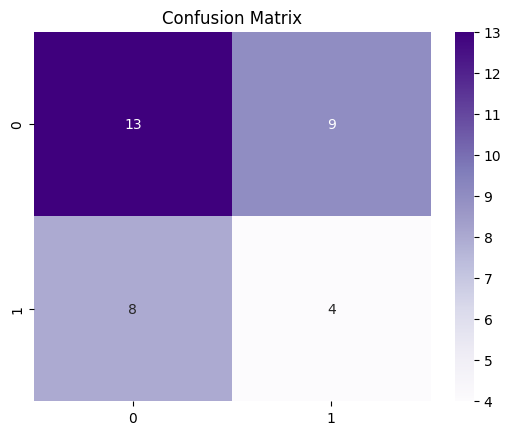


===== Fold 2/5 =====
Epoch 020 | Train Acc: 0.6952 | Val Acc: 0.4815
Epoch 040 | Train Acc: 0.8381 | Val Acc: 0.6667
Epoch 060 | Train Acc: 0.9143 | Val Acc: 0.6296
Epoch 080 | Train Acc: 0.9810 | Val Acc: 0.5926
Epoch 100 | Train Acc: 0.9905 | Val Acc: 0.7037
Epoch 120 | Train Acc: 0.9905 | Val Acc: 0.5185
Epoch 140 | Train Acc: 0.9905 | Val Acc: 0.6296
Epoch 160 | Train Acc: 1.0000 | Val Acc: 0.5926
Epoch 180 | Train Acc: 0.9905 | Val Acc: 0.5556
Epoch 200 | Train Acc: 1.0000 | Val Acc: 0.5926
Test -> Acc: 0.5294, F1: 0.5143, Precision: 0.5208, Recall: 0.5227, AUC: 0.6136


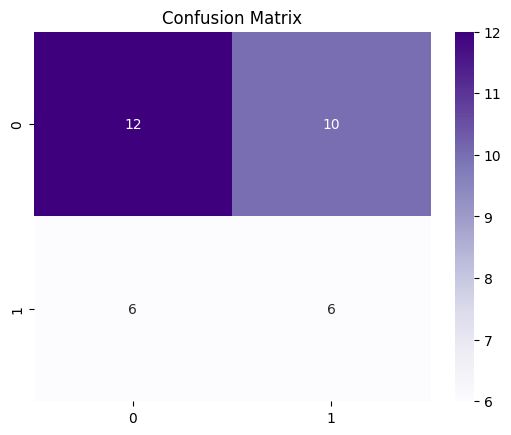


===== Fold 3/5 =====
Epoch 020 | Train Acc: 0.6571 | Val Acc: 0.4815
Epoch 040 | Train Acc: 0.9333 | Val Acc: 0.6296
Epoch 060 | Train Acc: 0.9810 | Val Acc: 0.5556
Epoch 080 | Train Acc: 0.9905 | Val Acc: 0.4815
Epoch 100 | Train Acc: 0.9810 | Val Acc: 0.5185
Epoch 120 | Train Acc: 0.9905 | Val Acc: 0.4815
Epoch 140 | Train Acc: 0.9905 | Val Acc: 0.5556
Epoch 160 | Train Acc: 0.9810 | Val Acc: 0.5556
Epoch 180 | Train Acc: 1.0000 | Val Acc: 0.5185
Epoch 200 | Train Acc: 0.9810 | Val Acc: 0.5556
Test -> Acc: 0.5882, F1: 0.5296, Precision: 0.5422, Recall: 0.5348, AUC: 0.5714


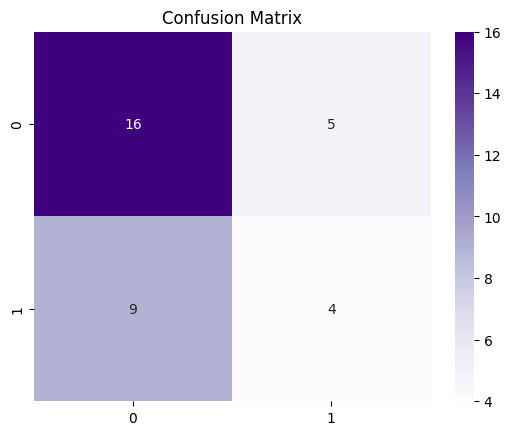


===== Fold 4/5 =====
Epoch 020 | Train Acc: 0.6476 | Val Acc: 0.5185
Epoch 040 | Train Acc: 0.9524 | Val Acc: 0.6296
Epoch 060 | Train Acc: 0.9429 | Val Acc: 0.6296
Epoch 080 | Train Acc: 0.9905 | Val Acc: 0.5926
Epoch 100 | Train Acc: 0.9714 | Val Acc: 0.5926
Epoch 120 | Train Acc: 0.9905 | Val Acc: 0.5185
Epoch 140 | Train Acc: 0.9905 | Val Acc: 0.5556
Epoch 160 | Train Acc: 1.0000 | Val Acc: 0.5556
Epoch 180 | Train Acc: 1.0000 | Val Acc: 0.6296
Epoch 200 | Train Acc: 1.0000 | Val Acc: 0.5556
Test -> Acc: 0.4706, F1: 0.4396, Precision: 0.4394, Recall: 0.4429, AUC: 0.4964


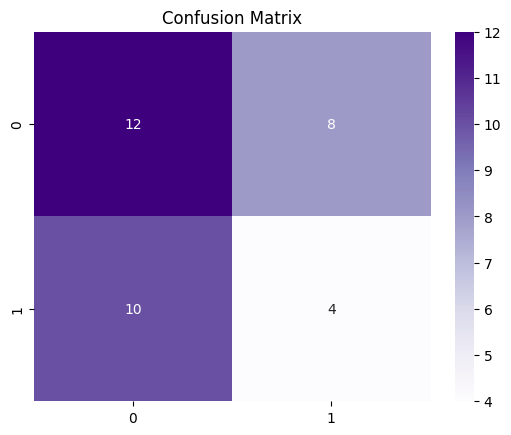


===== Fold 5/5 =====
Epoch 020 | Train Acc: 0.6574 | Val Acc: 0.5357
Epoch 040 | Train Acc: 0.8426 | Val Acc: 0.5000
Epoch 060 | Train Acc: 0.9722 | Val Acc: 0.5000
Epoch 080 | Train Acc: 0.9722 | Val Acc: 0.5714
Epoch 100 | Train Acc: 0.9907 | Val Acc: 0.4643
Epoch 120 | Train Acc: 0.9722 | Val Acc: 0.4286
Epoch 140 | Train Acc: 1.0000 | Val Acc: 0.5714
Epoch 160 | Train Acc: 1.0000 | Val Acc: 0.4643
Epoch 180 | Train Acc: 0.9907 | Val Acc: 0.5357
Epoch 200 | Train Acc: 1.0000 | Val Acc: 0.5357
Test -> Acc: 0.6667, F1: 0.6411, Precision: 0.6667, Recall: 0.6425, AUC: 0.6109


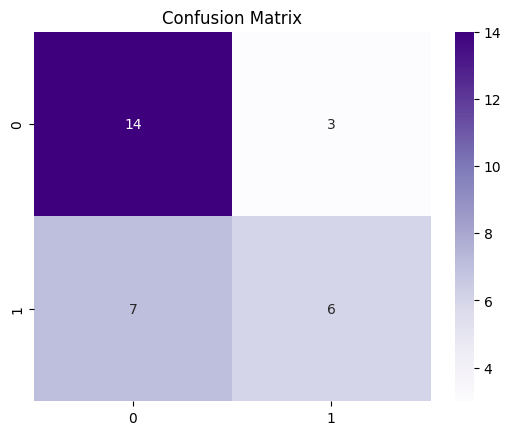


===== Cross Validation Results =====
ACC   : 0.5510
F1    : 0.5174
PREC  : 0.5265
REC   : 0.5210
AUC   : 0.5664


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, roc_curve
from torch_geometric.nn import TransformerConv

# -----------------------------
# Set random seed
# -----------------------------
seed = 5824
torch.manual_seed(seed)

# -----------------------------
# Graph Transformer Model
# -----------------------------
class GraphTransformerNodeClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, heads=4, dropout=0.3):
        super(GraphTransformerNodeClassifier, self).__init__()
        self.conv1 = TransformerConv(input_dim, hidden_dim, heads=heads)
        self.conv2 = TransformerConv(hidden_dim * heads, hidden_dim, heads=heads)
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(hidden_dim * heads, output_dim)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.dropout(x)

        x = F.relu(self.conv2(x, edge_index))
        x = self.dropout(x)

        x = self.linear(x)
        return F.log_softmax(x, dim=1)

# -----------------------------
# K-Fold Split for Node Classification
# -----------------------------
def k_fold_node_split(data, k=5, seed=42):
    num_nodes = data.num_nodes
    indices = torch.randperm(num_nodes, generator=torch.Generator().manual_seed(seed))
    folds = indices.chunk(k)

    splits = []
    for i in range(k):
        test_idx = folds[i]
        train_val_idx = torch.cat([folds[j] for j in range(k) if j != i])

        # 80/20 train/val split
        split_point = int(0.8 * len(train_val_idx))
        train_idx = train_val_idx[:split_point]
        val_idx = train_val_idx[split_point:]

        train_mask = torch.zeros(num_nodes, dtype=torch.bool)
        val_mask = torch.zeros(num_nodes, dtype=torch.bool)
        test_mask = torch.zeros(num_nodes, dtype=torch.bool)

        train_mask[train_idx] = True
        val_mask[val_idx] = True
        test_mask[test_idx] = True

        splits.append((train_mask, val_mask, test_mask))

    return splits

# -----------------------------
# Training Loop
# -----------------------------
def train(model, data, optimizer, criterion, train_mask, val_mask, epochs=200):
    train_accs, val_accs = [], []

    for epoch in range(1, epochs + 1):
        model.train()
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)

        loss = criterion(out[train_mask], data.y[train_mask])
        loss.backward()
        optimizer.step()

        # Train accuracy
        preds = out[train_mask].argmax(dim=1)
        train_acc = preds.eq(data.y[train_mask]).sum().item() / train_mask.sum().item()
        train_accs.append(train_acc)

        # Validation
        model.eval()
        with torch.no_grad():
            out_val = model(data.x, data.edge_index)
            val_preds = out_val[val_mask].argmax(dim=1)
            val_acc = val_preds.eq(data.y[val_mask]).sum().item() / val_mask.sum().item()
        val_accs.append(val_acc)

        if epoch % 20 == 0:
            print(f"Epoch {epoch:03d} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    return model

# -----------------------------
# Evaluation
# -----------------------------
def evaluate(model, data, mask):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        preds = out[mask].argmax(dim=1).cpu().numpy()
        probs = F.softmax(out[mask], dim=1).cpu().numpy()
        targets = data.y[mask].cpu().numpy()

    f1 = f1_score(targets, preds, average="macro")
    precision = precision_score(targets, preds, average="macro")
    recall = recall_score(targets, preds, average="macro")
    accuracy = accuracy_score(targets, preds)

    # Handle binary vs multi-class ROC
    try:
        if probs.shape[1] == 2:
            roc_auc = roc_auc_score(targets, probs[:, 1])
        else:
            roc_auc = roc_auc_score(targets, probs, multi_class="ovr")
    except:
        roc_auc = 0.0

    print(f"Test -> Acc: {accuracy:.4f}, F1: {f1:.4f}, "
          f"Precision: {precision:.4f}, Recall: {recall:.4f}, AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(targets, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
    plt.title("Confusion Matrix")
    plt.show()

    return accuracy, f1, precision, recall, roc_auc

# -----------------------------
# Run K-Fold Validation
# -----------------------------
def run_k_fold(data, k=5, hidden_dim=64, epochs=200, lr=0.01):
    splits = k_fold_node_split(data, k, seed=seed)
    results = {"acc": [], "f1": [], "prec": [], "rec": [], "auc": []}

    for fold, (train_mask, val_mask, test_mask) in enumerate(splits):
        print(f"\n===== Fold {fold+1}/{k} =====")
        model = GraphTransformerNodeClassifier(
            input_dim=data.num_node_features,
            hidden_dim=hidden_dim,
            output_dim=data.y.max().item() + 1,
            heads=4,
            dropout=0.3
        )

        optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=5e-4)
        criterion = nn.NLLLoss()

        trained_model = train(model, data, optimizer, criterion, train_mask, val_mask, epochs)
        acc, f1, prec, rec, auc = evaluate(trained_model, data, test_mask)

        results["acc"].append(acc)
        results["f1"].append(f1)
        results["prec"].append(prec)
        results["rec"].append(rec)
        results["auc"].append(auc)

    print("\n===== Cross Validation Results =====")
    for metric, scores in results.items():
        print(f"{metric.upper():<6}: {sum(scores)/len(scores):.4f}")

# -----------------------------
# Example: Cora Dataset
# -----------------------------
if __name__ == "__main__":

    data = dataset[0]

    run_k_fold(data, k=5, hidden_dim=64, epochs=200, lr=0.01)


##**Graph SAGE**

<ipython-input-3-c150c20f073b>:172: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(os.path.join(self.processed_dir, 'data.pt'))


Epoch [1/30], Training Loss: 0.6538, Validation Loss: 0.6572, Training Accuracy: 0.5844, Validation Accuracy: 0.7590
Epoch [2/30], Training Loss: 0.3916, Validation Loss: 0.6036, Training Accuracy: 0.8332, Validation Accuracy: 0.7169
Epoch [3/30], Training Loss: 0.2349, Validation Loss: 0.5582, Training Accuracy: 0.9335, Validation Accuracy: 0.6446
Epoch [4/30], Training Loss: 0.1135, Validation Loss: 0.5182, Training Accuracy: 0.9880, Validation Accuracy: 0.6506
Epoch [5/30], Training Loss: 0.0504, Validation Loss: 0.5201, Training Accuracy: 0.9935, Validation Accuracy: 0.6566
Epoch [6/30], Training Loss: 0.0212, Validation Loss: 0.5530, Training Accuracy: 0.9988, Validation Accuracy: 0.6566
Epoch [7/30], Training Loss: 0.0106, Validation Loss: 0.5524, Training Accuracy: 0.9987, Validation Accuracy: 0.6807
Epoch [8/30], Training Loss: 0.0073, Validation Loss: 0.5161, Training Accuracy: 0.9990, Validation Accuracy: 0.7108
Epoch [9/30], Training Loss: 0.0056, Validation Loss: 0.4071, Tr

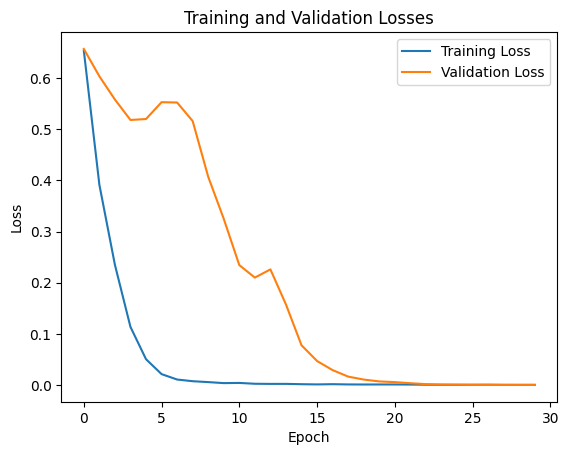

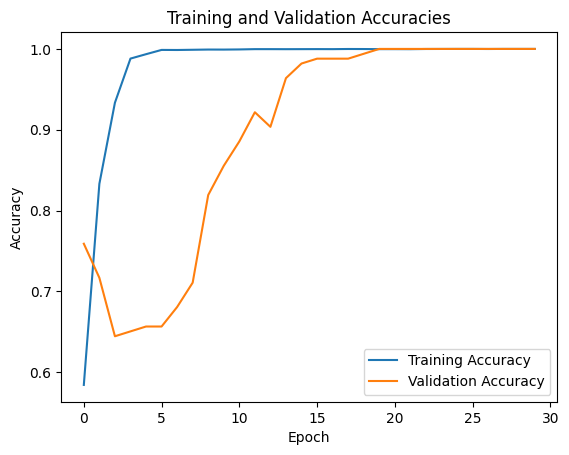

F1 Score: 1.0000, Precision: 1.0000, Recall: 1.0000, Accuracy: 1.0000
ROC AUC: 1.0000


NameError: name 'confusion_matrix' is not defined

In [ ]:
import os
import pandas as pd
import torch
from torch_geometric.data import Dataset, Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import SAGEConv
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from torch.nn import CrossEntropyLoss
from torch.optim import AdamW

# Set random seed for reproducibility
seed = 5824
torch.manual_seed(seed)

# Define the GraphSAGE model
class GraphSAGEModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphSAGEModel, self).__init__()
        self.conv1 = SAGEConv(input_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.conv2 = SAGEConv(hidden_dim, hidden_dim)
        self.bn2 = nn.BatchNorm1d(hidden_dim)
        self.dropout = nn.Dropout(p=0.01)
        self.linear = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, edge_index, batch):
        # First GraphSAGE layer with batch normalization
        x = F.relu(self.conv1(x, edge_index))
        x = self.bn1(x)
        x = self.dropout(x)

        # Second GraphSAGE layer with batch normalization
        x = F.relu(self.conv2(x, edge_index))
        x = self.bn2(x)
        x = self.dropout(x)

        # Final linear layer
        x = self.linear(x)
        return F.log_softmax(x, dim=1)

# Function to train the model
def train(model, train_loader, val_loader, optimizer, criterion, epochs):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(1, epochs + 1):
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for data in train_loader:
            optimizer.zero_grad()
            out = model(data.x, data.edge_index, data.batch)
            loss = criterion(out, data.y)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * data.num_graphs

            preds = out.argmax(dim=1)
            correct_train += preds.eq(data.y).sum().item()
            total_train += data.y.size(0)

        train_loss = running_train_loss / len(train_loader.dataset)
        train_accuracy = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for data in val_loader:
                out = model(data.x, data.edge_index, data.batch)
                loss = criterion(out, data.y)
                val_loss += loss.item() * data.num_graphs

                preds = out.argmax(dim=1)
                correct_val += preds.eq(data.y).sum().item()
                total_val += data.y.size(0)

        val_loss /= len(val_loader.dataset)
        val_accuracy = correct_val / total_val
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch}/{epochs}], Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    # Plotting Losses
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Losses')
    plt.legend()
    plt.show()

    # Plotting Accuracies
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracies')
    plt.legend()
    plt.show()

    return model

# Evaluation function
def evaluate(model, loader):
    model.eval()
    predictions = []
    targets = []
    softmax_outputs = []

    with torch.no_grad():
        for data in loader:
            out = model(data.x, data.edge_index, data.batch)
            pred = out.argmax(dim=1)
            softmax_outputs.extend(out[:, 1].tolist())
            predictions.extend(pred.tolist())
            targets.extend(data.y.tolist())

    # Calculate metrics
    f1 = f1_score(targets, predictions)
    precision = precision_score(targets, predictions)
    recall = recall_score(targets, predictions)
    accuracy = accuracy_score(targets, predictions)
    roc_auc = roc_auc_score(targets, softmax_outputs)

    print(f'F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Accuracy: {accuracy:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')

    # Confusion matrix
    cm = confusion_matrix(targets, predictions)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', annot_kws={"size": 20})
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(targets, softmax_outputs)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    # return predictions, targets, softmax_outputs


# Calculate lengths of each split
num_data = len(dataset)
train_ratio = 0.80
val_ratio = 0.1
test_ratio = 0.1

train_size = int(train_ratio * num_data)
val_size = int(val_ratio * num_data)
test_size = num_data - train_size - val_size

# Split the dataset into training, validation, and test sets
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size],generator=torch.Generator().manual_seed(seed))

# Create DataLoader objects for train, validation, and test sets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model
model = GraphSAGEModel(input_dim=dataset.num_node_features, hidden_dim=64, output_dim=2)

# Specify loss function and optimizer
criterion = nn.NLLLoss()
# criterion = CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
trained_model = train(model, train_loader, val_loader, optimizer, criterion, epochs=30)

# Evaluate the model on the test set
evaluate(trained_model, test_loader)



===== Fold 1/5 =====
Epoch [1/100] | Train Acc: 0.3714 | Val Acc: 0.4815
Epoch [2/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [3/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [4/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [5/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [6/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [7/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [8/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [9/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [10/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [11/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [12/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [13/100] | Train Acc: 0.6476 | Val Acc: 0.5185
Epoch [14/100] | Train Acc: 0.6381 | Val Acc: 0.5185
Epoch [15/100] | Train Acc: 0.6095 | Val Acc: 0.4444
Epoch [16/100] | Train Acc: 0.6286 | Val Acc: 0.4074
Epoch [17/100] | Train Acc: 0.6190 | Val Acc: 0.5185
Epoch [18/100] | Train Acc: 0.6095 | Val Acc: 0.5185
Epoch [19/100] | Train Acc: 0.676

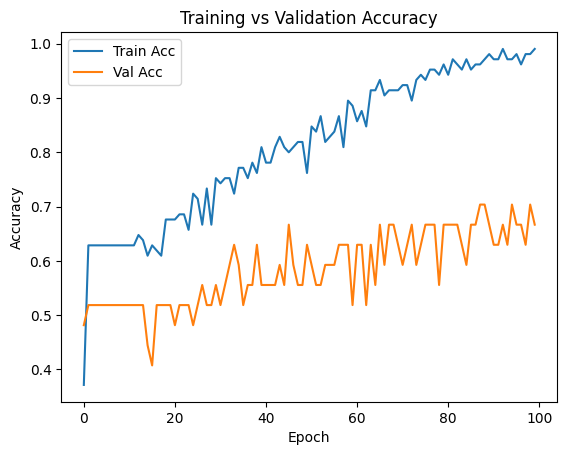

Test Results -> Acc: 0.5588, F1: 0.4444, Precision: 0.4000, Recall: 0.5000, AUC: 0.5000


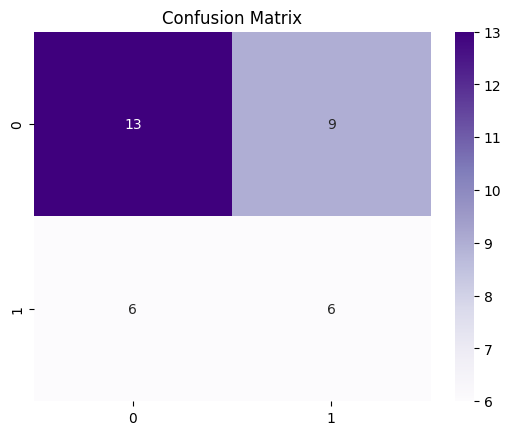

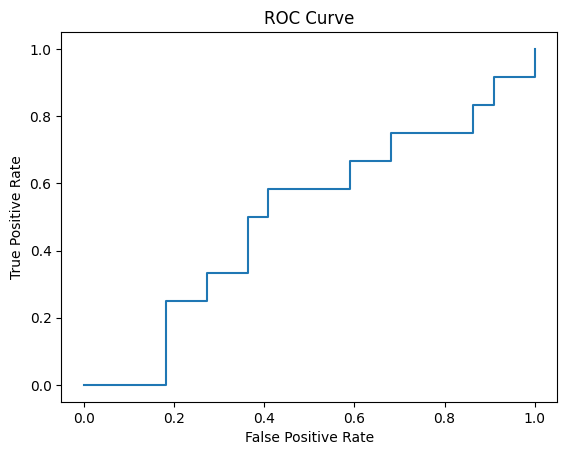


===== Fold 2/5 =====
Epoch [1/100] | Train Acc: 0.3714 | Val Acc: 0.4815
Epoch [2/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [3/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [4/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [5/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [6/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [7/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [8/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [9/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [10/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [11/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [12/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [13/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [14/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [15/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [16/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [17/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [18/100] | Train Acc: 0.6286 | Val Acc: 0.5185
Epoch [19/100] | Train Acc: 0.628

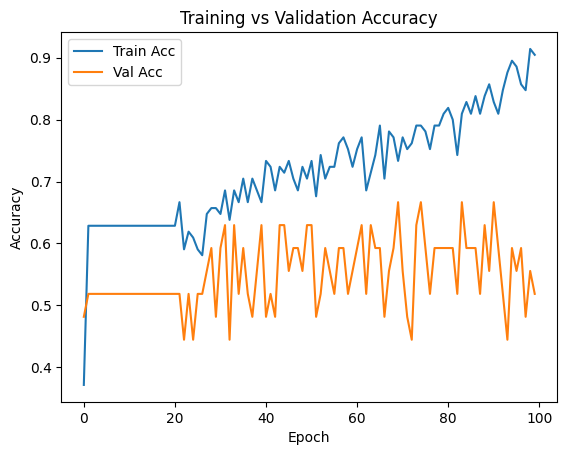

Test Results -> Acc: 0.5294, F1: 0.3333, Precision: 0.3333, Recall: 0.3333, AUC: 0.5644


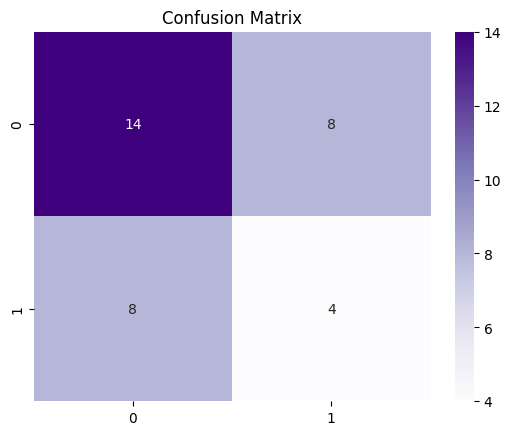

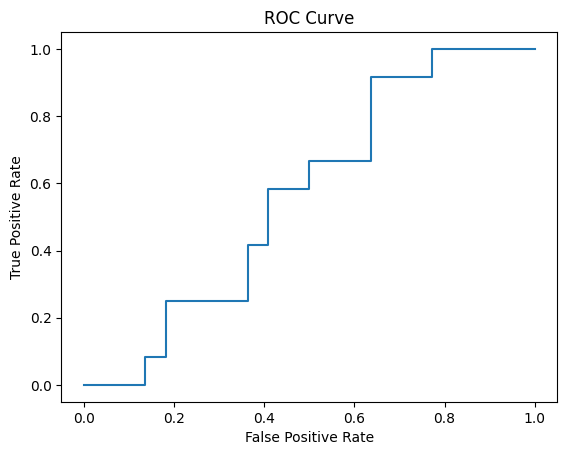


===== Fold 3/5 =====
Epoch [1/100] | Train Acc: 0.6381 | Val Acc: 0.5185
Epoch [2/100] | Train Acc: 0.6381 | Val Acc: 0.5185
Epoch [3/100] | Train Acc: 0.6381 | Val Acc: 0.5185
Epoch [4/100] | Train Acc: 0.6381 | Val Acc: 0.5185
Epoch [5/100] | Train Acc: 0.6381 | Val Acc: 0.5185
Epoch [6/100] | Train Acc: 0.6381 | Val Acc: 0.5185
Epoch [7/100] | Train Acc: 0.6381 | Val Acc: 0.5185
Epoch [8/100] | Train Acc: 0.6381 | Val Acc: 0.5185
Epoch [9/100] | Train Acc: 0.6381 | Val Acc: 0.5185
Epoch [10/100] | Train Acc: 0.6381 | Val Acc: 0.5185
Epoch [11/100] | Train Acc: 0.6381 | Val Acc: 0.5185
Epoch [12/100] | Train Acc: 0.6381 | Val Acc: 0.5185
Epoch [13/100] | Train Acc: 0.6381 | Val Acc: 0.5185
Epoch [14/100] | Train Acc: 0.6381 | Val Acc: 0.5185
Epoch [15/100] | Train Acc: 0.6381 | Val Acc: 0.5185
Epoch [16/100] | Train Acc: 0.6381 | Val Acc: 0.5185
Epoch [17/100] | Train Acc: 0.6381 | Val Acc: 0.5185
Epoch [18/100] | Train Acc: 0.6381 | Val Acc: 0.5185
Epoch [19/100] | Train Acc: 0.638

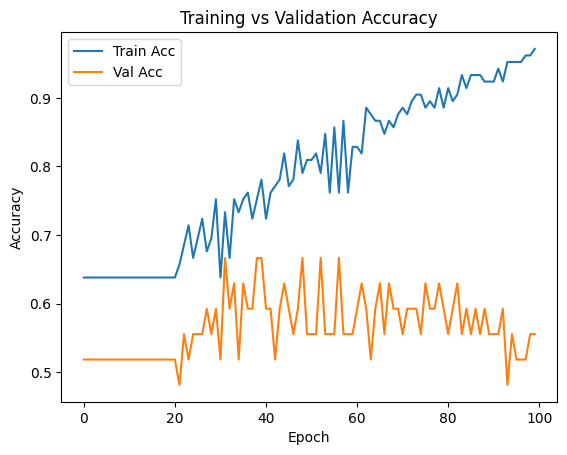

Test Results -> Acc: 0.5882, F1: 0.3636, Precision: 0.4444, Recall: 0.3077, AUC: 0.5788


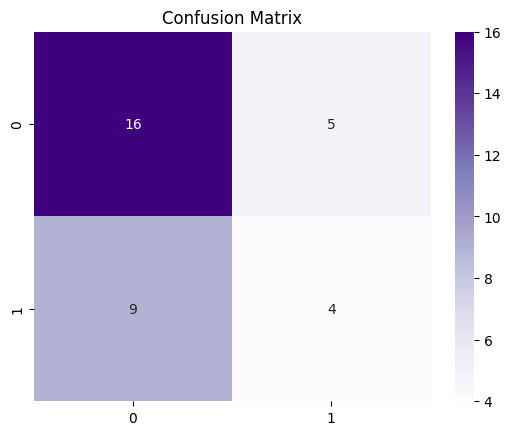

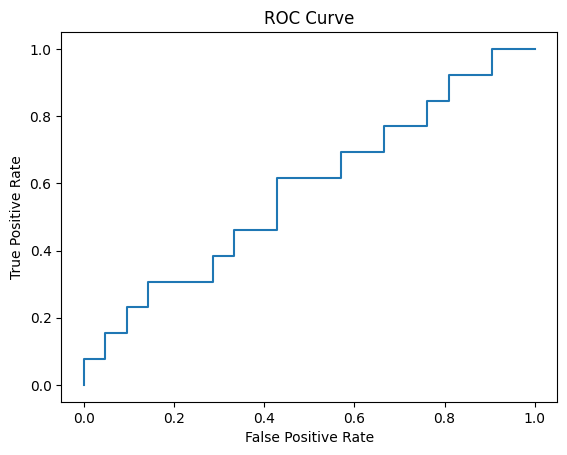


===== Fold 4/5 =====
Epoch [1/100] | Train Acc: 0.3524 | Val Acc: 0.4815
Epoch [2/100] | Train Acc: 0.6476 | Val Acc: 0.5185
Epoch [3/100] | Train Acc: 0.6476 | Val Acc: 0.5185
Epoch [4/100] | Train Acc: 0.6476 | Val Acc: 0.5185
Epoch [5/100] | Train Acc: 0.6476 | Val Acc: 0.5185
Epoch [6/100] | Train Acc: 0.6476 | Val Acc: 0.5185
Epoch [7/100] | Train Acc: 0.6476 | Val Acc: 0.5185
Epoch [8/100] | Train Acc: 0.6476 | Val Acc: 0.5185
Epoch [9/100] | Train Acc: 0.6476 | Val Acc: 0.5185
Epoch [10/100] | Train Acc: 0.6476 | Val Acc: 0.5185
Epoch [11/100] | Train Acc: 0.6476 | Val Acc: 0.5185
Epoch [12/100] | Train Acc: 0.6476 | Val Acc: 0.5185
Epoch [13/100] | Train Acc: 0.7048 | Val Acc: 0.4815
Epoch [14/100] | Train Acc: 0.6667 | Val Acc: 0.4815
Epoch [15/100] | Train Acc: 0.6571 | Val Acc: 0.5185
Epoch [16/100] | Train Acc: 0.6857 | Val Acc: 0.5556
Epoch [17/100] | Train Acc: 0.6667 | Val Acc: 0.5926
Epoch [18/100] | Train Acc: 0.6857 | Val Acc: 0.5556
Epoch [19/100] | Train Acc: 0.638

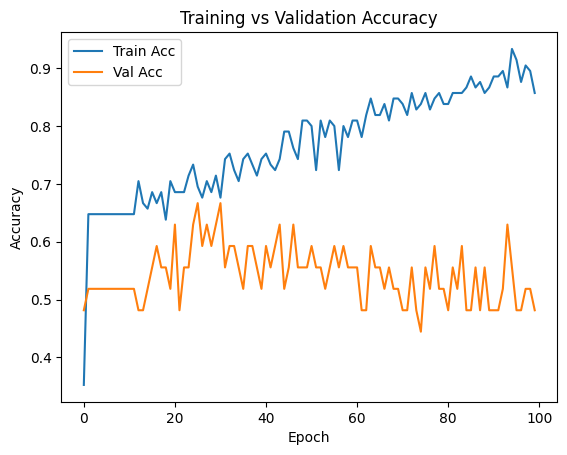

Test Results -> Acc: 0.3529, F1: 0.3529, Precision: 0.3000, Recall: 0.4286, AUC: 0.4071


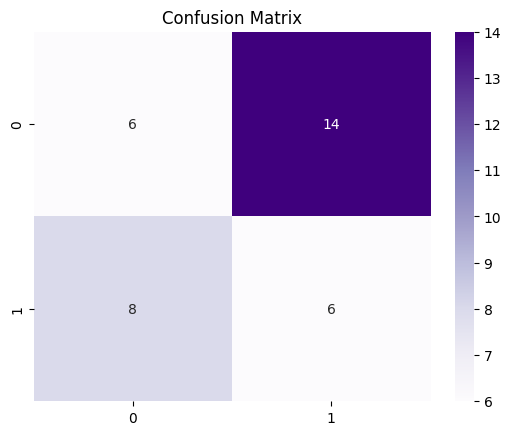

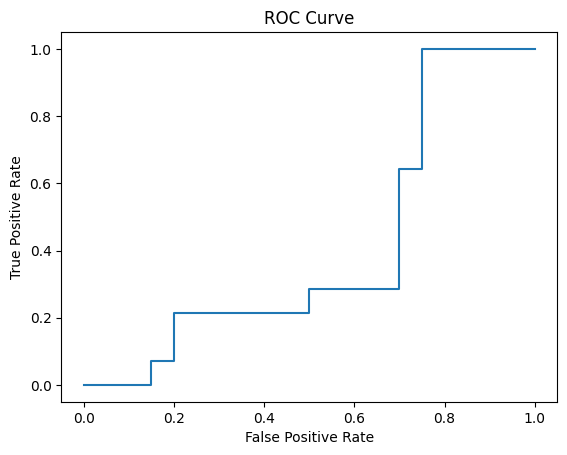


===== Fold 5/5 =====
Epoch [1/100] | Train Acc: 0.5093 | Val Acc: 0.3929
Epoch [2/100] | Train Acc: 0.6481 | Val Acc: 0.5357
Epoch [3/100] | Train Acc: 0.6481 | Val Acc: 0.5357
Epoch [4/100] | Train Acc: 0.6481 | Val Acc: 0.5357
Epoch [5/100] | Train Acc: 0.6481 | Val Acc: 0.5357
Epoch [6/100] | Train Acc: 0.6481 | Val Acc: 0.5357
Epoch [7/100] | Train Acc: 0.6481 | Val Acc: 0.5357
Epoch [8/100] | Train Acc: 0.6481 | Val Acc: 0.5357
Epoch [9/100] | Train Acc: 0.6481 | Val Acc: 0.5357
Epoch [10/100] | Train Acc: 0.6481 | Val Acc: 0.5357
Epoch [11/100] | Train Acc: 0.6481 | Val Acc: 0.5357
Epoch [12/100] | Train Acc: 0.6481 | Val Acc: 0.5357
Epoch [13/100] | Train Acc: 0.6481 | Val Acc: 0.5357
Epoch [14/100] | Train Acc: 0.6481 | Val Acc: 0.5357
Epoch [15/100] | Train Acc: 0.6481 | Val Acc: 0.5357
Epoch [16/100] | Train Acc: 0.6481 | Val Acc: 0.5357
Epoch [17/100] | Train Acc: 0.6481 | Val Acc: 0.5357
Epoch [18/100] | Train Acc: 0.6481 | Val Acc: 0.5357
Epoch [19/100] | Train Acc: 0.685

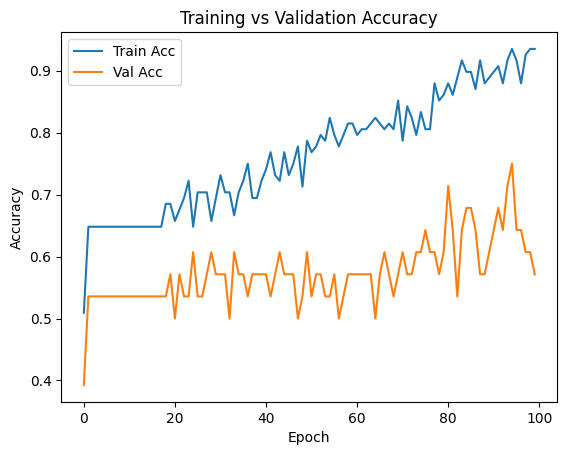

Test Results -> Acc: 0.6000, F1: 0.5000, Precision: 0.5455, Recall: 0.4615, AUC: 0.6244


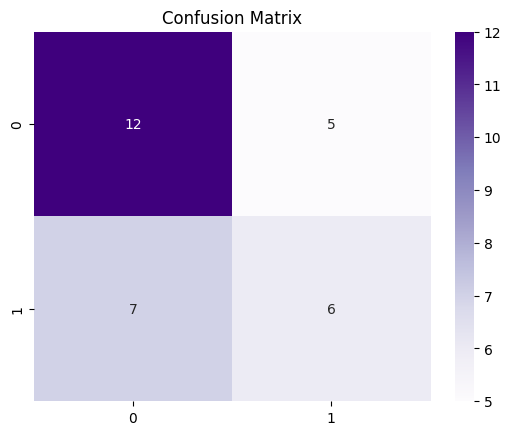

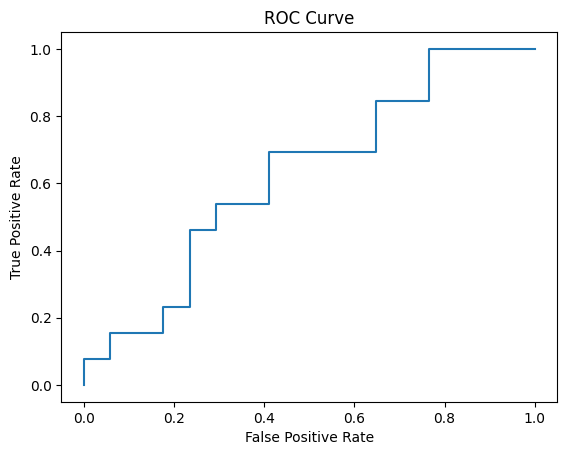


===== Cross Validation Results =====
Avg Accuracy:  0.5259
Avg F1:        0.3989
Avg Precision: 0.4046
Avg Recall:    0.4062
Avg AUC:       0.5349


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, roc_curve
from torch_geometric.nn import SAGEConv
from torch_geometric.datasets import Planetoid

# -----------------------------
# Set random seed
# -----------------------------
seed = 5824
torch.manual_seed(seed)

# -----------------------------
# 3-Layer GraphSAGE Model
# -----------------------------
class GraphSAGEModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout=0.2):
        super(GraphSAGEModel, self).__init__()
        self.conv1 = SAGEConv(input_dim, hidden_dim)
        self.conv2 = SAGEConv(hidden_dim, hidden_dim)
        self.conv3 = SAGEConv(hidden_dim, hidden_dim)
        self.dropout = nn.Dropout(p=dropout)
        self.linear = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.dropout(x)
        x = F.relu(self.conv2(x, edge_index))
        x = self.dropout(x)
        x = F.relu(self.conv3(x, edge_index))
        x = self.dropout(x)
        x = self.linear(x)
        return F.log_softmax(x, dim=1)

# -----------------------------
# K-Fold Node Split
# -----------------------------
def k_fold_node_split(data, k=5, seed=42):
    num_nodes = data.num_nodes
    indices = torch.randperm(num_nodes, generator=torch.Generator().manual_seed(seed))
    folds = indices.chunk(k)
    splits = []

    for i in range(k):
        test_idx = folds[i]
        train_val_idx = torch.cat([folds[j] for j in range(k) if j != i])
        split_point = int(0.8 * len(train_val_idx))
        train_idx = train_val_idx[:split_point]
        val_idx = train_val_idx[split_point:]

        train_mask = torch.zeros(num_nodes, dtype=torch.bool)
        val_mask = torch.zeros(num_nodes, dtype=torch.bool)
        test_mask = torch.zeros(num_nodes, dtype=torch.bool)
        train_mask[train_idx] = True
        val_mask[val_idx] = True
        test_mask[test_idx] = True
        splits.append((train_mask, val_mask, test_mask))
    return splits

# -----------------------------
# Train Function
# -----------------------------
def train(model, data, optimizer, criterion, train_mask, val_mask, epochs):
    train_accs, val_accs = [], []

    for epoch in range(1, epochs + 1):
        model.train()
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)
        loss = criterion(out[train_mask], data.y[train_mask])
        loss.backward()
        optimizer.step()

        preds_train = out[train_mask].argmax(dim=1)
        train_acc = preds_train.eq(data.y[train_mask]).sum().item() / train_mask.sum().item()
        train_accs.append(train_acc)

        model.eval()
        with torch.no_grad():
            preds_val = out[val_mask].argmax(dim=1)
            val_acc = preds_val.eq(data.y[val_mask]).sum().item() / val_mask.sum().item()
        val_accs.append(val_acc)

        print(f"Epoch [{epoch}/{epochs}] | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    plt.plot(train_accs, label="Train Acc")
    plt.plot(val_accs, label="Val Acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training vs Validation Accuracy")
    plt.legend()
    plt.show()

    return model

# -----------------------------
# Evaluation Function
# -----------------------------
def evaluate(model, data, mask):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        preds = out[mask].argmax(dim=1).cpu().numpy()
        probs = F.softmax(out[mask], dim=1)[:, 1].cpu().numpy()
        targets = data.y[mask].cpu().numpy()

    f1 = f1_score(targets, preds)
    precision = precision_score(targets, preds)
    recall = recall_score(targets, preds)
    accuracy = accuracy_score(targets, preds)
    try:
        roc_auc = roc_auc_score(targets, probs)
    except:
        roc_auc = 0.0

    print(f"Test Results -> Acc: {accuracy:.4f}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, AUC: {roc_auc:.4f}")

    cm = confusion_matrix(targets, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
    plt.title("Confusion Matrix")
    plt.show()

    fpr, tpr, _ = roc_curve(targets, probs)
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.show()

    return accuracy, f1, precision, recall, roc_auc

# -----------------------------
# Run 5-Fold Cross Validation
# -----------------------------
def run_node_classification(data, k=5, epochs=100, hidden_dim=128, lr=0.01):
    data.x = F.normalize(data.x, p=1, dim=1)
    splits = k_fold_node_split(data, k=k, seed=seed)

    all_acc, all_f1, all_prec, all_rec, all_auc = [], [], [], [], []

    for fold, (train_mask, val_mask, test_mask) in enumerate(splits):
        print(f"\n===== Fold {fold+1}/{k} =====")
        model = GraphSAGEModel(data.num_node_features, hidden_dim, data.y.max().item() + 1, dropout=0.2)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-4)
        criterion = nn.NLLLoss()

        trained_model = train(model, data, optimizer, criterion, train_mask, val_mask, epochs)
        acc, f1, prec, rec, auc = evaluate(trained_model, data, test_mask)

        all_acc.append(acc)
        all_f1.append(f1)
        all_prec.append(prec)
        all_rec.append(rec)
        all_auc.append(auc)

    print("\n===== Cross Validation Results =====")
    print(f"Avg Accuracy:  {sum(all_acc)/k:.4f}")
    print(f"Avg F1:        {sum(all_f1)/k:.4f}")
    print(f"Avg Precision: {sum(all_prec)/k:.4f}")
    print(f"Avg Recall:    {sum(all_rec)/k:.4f}")
    print(f"Avg AUC:       {sum(all_auc)/k:.4f}")

# -----------------------------
# Example usage with Planetoid dataset
# -----------------------------
if __name__ == "__main__":

    data = dataset[0]
    run_node_classification(data, k=5, epochs=100, hidden_dim=128, lr=0.01)


##**Explainability**

In [ ]:
!pip install --upgrade networkx
!apt-get install -y graphviz-dev

In [ ]:
!pip install pygraphviz

In [ ]:
!pip install graphlime

In [ ]:
from graphlime import GraphLIME
# instantiate a GraphLIME object
explainer = GraphLIME(model, hop=10, rho=0.1, cached=True)
node_idx=20
# explain node features by calling the method `explain_node()`
coefs = explainer.explain_node(node_idx, data.x, data.edge_index)

coefs

In [ ]:
plt.figure(figsize=(16, 4))

x = list(range(data.num_node_features))

plt.bar(x, coefs, width=2.0)
plt.xlabel('Feature Index')
plt.ylabel(r'$\beta$');

print(f'The {np.argmax(coefs)}-th feature is the most important.')

In [ ]:
!pip install captum

In [ ]:
from torch_geometric.explain import CaptumExplainer, Explainer
import captum
explainer = Explainer(
    model=model,
    algorithm=CaptumExplainer('IntegratedGradients'),
    # algorithm=CaptumExplainer(attribution_method=captum.attr.InputXGradient),
    explanation_type='model',
    model_config=dict(
        mode='multiclass_classification',
        task_level='node',
        return_type='log_probs',
    ),
    node_mask_type='attributes',
    edge_mask_type='object',
    threshold_config=dict(
        threshold_type='topk',
        value=300,
    ),
)

In [ ]:
node_index = 32

explanation = explainer(data.x, data.edge_index, index=node_index)
print(f'Generated explanations in {explanation.available_explanations}')

path = 'feature_importanceC.png'
explanation.visualize_feature_importance(path, top_k=10)
print(f"Feature importance plot has been saved to '{path}'")

path = 'subgraphC.png'
explanation.visualize_graph(path)
print(f"Subgraph plot has been saved to '{path}'")

Generated explanations in ['edge_mask', 'node_mask']
Feature importance plot has been saved to 'feature_importanceC.png'
Subgraph plot has been saved to 'subgraphC.png'


In [ ]:
from torch_geometric.explain import Explainer, GNNExplainer

explainer = Explainer(
    model=model,
    algorithm=GNNExplainer(epochs=300),
    explanation_type='model',
    node_mask_type='attributes',
    edge_mask_type='object',
    model_config=dict(
        mode='multiclass_classification',
        task_level='node',
        return_type='log_probs',
    ),
)
node_index = 10
explanation = explainer(data.x, data.edge_index, index=node_index)
print(f'Generated explanations in {explanation.available_explanations}')

path = 'feature_importanceG.png'
explanation.visualize_feature_importance(path, top_k=10)
print(f"Feature importance plot has been saved to '{path}'")


path = 'subgraphG.png'
explanation.visualize_graph(path)
print(f"Subgraph visualization plot has been saved to '{path}'")
node_label = data.y[node_index].item()
print(f'Label of node {node_index}: {node_label}')

Generated explanations in ['node_mask', 'edge_mask']
Feature importance plot has been saved to 'feature_importanceG.png'
Subgraph visualization plot has been saved to 'subgraphG.png'
Label of node 10: 0


KeyboardInterrupt: 

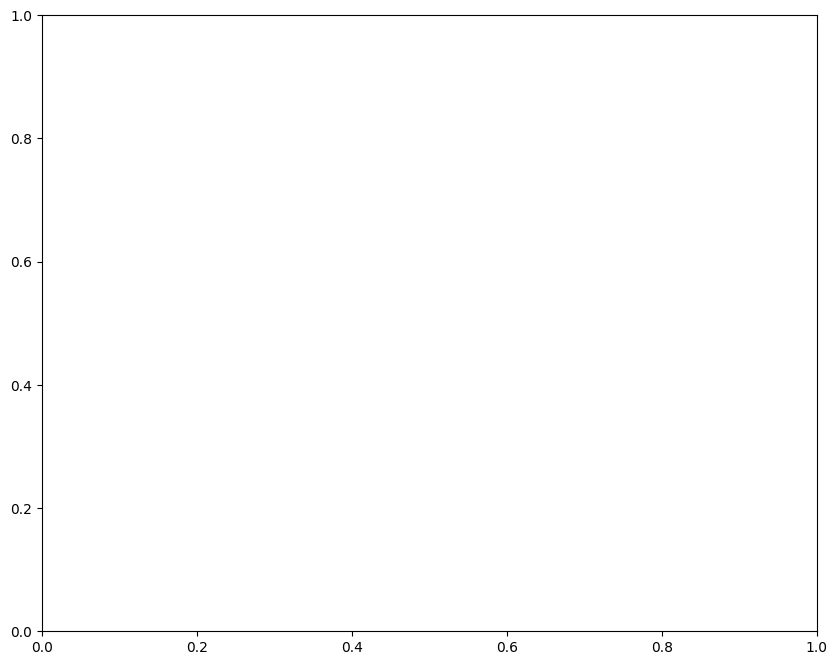

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
import numpy as np

# Assuming 'edge_index', 'explanation["node_mask"]', and 'explanation["edge_mask"]' are correctly defined
G = nx.Graph()
edge_index_np = data.edge_index.numpy()
for source, target in edge_index_np.T:
    G.add_edge(int(source), int(target))

# Normalize node and edge importance scores for visualization
node_importance = explanation["node_mask"].cpu().numpy()
edge_importance = explanation["edge_mask"].cpu().numpy()
node_importance_normalized = node_importance / node_importance.max()
edge_importance_normalized = edge_importance / edge_importance.max()

# Define the colormap and normalization
cmap = plt.cm.viridis
norm_node = mcolors.Normalize(vmin=node_importance_normalized.min(), vmax=node_importance_normalized.max())
norm_edge = mcolors.Normalize(vmin=edge_importance_normalized.min(), vmax=edge_importance_normalized.max())

fig, ax = plt.subplots(figsize=(10, 8))
# Use PyGraphviz to find the tree layout
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')

# Node sizes and colors based on importance
node_sizes = 100 + 900 * node_importance_normalized
node_colors = [cmap(norm_node(value)) for value in node_importance_normalized]

# Apply a power transformation to increase variation in edge widths
edge_widths = 1 + np.power(edge_importance_normalized * 2, 4)  # Adjust the exponent as needed

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, ax=ax)

# Draw edges with colors and widths based on their importance
edges = edge_index_np.T
edge_colors = [cmap(norm_edge(edge_importance_normalized[i])) for i in range(len(edges))]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_widths, edge_color=edge_colors, ax=ax)
# Draw node labels with contrasting colors for readability
for node, (x, y) in pos.items():
    label_color = 'white' if np.mean(node_colors[node]) < 0.5 else 'black'
    plt.text(x, y, str(node), ha='center', va='center', color=label_color, fontsize=8)

plt.axis('off')

# Add colorbar as a legend for node and edge importance
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm_node)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.5)
cbar.set_label('Importance')

plt.show()

In [ ]:
from torch_geometric.explain import Explainer, GNNExplainer

# Assuming `model`, `data`, and other necessary variables are defined

explainer = Explainer(
    model=model,
    algorithm=GNNExplainer(epochs=300),
    explanation_type='model',
    node_mask_type='attributes',
    edge_mask_type='object',
    model_config=dict(
        mode='multiclass_classification',
        task_level='node',
        return_type='log_probs',
    ),
)

# List to store explanations for all nodes
all_explanations = []

# Iterate over all nodes in the graph
for node_index in range(data.num_nodes):
    explanation = explainer(data.x, data.edge_index, index=node_index)
    all_explanations.append(explanation)
    print(f'Generated explanation for node {node_index}')

# Visualize explanations for each node
for node_index, explanation in enumerate(all_explanations):
    # Visualize feature importance
    feature_importance_path = f'feature_importance_node_{node_index}.png'
    explanation.visualize_feature_importance(feature_importance_path, top_k=10)
    print(f"Feature importance plot for node {node_index} has been saved to '{feature_importance_path}'")

    # Visualize subgraph
    subgraph_path = f'subgraph_node_{node_index}.png'
    explanation.visualize_graph(subgraph_path)
    print(f"Subgraph visualization plot for node {node_index} has been saved to '{subgraph_path}'")


In [ ]:
import os
from zipfile import ZipFile
from google.colab import files

# Assuming all_explanations and output_folder are defined as in the previous code

# Directory to save all images
output_folder = 'explanation_images'

# Create the output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Iterate over all nodes in the graph
for node_index, explanation in enumerate(all_explanations):
    # Visualize feature importance
    feature_importance_path = os.path.join(output_folder, f'feature_importance_node_{node_index}.png')
    explanation.visualize_feature_importance(feature_importance_path, top_k=10)
    print(f"Feature importance plot for node {node_index} has been saved to '{feature_importance_path}'")

print("All images have been saved.")

# Create a zip file to store all images
zip_file_path = '/content/explanation_images.zip'
with ZipFile(zip_file_path, 'w') as zipf:
    # Add all images in the output folder to the zip file
    for root, _, files in os.walk(output_folder):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), output_folder))

print(f"All images have been zipped into '{zip_file_path}'")


In [ ]:
from google.colab import files
files.download("/content/explanation_images.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from collections import defaultdict
from torch_geometric.explain import Explainer, GNNExplainer
import torch

# Assuming you have the model and data defined
explainer = Explainer(
    model=model,
    algorithm=GNNExplainer(epochs=300),
    explanation_type='model',
    node_mask_type='attributes',
    edge_mask_type='object',
    model_config=dict(
        mode='multiclass_classification',
        task_level='node',
        return_type='log_probs',
    ),
)

# Get model predictions for each node
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index)
    predictions = out.argmax(dim=1)  # Predicted classes for all nodes

# Initialize dictionaries to store features for each class
class_features = defaultdict(list)

# Iterate over all nodes in the graph and collect their explanations
for node_index in range(data.num_nodes):
    explanation = explainer(data.x, data.edge_index, index=node_index)
    node_class = predictions[node_index].item()  # Predicted class for the node

    # Check the structure of the explanation object
    if hasattr(explanation, 'node_feat_mask'):
        top_features = explanation.node_feat_mask.topk(10).indices.tolist()  # Top 10 features
    elif hasattr(explanation, 'node_mask'):
        top_features = explanation.node_mask.topk(10).indices.tolist()  # Alternative attribute name

    class_features[node_class].append(top_features)
    print(f'Generated explanation for node {node_index}')



In [ ]:
from collections import defaultdict
from torch_geometric.explain import Explainer, GNNExplainer
import torch

# Assuming you have the model and data defined
explainer = Explainer(
    model=model,
    algorithm=GNNExplainer(epochs=300),
    explanation_type='model',
    node_mask_type='attributes',
    edge_mask_type='object',
    model_config=dict(
        mode='multiclass_classification',
        task_level='node',
        return_type='log_probs',
    ),
)

# Get model predictions for each node
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index)
    predictions = out.argmax(dim=1)  # Predicted classes for all nodes

# Initialize dictionaries to store features for each class
class_features = defaultdict(list)

# Iterate over all nodes in the graph and collect their explanations
for node_index in range(data.num_nodes):
    explanation = explainer(data.x, data.edge_index, index=node_index)
    node_class = predictions[node_index].item()  # Predicted class for the node

    # Determine the top features
    if hasattr(explanation, 'node_feat_mask'):
        top_features = explanation.node_feat_mask.topk(10).indices.tolist()  # Top 10 features
    elif hasattr(explanation, 'node_mask'):
        top_features = explanation.node_mask.topk(10).indices.tolist()  # Alternative attribute name

    # Store the top features for the node's predicted class
    class_features[node_class].append((node_index, top_features))

# Print the top ten features for every node
for class_label, nodes_features in class_features.items():
    print(f"Class {class_label} top features:")
    for node_index, top_features in nodes_features:
        print(f"Node {node_index}: {top_features}")



In [ ]:
from torch_geometric.explain import Explainer, GNNExplainer
import torch

# Step 1: Identify nodes belonging to the class of interest
class_of_interest = 1  # Example class label of interest
class_nodes = torch.where(data.y == class_of_interest)[0]

# Step 2: Calculate mean features of nodes within the class
mean_features = data.x[class_nodes].mean(dim=0)

# Step 3: Find the node closest to the mean features
distances = torch.norm(data.x[class_nodes] - mean_features, dim=1)
reference_node_index = class_nodes[torch.argmin(distances)]

# Step 4: Generate explanations for the reference node
explainer = Explainer(
    model=model,
    algorithm=GNNExplainer(epochs=400),
    explanation_type='model',
    node_mask_type='attributes',
    edge_mask_type='object',
    model_config=dict(
        mode='multiclass_classification',
        task_level='node',
        return_type='log_probs',
    ),
)

# Assuming you have a batch argument
batch = torch.zeros(data.x.size(0), dtype=torch.long)  # Adjust this as needed
explanation = explainer(data.x, data.edge_index, batch=batch, index=reference_node_index)

# Step 5: Visualize explanations
path_feature_importance = 'feature_importance0.png'
path_subgraph = 'subgraph0.png'

explanation.visualize_feature_importance(path_feature_importance, top_k=20)
print(f"Feature importance plot for class {class_of_interest} saved to '{path_feature_importance}'")

explanation.visualize_graph(path_subgraph)
print(f"Subgraph visualization plot for class {class_of_interest} saved to '{path_subgraph}'")


Feature importance plot for class 1 saved to 'feature_importance0.png'
Subgraph visualization plot for class 1 saved to 'subgraph0.png'


In [ ]:
from torch_geometric.explain import Explainer, GNNExplainer



# Initialize the Explainer
explainer = Explainer(
    model=model,
    algorithm=GNNExplainer(epochs=200),
    explanation_type='model',
    node_mask_type='attributes',
    edge_mask_type='object',
    model_config=dict(
        mode='multiclass_classification',
        task_level='graph',
        return_type='raw',
    ),
)

# Aggregate explanations for the entire graph
# Here, we will iterate over all nodes and aggregate explanations
# Note: Depending on the size of the graph, this may be computationally intensive
aggregate_explanation = None
batch = torch.zeros(data.x.size(0), dtype=torch.long)  # Adjust this as needed
for node_index in range(data.num_nodes):
    explanation = explainer(data.x,data.edge_index,batch=batch, index=node_index)

    if aggregate_explanation is None:
        aggregate_explanation = explanation
    else:
        # Aggregate explanations (you may adjust how you aggregate depending on your specific needs)
        aggregate_explanation.node_mask += explanation.node_mask
        aggregate_explanation.edge_mask += explanation.edge_mask

# You can now visualize or analyze the aggregate explanation as needed
# For example, visualize the aggregated feature importance
path_feature_importance = 'aggregate_feature_importanceSAGE.png'
aggregate_explanation.visualize_feature_importance(path_feature_importance, top_k=15)
print(f"Aggregate feature importance plot saved to '{path_feature_importance}'")

# # Visualize the aggregated subgraph
# path_subgraph = 'aggregate_subgraph.pdf'
# aggregate_explanation.visualize_graph(path_subgraph)
# print(f"Aggregate subgraph visualization plot saved to '{path_subgraph}'")


Aggregate feature importance plot saved to 'aggregate_feature_importanceSAGE.png'


##**Causal Inference**


In [ ]:
!pip install dowhy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 14.0 MB/s eta 0:00:00


In [ ]:
!apt-get install -y graphviz graphviz-dev
!pip install pygraphviz


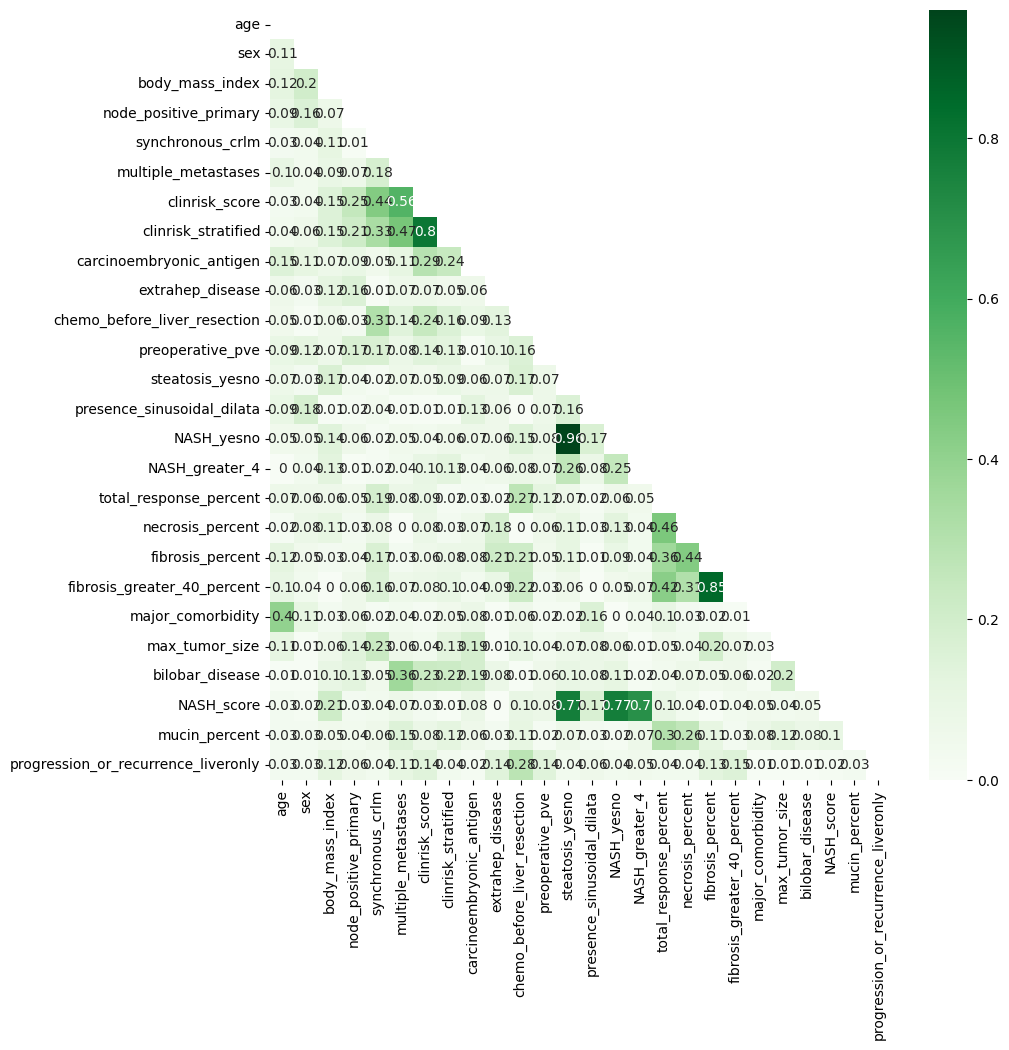

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Digraph
from IPython.display import SVG
import dowhy
from dowhy import CausalModel
import networkx as nx


# Define your discover function
def discover(data: pd.DataFrame, root_nodes: list, predefined_edges: list, excluded_edges: list, excluded_nodes: list, threshold: float = 0.1, iterations: int = 3) -> list:
    if iterations == 0:
        return [(node, root_node) for (node, root_node) in predefined_edges if node not in excluded_nodes and root_node not in excluded_nodes]


    # Non-numeric data types must be label encoded so that they can be evaluated using .corr()
    data_encoded = data.copy(deep=True)
    for col in data_encoded.select_dtypes(exclude=[np.number]):
        data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col])


    for root_node in root_nodes:
        ds_correlated_nodes = data_encoded.corr()[root_node].abs().sort_values(ascending=False)[1:]
        ds_correlated_nodes = ds_correlated_nodes[ds_correlated_nodes >= threshold]


        predefined_edges.extend([(node, root_node) for node in list(ds_correlated_nodes.index) if
                                 (root_node, node) not in predefined_edges and
                                 (node, root_node) not in predefined_edges and
                                 (node, root_node) not in excluded_edges and
                                 (root_node, node) not in excluded_edges])


    return discover(data=data, root_nodes=list(ds_correlated_nodes.index), predefined_edges=predefined_edges,
                    excluded_edges=excluded_edges, excluded_nodes=excluded_nodes, threshold=threshold,
                    iterations=iterations - 1)




# Define your plot_correlation function
def plot_correlation(df_data: pd.DataFrame, fig_size: tuple = (10, 10), decimal_places: int = 2):
    # Non-numeric data types must be label encoded so that they can be evaluated using .corr()
    df_encoded = df_data.copy(deep=True)
    for col in df_encoded.select_dtypes(exclude=[np.number]):
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])


    plt.figure(figsize=fig_size)
    mask = np.triu(np.ones_like(df_encoded.corr(), dtype=bool))
    sns.heatmap(round(df_encoded.corr().abs(), decimal_places), annot=True, cmap='Greens', mask=mask)
    plt.show()








# Prepare your DataFrame df1 with the provided features
data =df1.copy()


# Plot correlation matrix
plot_correlation(data)




# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import LabelEncoder
# import matplotlib.pyplot as plt
# import seaborn as sns
# from graphviz import Digraph
# from IPython.display import SVG
# import dowhy
# from dowhy import CausalModel
# import networkx as nx


# # Define your discover function without using correlation
# def discover(data: pd.DataFrame, root_nodes: list, predefined_edges: list, excluded_edges: list, excluded_nodes: list, threshold: float = 0.1, iterations: int = 3) -> list:
#     if iterations == 0:
#         return [(node, root_node) for (node, root_node) in predefined_edges if node not in excluded_nodes and root_node not in excluded_nodes]

#     # Non-numeric data types must be label encoded
#     data_encoded = data.copy(deep=True)
#     for col in data_encoded.select_dtypes(exclude=[np.number]):
#         data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col])

#     # If not using correlation, specify an alternative method or just skip this part
#     ds_correlated_nodes = []

#     return discover(data=data, root_nodes=root_nodes, predefined_edges=predefined_edges,
#                     excluded_edges=excluded_edges, excluded_nodes=excluded_nodes, threshold=threshold,
#                     iterations=iterations - 1)









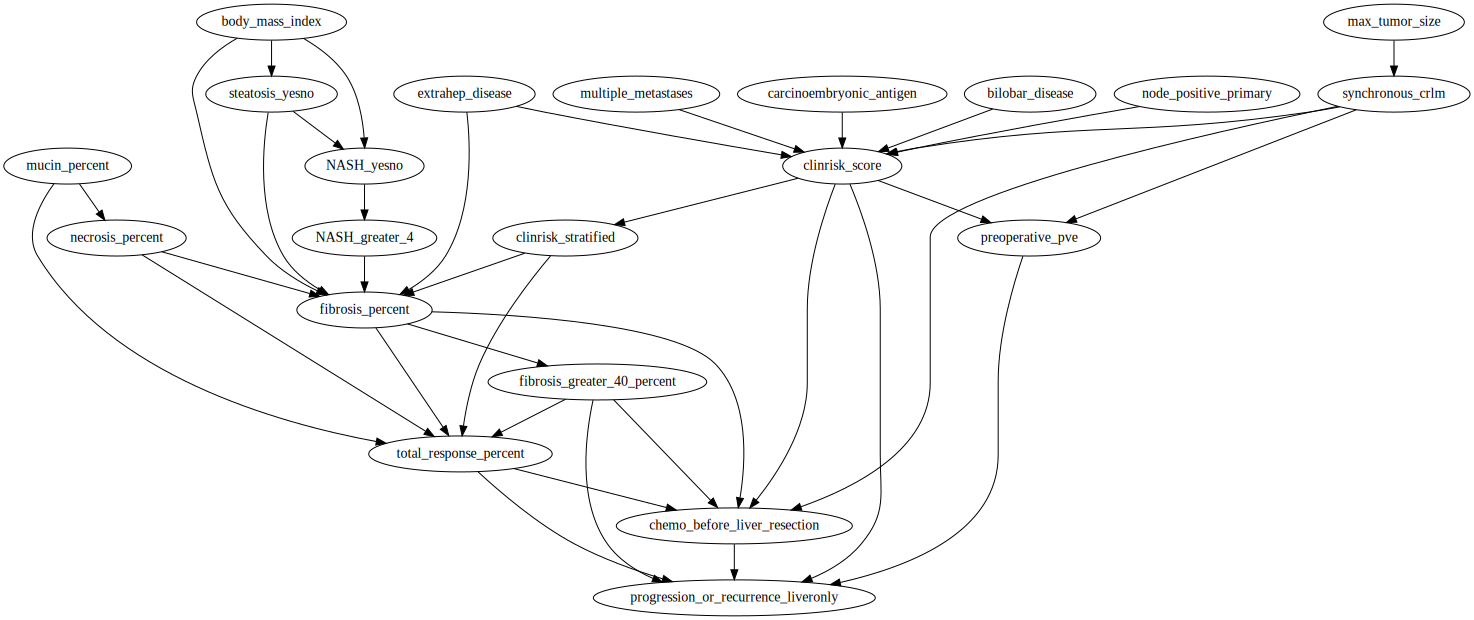

In [ ]:
# 'age',
  #   'sex',
  #   'body_mass_index',
  #   'node_positive_primary',
  #   'synchronous_crlm',
  #   'multiple_metastases',
  #   'clinrisk_score',
  #   'clinrisk_stratified',
  #   'carcinoembryonic_antigen',//
  #   'extrahep_disease',
  #   'chemo_before_liver_resection',//
  #   'preoperative_pve',
  #   'steatosis_yesno',
  #   'presence_sinusoidal_dilata',
  #   'NASH_yesno',
  #   'NASH_greater_4',
  #   'total_response_percent',
  #   'necrosis_percent',
  #   'fibrosis_percent',
  #   'fibrosis_greater_40_percent',//



# Define your display_digraph function
def display_digraph(edges: list):
    digraph = Digraph()
    digraph.edges(edges)
    digraph.render("digraph", format="svg")
    display(SVG("digraph.svg"))

corrected_edges = [('node_positive_primary','clinrisk_score'), ('synchronous_crlm', 'clinrisk_score'),('multiple_metastases','clinrisk_score'),('carcinoembryonic_antigen','clinrisk_score'),
 ('extrahep_disease','clinrisk_score'),('clinrisk_score','clinrisk_stratified'),('synchronous_crlm', 'preoperative_pve'),('clinrisk_stratified','total_response_percent'),
  ('necrosis_percent','total_response_percent'),('clinrisk_score','preoperative_pve'),('clinrisk_score','progression_or_recurrence_liveronly'),( 'fibrosis_greater_40_percent','progression_or_recurrence_liveronly'),('body_mass_index','NASH_yesno'),('NASH_yesno','NASH_greater_4'),
   ('body_mass_index',"fibrosis_percent"),('body_mass_index','steatosis_yesno'),('steatosis_yesno',"fibrosis_percent"),('steatosis_yesno','NASH_yesno'),('NASH_greater_4',"fibrosis_percent"),("chemo_before_liver_resection","progression_or_recurrence_liveronly"),
   ("fibrosis_percent", "fibrosis_greater_40_percent"),("clinrisk_stratified", "fibrosis_percent"),("necrosis_percent", "fibrosis_percent"), ('synchronous_crlm', 'chemo_before_liver_resection'),
    ('clinrisk_score', 'chemo_before_liver_resection'),("total_response_percent",'progression_or_recurrence_liveronly'),("preoperative_pve",'progression_or_recurrence_liveronly')]

excluded_edges = [('clinrisk_stratified', 'synchronous_crlm'),("necrosis_percent","fibrosis_greater_40_percent")]
# Discover edges
edges = discover(data=df1,
                 root_nodes=["progression_or_recurrence_liveronly"],
                 predefined_edges=corrected_edges,
                 excluded_edges=excluded_edges ,
                 excluded_nodes=[],
                 threshold=0.2,
                 iterations=40)

display_digraph(edges)

# Convert edges to a DiGraph
causal_graph = nx.DiGraph(edges)


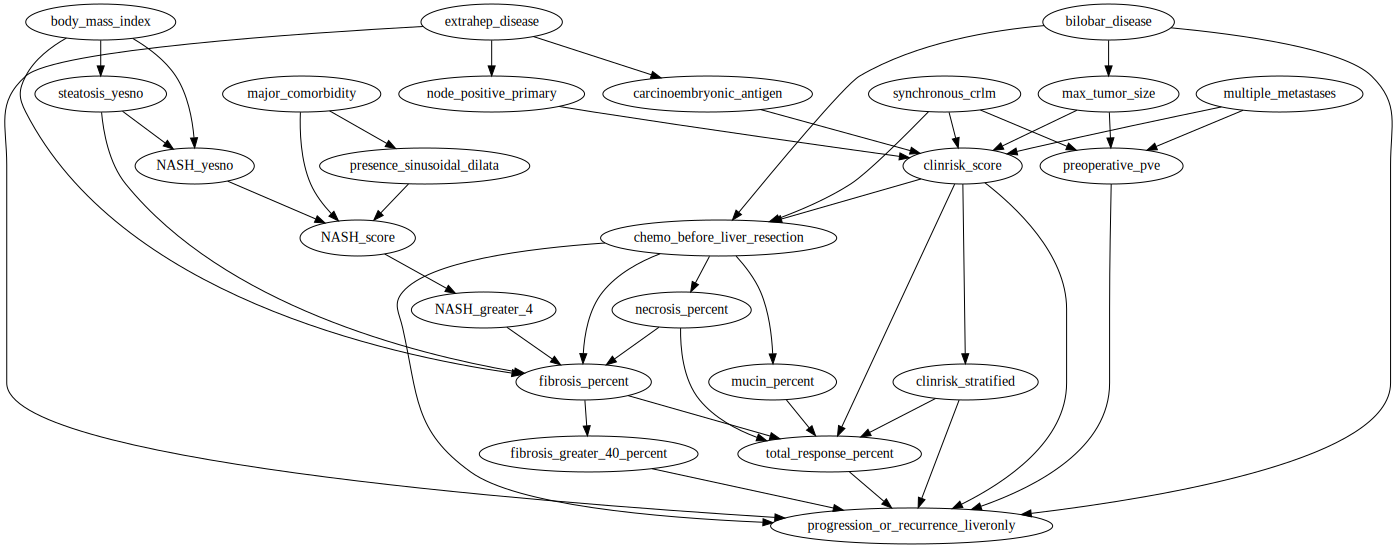

In [ ]:
import graphviz


 # Fong clinical risk score

# Define the DOT graph string
dot_graph = """
digraph {
    node_positive_primary -> clinrisk_score;
    multiple_metastases -> clinrisk_score;
    carcinoembryonic_antigen -> clinrisk_score;
    max_tumor_size-> clinrisk_score;
    synchronous_crlm ->clinrisk_score;

    clinrisk_score -> clinrisk_stratified;

    clinrisk_score -> progression_or_recurrence_liveronly;
    clinrisk_stratified->progression_or_recurrence_liveronly;



    synchronous_crlm -> preoperative_pve;
    multiple_metastases -> preoperative_pve;
    max_tumor_size ->  preoperative_pve;

    total_response_percent->progression_or_recurrence_liveronly;

    chemo_before_liver_resection -> necrosis_percent;
    chemo_before_liver_resection -> fibrosis_percent;
    chemo_before_liver_resection ->mucin_percent;

    necrosis_percent-> total_response_percent;
    fibrosis_percent-> total_response_percent;
    mucin_percent-> total_response_percent;


    clinrisk_stratified -> total_response_percent;
    clinrisk_score -> total_response_percent;

    fibrosis_greater_40_percent -> progression_or_recurrence_liveronly;
    body_mass_index -> NASH_yesno;
    NASH_yesno -> NASH_score;
    NASH_score-> NASH_greater_4;
    body_mass_index -> fibrosis_percent;
    body_mass_index -> steatosis_yesno;
    steatosis_yesno -> fibrosis_percent;
    steatosis_yesno -> NASH_yesno;
    NASH_greater_4 -> fibrosis_percent;

    chemo_before_liver_resection -> progression_or_recurrence_liveronly;
    clinrisk_score -> chemo_before_liver_resection;
    fibrosis_percent -> fibrosis_greater_40_percent;

    necrosis_percent -> fibrosis_percent;
    synchronous_crlm -> chemo_before_liver_resection;
  presence_sinusoidal_dilata->NASH_score;
  major_comorbidity->NASH_score;
  major_comorbidity->presence_sinusoidal_dilata;
  bilobar_disease-> progression_or_recurrence_liveronly;
 extrahep_disease->progression_or_recurrence_liveronly;
preoperative_pve->progression_or_recurrence_liveronly;
bilobar_disease->max_tumor_size;
bilobar_disease->chemo_before_liver_resection;
extrahep_disease->carcinoembryonic_antigen;
extrahep_disease->node_positive_primary;


}

"""



# Render the graph using Graphviz
graphviz.Source(dot_graph)


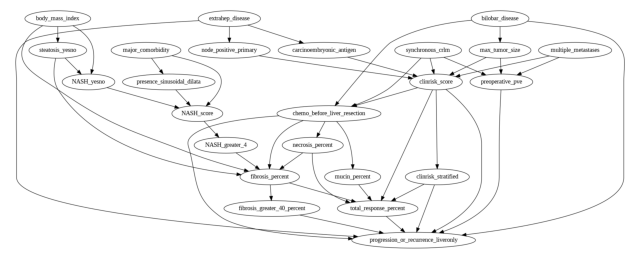

In [ ]:

import dowhy

# Create the CausalModel
model = dowhy.CausalModel(
        data=df1,
          treatment=   'presence_sinusoidal_dilata',
        outcome='progression_or_recurrence_liveronly',
        graph=dot_graph
)


# View the model
model.view_model()

#  'age',
#     'sex',
#     'body_mass_index',
#     'node_positive_primary',
#     'synchronous_crlm',
#     'multiple_metastases',
#     'clinrisk_score',
#     'clinrisk_stratified',
#     'carcinoembryonic_antigen',
#     'extrahep_disease',
#     'chemo_before_liver_resection',
#     'preoperative_pve',
#     'steatosis_yesno',
#     'fibrosis_greater_40_percent',
#      'bilobar_disease',
#     'max_tumor_size',
#     'total_response_percent',
#     'necrosis_percent',
#     'fibrosis_percent',
#     'mucin_percent',
#     'NASH_greater_4',
#     'major_comorbidity',
#     'NASH_yesno',
#     'NASH_score',

#     'presence_sinusoidal_dilata', mathicng works




##**Causal Graph**

In [ ]:
!pip install pyvis

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 13.5 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.1 MB/s eta 0:00:00


In [ ]:
from math import ceil
import matplotlib.pyplot as plt

from IPython.display import IFrame, display, HTML
from flask import Flask, send_file
import threading
import time
import os

from networkx import draw_networkx, DiGraph
from pgmpy.models import BayesianNetwork
from pyvis.network import Network

def __set_size(width: int, height: int):
    """Explicitly sets the size of a matplotlib plot
    Args:
        width (int): Width in inches
        height (int): Height in inches
    References:
        https://stackoverflow.com/questions/44970010/axes-class-set-explicitly-size-width-height-of-axes-in-given-units
    """
    axis = plt.gca()

    figw = float(width) / (axis.figure.subplotpars.right - axis.figure.subplotpars.left)
    figh = float(height) / (axis.figure.subplotpars.top - axis.figure.subplotpars.bottom)

    axis.figure.set_size_inches(figw, figh)

def display_networkx_model(model: BayesianNetwork, pos: dict = None, figsize: tuple = (10, 8), node_size: int = 5000, auto_layout_cols: int = 0):
    """Plots a large-format directed acyclic graph with coloured nodes that can be sized and positioned
    Args:
        model (BayesianNetwork): The model to be drawn which must implement an edges collection
        pos (dict, optional): A dictionary with nodes as keys and positions as values. Each value is a list containing an X and Y co-ordinate. If not specified a spring layout positioning will be computed. Defaults to None (automatic layout).
        figsize (tuple, optional): The size of the displayed plot. Defaults to (10, 8).
        node_size (int, optional): The size of the nodes in the plot. Defaults to 5000.
        auto_layout_cols (int, optional): If set > 0 an auto-layout is generated with the specified number of columns. Defaults to 0.
    Example:
        >>> from pgmpy.models import BayesianNetwork
        >>> POS : dict = {'Vaccination?': [0, 1], 'Reaction?': [-1, 0], 'Smallpox?': [1, 0], 'Death?': [0, -1]}
        >>> domain_model = BayesianNetwork([('Vaccination?', 'Reaction?'), ('Vaccination?', 'Smallpox?'), ('Reaction?', 'Death?'), ('Smallpox?', 'Death?')])
        >>> plot_model(model=domain_model, pos=POS)
    """
    if auto_layout_cols > 0:
        node_pos = [[x, y] for x in range(auto_layout_cols) for y in range(ceil(len(model.nodes) / auto_layout_cols))]
        pos = {k: node_pos[i] for i, k in enumerate(list(model.nodes))}

    plt.figure(figsize=figsize)
    plt.box(False)
    draw_networkx(DiGraph(model.edges), with_labels=True, pos=pos, node_color=[f"C{i}" for i in range(len(model.nodes))], node_size=node_size, arrowsize=25)
    plt.show()

def display_pyvis_model(graph: DiGraph, figsize: tuple = (1000, 1000), notebook: bool = True, enable_physics: bool = False, hierarchical: bool = False, filename: str = "pyvis.html", cdn_resources='remote') -> IFrame:
    """Displays a fully interactive directed acyclic graph that can either be embedded in a Jupyter Notebook cell or displayed in a new browser window
    Args:
        graph (DiGraph): The graph to be drawn which must be a NetworkX DiGraph
        figsize (tuple, optional): The size of the displayed plot. Defaults to (500, 500)
        notebook (bool, optional): If True the graph is displayed inside a Jupyter Notebook cell, if false it is launched in a separate browser window. Defaults to True
        enable_physics (bool, optional): If True the nodes "jiggle" when they are dragged which looks really neat but it can mean that it is difficult to get a good layout. False turns the "jiggle" off. Defaults to False.
        filename (str, optional): The temporary filename used to save and store the HTML output. Defaults to "pyvis.html"
        cdn_resources (str, optional): Specifies where to load resources from. Can be 'local', 'in_line', or 'remote'. Defaults to 'remote'.
    Returns:
        IFrame: An IFrame is returned if notebook = True so that it can be embedded in the Jupyter Notebook cell. If notebook = False there is no return value as the graph is rendered in a separate browser window
    Examples:
        >>> from pgmpy.models import BayesianNetwork
        >>> domain_model = BayesianNetwork([('Vaccination?', 'Reaction?'), ('Vaccination?', 'Smallpox?'), ('Reaction?', 'Death?'), ('Smallpox?', 'Death?')])
        >>> # Display within the Jupyter Notebook cell
        >>> display_pyvis_model(model=model)
        >>> # Display in a new browser window (including all menus)
        >>> display_pyvis_model(model=model, notebook=False)
        >>> # Display within the Jupyter Notebook cell and make the default size larger by 50%
        >>> display_pyvis_model(model=model, figsize=(750, 750))
    """
    net = Network(height=f"{figsize[0]}px", width=f"{figsize[1]}px", notebook=notebook, directed=True, heading="", cdn_resources=cdn_resources) # Set up the Network object

    net.from_nx(graph) # Build the nodes and edges directly from the DiGraph

    if notebook:
        options = 'var options = {"edges": {"color": {"inherit": true},"smooth": false}'
        if not enable_physics:
            options = options + ',"physics": {"enabled": false,"minVelocity": 0.75}'
        if hierarchical:
            options = options + ',"layout": {"hierarchical": {"enabled": true}}'
        options = options + "}"

        net.set_options(options)
    else:
        net.show_buttons()

    net.show(filename) # Create the temporary file that contains the HTML and CSS

    if notebook: # If displaying and embedding in a Jupyter Notebook cell an IFrame must be returned or nothing will be rendered
        return IFrame(src=filename, width=figsize[0] * 1.1, height=figsize[1] * 1.1)

def serve_html(html_file):
    app = Flask(__name__)

    @app.route('/')
    def serve_file():
        return send_file(html_file, as_attachment=True)

    threading.Thread(target=lambda: app.run(port=8000, debug=False, use_reloader=False)).start()
    time.sleep(1)

# Convert edges to a DiGraph
causal_graph = nx.DiGraph(edges)

# Display the model using pyvis
filename = "pyvis.html"
display_pyvis_model(graph=causal_graph, enable_physics=False, hierarchical=False, notebook=True, cdn_resources='remote')

# Serve the HTML file using Flask
serve_html(filename)

# Display the download link
display(HTML(f'<a href="http://localhost:8000" target="_blank">Download pyvis.html</a>'))


pyvis.html
 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 8000 is in use by another program. Either identify and stop that program, or start the server with a different port.


In [ ]:
from math import ceil
import matplotlib.pyplot as plt

from IPython.display import IFrame, display, HTML
from flask import Flask, send_file
import threading
import time
import os

from networkx import draw_networkx, DiGraph
from pgmpy.models import BayesianNetwork
from pyvis.network import Network

def __set_size(width: int, height: int):
    """Explicitly sets the size of a matplotlib plot
    Args:
        width (int): Width in inches
        height (int): Height in inches
    References:
        https://stackoverflow.com/questions/44970010/axes-class-set-explicitly-size-width-height-of-axes-in-given-units
    """
    axis = plt.gca()

    figw = float(width) / (axis.figure.subplotpars.right - axis.figure.subplotpars.left)
    figh = float(height) / (axis.figure.subplotpars.top - axis.figure.subplotpars.bottom)

    axis.figure.set_size_inches(figw, figh)

def display_networkx_model(model: BayesianNetwork, pos: dict = None, figsize: tuple = (10, 8), node_size: int = 5000, auto_layout_cols: int = 0):
    """Plots a large-format directed acyclic graph with coloured nodes that can be sized and positioned
    Args:
        model (BayesianNetwork): The model to be drawn which must implement an edges collection
        pos (dict, optional): A dictionary with nodes as keys and positions as values. Each value is a list containing an X and Y co-ordinate. If not specified a spring layout positioning will be computed. Defaults to None (automatic layout).
        figsize (tuple, optional): The size of the displayed plot. Defaults to (10, 8).
        node_size (int, optional): The size of the nodes in the plot. Defaults to 5000.
        auto_layout_cols (int, optional): If set > 0 an auto-layout is generated with the specified number of columns. Defaults to 0.
    Example:
        >>> from pgmpy.models import BayesianNetwork
        >>> POS : dict = {'Vaccination?': [0, 1], 'Reaction?': [-1, 0], 'Smallpox?': [1, 0], 'Death?': [0, -1]}
        >>> domain_model = BayesianNetwork([('Vaccination?', 'Reaction?'), ('Vaccination?', 'Smallpox?'), ('Reaction?', 'Death?'), ('Smallpox?', 'Death?')])
        >>> plot_model(model=domain_model, pos=POS)
    """
    if auto_layout_cols > 0:
        node_pos = [[x, y] for x in range(auto_layout_cols) for y in range(ceil(len(model.nodes) / auto_layout_cols))]
        pos = {k: node_pos[i] for i, k in enumerate(list(model.nodes))}

    plt.figure(figsize=figsize)
    plt.box(False)
    draw_networkx(DiGraph(model.edges), with_labels=True, pos=pos, node_color=[f"C{i}" for i in range(len(model.nodes))], node_size=node_size, arrowsize=25)
    plt.show()

def display_pyvis_model(graph: DiGraph, figsize: tuple = (1000, 1000), notebook: bool = True, enable_physics: bool = False, hierarchical: bool = False, filename: str = "pyvis.html", cdn_resources='remote') -> IFrame:
    """Displays a fully interactive directed acyclic graph that can either be embedded in a Jupyter Notebook cell or displayed in a new browser window
    Args:
        graph (DiGraph): The graph to be drawn which must be a NetworkX DiGraph
        figsize (tuple, optional): The size of the displayed plot. Defaults to (500, 500)
        notebook (bool, optional): If True the graph is displayed inside a Jupyter Notebook cell, if false it is launched in a separate browser window. Defaults to True
        enable_physics (bool, optional): If True the nodes "jiggle" when they are dragged which looks really neat but it can mean that it is difficult to get a good layout. False turns the "jiggle" off. Defaults to False.
        filename (str, optional): The temporary filename used to save and store the HTML output. Defaults to "pyvis.html"
        cdn_resources (str, optional): Specifies where to load resources from. Can be 'local', 'in_line', or 'remote'. Defaults to 'remote'.
    Returns:
        IFrame: An IFrame is returned if notebook = True so that it can be embedded in the Jupyter Notebook cell. If notebook = False there is no return value as the graph is rendered in a separate browser window
    Examples:
        >>> from pgmpy.models import BayesianNetwork
        >>> domain_model = BayesianNetwork([('Vaccination?', 'Reaction?'), ('Vaccination?', 'Smallpox?'), ('Reaction?', 'Death?'), ('Smallpox?', 'Death?')])
        >>> # Display within the Jupyter Notebook cell
        >>> display_pyvis_model(model=model)
        >>> # Display in a new browser window (including all menus)
        >>> display_pyvis_model(model=model, notebook=False)
        >>> # Display within the Jupyter Notebook cell and make the default size larger by 50%
        >>> display_pyvis_model(model=model, figsize=(750, 750))
    """
    net = Network(height=f"{figsize[0]}px", width=f"{figsize[1]}px", notebook=notebook, directed=True, heading="", cdn_resources=cdn_resources) # Set up the Network object

    net.from_nx(graph) # Build the nodes and edges directly from the DiGraph

    # Customize node colors
    for node in net.nodes:
        if node['id'] == 'progression_or_recurrence_liveronly':
            node['color'] = 'red'
        else:
            node['color'] = 'black'

    if notebook:
        options = 'var options = {"edges": {"color": {"inherit": true},"smooth": false}'
        if not enable_physics:
            options = options + ',"physics": {"enabled": false,"minVelocity": 0.75}'
        if hierarchical:
            options = options + ',"layout": {"hierarchical": {"enabled": true}}'
        options = options + "}"

        net.set_options(options)
    else:
        net.show_buttons()

    net.show(filename) # Create the temporary file that contains the HTML and CSS

    if notebook: # If displaying and embedding in a Jupyter Notebook cell an IFrame must be returned or nothing will be rendered
        return IFrame(src=filename, width=figsize[0] * 1.1, height=figsize[1] * 1.1)

def serve_html(html_file):
    app = Flask(__name__)

    @app.route('/')
    def serve_file():
        return send_file(html_file, as_attachment=True)

    threading.Thread(target=lambda: app.run(port=8000, debug=False, use_reloader=False)).start()
    time.sleep(1)



# Convert edges to a DiGraph
causal_graph = DiGraph(edges)

# Display the model using pyvis
filename = "pyvis.html"
display_pyvis_model(graph=causal_graph, enable_physics=False, hierarchical=False, notebook=True, cdn_resources='remote')

# Serve the HTML file using Flask
serve_html(filename)

# Display the download link
display(HTML(f'<a href="http://localhost:8000" target="_blank">Download pyvis.html</a>'))


pyvis.html
 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 8000 is in use by another program. Either identify and stop that program, or start the server with a different port.


##**Refute**

In [ ]:
#Identify the causal effect
identified_estimand = model.identify_effect()
print(identified_estimand)


In [ ]:

estimate.test_stat_significance()

In [ ]:
# Estimate the target estimand using a statistical method (e.g., Linear Regression)
estimate = model.estimate_effect(identified_estimand,method_name="backdoor.propensity_score_stratification")
print(estimate)

# method_name='frontdoor.two_stage_regression'

# backdoor.propensity_score_weighting
# backdoor.propensity_score_matching
# backdoor.propensity_score_stratification
# backdoor.linear_regression

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
              d                                                               
─────────────────────────────(E[progression_or_recurrence_liveronly|major_como
d[presence_sinusoidal_dilata]                                                 

         
rbidity])
         
Estimand assumption 1, Unconfoundedness: If U→{presence_sinusoidal_dilata} and U→progression_or_recurrence_liveronly then P(progression_or_recurrence_liveronly|presence_sinusoidal_dilata,major_comorbidity,U) = P(progression_or_recurrence_liveronly|presence_sinusoidal_dilata,major_comorbidity)

## Realized estimand
b: progression_or_recurrence_liveronly~presence_sinusoidal_dilata+major_comorbidity
Target units: ate

## Estimate
Mean value: -0.003003003003002991



In [ ]:
sensitivity = model.refute_estimate(identified_estimand, estimate=estimate, method_name='placebo_treatment_refuter')
print(sensitivity)

In [ ]:
estimate = model.estimate_effect(identified_estimand, method_name="iv.instrumental_variable")
print(estimate)


In [ ]:
import dowhy


# Define the function to print the ATE
def print_climate_ate(estimate: dowhy.causal_estimator.CausalEstimate, treatment: str, outcome: str):
    pos_neg = "+" if estimate.value >= 0 else "-"

    title_str = f'Average Treatment Effect (ATE):\n'
    treatment_str = f'For every unit change in "{treatment}" ...\n'
    outcome_str = f'"{outcome}" will change by {pos_neg}{estimate.value}'

    print(title_str + treatment_str + outcome_str)

# Call the print_climate_ate function
print_climate_ate(estimate, treatment=  'multiple_metastases', outcome="progression_or_recurrence_liveronly")


Average Treatment Effect (ATE):
For every unit change in "multiple_metastases" ...
"progression_or_recurrence_liveronly" will change by +0.5861034762736874


In [ ]:
# Textual Interpreter
interpretation = estimate.interpret(method_name="textual_effect_interpreter")

In [ ]:
# # Visual Interpreter
# interpretation = estimate.interpret(method_name="propensity_balance_interpreter")

In [ ]:
import warnings
warnings.simplefilter("ignore")

refute1_results=model.refute_estimate(identified_estimand, estimate,
        method_name="random_common_cause")
print(refute1_results)

Refute: Add a random common cause
Estimated effect:-0.003003003003002991
New effect:-0.003003003003002991
p value:1.0



In [ ]:
import warnings
warnings.simplefilter("ignore")

refute3_results=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.8)
print(refute3_results)

In [ ]:
import warnings
warnings.simplefilter("ignore")

refute2_results=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter",placebo_type="permute")
print(refute2_results)

Refute: Use a Placebo Treatment
Estimated effect:-0.003003003003002991
New effect:0.0013271690312751886
p value:0.98



In [ ]:
# import warnings
# warnings.simplefilter("ignore")

# refute1_results=model.refute_estimate(identified_estimand, estimate,
#         method_name="add_unobserved_common_cause")
# print(refute1_results)

In [ ]:
import warnings
warnings.simplefilter("ignore")

refute1_results=model.refute_estimate(identified_estimand, estimate,
        method_name="bootstrap_refuter")
print(refute1_results)


ValueError: Not enough data to generate at least two strata. This error may be due to a high value of 'clipping_threshold'.

##**CI**

In [ ]:
import numpy as np

def perturb_feature(data, node_idx, feature_idx, perturbation):
    original_value = data.x[node_idx, feature_idx].item()
    data.x[node_idx, feature_idx] += perturbation
    return original_value

def restore_feature(data, node_idx, feature_idx, original_value):
    data.x[node_idx, feature_idx] = original_value

def compute_prediction_change(original_output, new_output, node_idx):
    original_probabilities = torch.exp(original_output[node_idx])
    new_probabilities = torch.exp(new_output[node_idx])
    original_prediction = original_probabilities.argmax().item()
    new_prediction = new_probabilities.argmax().item()
    probability_change = torch.abs(new_probabilities[original_prediction] - original_probabilities[original_prediction]).item()
    return original_prediction, new_prediction, probability_change


In [ ]:
from scipy.stats import ttest_1samp

def counterfactual_analysis(model, data, perturbation_std=0.1, perturbations_per_feature=10, significance_level=0.05):
    feature_significance = []
    num_nodes, num_features = data.x.size()
    epsilon = 1e-7  # Small value to avoid division by zero

    batch = torch.zeros(num_nodes, dtype=torch.long)  # Assuming a single graph, use batch of zeros

    for node_idx in range(num_nodes):
        original_output = model(data.x, data.edge_index, batch)
        original_probabilities = torch.exp(original_output[node_idx])
        original_prediction = original_probabilities.argmax().item()

        for feature_idx in range(num_features):
            probability_changes = []

            for _ in range(perturbations_per_feature):
                perturbation = np.random.randn() * perturbation_std * (data.x[node_idx, feature_idx].item() + epsilon)
                original_value = perturb_feature(data, node_idx, feature_idx, perturbation)

                new_output = model(data.x, data.edge_index, batch)
                _, new_prediction, probability_change = compute_prediction_change(original_output, new_output, node_idx)

                probability_changes.append(probability_change)

                restore_feature(data, node_idx, feature_idx, original_value)

            # Perform statistical significance testing
            t_stat, p_value = ttest_1samp(probability_changes, 0)
            if p_value < significance_level:
                # Track the significance level (use the inverse of the p-value for sorting)
                feature_significance.append((node_idx, feature_idx, -np.log(p_value)))

    # Sort by significance and return the top ten features
    feature_significance.sort(key=lambda x: x[2], reverse=True)
    top_features = feature_significance[:10]

    return top_features


In [ ]:
# Perform analysis
top_causal_features = counterfactual_analysis(model, data)
print("Top ten causally responsible features:", top_causal_features)

Top ten causally responsible features: [(146, 5, 18.06532152639661), (146, 10, 18.06532152639661), (56, 0, 16.020158392227994), (146, 1, 15.086078942772543), (146, 9, 15.086078942772543), (146, 19, 15.086078942772543), (146, 7, 15.08607894277254), (146, 14, 15.08607894277254), (146, 15, 13.437795531064713), (62, 0, 12.771746176205351)]


Top ten causally responsible features: [(73, 6, 13.953589552823658), (46, 18, 12.974253018199144), (66, 17, 12.84465333993308), (45, 16, 12.463435949723754), (16, 13, 11.79207491837289), (99, 8, 11.670977770212641), (93, 3, 11.665686453115768), (4, 2, 11.626902737644102), (110, 16, 11.460643428257752), (61, 4, 11.13186343148825)]

Top ten causally responsible features: [(51, 6, 13.3393183181122), (87, 1, 13.311628679320256), (163, 16, 13.087734362913507), (91, 8, 12.016863513971629), (20, 17, 11.98110547308935), (164, 18, 11.88065892967249), (42, 5, 11.670977770212641), (164, 0, 11.464316255823462), (156, 2, 11.36435805470085), (49, 18, 11.336867558985551)]

Top ten causally responsible features: [(65, 4, 14.893466554870415), (31, 6, 12.945617571981428), (20, 7, 12.844892807330558), (130, 10, 12.463913219743402), (15, 10, 12.27993581554652), (11, 18, 12.166972382296704), (100, 18, 11.622625897260328), (150, 18, 11.31552700157825), (65, 8, 11.215865774923222), (127, 0, 11.201650432095894)]

Top ten causally responsible features: [(146, 5, 18.06532152639661), (146, 10, 18.06532152639661), (56, 0, 16.020158392227994), (146, 1, 15.086078942772543), (146, 9, 15.086078942772543), (146, 19, 15.086078942772543), (146, 7, 15.08607894277254), (146, 14, 15.08607894277254), (146, 15, 13.437795531064713), (62, 0, 12.771746176205351)]



In [ ]:
import numpy as np
import torch
from scipy.stats import ttest_1samp

def perturb_feature(data, node_idx, feature_idx, perturbation):
    original_value = data.x[node_idx, feature_idx].item()
    data.x[node_idx, feature_idx] += perturbation
    return original_value

def restore_feature(data, node_idx, feature_idx, original_value):
    data.x[node_idx, feature_idx] = original_value

def compute_prediction_change(original_output, new_output, node_idx):
    original_probabilities = torch.softmax(original_output[node_idx], dim=0)
    new_probabilities = torch.softmax(new_output[node_idx], dim=0)
    original_prediction = original_probabilities.argmax().item()
    new_prediction = new_probabilities.argmax().item()
    probability_change = torch.abs(new_probabilities[original_prediction] - original_probabilities[original_prediction]).item()
    return original_prediction, new_prediction, probability_change

def counterfactual_analysis(model, data, perturbation_std=0.1, perturbations_per_feature=10, significance_level=0.05):
    feature_significance = []
    num_nodes, num_features = data.x.size()
    epsilon = 1e-7  # Small value to avoid division by zero

    batch = torch.zeros(num_nodes, dtype=torch.long)  # Assuming a single graph, use batch of zeros

    total_original_predictions = []
    total_new_predictions = []
    total_probability_changes = []

    for node_idx in range(num_nodes):
        original_output = model(data.x, data.edge_index, batch)
        original_probabilities = torch.softmax(original_output[node_idx], dim=0)
        original_prediction = original_probabilities.argmax().item()
        total_original_predictions.append(original_prediction)

        for feature_idx in range(num_features):
            probability_changes = []

            for _ in range(perturbations_per_feature):
                perturbation = np.random.randn() * perturbation_std * (data.x[node_idx, feature_idx].item() + epsilon)
                original_value = perturb_feature(data, node_idx, feature_idx, perturbation)

                new_output = model(data.x, data.edge_index, batch)
                _, new_prediction, probability_change = compute_prediction_change(original_output, new_output, node_idx)

                probability_changes.append(probability_change)
                total_probability_changes.append(probability_change)
                total_new_predictions.append(new_prediction)

                restore_feature(data, node_idx, feature_idx, original_value)

            # Perform statistical significance testing
            t_stat, p_value = ttest_1samp(probability_changes, 0)
            if p_value < significance_level:
                # Track the significance level (use the inverse of the p-value for sorting)
                feature_significance.append((node_idx, feature_idx, -np.log(p_value)))

    # Sort by significance and return the top ten features
    feature_significance.sort(key=lambda x: x[2], reverse=True)
    top_features = feature_significance[:10]

    # Evaluation metrics
    fidelity = np.mean(total_probability_changes)
    sparsity = len(feature_significance) / (num_nodes * num_features)

    # Ensure both arrays have the same shape
    total_original_predictions = np.repeat(total_original_predictions, num_features * perturbations_per_feature)
    accuracy = np.mean(np.array(total_original_predictions) == np.array(total_new_predictions))

    metrics = {
        "fidelity": fidelity,
        "sparsity": sparsity,
        "accuracy": accuracy
    }

    return top_features, metrics

# Assuming model and data are defined and loaded appropriately
# Perform analysis
top_causal_features, evaluation_metrics = counterfactual_analysis(model, data)
print("Top ten causally responsible features:", top_causal_features)
print("Evaluation Metrics:", evaluation_metrics)


Top ten causally responsible features: [(89, 8, 15.03258495916169), (57, 2, 13.281938246276342), (60, 19, 12.336186245891742), (65, 3, 12.175973911566553), (100, 10, 11.948393479326178), (78, 4, 11.855120518653354), (78, 0, 11.762547764184903), (100, 17, 11.559512550965708), (47, 6, 11.522756760662508), (107, 6, 11.442432032168508)]
Evaluation Metrics: {'fidelity': 0.00010376772607665464, 'sparsity': 0.36987951807228914, 'accuracy': 0.9999698795180723}


In [ ]:
import numpy as np
import torch
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_scipy_sparse_matrix

def get_adjacency_matrix(data):
    edge_index = data.edge_index
    num_nodes = data.num_nodes
    adj_matrix = to_scipy_sparse_matrix(edge_index, num_nodes=num_nodes)
    return adj_matrix

def perturb_feature(data, node_idx, feature_idx, perturbation):
    original_value = data.x[node_idx, feature_idx].item()
    data.x[node_idx, feature_idx] += perturbation
    return original_value

def restore_feature(data, node_idx, feature_idx, original_value):
    data.x[node_idx, feature_idx] = original_value

def perturb_edge(data, edge_idx, perturbation):
    original_value = data.edge_attr[edge_idx].item() if data.edge_attr is not None else 1.0
    if data.edge_attr is not None:
        data.edge_attr[edge_idx] += perturbation
    return original_value

def restore_edge(data, edge_idx, original_value):
    if data.edge_attr is not None:
        data.edge_attr[edge_idx] = original_value

def compute_prediction_change(original_output, new_output, node_idx):
    original_probabilities = torch.softmax(original_output[node_idx], dim=0)
    new_probabilities = torch.softmax(new_output[node_idx], dim=0)
    original_prediction = original_probabilities.argmax().item()
    new_prediction = new_probabilities.argmax().item()
    probability_change = torch.abs(new_probabilities[original_prediction] - original_probabilities[original_prediction]).item()
    return original_prediction, new_prediction, probability_change

def counterfactual_analysis(model, data, perturbation_std=0.1, perturbations_per_feature=10, significance_level=0.05):
    feature_significance = []
    edge_significance = []
    num_nodes, num_features = data.x.size()
    num_edges = data.edge_index.size(1)
    epsilon = 1e-7  # Small value to avoid division by zero

    batch = torch.zeros(num_nodes, dtype=torch.long)  # Assuming a single graph, use batch of zeros

    total_original_predictions = []
    total_new_predictions = []
    total_probability_changes = []

    p_values = []
    effect_sizes = []

    for node_idx in range(num_nodes):
        original_output = model(data.x, data.edge_index, batch)
        original_probabilities = torch.softmax(original_output[node_idx], dim=0)
        original_prediction = original_probabilities.argmax().item()
        total_original_predictions.append(original_prediction)

        for feature_idx in range(num_features):
            probability_changes = []

            for _ in range(perturbations_per_feature):
                perturbation = np.random.randn() * perturbation_std * (data.x[node_idx, feature_idx].item() + epsilon)
                original_value = perturb_feature(data, node_idx, feature_idx, perturbation)

                new_output = model(data.x, data.edge_index, batch)
                _, new_prediction, probability_change = compute_prediction_change(original_output, new_output, node_idx)

                probability_changes.append(probability_change)
                total_probability_changes.append(probability_change)
                total_new_predictions.append(new_prediction)

                restore_feature(data, node_idx, feature_idx, original_value)

            # Perform non-parametric significance testing
            if len(np.unique(probability_changes)) > 1:  # Wilcoxon requires variability
                stat, p_value = wilcoxon(probability_changes)
            else:
                p_value = 1.0  # If no variability, p-value is 1 (not significant)

            p_values.append(p_value)
            effect_size = np.mean(probability_changes)  # Mean change as effect size
            effect_sizes.append(effect_size)

            feature_significance.append((node_idx, feature_idx, effect_size, p_value))

        for edge_idx in range(num_edges):
            probability_changes = []

            for _ in range(perturbations_per_feature):
                perturbation = np.random.randn() * perturbation_std
                original_value = perturb_edge(data, edge_idx, perturbation)

                new_output = model(data.x, data.edge_index, batch)
                _, new_prediction, probability_change = compute_prediction_change(original_output, new_output, node_idx)

                probability_changes.append(probability_change)
                total_probability_changes.append(probability_change)
                total_new_predictions.append(new_prediction)

                restore_edge(data, edge_idx, original_value)

            # Perform non-parametric significance testing
            if len(np.unique(probability_changes)) > 1:  # Wilcoxon requires variability
                stat, p_value = wilcoxon(probability_changes)
            else:
                p_value = 1.0  # If no variability, p-value is 1 (not significant)

            p_values.append(p_value)
            effect_size = np.mean(probability_changes)  # Mean change as effect size
            effect_sizes.append(effect_size)

            edge_significance.append((edge_idx, effect_size, p_value))

    # Adjust p-values for multiple comparisons using FDR
    _, adjusted_p_values, _, _ = multipletests(p_values, alpha=significance_level, method='fdr_bh')
    for i, (node_idx, feature_idx, effect_size, _) in enumerate(feature_significance):
        if adjusted_p_values[i] < significance_level:
            feature_significance[i] = (node_idx, feature_idx, -np.log(adjusted_p_values[i]), effect_size)
        else:
            feature_significance[i] = (node_idx, feature_idx, float('inf'), effect_size)

    # Filter out non-significant features and sort by significance
    feature_significance = [fs for fs in feature_significance if fs[2] != float('inf')]
    feature_significance.sort(key=lambda x: x[2], reverse=True)
    top_features = feature_significance[:10]

    # Adjust p-values for edge perturbations
    edge_p_values = [es[2] for es in edge_significance]
    _, adjusted_edge_p_values, _, _ = multipletests(edge_p_values, alpha=significance_level, method='fdr_bh')
    for i, (edge_idx, effect_size, _) in enumerate(edge_significance):
        if adjusted_edge_p_values[i] < significance_level:
            edge_significance[i] = (edge_idx, -np.log(adjusted_edge_p_values[i]), effect_size)
        else:
            edge_significance[i] = (edge_idx, float('inf'), effect_size)

    # Filter out non-significant edges and sort by significance
    edge_significance = [es for es in edge_significance if es[1] != float('inf')]
    edge_significance.sort(key=lambda x: x[1], reverse=True)
    top_edges = edge_significance[:10]

    # Get original adjacency matrix
    original_adj_matrix = get_adjacency_matrix(data)
    num_original_edges = original_adj_matrix.nnz  # Number of non-zero entries (edges)

    # Evaluation metrics
    fidelity = np.mean(np.array(total_original_predictions) == np.array(total_new_predictions))
    sparsity = 1 - (num_edges / num_original_edges)
    # Accuracy: Proportion of explanations that are “correct”
    # Assuming ground_truth_labels is defined and contains correct labels for motif nodes
    correct_explanations = np.array([total_new_predictions[i] == ground_truth_labels[i] for i in range(len(total_new_predictions))])
    accuracy = np.mean(correct_explanations)

    metrics = {
        "fidelity": fidelity,
        "sparsity": sparsity,
        "accuracy": accuracy
    }

    return top_features, top_edges, metrics

def visualize_top_features(top_causal_features):
    # Extracting data for visualization
    feature_indices = [f"{node_idx}_{feature_idx}" for node_idx, feature_idx, _ in top_causal_features]
    significance_values = [value for _, _, value in top_causal_features]

    # Creating the bar graph
    plt.figure(figsize=(10, 6))
    plt.barh(feature_indices, significance_values, color='skyblue')
    plt.xlabel('-log(p-value)')
    plt.ylabel('Node_Feature')
    plt.title('Top 10 Causally Responsible Features')
    plt.gca().invert_yaxis()  # To display the largest value at the top
    plt.show()

def visualize_top_edges(data, top_causal_edges):
    # Extracting the subgraph
    G = nx.Graph()
    edge_indices = [data.edge_index[:, edge_idx].tolist() for edge_idx, _, _ in top_causal_edges]
    edge_significance_values = [value for _, value, _ in top_causal_edges]

    for i, (source, target) in enumerate(edge_indices):
        G.add_edge(source, target, weight=edge_significance_values[i])

    # Drawing the graph
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 10))
    edges = G.edges(data=True)
    weights = [edge_data['weight'] for _, _, edge_data in edges]

    nx.draw(G, pos, edge_color=weights, width=4.0, edge_cmap=plt.cm.Blues, with_labels=True, node_color='lightblue', node_size=500)
    plt.title('Top Causally Responsible Edges')
    plt.show()



In [ ]:
# Assuming model, data, and ground_truth_labels are defined and loaded appropriately
# Perform analysis
top_causal_features, top_causal_edges, evaluation_metrics = counterfactual_analysis(model, data)

# Print top features, edges, and evaluation metrics
print("Top ten causally responsible features:")
for node_idx, feature_idx, significance, effect_size in top_causal_features:
    print(f"Node {node_idx}, Feature {feature_idx}: Significance = {significance}, Effect Size = {effect_size}")

print("\nTop ten causally responsible edges:")
for edge_idx, significance, effect_size in top_causal_edges:
    print(f"Edge {edge_idx}: Significance = {significance}, Effect Size = {effect_size}")

print("\nEvaluation Metrics:")
print(f"Fidelity: {evaluation_metrics['fidelity']}")
print(f"Sparsity: {evaluation_metrics['sparsity']}")
print(f"Accuracy: {evaluation_metrics['accuracy']}")

# Visualize the top features
visualize_top_features(top_causal_features)

# Visualize the top edges
visualize_top_edges(data, top_causal_edges)


KeyboardInterrupt: 

Iteration 1, Perturbations per feature: 10


Processing nodes: 100%|██████████| 166/166 [01:18<00:00,  2.12it/s]


Iteration 2, Perturbations per feature: 14


Processing nodes: 100%|██████████| 166/166 [01:48<00:00,  1.53it/s]


Iteration 3, Perturbations per feature: 18


Processing nodes: 100%|██████████| 166/166 [02:19<00:00,  1.19it/s]


Iteration 4, Perturbations per feature: 22


Processing nodes: 100%|██████████| 166/166 [02:44<00:00,  1.01it/s]


Iteration 5, Perturbations per feature: 26


Processing nodes: 100%|██████████| 166/166 [03:18<00:00,  1.19s/it]


Iteration 6, Perturbations per feature: 30


Processing nodes: 100%|██████████| 166/166 [03:42<00:00,  1.34s/it]


Iteration 7, Perturbations per feature: 34


Processing nodes: 100%|██████████| 166/166 [04:32<00:00,  1.64s/it]


Iteration 8, Perturbations per feature: 38


Processing nodes: 100%|██████████| 166/166 [04:37<00:00,  1.67s/it]


Iteration 9, Perturbations per feature: 42


Processing nodes: 100%|██████████| 166/166 [05:04<00:00,  1.83s/it]


Iteration 10, Perturbations per feature: 46


Processing nodes: 100%|██████████| 166/166 [05:31<00:00,  2.00s/it]


Top ten causally responsible features: [(1, 0, 29.714586448929374, 0.0058437235977338705), (1, 2, 29.714586448929374, 0.003179905207260795), (1, 3, 29.714586448929374, 0.05924445066763007), (1, 4, 29.714586448929374, 0.04232307750245799), (1, 6, 29.714586448929374, 0.00471707530643629), (1, 8, 29.714586448929374, 0.00012306804242341414), (1, 10, 29.714586448929374, 0.037859439849853516), (1, 16, 29.714586448929374, 0.011875980574151745), (1, 17, 29.714586448929374, 0.0031033002811929455), (1, 18, 29.714586448929374, 0.00275146572486214)]


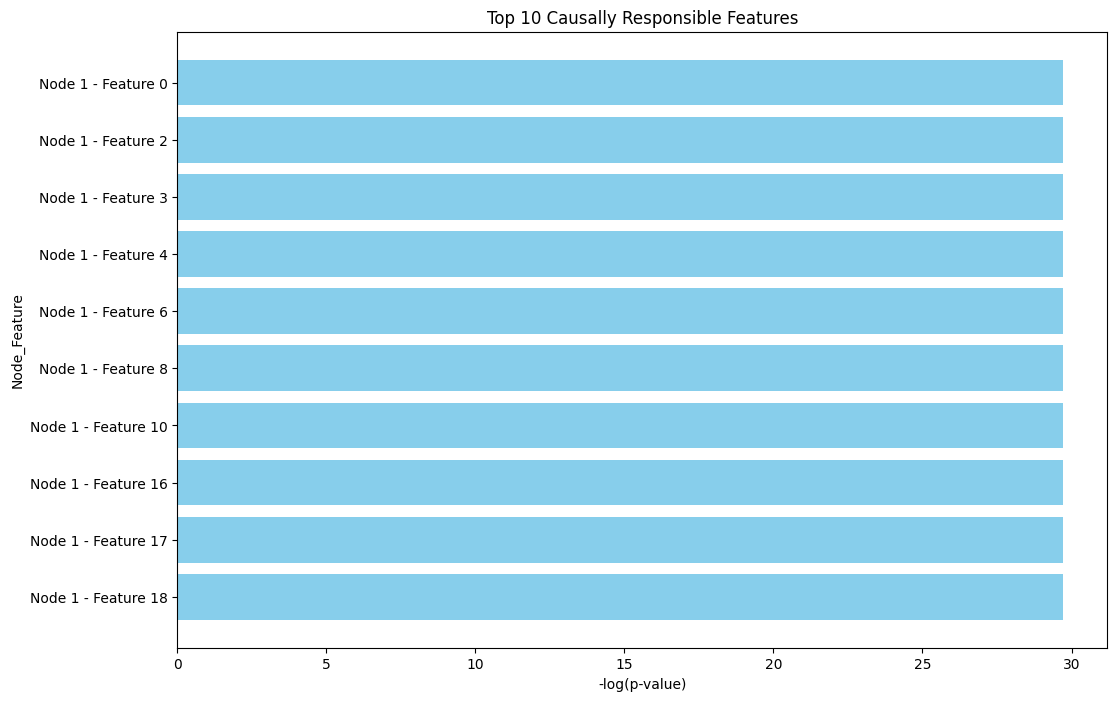

In [ ]:
import numpy as np
import torch
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_scipy_sparse_matrix
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

set_seed(42)

def get_adjacency_matrix(data):
    edge_index = data.edge_index
    num_nodes = data.num_nodes
    adj_matrix = to_scipy_sparse_matrix(edge_index, num_nodes=num_nodes)
    return adj_matrix

def perturb_feature(data, node_idx, feature_idx, perturbation):
    original_value = data.x[node_idx, feature_idx].item()
    data.x[node_idx, feature_idx] += perturbation
    return original_value

def restore_feature(data, node_idx, feature_idx, original_value):
    data.x[node_idx, feature_idx] = original_value

def perturb_edge(data, edge_idx, perturbation):
    original_value = data.edge_attr[edge_idx].item() if data.edge_attr is not None else 1.0
    if data.edge_attr is not None:
        data.edge_attr[edge_idx] += perturbation
    return original_value

def restore_edge(data, edge_idx, original_value):
    if data.edge_attr is not None:
        data.edge_attr[edge_idx] = original_value

def compute_prediction_change(original_output, new_output, node_idx):
    original_probabilities = torch.softmax(original_output[node_idx], dim=0)
    new_probabilities = torch.softmax(new_output[node_idx], dim=0)
    original_prediction = original_probabilities.argmax().item()
    new_prediction = new_probabilities.argmax().item()
    probability_change = torch.abs(new_probabilities[original_prediction] - original_probabilities[original_prediction]).item()
    return original_prediction, new_prediction, probability_change

def stability_check(previous_results, current_results, threshold=0.01):
    if not previous_results:
        return False

    # Extract common features/edges
    prev_indices = {(res[0], res[1]) for res in previous_results}
    curr_indices = {(res[0], res[1]) for res in current_results}
    common_indices = prev_indices & curr_indices

    if not common_indices:
        return False

    prev_significance_dict = {(res[0], res[1]): res[2] for res in previous_results}
    curr_significance_dict = {(res[0], res[1]): res[2] for res in current_results}

    previous_significance = np.array([prev_significance_dict[idx] for idx in common_indices])
    current_significance = np.array([curr_significance_dict[idx] for idx in common_indices])

    change = np.abs(current_significance - previous_significance).mean()

    return change < threshold

def process_node(node_idx, perturbations_per_feature, model, data, epsilon, perturbation_std, device):
    original_output = model(data.x, data.edge_index, data.batch)
    original_probabilities = torch.softmax(original_output[node_idx], dim=0)
    original_prediction = original_probabilities.argmax().item()

    node_feature_significance = []
    for feature_idx in range(data.num_features):
        probability_changes = []

        for _ in range(perturbations_per_feature):
            perturbation = np.random.randn() * perturbation_std * (data.x[node_idx, feature_idx].item() + epsilon)
            original_value = perturb_feature(data, node_idx, feature_idx, perturbation)

            new_output = model(data.x, data.edge_index, data.batch)
            _, new_prediction, probability_change = compute_prediction_change(original_output, new_output, node_idx)

            probability_changes.append(probability_change)
            restore_feature(data, node_idx, feature_idx, original_value)

        if len(np.unique(probability_changes)) > 1:  # Wilcoxon requires variability
            stat, p_value = wilcoxon(probability_changes)
        else:
            p_value = 1.0  # If no variability, p-value is 1 (not significant)

        effect_size = np.mean(probability_changes)  # Mean change as effect size
        node_feature_significance.append((node_idx, feature_idx, effect_size, p_value))

    return node_feature_significance

def analyze_features(model, data, perturbation_std=0.1, initial_perturbations=10, max_iterations=10, significance_level=0.05):
    num_nodes = data.num_nodes
    epsilon = 1e-7  # Small value to avoid division by zero

    data = data.to(device)
    model = model.to(device)

    p_values = []
    effect_sizes = []

    perturbations_per_feature = initial_perturbations
    previous_results = None

    for iteration in range(max_iterations):
        print(f"Iteration {iteration + 1}, Perturbations per feature: {perturbations_per_feature}")
        feature_significance = []

        for node_idx in tqdm(range(num_nodes), desc="Processing nodes"):
            node_feature_significance = process_node(node_idx, perturbations_per_feature, model, data, epsilon, perturbation_std, device)
            feature_significance.extend(node_feature_significance)

        p_values = [fs[3] for fs in feature_significance]

        # Adjust p-values for multiple comparisons using FDR
        _, adjusted_p_values, _, _ = multipletests(p_values, alpha=significance_level, method='fdr_bh')
        for i, (node_idx, feature_idx, effect_size, _) in enumerate(feature_significance):
            if adjusted_p_values[i] < significance_level:
                feature_significance[i] = (node_idx, feature_idx, -np.log(adjusted_p_values[i]), effect_size)
            else:
                feature_significance[i] = (node_idx, feature_idx, float('inf'), effect_size)

        feature_significance = [fs for fs in feature_significance if fs[2] != float('inf')]
        feature_significance.sort(key=lambda x: x[2], reverse=True)

        if stability_check(previous_results, feature_significance):
            break

        previous_results = feature_significance
        perturbations_per_feature += 4 # Double the number of perturbations for the next iteration

    top_features = feature_significance[:10]

    return top_features

def analyze_edges(model, data, perturbation_std=0.1, initial_perturbations=5, max_iterations=10, significance_level=0.05):
    num_edges = data.edge_index.size(1)
    epsilon = 1e-7  # Small value to avoid division by zero
    batch = torch.zeros(data.num_nodes, dtype=torch.long).to(device)  # Assuming a single graph, use batch of zeros

    data = data.to(device)
    model = model.to(device)

    p_values = []
    effect_sizes = []

    def process_edge(edge_idx, perturbations_per_edge):
        original_output = model(data.x, data.edge_index, batch)
        source, target = data.edge_index[:, edge_idx]
        probability_changes = []

        for _ in range(perturbations_per_edge):
            perturbation = np.random.randn() * perturbation_std * (data.edge_attr[edge_idx].item() + epsilon if data.edge_attr is not None else 1.0)
            original_value = perturb_edge(data, edge_idx, perturbation)

            new_output = model(data.x, data.edge_index, batch)
            _, new_prediction, probability_change = compute_prediction_change(original_output, new_output, source)

            probability_changes.append(probability_change)
            restore_edge(data, edge_idx, original_value)

        if len(np.unique(probability_changes)) > 1:  # Wilcoxon requires variability
            stat, p_value = wilcoxon(probability_changes)
        else:
            p_value = 1.0  # If no variability, p-value is 1 (not significant)

        effect_size = np.mean(probability_changes)  # Mean change as effect size
        return (edge_idx, -np.log(p_value), effect_size)

    perturbations_per_edge = initial_perturbations
    previous_results = None

    for iteration in range(max_iterations):
        print(f"Iteration {iteration + 1}, Perturbations per edge: {perturbations_per_edge}")
        edge_significance = []

        for edge_idx in tqdm(range(num_edges), desc="Processing edges"):
            edge_significance.append(process_edge(edge_idx, perturbations_per_edge))

        p_values = [es[1] for es in edge_significance]

        # Adjust p-values for multiple comparisons using FDR
        _, adjusted_p_values, _, _ = multipletests(p_values, alpha=significance_level, method='fdr_bh')
        for i, (edge_idx, _, effect_size) in enumerate(edge_significance):
            if adjusted_p_values[i] < significance_level:
                edge_significance[i] = (edge_idx, -np.log(adjusted_p_values[i]), effect_size)
            else:
                edge_significance[i] = (edge_idx, float('inf'), effect_size)

        edge_significance = [es for es in edge_significance if es[1] != float('inf')]
        edge_significance.sort(key=lambda x: x[1], reverse=True)

        if stability_check(previous_results, edge_significance):
            break

        previous_results = edge_significance
        perturbations_per_edge += 4 # Double the number of perturbations for the next iteration

    top_edges = edge_significance[:10]

    return top_edges

def visualize_top_features(top_causal_features):
    features = [f"Node {node_idx} - Feature {feature_idx}" for node_idx, feature_idx, _, _ in top_causal_features]
    values = [value for _, _, value, _ in top_causal_features]

    plt.figure(figsize=(12, 8))
    plt.barh(features, values, color='skyblue')
    plt.xlabel('-log(p-value)')
    plt.ylabel('Node_Feature')
    plt.title('Top 10 Causally Responsible Features')
    plt.gca().invert_yaxis()
    plt.show()

def visualize_top_edges(data, top_causal_edges):
    G = nx.Graph()
    edge_indices = [data.edge_index[:, edge_idx].tolist() for edge_idx, _, _ in top_causal_edges]
    edge_significance_values = [value for _, value, _ in top_causal_edges]

    for i, (source, target) in enumerate(edge_indices):
        G.add_edge(source, target, weight=edge_significance_values[i])

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 10))
    edges = G.edges(data=True)
    weights = [edge_data['weight'] for _, _, edge_data in edges]

    nx.draw(G, pos, edge_color=weights, width=4.0, edge_cmap=plt.cm.Blues, with_labels=True, node_color='lightblue', node_size=500)
    plt.title('Top Causally Responsible Edges')
    plt.show()

# Assuming model and data are defined and loaded appropriately
top_causal_features = analyze_features(model, data)
# top_causal_edges = analyze_edges(model, data)

print("Top ten causally responsible features:", top_causal_features)
# print("Top ten causally responsible edges:", top_causal_edges)

# Visualize the top features
visualize_top_features(top_causal_features)

# Visualize the top edges
# visualize_top_edges(data, top_causal_edges)


Top ten causally responsible features: [(1, 0, 5.015091215171756, 0.006302624940872192), (1, 2, 5.015091215171756, 0.004495948553085327), (1, 3, 5.015091215171756, 0.013870495557785033), (1, 4, 5.015091215171756, 0.062467744946479796), (1, 6, 5.015091215171756, 0.005843991041183471), (1, 8, 5.015091215171756, 8.922219276428223e-05), (1, 10, 5.015091215171756, 0.03703794479370117), (1, 16, 5.015091215171756, 0.011639624834060669), (1, 17, 5.015091215171756, 0.0016101837158203126), (1, 18, 5.015091215171756, 0.0015099287033081056)]

Top ten causally responsible features: [(1, 0, 15.972060921024859, 0.003996071907190176), (1, 2, 15.972060921024859, 0.0019713456814105692), (1, 3, 15.972060921024859, 0.07346422626422001), (1, 4, 15.972060921024859, 0.032798237525499783), (1, 6, 15.972060921024859, 0.00683027276626), (1, 8, 15.972060921024859, 8.750649598928598e-05), (1, 10, 15.972060921024859, 0.038554251194000244), (1, 16, 15.972060921024859, 0.008631018491891714), (1, 17, 15.972060921024859, 0.0030394884256216195), (1, 18, 15.972060921024859, 0.0022247708760775053)]

Top ten causally responsible features: [(1, 0, 29.714586448929374, 0.0058437235977338705), (1, 2, 29.714586448929374, 0.003179905207260795), (1, 3, 29.714586448929374, 0.05924445066763007), (1, 4, 29.714586448929374, 0.04232307750245799), (1, 6, 29.714586448929374, 0.00471707530643629), (1, 8, 29.714586448929374, 0.00012306804242341414), (1, 10, 29.714586448929374, 0.037859439849853516), (1, 16, 29.714586448929374, 0.011875980574151745), (1, 17, 29.714586448929374, 0.0031033002811929455), (1, 18, 29.714586448929374, 0.00275146572486214)]


Top ten causally responsible features: [(1, 0, 6.238324625039508, 0.009523653984069824), (1, 2, 6.238324625039508, 0.004108929634094238), (1, 3, 6.238324625039508, 0.039340239763259885), (1, 4, 6.238324625039508, 0.04855509400367737), (1, 6, 6.238324625039508, 0.016958296298980713), (1, 8, 6.238324625039508, 2.7632713317871095e-05), (1, 10, 6.238324625039508, 0.0954846441745758), (1, 16, 6.238324625039508, 0.0013418793678283691), (1, 17, 6.238324625039508, 0.0013382494449615478), (1, 18, 6.238324625039508, 0.010142123699188233)]


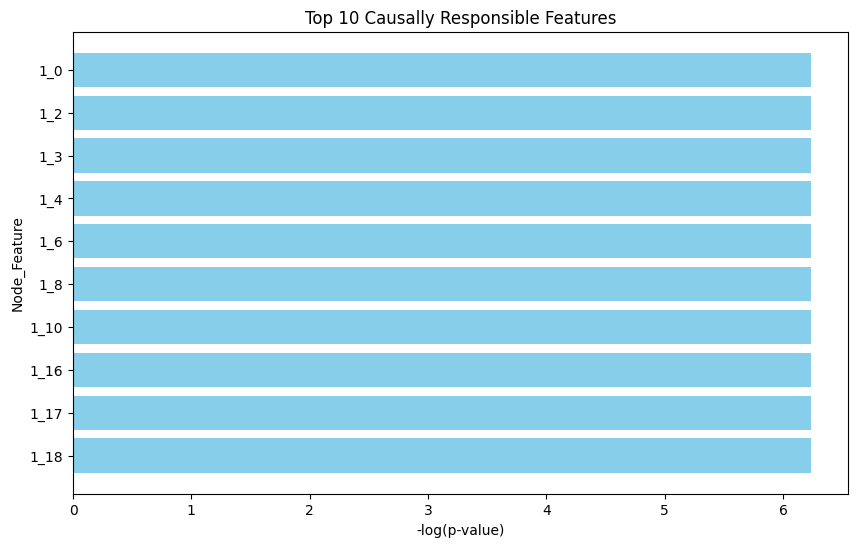

In [ ]:
import numpy as np
import torch
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

def perturb_feature(data, node_idx, feature_idx, perturbation):
    original_value = data.x[node_idx, feature_idx].item()
    data.x[node_idx, feature_idx] += perturbation
    return original_value

def restore_feature(data, node_idx, feature_idx, original_value):
    data.x[node_idx, feature_idx] = original_value

def compute_prediction_change(original_output, new_output, node_idx):
    original_probabilities = torch.softmax(original_output[node_idx], dim=0)
    new_probabilities = torch.softmax(new_output[node_idx], dim=0)
    original_prediction = original_probabilities.argmax().item()
    new_prediction = new_probabilities.argmax().item()
    probability_change = torch.abs(new_probabilities[original_prediction] - original_probabilities[original_prediction]).item()
    return original_prediction, new_prediction, probability_change

def counterfactual_analysis(model, data, perturbation_std=0.1, perturbations_per_feature=10, significance_level=0.05):
    num_nodes, num_features = data.x.size()
    epsilon = 1e-7  # Small value to avoid division by zero
    batch = torch.zeros(num_nodes, dtype=torch.long)  # Assuming a single graph, use batch of zeros

    def process_node(node_idx):
        original_output = model(data.x, data.edge_index, batch)
        original_probabilities = torch.softmax(original_output[node_idx], dim=0)
        original_prediction = original_probabilities.argmax().item()

        node_feature_significance = []
        for feature_idx in range(num_features):
            probability_changes = []

            for _ in range(perturbations_per_feature):
                perturbation = np.random.randn() * perturbation_std * (data.x[node_idx, feature_idx].item() + epsilon)
                original_value = perturb_feature(data, node_idx, feature_idx, perturbation)

                new_output = model(data.x, data.edge_index, batch)
                _, new_prediction, probability_change = compute_prediction_change(original_output, new_output, node_idx)

                probability_changes.append(probability_change)
                restore_feature(data, node_idx, feature_idx, original_value)

            if len(np.unique(probability_changes)) > 1:  # Wilcoxon requires variability
                stat, p_value = wilcoxon(probability_changes)
            else:
                p_value = 1.0  # If no variability, p-value is 1 (not significant)

            effect_size = np.mean(probability_changes)  # Mean change as effect size
            node_feature_significance.append((node_idx, feature_idx, -np.log(p_value), effect_size))

        return node_feature_significance

    feature_significance = Parallel(n_jobs=-1)(delayed(process_node)(node_idx) for node_idx in range(num_nodes))
    feature_significance = [item for sublist in feature_significance for item in sublist]
    feature_significance.sort(key=lambda x: x[2], reverse=True)  # Sort by significance

    top_features = feature_significance[:10]  # Top 10 significant features
    return top_features

def visualize_top_features(top_causal_features):
    feature_indices = [f"{node_idx}_{feature_idx}" for node_idx, feature_idx, _, _ in top_causal_features]
    significance_values = [value for _, _, value, _ in top_causal_features]

    plt.figure(figsize=(10, 6))
    plt.barh(feature_indices, significance_values, color='skyblue')
    plt.xlabel('-log(p-value)')
    plt.ylabel('Node_Feature')
    plt.title('Top 10 Causally Responsible Features')
    plt.gca().invert_yaxis()
    plt.show()

# Assuming model and data are defined and loaded appropriately
top_causal_features = counterfactual_analysis(model, data)
print("Top ten causally responsible features:", top_causal_features)

# Visualize the top features
visualize_top_features(top_causal_features)


Top ten causally responsible features: [(1, 0, 6.238324625039508, 0.014413648843765258), (1, 2, 6.238324625039508, 0.009916329383850097), (1, 3, 6.238324625039508, 0.04795176386833191), (1, 4, 6.238324625039508, 0.0446089506149292), (1, 6, 6.238324625039508, 0.009316837787628174), (1, 8, 6.238324625039508, 1.77919864654541e-05), (1, 10, 6.238324625039508, 0.03136241436004639), (1, 16, 6.238324625039508, 0.0019544541835784914), (1, 17, 6.238324625039508, 0.0029762089252471924), (1, 18, 6.238324625039508, 0.013091713190078735)]

0,2,3,4,6,8,10,16,17,18

Base Model Performance - Accuracy: 0.9939759036144579


Processing nodes: 100%|██████████| 166/166 [00:14<00:00, 11.23it/s]
<ipython-input-11-101bf484e7c6>:85: RuntimeWarning: divide by zero encountered in log
  feature_significance[i] = (node_idx, feature_idx, -np.log(adjusted_p_values[i]), effect_size)


Perturbed Model Performance - Accuracy: 0.9939759036144579
Fidelity: 1.0
Sparsity: 0.0
Top ten causally responsible features: [(32, 9, 16.171295178605355, 5.960464477539063e-08), (43, 11, 16.171295178605355, 5.960464477539063e-08), (43, 12, 16.171295178605355, 5.960464477539063e-08), (43, 15, 16.171295178605355, 5.960464477539063e-08), (43, 18, 16.171295178605355, 5.960464477539063e-08), (44, 8, 16.171295178605355, 5.960464477539063e-08), (54, 8, 16.171295178605355, 5.960464477539063e-08), (60, 3, 16.171295178605355, 5.960464477539063e-08), (60, 12, 16.171295178605355, 5.960464477539063e-08), (60, 14, 16.171295178605355, 5.960464477539063e-08)]


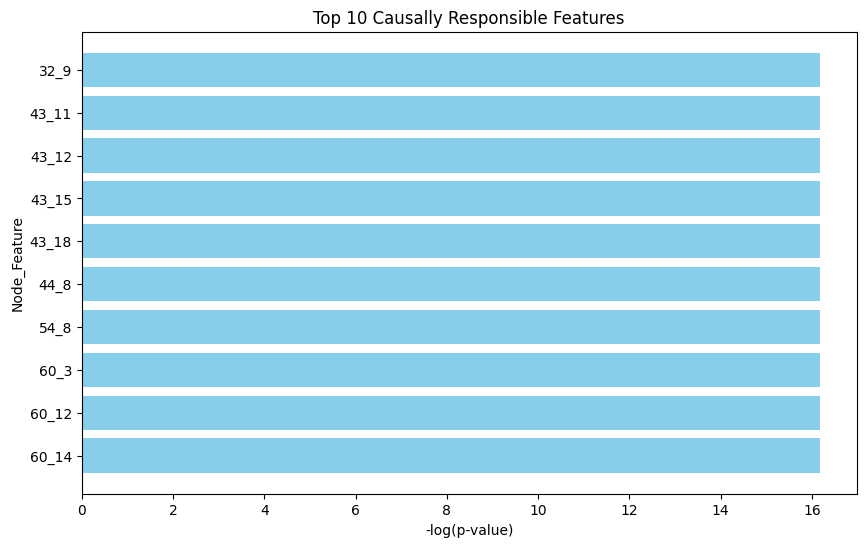

In [ ]:
import numpy as np
import torch
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tqdm import tqdm  # Importing tqdm for the progress bar

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def perturb_feature(data, node_idx, feature_idx, perturbation):
    original_value = data.x[node_idx, feature_idx].item()
    data.x[node_idx, feature_idx] += perturbation
    return original_value

def restore_feature(data, node_idx, feature_idx, original_value):
    data.x[node_idx, feature_idx] = original_value

def compute_prediction_change(original_output, new_output, node_idx):
    original_probabilities = torch.softmax(original_output[node_idx], dim=0)
    new_probabilities = torch.softmax(new_output[node_idx], dim=0)
    original_prediction = original_probabilities.argmax().item()
    new_prediction = new_probabilities.argmax().item()
    probability_change = torch.abs(new_probabilities[original_prediction] - original_probabilities[original_prediction]).item()
    return original_prediction, new_prediction, probability_change

def process_node(node_idx, feature_idx, model, data, epsilon, perturbation_std, device):
    original_output = model(data.x, data.edge_index, data.batch)
    original_probabilities = torch.softmax(original_output[node_idx], dim=0)
    original_prediction = original_probabilities.argmax().item()

    perturbation = np.random.randn() * perturbation_std * (data.x[node_idx, feature_idx].item() + epsilon)
    original_value = perturb_feature(data, node_idx, feature_idx, perturbation)

    new_output = model(data.x, data.edge_index, data.batch)
    _, new_prediction, probability_change = compute_prediction_change(original_output, new_output, node_idx)

    restore_feature(data, node_idx, feature_idx, original_value)

    return node_idx, feature_idx, probability_change

def evaluate_model_performance(model, data):
    model.eval()
    with torch.no_grad():
        output = model(data.x, data.edge_index, data.batch)
        predictions = torch.argmax(output, dim=1).cpu().numpy()
        true_labels = data.y.cpu().numpy()

    accuracy = accuracy_score(true_labels, predictions)
    return accuracy

def calculate_fidelity(original_predictions, perturbed_predictions):
    return np.mean(original_predictions == perturbed_predictions)

def analyze_features(model, data, perturbation_std=0.1, significance_level=0.05):
    num_nodes = data.num_nodes
    epsilon = 1e-7  # Small value to avoid division by zero

    # Move data and model to the appropriate device
    data = data.to(device)
    model = model.to(device)

    # Evaluate model performance before perturbation
    base_accuracy = evaluate_model_performance(model, data)
    print(f"Base Model Performance - Accuracy: {base_accuracy}")

    original_output = model(data.x, data.edge_index, data.batch)
    original_predictions = torch.argmax(original_output, dim=1).cpu().numpy()

    feature_significance = []

    # Sequential processing with tqdm for progress bar
    for node_idx in tqdm(range(num_nodes), desc="Processing nodes"):
        for feature_idx in range(data.num_features):
            result = process_node(node_idx, feature_idx, model, data, epsilon, perturbation_std, device)
            feature_significance.append(result)

    # Organize and analyze results
    p_values = [fs[2] for fs in feature_significance]

    # Adjust p-values for multiple comparisons using FDR
    _, adjusted_p_values, _, _ = multipletests(p_values, alpha=significance_level, method='fdr_bh')
    for i, (node_idx, feature_idx, effect_size) in enumerate(feature_significance):
        if adjusted_p_values[i] < significance_level:
            feature_significance[i] = (node_idx, feature_idx, -np.log(adjusted_p_values[i]), effect_size)
        else:
            feature_significance[i] = (node_idx, feature_idx, float('inf'), effect_size)

    feature_significance = [fs for fs in feature_significance if fs[2] != float('inf')]
    feature_significance.sort(key=lambda x: x[2], reverse=True)

    top_features = feature_significance[:10]

    # Evaluate model performance after perturbations
    perturbed_output = model(data.x, data.edge_index, data.batch)
    perturbed_predictions = torch.argmax(perturbed_output, dim=1).cpu().numpy()
    perturbed_accuracy = accuracy_score(data.y.cpu().numpy(), perturbed_predictions)
    fidelity = calculate_fidelity(original_predictions, perturbed_predictions)
    sparsity = np.mean([np.abs(perturbed_predictions[i] - original_predictions[i]) for i in range(len(original_predictions))])

    print(f"Perturbed Model Performance - Accuracy: {perturbed_accuracy}")
    print(f"Fidelity: {fidelity}")
    print(f"Sparsity: {sparsity}")

    return top_features

def visualize_top_features(top_causal_features):
    feature_indices = [f"{node_idx}_{feature_idx}" for node_idx, feature_idx, _, _ in top_causal_features]
    significance_values = [value for _, _, value, _ in top_causal_features]

    plt.figure(figsize=(10, 6))
    plt.barh(feature_indices, significance_values, color='skyblue')
    plt.xlabel('-log(p-value)')
    plt.ylabel('Node_Feature')
    plt.title('Top 10 Causally Responsible Features')
    plt.gca().invert_yaxis()
    plt.show()

# Assuming model and data are defined and loaded appropriately
top_causal_features = analyze_features(model, data)

print("Top ten causally responsible features:", top_causal_features)

# Visualize the top features
visualize_top_features(top_causal_features)


Top ten causally responsible features: [(32, 11, 16.17512110388439, 5.960464477539063e-08), (43, 3, 16.17512110388439, 5.960464477539063e-08), (43, 7, 16.17512110388439, 5.960464477539063e-08), (43, 11, 16.17512110388439, 5.960464477539063e-08), (43, 12, 16.17512110388439, 5.960464477539063e-08), (43, 19, 16.17512110388439, 5.960464477539063e-08), (60, 1, 16.17512110388439, 5.960464477539063e-08), (60, 13, 16.17512110388439, 5.960464477539063e-08), (60, 14, 16.17512110388439, 5.960464477539063e-08), (89, 9, 16.17512110388439, 5.960464477539063e-08)]

Top ten causally responsible features: [(32, 9, 16.171295178605355, 5.960464477539063e-08), (43, 11, 16.171295178605355, 5.960464477539063e-08), (43, 12, 16.171295178605355, 5.960464477539063e-08), (43, 15, 16.171295178605355, 5.960464477539063e-08), (43, 18, 16.171295178605355, 5.960464477539063e-08), (44, 8, 16.171295178605355, 5.960464477539063e-08), (54, 8, 16.171295178605355, 5.960464477539063e-08), (60, 3, 16.171295178605355, 5.960464477539063e-08), (60, 12, 16.171295178605355, 5.960464477539063e-08), (60, 14, 16.171295178605355, 5.960464477539063e-08)]


##**Contexual**

In [ ]:
import numpy as np
import torch
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_scipy_sparse_matrix
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# def set_seed(seed):
#     np.random.seed(seed)
#     torch.manual_seed(seed)
#     if torch.cuda.is_available():
#         torch.cuda.manual_seed(seed)
#         torch.cuda.manual_seed_all(seed)

# set_seed(42)

def get_adjacency_matrix(data):
    edge_index = data.edge_index
    num_nodes = data.num_nodes
    adj_matrix = to_scipy_sparse_matrix(edge_index, num_nodes=num_nodes)
    return adj_matrix

def perturb_feature(data, node_idx, feature_idx, perturbation_std, epsilon):
    original_value = data.x[node_idx, feature_idx].item()
    if feature_idx in [0, 2, 8, 16, 17, 18]:  # Continuous features
        perturbation = np.random.randn() * perturbation_std * (original_value + epsilon)
        data.x[node_idx, feature_idx] += perturbation
    elif feature_idx in [1]:  # Binary categorical feature (Sex)
        data.x[node_idx, feature_idx] = 3 - data.x[node_idx, feature_idx]
    elif feature_idx in [3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 19]:  # Binary categorical features
        data.x[node_idx, feature_idx] = 1 - data.x[node_idx, feature_idx]
    elif feature_idx == 6:  # Categorical feature with values 0 to 5
        data.x[node_idx, feature_idx] = (data.x[node_idx, feature_idx] + 1) % 6
    return original_value

def restore_feature(data, node_idx, feature_idx, original_value):
    data.x[node_idx, feature_idx] = original_value

def perturb_edge(data, edge_idx, perturbation):
    original_value = data.edge_attr[edge_idx].item() if data.edge_attr is not None else 1.0
    if data.edge_attr is not None:
        data.edge_attr[edge_idx] += perturbation
    return original_value

def restore_edge(data, edge_idx, original_value):
    if data.edge_attr is not None:
        data.edge_attr[edge_idx] = original_value

def compute_prediction_change(original_output, new_output, node_idx):
    original_probabilities = torch.softmax(original_output[node_idx], dim=0)
    new_probabilities = torch.softmax(new_output[node_idx], dim=0)
    original_prediction = original_probabilities.argmax().item()
    new_prediction = new_probabilities.argmax().item()
    probability_change = torch.abs(new_probabilities[original_prediction] - original_probabilities[original_prediction]).item()
    return original_prediction, new_prediction, probability_change

def stability_check(previous_results, current_results, threshold=0.01):
    if not previous_results:
        return False

    # Extract common features/edges
    prev_indices = {(res[0], res[1]) for res in previous_results}
    curr_indices = {(res[0], res[1]) for res in current_results}
    common_indices = prev_indices & curr_indices

    if not common_indices:
        return False

    prev_significance_dict = {(res[0], res[1]): res[2] for res in previous_results}
    curr_significance_dict = {(res[0], res[1]): res[2] for res in current_results}

    previous_significance = np.array([prev_significance_dict[idx] for idx in common_indices])
    current_significance = np.array([curr_significance_dict[idx] for idx in common_indices])

    change = np.abs(current_significance - previous_significance).mean()

    return change < threshold

def process_node(node_idx, perturbations_per_feature, model, data, epsilon, perturbation_std, device):
    original_output = model(data.x, data.edge_index, data.batch)
    original_probabilities = torch.softmax(original_output[node_idx], dim=0)
    original_prediction = original_probabilities.argmax().item()

    node_feature_significance = []
    for feature_idx in range(data.num_features):
        probability_changes = []

        for _ in range(perturbations_per_feature):
            original_value = perturb_feature(data, node_idx, feature_idx, perturbation_std, epsilon)

            new_output = model(data.x, data.edge_index, data.batch)
            _, new_prediction, probability_change = compute_prediction_change(original_output, new_output, node_idx)

            probability_changes.append(probability_change)
            restore_feature(data, node_idx, feature_idx, original_value)

        if len(np.unique(probability_changes)) > 1:  # Wilcoxon requires variability
            stat, p_value = wilcoxon(probability_changes)
        else:
            p_value = 1.0  # If no variability, p-value is 1 (not significant)

        effect_size = np.mean(probability_changes)  # Mean change as effect size
        node_feature_significance.append((node_idx, feature_idx, effect_size, p_value))

    return node_feature_significance

def analyze_features(model, data, perturbation_std=0.1, initial_perturbations=10, max_iterations=3, significance_level=0.05):
    num_nodes = data.num_nodes
    epsilon = 1e-7  # Small value to avoid division by zero

    data = data.to(device)
    model = model.to(device)

    p_values = []
    effect_sizes = []

    perturbations_per_feature = initial_perturbations
    previous_results = None

    unique_features = set()  # Set to store unique feature indices

    for iteration in range(max_iterations):
        print(f"Iteration {iteration + 1}, Perturbations per feature: {perturbations_per_feature}")
        feature_significance = []

        for node_idx in tqdm(range(num_nodes), desc="Processing nodes"):
            node_feature_significance = process_node(node_idx, perturbations_per_feature, model, data, epsilon, perturbation_std, device)
            feature_significance.extend(node_feature_significance)

        p_values = [fs[3] for fs in feature_significance]

        # Adjust p-values for multiple comparisons using FDR
        _, adjusted_p_values, _, _ = multipletests(p_values, alpha=significance_level, method='fdr_bh')
        for i, (node_idx, feature_idx, effect_size, _) in enumerate(feature_significance):
            if adjusted_p_values[i] < significance_level:
                if (node_idx, feature_idx) not in unique_features:  # Check if feature is unique
                    feature_significance[i] = (node_idx, feature_idx, -np.log(adjusted_p_values[i]), effect_size)
                    unique_features.add((node_idx, feature_idx))
                else:
                    feature_significance[i] = (node_idx, feature_idx, float('inf'), effect_size)
            else:
                feature_significance[i] = (node_idx, feature_idx, float('inf'), effect_size)

        feature_significance = [fs for fs in feature_significance if fs[2] != float('inf')]
        feature_significance.sort(key=lambda x: x[2], reverse=True)

        if stability_check(previous_results, feature_significance):
            break

        previous_results = feature_significance
        perturbations_per_feature *= 1 # Double the number of perturbations for the next iteration

    top_features = feature_significance[:10]

    return top_features


def analyze_edges(model, data, perturbation_std=0.1, initial_perturbations=5, max_iterations=10, significance_level=0.05):
    num_edges = data.edge_index.size(1)
    epsilon = 1e-7  # Small value to avoid division by zero
    batch = torch.zeros(data.num_nodes, dtype=torch.long).to(device)

    data = data.to(device)
    model = model.to(device)

    p_values = []
    effect_sizes = []

    def process_edge(edge_idx, perturbations_per_edge):
        original_output = model(data.x, data.edge_index, batch)
        source, target = data.edge_index[:, edge_idx]
        probability_changes = []

        for _ in range(perturbations_per_edge):
            perturbation = np.random.randn() * perturbation_std * (data.edge_attr[edge_idx].item() + epsilon if data.edge_attr is not None else 1.0)
            original_value = perturb_edge(data, edge_idx, perturbation)

            new_output = model(data.x, data.edge_index, batch)
            _, new_prediction, probability_change = compute_prediction_change(original_output, new_output, source)

            probability_changes.append(probability_change)
            restore_edge(data, edge_idx, original_value)

        if len(np.unique(probability_changes)) > 1:  # Wilcoxon requires variability
            stat, p_value = wilcoxon(probability_changes)
        else:
            p_value = 1.0  # If no variability, p-value is 1 (not significant)

        effect_size = np.mean(probability_changes)  # Mean change as effect size
        return (edge_idx, -np.log(p_value), effect_size)

    perturbations_per_edge = initial_perturbations
    previous_results = None

    for iteration in range(max_iterations):
        print(f"Iteration {iteration + 1}, Perturbations per edge: {perturbations_per_edge}")
        edge_significance = []

        for edge_idx in tqdm(range(num_edges), desc="Processing edges"):
            edge_significance.append(process_edge(edge_idx, perturbations_per_edge))

        p_values = [es[1] for es in edge_significance]

        # Adjust p-values for multiple comparisons using FDR
        _, adjusted_p_values, _, _ = multipletests(p_values, alpha=significance_level, method='fdr_bh')
        for i, (edge_idx, _, effect_size) in enumerate(edge_significance):
            if adjusted_p_values[i] < significance_level:
                edge_significance[i] = (edge_idx, -np.log(adjusted_p_values[i]), effect_size)
            else:
                edge_significance[i] = (edge_idx, float('inf'), effect_size)

        edge_significance = [es for es in edge_significance if es[1] != float('inf')]
        edge_significance.sort(key=lambda x: x[1], reverse=True)

        if stability_check(previous_results, edge_significance):
            break

        previous_results = edge_significance
        perturbations_per_edge += 4 # Increase the number of perturbations for the next iteration

    top_edges = edge_significance[:10]

    return top_edges

def visualize_top_features(top_causal_features):
    features = [f"Node {node_idx} - Feature {feature_idx}" for node_idx, feature_idx, _, _ in top_causal_features]
    values = [value for _, _, value, _ in top_causal_features]

    plt.figure(figsize=(12, 8))
    plt.barh(features, values, color='skyblue')
    plt.xlabel('-log(p-value)')
    plt.ylabel('Node_Feature')
    plt.title('Top 10 Causally Responsible Features')
    plt.gca().invert_yaxis()
    plt.show()

def visualize_top_edges(data, top_causal_edges):
    G = nx.Graph()
    edge_indices = [data.edge_index[:, edge_idx].tolist() for edge_idx, _, _ in top_causal_edges]
    edge_significance_values = [value for _, value, _ in top_causal_edges]

    for i, (source, target) in enumerate(edge_indices):
        G.add_edge(source, target, weight=edge_significance_values[i])

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 10))
    edges = G.edges(data=True)
    weights = [edge_data['weight'] for _, _, edge_data in edges]

    nx.draw(G, pos, edge_color=weights, width=4.0, edge_cmap=plt.cm.Blues, with_labels=True, node_color='lightblue', node_size=500)
    plt.title('Top Causally Responsible Edges')
    plt.show()

# Assuming model and data are defined and loaded appropriately
top_causal_features = analyze_features(model, data)
# top_causal_edges = analyze_edges(model, data)

print("Top ten causally responsible features:", top_causal_features)
# print("Top ten causally responsible edges:", top_causal_edges)

# Visualize the top features
visualize_top_features(top_causal_features)

# Visualize the top edges
# visualize_top_edges(data, top_causal_edges)


Top ten causally responsible features: [(1, 0, 15.631134334054265, 0.003928883717610286), (1, 2, 15.631134334054265, 0.004643694712565496), (1, 8, 15.631134334054265, 9.165360377385066e-05), (1, 16, 15.631134334054265, 0.012184065121870775), (1, 17, 15.631134334054265, 0.0033120627586658183), (1, 18, 15.631134334054265, 0.002480928714458759), (3, 0, 15.631134334054265, 3.858713003305288e-05), (3, 2, 15.631134334054265, 6.83138003716102e-05), (3, 16, 15.631134334054265, 0.00027428452785198507), (3, 17, 15.631134334054265, 6.794929504394531e-06)]

Top ten causally responsible features: [(114, 17, 6.5824853104175, 5.960464477539063e-08), (115, 8, 6.5824853104175, 2.9802322387695312e-08), (96, 16, 5.531684905635167, 5.043469942533053e-08), (96, 0, 4.455843529064647, 4.126475407527043e-08), (96, 18, 3.913947726884497, 3.6679781400240387e-08), (150, 8, 3.913947726884497, 1.8339890700120193e-08), (111, 8, 3.363752823542846, 1.6047404362605168e-08), (144, 8, 3.363752823542846, 3.2094808725210335e-08)]


Iteration 1, Perturbations per feature: 10


Processing nodes: 100%|██████████| 166/166 [01:19<00:00,  2.09it/s]


Iteration 2, Perturbations per feature: 10


Processing nodes: 100%|██████████| 166/166 [01:22<00:00,  2.00it/s]


Iteration 3, Perturbations per feature: 10


Processing nodes: 100%|██████████| 166/166 [01:17<00:00,  2.14it/s]


Iteration 4, Perturbations per feature: 10


Processing nodes: 100%|██████████| 166/166 [01:18<00:00,  2.11it/s]


Iteration 5, Perturbations per feature: 10


Processing nodes: 100%|██████████| 166/166 [01:17<00:00,  2.13it/s]


Top ten causally responsible features: [(6, 0, 4.4177193523379135, 4.172325134277344e-07), (65, 0, 4.4177193523379135, 2.86102294921875e-07), (77, 18, 4.4177193523379135, 1.3113021850585939e-07), (32, 21, 3.346889774375039, 1.430511474609375e-07), (55, 8, 3.3290081080149645, 1.6689300537109374e-07), (131, 18, 3.1533159234977512, 8.344650268554687e-08), (165, 8, 3.1533159234977512, 8.344650268554687e-08), (41, 16, 3.1378140750633605, 1.1920928955078125e-07)]


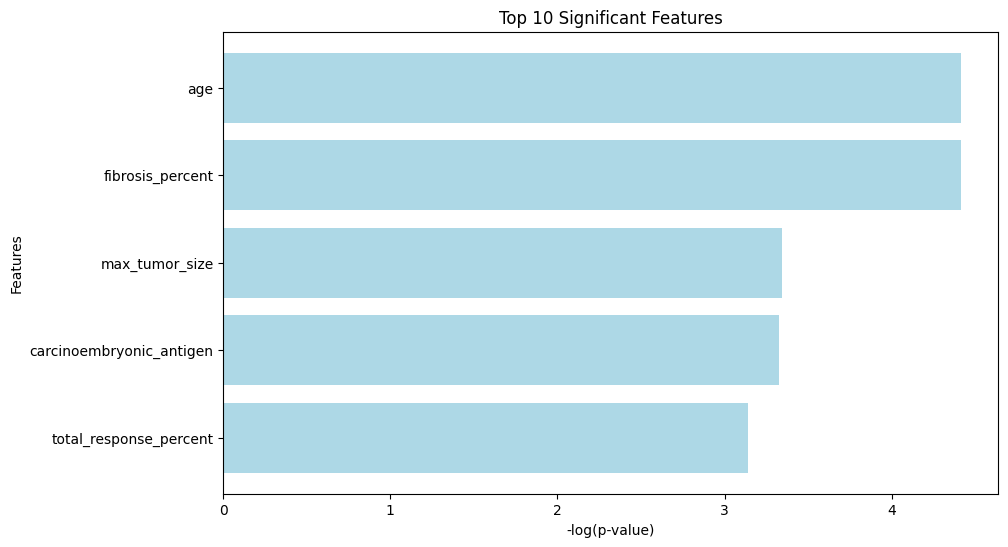

In [ ]:
import numpy as np
import torch
import random
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_scipy_sparse_matrix
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Set the seed for reproducibility
set_seed(5824)

def get_adjacency_matrix(data):
    edge_index = data.edge_index
    num_nodes = data.num_nodes
    adj_matrix = to_scipy_sparse_matrix(edge_index, num_nodes=num_nodes)
    return adj_matrix

def perturb_feature(data, node_idx, feature_idx, perturbation_std, epsilon):
    original_value = data.x[node_idx, feature_idx].item()
    if feature_idx in [0, 2, 8, 16, 17, 18,21,23,24]:  # Continuous features
        perturbation = np.random.randn() * perturbation_std * (original_value + epsilon)
        data.x[node_idx, feature_idx] += perturbation
    elif feature_idx in [1]:  # Binary categorical feature (Sex)
        data.x[node_idx, feature_idx] = 3 - data.x[node_idx, feature_idx]
    elif feature_idx in [3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 19,20,22]:  # Binary categorical features
        data.x[node_idx, feature_idx] = 1 - data.x[node_idx, feature_idx]
    elif feature_idx == 6:  # Categorical feature with values 0 to 5
        data.x[node_idx, feature_idx] = (data.x[node_idx, feature_idx] + 1) % 6
    return original_value

def restore_feature(data, node_idx, feature_idx, original_value):
    data.x[node_idx, feature_idx] = original_value

def perturb_edge(data, edge_idx, perturbation):
    original_value = data.edge_attr[edge_idx].item() if data.edge_attr is not None else 1.0
    if data.edge_attr is not None:
        data.edge_attr[edge_idx] += perturbation
    return original_value

def restore_edge(data, edge_idx, original_value):
    if data.edge_attr is not None:
        data.edge_attr[edge_idx] = original_value

def compute_prediction_change(original_output, new_output, node_idx):
    original_probabilities = torch.softmax(original_output[node_idx], dim=0)
    new_probabilities = torch.softmax(new_output[node_idx], dim=0)
    original_prediction = original_probabilities.argmax().item()
    new_prediction = new_probabilities.argmax().item()
    probability_change = torch.abs(new_probabilities[original_prediction] - original_probabilities[original_prediction]).item()
    return original_prediction, new_prediction, probability_change

def stability_check(previous_results, current_results, threshold=0.01):
    if not previous_results:
        return False

    # Extract common features/edges
    prev_indices = {(res[0], res[1]) for res in previous_results}
    curr_indices = {(res[0], res[1]) for res in current_results}
    common_indices = prev_indices & curr_indices

    if not common_indices:
        return False

    prev_significance_dict = {(res[0], res[1]): res[2] for res in previous_results}
    curr_significance_dict = {(res[0], res[1]): res[2] for res in current_results}

    previous_significance = np.array([prev_significance_dict[idx] for idx in common_indices])
    current_significance = np.array([curr_significance_dict[idx] for idx in common_indices])

    change = np.abs(current_significance - previous_significance).mean()

    return change < threshold

def process_node(node_idx, perturbations_per_feature, model, data, epsilon, perturbation_std, device):
    original_output = model(data.x, data.edge_index, data.batch)
    original_probabilities = torch.softmax(original_output[node_idx], dim=0)
    original_prediction = original_probabilities.argmax().item()

    node_feature_significance = []
    for feature_idx in range(data.num_features):
        probability_changes = []

        for _ in range(perturbations_per_feature):
            original_value = perturb_feature(data, node_idx, feature_idx, perturbation_std, epsilon)

            new_output = model(data.x, data.edge_index, data.batch)
            _, new_prediction, probability_change = compute_prediction_change(original_output, new_output, node_idx)

            probability_changes.append(probability_change)
            restore_feature(data, node_idx, feature_idx, original_value)

        if len(np.unique(probability_changes)) > 1:  # Wilcoxon requires variability
            stat, p_value = wilcoxon(probability_changes)
        else:
            p_value = 1.0  # If no variability, p-value is 1 (not significant)

        effect_size = np.mean(probability_changes)  # Mean change as effect size
        node_feature_significance.append((node_idx, feature_idx, effect_size, p_value))

    return node_feature_significance

def analyze_features(model, data, perturbation_std=0.1, initial_perturbations=10, max_iterations=5, significance_level=0.05):
    num_nodes = data.num_nodes
    epsilon = 1e-7  # Small value to avoid division by zero

    data = data.to(device)
    model = model.to(device)

    p_values = []
    effect_sizes = []

    perturbations_per_feature = initial_perturbations
    previous_results = None

    unique_features = set()  # Set to store unique feature indices

    for iteration in range(max_iterations):
        print(f"Iteration {iteration + 1}, Perturbations per feature: {perturbations_per_feature}")
        feature_significance = []

        for node_idx in tqdm(range(num_nodes), desc="Processing nodes"):
            node_feature_significance = process_node(node_idx, perturbations_per_feature, model, data, epsilon, perturbation_std, device)
            feature_significance.extend(node_feature_significance)

        p_values = [fs[3] for fs in feature_significance]

        # Adjust p-values for multiple comparisons using FDR
        _, adjusted_p_values, _, _ = multipletests(p_values, alpha=significance_level, method='fdr_bh')
        for i, (node_idx, feature_idx, effect_size, _) in enumerate(feature_significance):
            if adjusted_p_values[i] < significance_level:
                if (node_idx, feature_idx) not in unique_features:  # Check if feature is unique
                    feature_significance[i] = (node_idx, feature_idx, -np.log(adjusted_p_values[i]), effect_size)
                    unique_features.add((node_idx, feature_idx))
                else:
                    feature_significance[i] = (node_idx, feature_idx, float('inf'), effect_size)
            else:
                feature_significance[i] = (node_idx, feature_idx, float('inf'), effect_size)

        feature_significance = [fs for fs in feature_significance if fs[2] != float('inf')]
        feature_significance.sort(key=lambda x: x[2], reverse=True)

        if stability_check(previous_results, feature_significance):
            break

        previous_results = feature_significance
        perturbations_per_feature *= 1 # Double the number of perturbations for the next iteration

    top_features = feature_significance[:10]
    print("Top ten causally responsible features:", top_features)

    return top_features

def analyze_edges(model, data, perturbation_std=0.1, initial_perturbations=5, max_iterations=10, significance_level=0.05):
    num_edges = data.edge_index.size(1)
    epsilon = 1e-7  # Small value to avoid division by zero
    batch = torch.zeros(data.num_nodes, dtype=torch.long).to(device)

    data = data.to(device)
    model = model.to(device)

    p_values = []
    effect_sizes = []

    def process_edge(edge_idx, perturbations_per_edge):
        original_output = model(data.x, data.edge_index, batch)
        source, target = data.edge_index[:, edge_idx]
        probability_changes = []

        for _ in range(perturbations_per_edge):
            perturbation = np.random.randn() * perturbation_std * (data.edge_attr[edge_idx].item() + epsilon if data.edge_attr is not None else 1.0)
            original_value = perturb_edge(data, edge_idx, perturbation)

            new_output = model(data.x, data.edge_index, batch)
            _, new_prediction, probability_change = compute_prediction_change(original_output, new_output, source)

            probability_changes.append(probability_change)
            restore_edge(data, edge_idx, original_value)

        if len(np.unique(probability_changes)) > 1:  # Wilcoxon requires variability
            stat, p_value = wilcoxon(probability_changes)
        else:
            p_value = 1.0  # If no variability, p-value is 1 (not significant)

        effect_size = np.mean(probability_changes)  # Mean change as effect size
        return (edge_idx, effect_size, p_value)

    perturbations_per_edge = initial_perturbations
    previous_results = None

    for iteration in range(max_iterations):
        print(f"Iteration {iteration + 1}, Perturbations per edge: {perturbations_per_edge}")
        edge_significance = []

        for edge_idx in tqdm(range(num_edges), desc="Processing edges"):
            edge_significance.append(process_edge(edge_idx, perturbations_per_edge))

        p_values = [es[2] for es in edge_significance]

        # Adjust p-values for multiple comparisons using FDR
        _, adjusted_p_values, _, _ = multipletests(p_values, alpha=significance_level, method='fdr_bh')
        for i, (edge_idx, effect_size, _) in enumerate(edge_significance):
            if adjusted_p_values[i] < significance_level:
                edge_significance[i] = (edge_idx, -np.log(adjusted_p_values[i]), effect_size)
            else:
                edge_significance[i] = (edge_idx, float('inf'), effect_size)

        edge_significance = [es for es in edge_significance if es[1] != float('inf')]
        edge_significance.sort(key=lambda x: x[1], reverse=True)

        if stability_check(previous_results, edge_significance):
            break

        previous_results = edge_significance
        perturbations_per_edge *= 1  # Double the number of perturbations for the next iteration

    top_edges = edge_significance[:10]

    return top_edges

def plot_top_features(data, top_features):
    feature_labels = [
    'age',
    'sex',
    'body_mass_index',
    'node_positive_primary',
    'synchronous_crlm',
    'multiple_metastases',
    'clinrisk_score',
    'clinrisk_stratified',
    'carcinoembryonic_antigen',
    'extrahep_disease',
    'chemo_before_liver_resection',
    'preoperative_pve',
    'steatosis_yesno',
    'presence_sinusoidal_dilata',
    'NASH_yesno',
    'NASH_greater_4',
    'total_response_percent',
    'necrosis_percent',
    'fibrosis_percent',
    'fibrosis_greater_40_percent',

    'major_comorbidity',
    'max_tumor_size',
     'bilobar_disease',
    'NASH_score',
    'mucin_percent',
    ]


    indices = [f[1] for f in top_features]
    significance = [f[2] for f in top_features]

    labels = [feature_labels[i] for i in indices]

    plt.figure(figsize=(10, 6))
    plt.barh(labels, significance, color='lightblue')
    plt.xlabel('-log(p-value)')
    plt.ylabel('Features')
    plt.title('Top 10 Significant Features')
    plt.gca().invert_yaxis()
    plt.show()

def plot_top_edges(data, top_edges):
    edge_indices = [(data.edge_index[0, e[0]], data.edge_index[1, e[0]]) for e in top_edges]
    significance = [e[1] for e in top_edges]

    edge_labels = [f"Edge {i+1}: {edge_indices[i]}" for i in range(len(edge_indices))]

    plt.figure(figsize=(10, 6))
    plt.barh(edge_labels, significance, color='lightgreen')
    plt.xlabel('-log(p-value)')
    plt.ylabel('Edges')
    plt.title('Top 10 Significant Edges')
    plt.gca().invert_yaxis()
    plt.show()

top_features = analyze_features(model, data)
plot_top_features(data, top_features)

# top_edges = analyze_edges(model, data)
# plot_top_edges(data, top_edges)


Top ten causally responsible features: [(9, 2, 4.172762224552473, 1.9073486328125e-07), (84, 23, 4.172762224552473, 2.5033950805664064e-07), (128, 0, 3.8509159762670233, 1.0728836059570313e-07), (154, 17, 3.486957616479109, 1.3113021850585939e-07), (5, 0, 3.31447349035209, 9.5367431640625e-08), (74, 23, 3.31447349035209, 9.5367431640625e-08), (77, 21, 3.31447349035209, 9.5367431640625e-08), (108, 17, 3.31447349035209, 9.5367431640625e-08), (151, 2, 3.31447349035209, 9.5367431640625e-08), (133, 0, 3.258179157753811, 1.3113021850585939e-07)]
GCN

Top ten causally responsible features: [(37, 23, 3.4604205967363812, 2.6226043701171877e-07), (40, 2, 3.4604205967363812, 1.5020370483398437e-06), (84, 0, 3.4604205967363812, 6.794929504394531e-07), (94, 16, 3.4604205967363812, 1.6689300537109374e-07)]
GAN

Top ten causally responsible features: [(67, 17, 4.20272701325441, 1.7881393432617188e-07), (130, 17, 4.20272701325441, 2.384185791015625e-07), (52, 17, 3.5186471274360915, 1.1920928955078125e-07), (17, 21, 3.340352938339911, 9.5367431640625e-08), (107, 8, 3.340352938339911, 9.5367431640625e-08), (139, 21, 3.285830689084321, 1.3113021850585939e-07), (133, 17, 3.1278190169644207, 1.9073486328125e-07), (26, 2, 3.085404717881541, 8.344650268554687e-08), (44, 18, 3.085404717881541, 8.344650268554687e-08), (47, 18, 3.085404717881541, 8.344650268554687e-08)]GT

Top ten causally responsible features: [(6, 0, 4.4177193523379135, 4.172325134277344e-07), (65, 0, 4.4177193523379135, 2.86102294921875e-07), (77, 18, 4.4177193523379135, 1.3113021850585939e-07), (32, 21, 3.346889774375039, 1.430511474609375e-07), (55, 8, 3.3290081080149645, 1.6689300537109374e-07), (131, 18, 3.1533159234977512, 8.344650268554687e-08), (165, 8, 3.1533159234977512, 8.344650268554687e-08), (41, 16, 3.1378140750633605, 1.1920928955078125e-07)]
SAGE